In [18]:
import os
import sys
import matplotlib
import pandas as pd
import pdb
from IPython import get_ipython
from IPython.display import display

is_notebook = True if "script" not in os.getcwd() else False
recidiviz_data_path = "../../../../../../.." + ("/.." if not is_notebook else "")

sys.path.insert(0, os.path.relpath(recidiviz_data_path))

from recidiviz.calculator.modeling.population_projection.super_simulation.super_simulation_factory import (
    SuperSimulationFactory,
)
from recidiviz.calculator.modeling.population_projection.transition_table import (
    TransitionTable,
)
from recidiviz.calculator.modeling.population_projection.shell_compartment import (
    ShellCompartment,
)
from recidiviz.calculator.modeling.population_projection.spark_policy import SparkPolicy
from functools import partial
import yaml
from recidiviz.utils.yaml_dict import YAMLDict

pd.options.display.max_columns = None
pd.options.display.max_rows = None

[autoreload of recidiviz.calculator.modeling.population_projection.super_simulation.simulator failed: Traceback (most recent call last):
  File "/Users/jazz/.local/share/virtualenvs/pulse-data-WLwBta1t/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/Users/jazz/.local/share/virtualenvs/pulse-data-WLwBta1t/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/Users/jazz/.pyenv/versions/3.9.12/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/jazz/Recidiviz/pulse-data/recidiviz/calculator/modeling/population_projection/state/AL/AL-parole/../../../../../../../recidiviz

In [19]:
# Get the simulation tag from the model inputs config
yaml_file_path = ("../" if not is_notebook else "") + "al_parole_grant_rate_v1.yaml"

simulation_config = YAMLDict.from_path(yaml_file_path)
data_inputs = simulation_config.pop_dict("data_inputs")
simulation_tag = data_inputs.pop("big_query_simulation_tag", str)

In [20]:
simulation_tag

'al_parole_grant_rate_v1'

In [21]:
if (is_notebook):
    get_ipython().run_line_magic('run', recidiviz_data_path + "/../recidiviz-research/utils/research_utils.py")

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 3600x2100 with 0 Axes>

# LOAD SIMULATION

In [22]:
policy_sim = SuperSimulationFactory.build_super_simulation(yaml_file_path)


Downloading: 100%|███████████████████████████████████████████████████████| 568/568 [00:00<00:00, 2266.32rows/s]

Downloading: 100%|████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 546.92rows/s]

Downloading: 100%|█████████████████████████████████████████████████████| 1357/1357 [00:00<00:00, 5118.48rows/s]


In [26]:
policy_sim.get_input_transitions("prisonrev")

['compartment_duration', 'compartment', 'outflow_to', 'total_population', 'crime_type']


simulation_tag  compartment_duration compartment outflow_to  \
340   al_parole_grant_rate_v1                  19.0   prisonrev    liberty   
341   al_parole_grant_rate_v1                   8.0   prisonrev    liberty   
342   al_parole_grant_rate_v1                  10.0   prisonrev    liberty   
345   al_parole_grant_rate_v1                  13.0   prisonrev    liberty   
350   al_parole_grant_rate_v1                  14.0   prisonrev    liberty   
351   al_parole_grant_rate_v1                  16.0   prisonrev    liberty   
352   al_parole_grant_rate_v1                  18.0   prisonrev    liberty   
393   al_parole_grant_rate_v1                  12.0   prisonrev    liberty   
395   al_parole_grant_rate_v1                   2.0   prisonrev    liberty   
396   al_parole_grant_rate_v1                   6.0   prisonrev    liberty   
457   al_parole_grant_rate_v1                  20.0   prisonrev    liberty   
461   al_parole_grant_rate_v1                   4.0   prisonrev    liberty   
462   al_parole_grant_rate_v1                   5.0   prisonrev    liberty   
468   al_parole_grant_rate_v1                  15.0   prisonrev    liberty   
469   al_parole_grant_rate_v1                  17.0   prisonrev    liberty   
472   al_parole_grant_rate_v1                  21.0   prisonrev    liberty   
475   al_parole_grant_rate_v1                  42.0   prisonrev    liberty   
655   al_parole_grant_rate_v1                  44.0   prisonrev    liberty   
656   al_parole_grant_rate_v1                  46.0   prisonrev    liberty   
657   al_parole_grant_rate_v1                  48.0   prisonrev    liberty   
658   al_parole_grant_rate_v1                  49.0   prisonrev    liberty   
659   al_parole_grant_rate_v1                  51.0   prisonrev    liberty   
660   al_parole_grant_rate_v1                  53.0   prisonrev    liberty   
661   al_parole_grant_rate_v1                  55.0   prisonrev    liberty   
662   al_parole_grant_rate_v1                  57.0   prisonrev    liberty   
663   al_parole_grant_rate_v1                  58.0   prisonrev    liberty   
664   al_parole_grant_rate_v1                  60.0   prisonrev    liberty   
665   al_parole_grant_rate_v1                  62.0   prisonrev    liberty   
666   al_parole_grant_rate_v1                  64.0   prisonrev    liberty   
667   al_parole_grant_rate_v1                  65.0   prisonrev    liberty   
668   al_parole_grant_rate_v1                  67.0   prisonrev    liberty   
669   al_parole_grant_rate_v1                  69.0   prisonrev    liberty   
670   al_parole_grant_rate_v1                  71.0   prisonrev    liberty   
671   al_parole_grant_rate_v1                  72.0   prisonrev    liberty   
672   al_parole_grant_rate_v1                  74.0   prisonrev    liberty   
673   al_parole_grant_rate_v1                  76.0   prisonrev    liberty   
674   al_parole_grant_rate_v1                  78.0   prisonrev    liberty   
675   al_parole_grant_rate_v1                  79.0   prisonrev    liberty   
676   al_parole_grant_rate_v1                  81.0   prisonrev    liberty   
677   al_parole_grant_rate_v1                  83.0   prisonrev    liberty   
678   al_parole_grant_rate_v1                  43.0   prisonrev    liberty   
679   al_parole_grant_rate_v1                  45.0   prisonrev    liberty   
680   al_parole_grant_rate_v1                  47.0   prisonrev    liberty   
681   al_parole_grant_rate_v1                  50.0   prisonrev    liberty   
682   al_parole_grant_rate_v1                  52.0   prisonrev    liberty   
683   al_parole_grant_rate_v1                  54.0   prisonrev    liberty   
684   al_parole_grant_rate_v1                  56.0   prisonrev    liberty   
685   al_parole_grant_rate_v1                  59.0   prisonrev    liberty   
686   al_parole_grant_rate_v1                  61.0   prisonrev    liberty   
687   al_parole_grant_rate_v1                  63.0   prisonrev    liberty   
688   al_parole_grant_rate_v1        

In [11]:
alternate_grant_rate_transitions = pd.read_csv(
    ("../" if not is_notebook else "") + "alternate_grant_rate_transitions.csv"
)
alternate_grant_rate_transitions.drop(columns=["grant_rate"], inplace=True)
alternate_grant_rate_transitions.drop_duplicates(subset=["compartment", "outflow_to"])

compartment outflow_to  crime_type  compartment_duration  \
0         parole    liberty  nonviolent                   1.0   
1         prison    liberty  nonviolent                   1.0   
3         prison     parole     violent                   1.0   
1116      parole  prisonrev  nonviolent                   1.0   
1188   prisonrev    liberty  nonviolent                   1.0   
1355     liberty    liberty  nonviolent                   1.0   

      total_population  
0            27.800272  
1            19.621875  
3            81.506250  
1116         14.853547  
1188         55.600545  
1355          1.000000

In [12]:
## Policy functions


def switch_grant_rate(compartment):
    return partial(
        TransitionTable.use_alternate_transitions_data,
        alternate_historical_transitions=alternate_grant_rate_transitions[
            alternate_grant_rate_transitions.compartment == compartment
        ],
        retroactive=False,
    )

In [13]:
# Simulate policy starting in July 2023
policy_ts = 6

In [14]:
policy_list = [
    SparkPolicy(
        policy_fn=switch_grant_rate(compartment),
        spark_compartment=compartment,
        sub_population={"crime_type": "nonviolent"},
        policy_ts=policy_ts,
        apply_retroactive=True,
    )
    for compartment in ["prison"]  # "parole"]
] + [
    SparkPolicy(
        policy_fn=switch_grant_rate(compartment),
        spark_compartment=compartment,
        sub_population={"crime_type": "violent"},
        policy_ts=policy_ts,
        apply_retroactive=True,
    )
    for compartment in ["prison"]  # ,"parole"]
]

# SIMULATE SIMULATION

/Users/jazz/Recidiviz/pulse-data/recidiviz/calculator/modeling/population_projection/state/AL/AL-parole/../../../../../../../recidiviz/calculator/modeling/population_projection/population_simulation/population_simulation_factory.py:168: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (simulation_group_name), _ in transitions_data.groupby(disaggregation_axes):


initialization time:  7.7130279541015625


/Users/jazz/Recidiviz/pulse-data/recidiviz/calculator/modeling/population_projection/state/AL/AL-parole/../../../../../../../recidiviz/calculator/modeling/population_projection/population_simulation/population_simulation_factory.py:168: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (simulation_group_name), _ in transitions_data.groupby(disaggregation_axes):


initialization time:  7.012351036071777
simulation_time:  3.6042261123657227
simulation_time:  3.5560829639434814
151040.86854747124


/Users/jazz/Recidiviz/pulse-data/recidiviz/calculator/modeling/population_projection/state/AL/AL-parole/../../../../../../../recidiviz/calculator/modeling/population_projection/super_simulation/simulator.py:314: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  simulation_results = simulation_results.groupby(


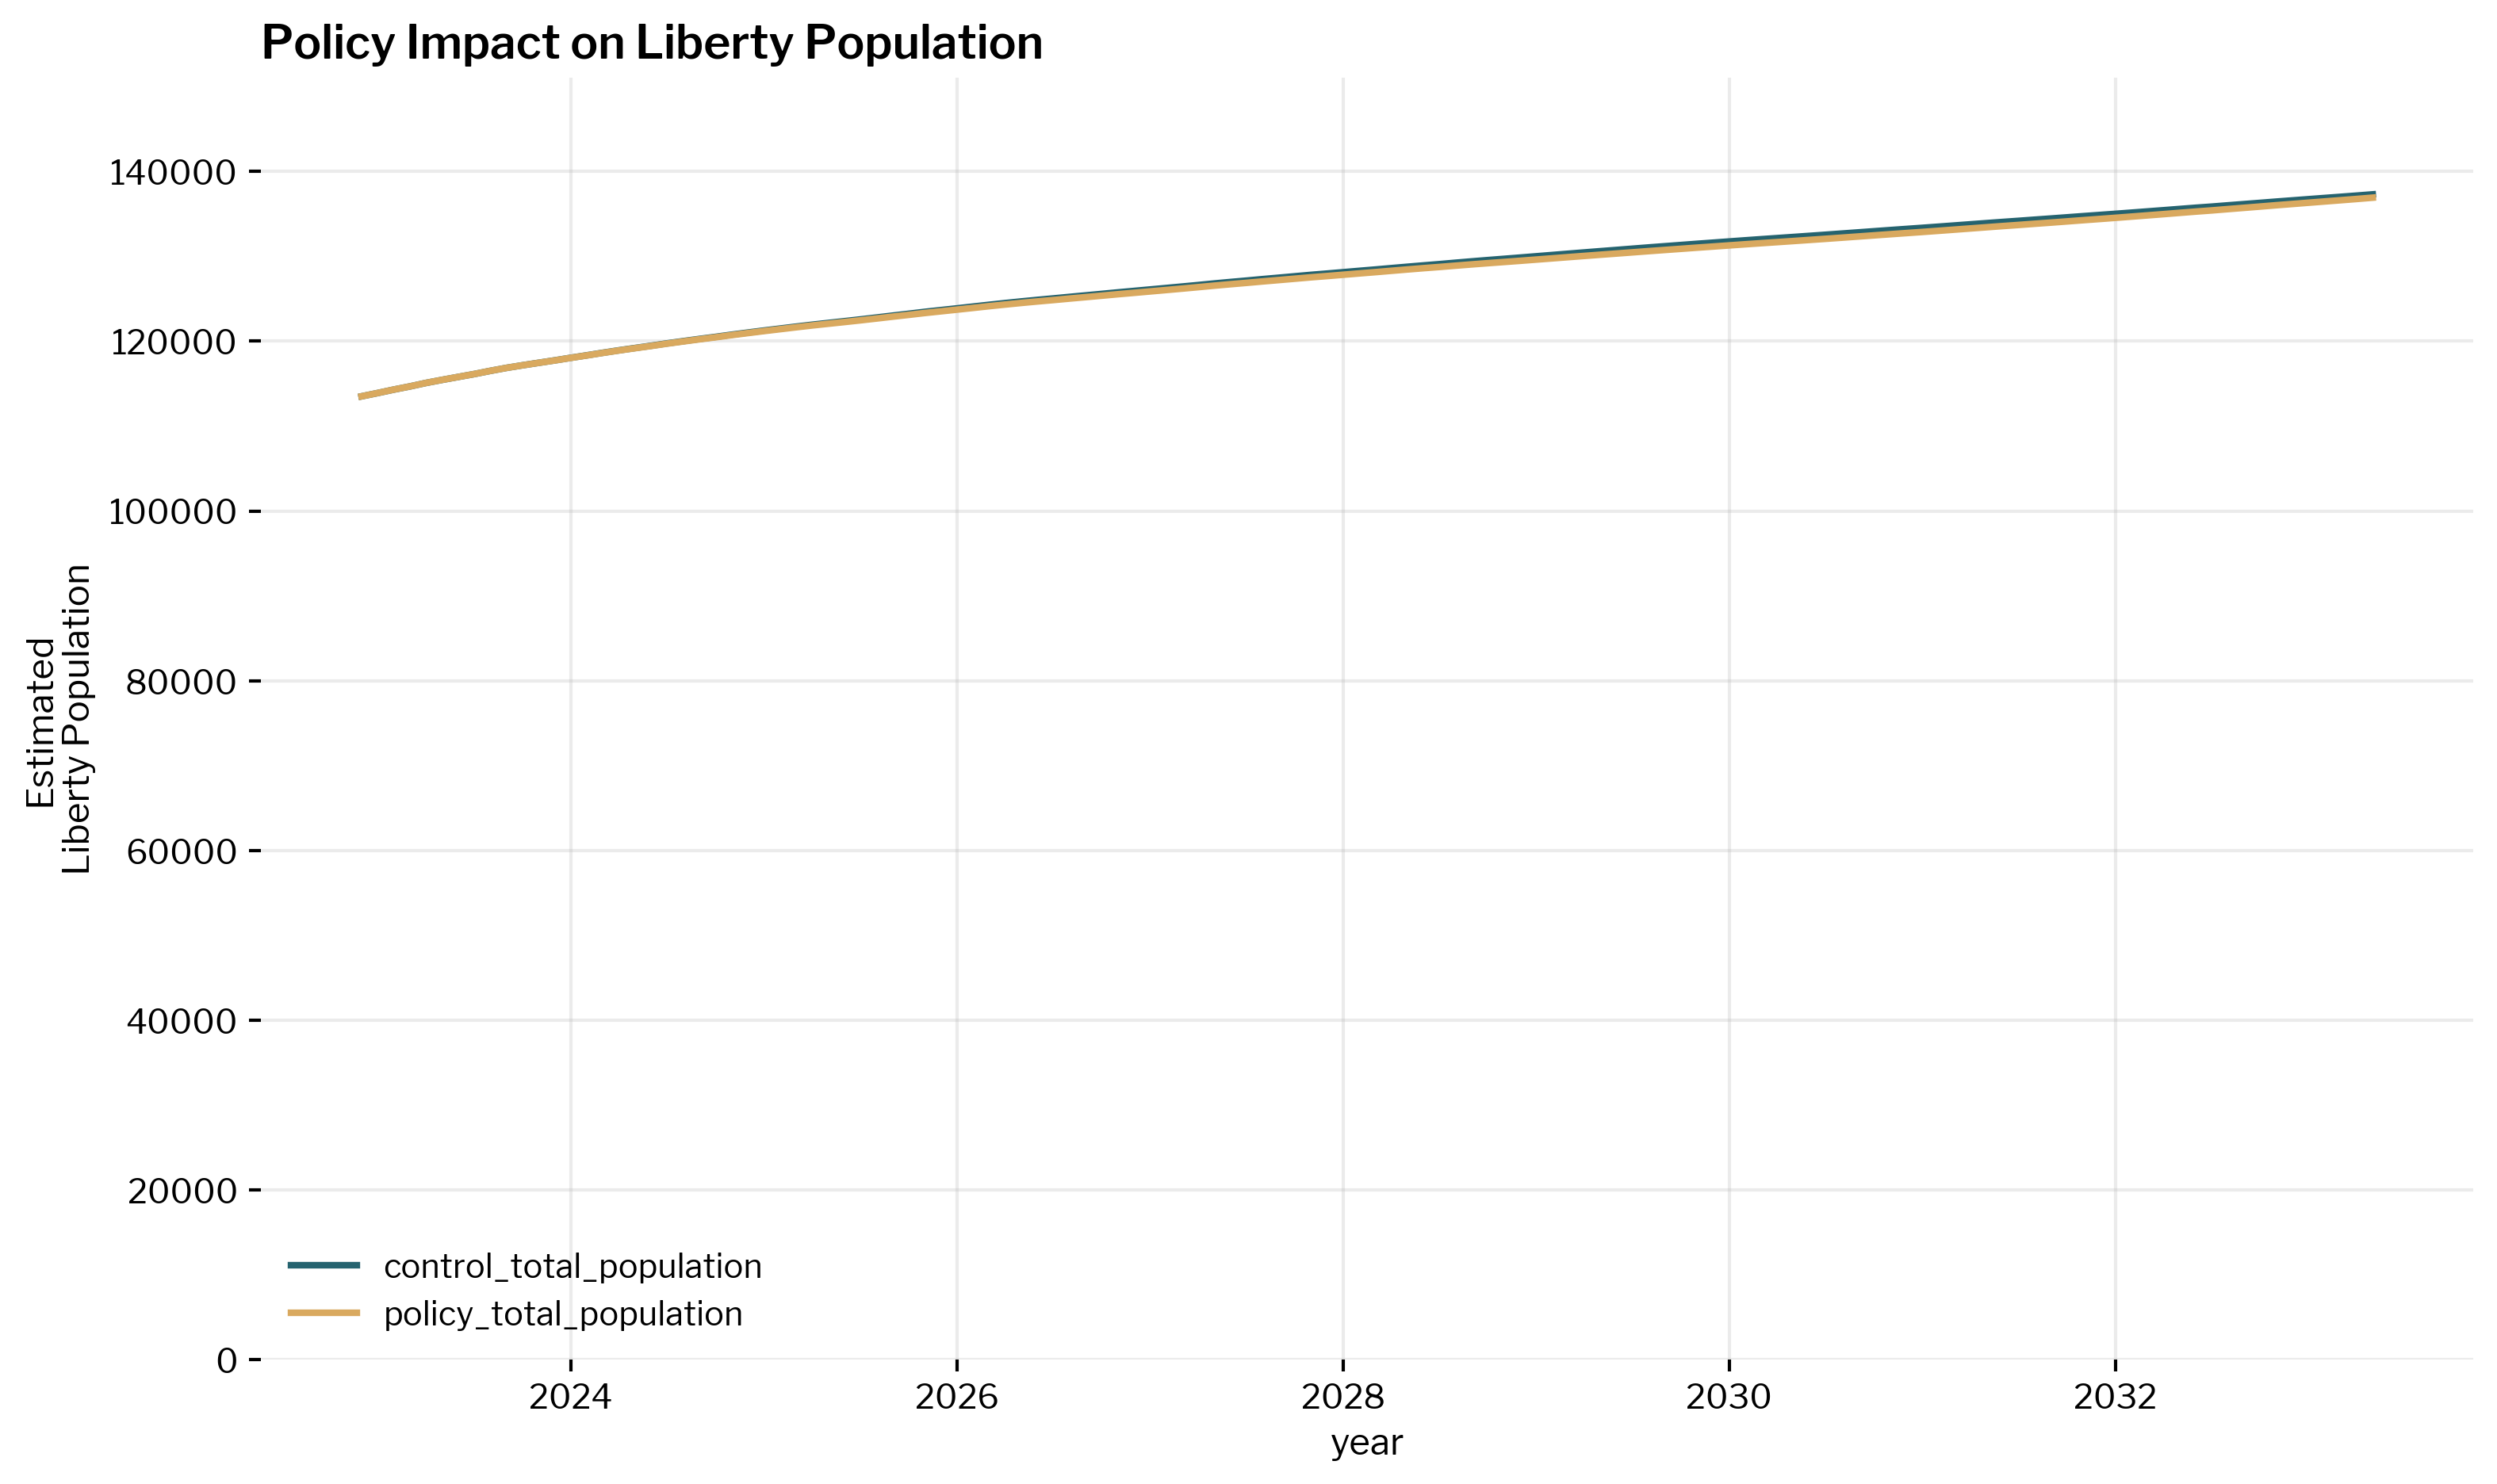

In [15]:
policy_results = policy_sim.simulate_policy(policy_list, "liberty")
# subsimd = {"control": policy_results_list[1], "policy": policy_results_list[2]}
# policy_results = policy_results_list[0]
policy_results["population_difference"] = (
    policy_results["policy_total_population"]
    - policy_results["control_total_population"]
)

In [16]:
upload = False
simulation_tag

'al_parole_grant_rate_v1'

In [ ]:
if upload:
    results_dict = policy_sim.upload_policy_simulation_results_to_bq(simulation_tag)

In [17]:
policy_results.head()

compartment  control_total_population simulation_group  \
year                                                                 
2022.916667      prison               4563.775643       nonviolent   
2023.000000      prison               4586.184585       nonviolent   
2023.083333      prison               4608.845204       nonviolent   
2023.166667      prison               4631.955640       nonviolent   
2023.250000      prison               4654.363972       nonviolent   

             policy_total_population  population_difference  
year                                                         
2022.916667              4563.775643                    0.0  
2023.000000              4586.184585                    0.0  
2023.083333              4608.845204                    0.0  
2023.166667              4631.955640                    0.0  
2023.250000              4654.363972                    0.0

In [54]:
popagg = (
    policy_results.groupby(["year", "compartment"])
    .sum()
    .reset_index()
    .pivot(
        index="year",
        columns=["compartment"],
        values=["policy_total_population", "control_total_population"],
    )
)
popdiff = (
    popagg.loc[:, "policy_total_population"] - popagg.loc[:, "control_total_population"]
)
popdiff.loc[np.arange(2023, 2029, 0.5)]
# policy_results.reset_index().head()

/var/folders/jn/2ddz89hx6tjf4m3dvz3dch840000gn/T/ipykernel_3588/3608261659.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  policy_results.groupby(["year", "compartment"])


compartment     liberty      parole      prison   prisonrev
year                                                       
2023.0         0.000000    0.000000    0.000000    0.000000
2023.5         0.000000    0.000000    0.000000    0.000000
2024.0        -9.331805   20.781581  -11.747748    0.298179
2024.5       -31.640501   63.834765  -34.205179    2.011338
2025.0       -64.536049  120.424064  -61.776491    5.887654
2025.5      -105.802629  192.697619  -99.456073   12.558997
2026.0      -149.032592  263.562601 -136.896322   22.364157
2026.5      -190.053865  330.803897 -175.933160   35.180760
2027.0      -229.074871  399.978368 -221.619619   50.712539
2027.5      -265.165500  469.146821 -272.054383   68.067578
2028.0      -298.247954  547.535627 -335.677958   86.382751
2028.5      -333.773677  627.358519 -398.926648  105.332123

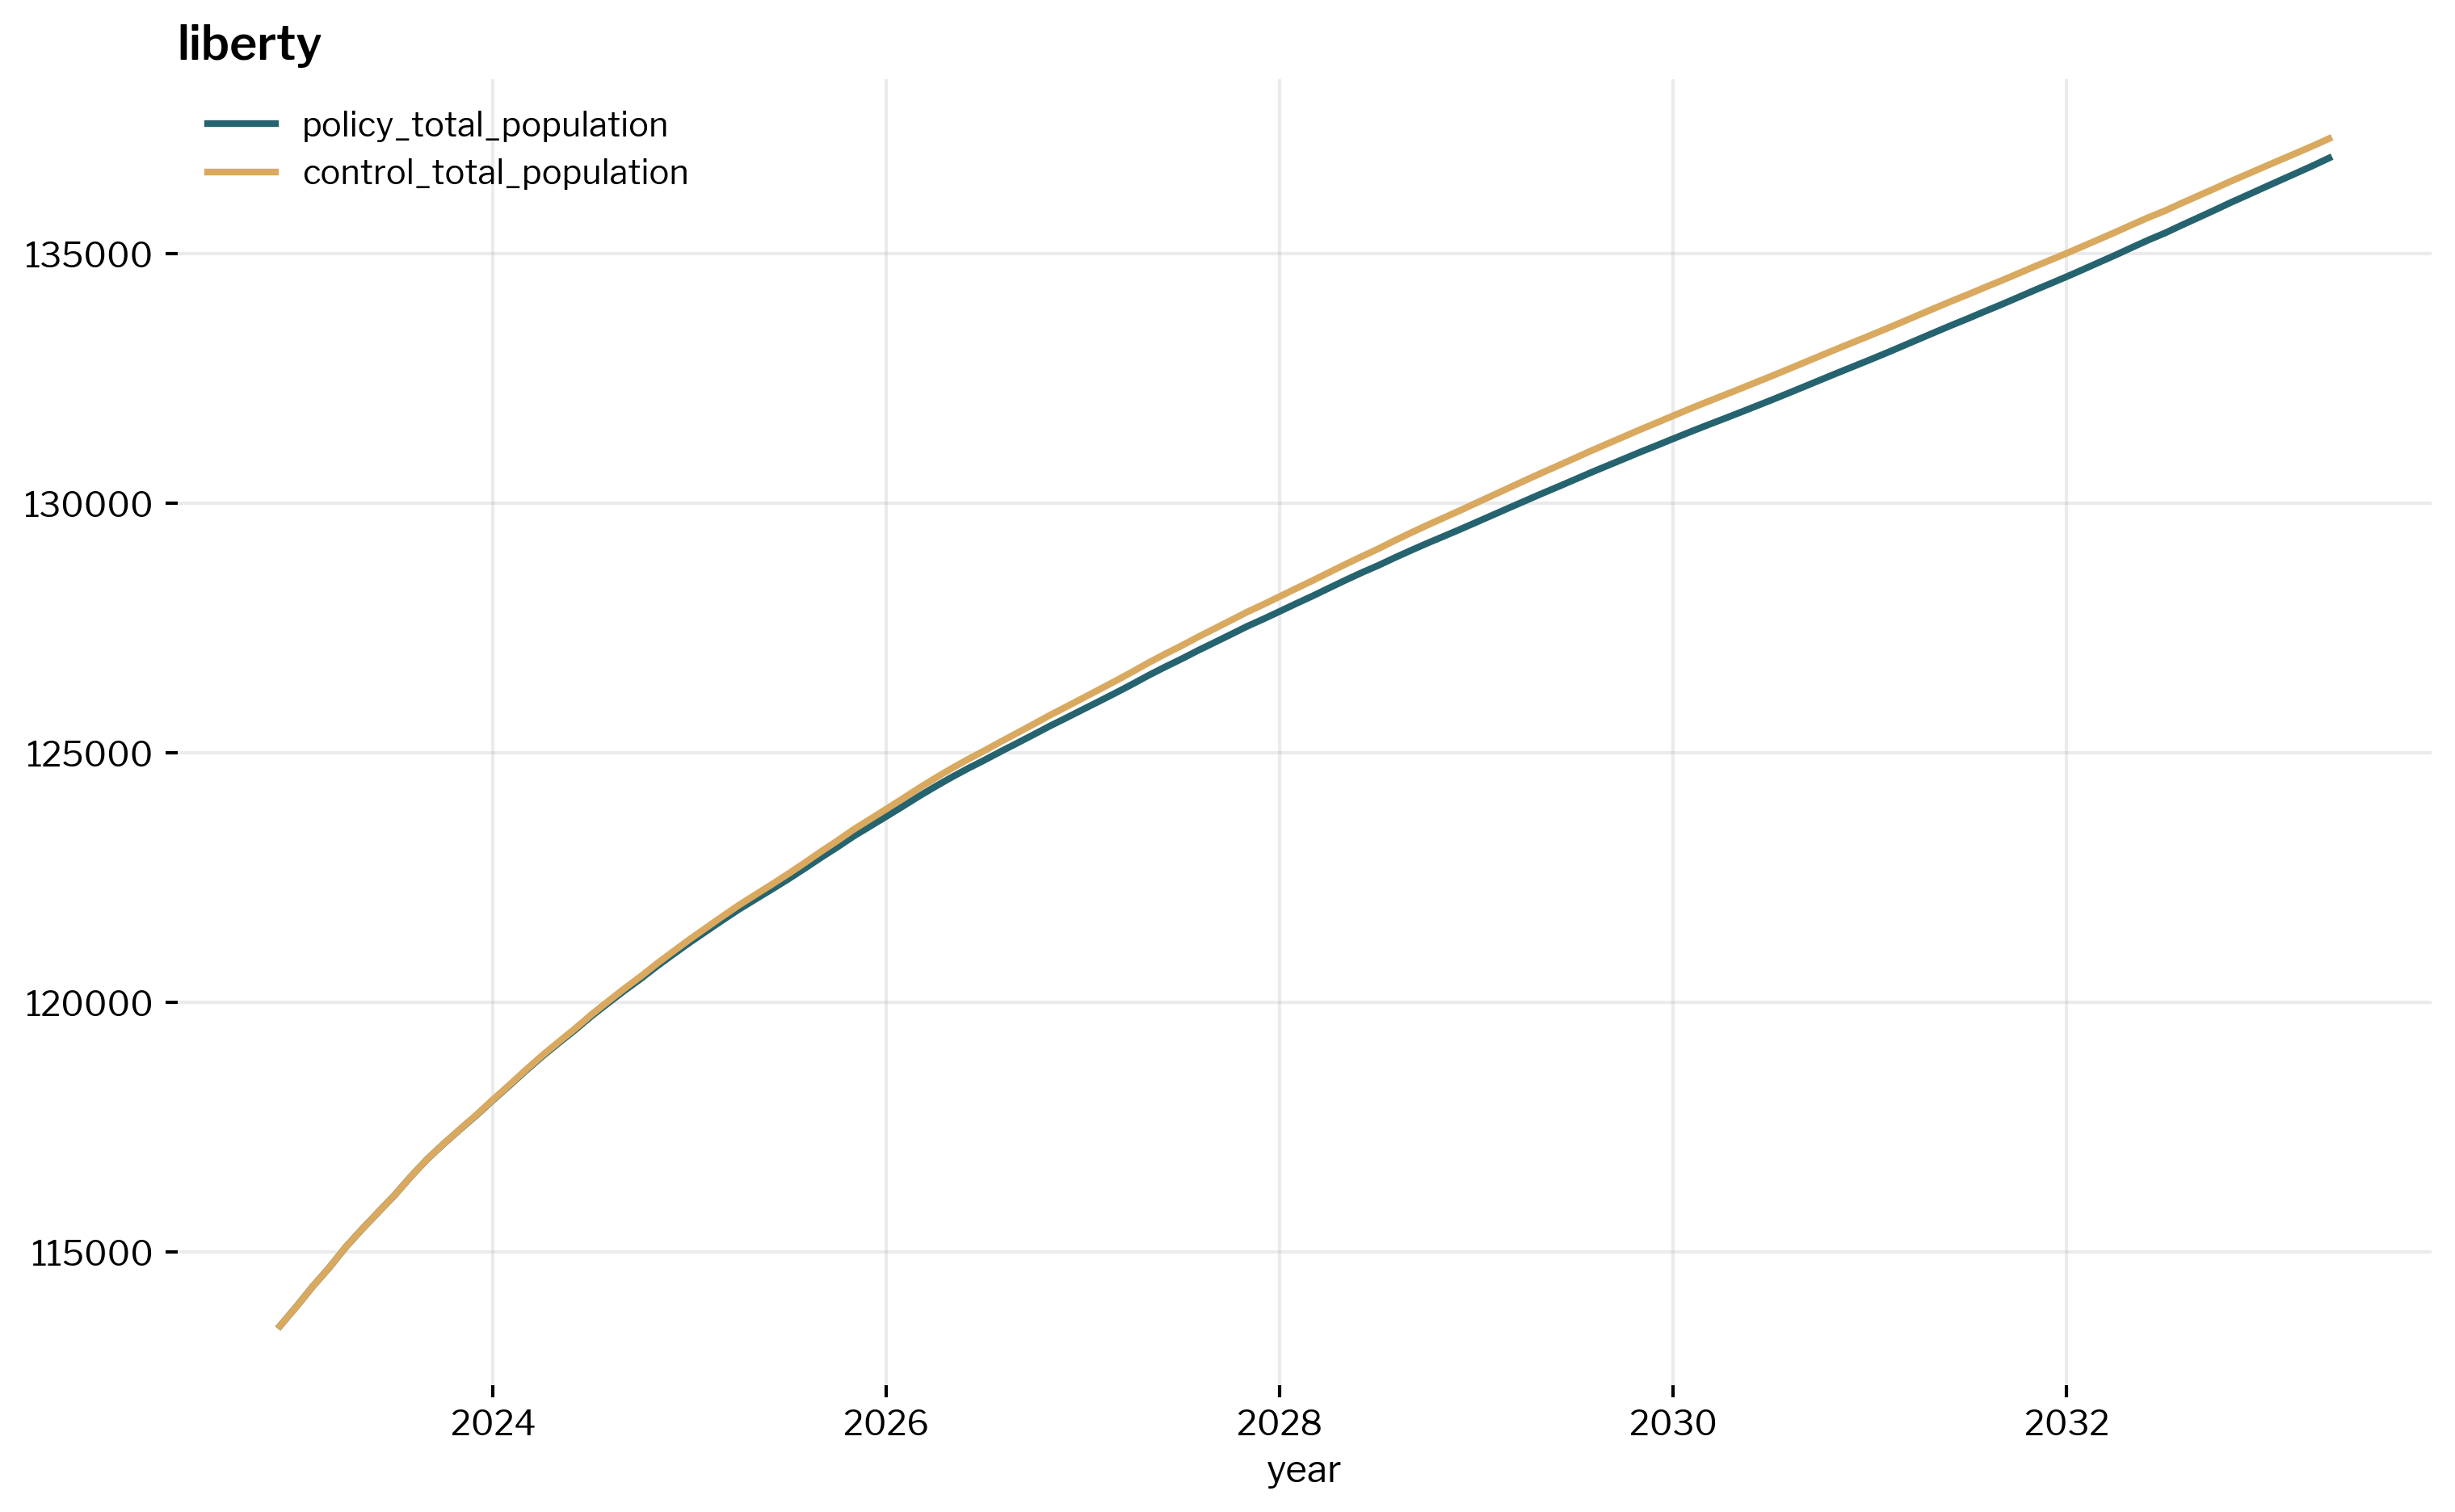

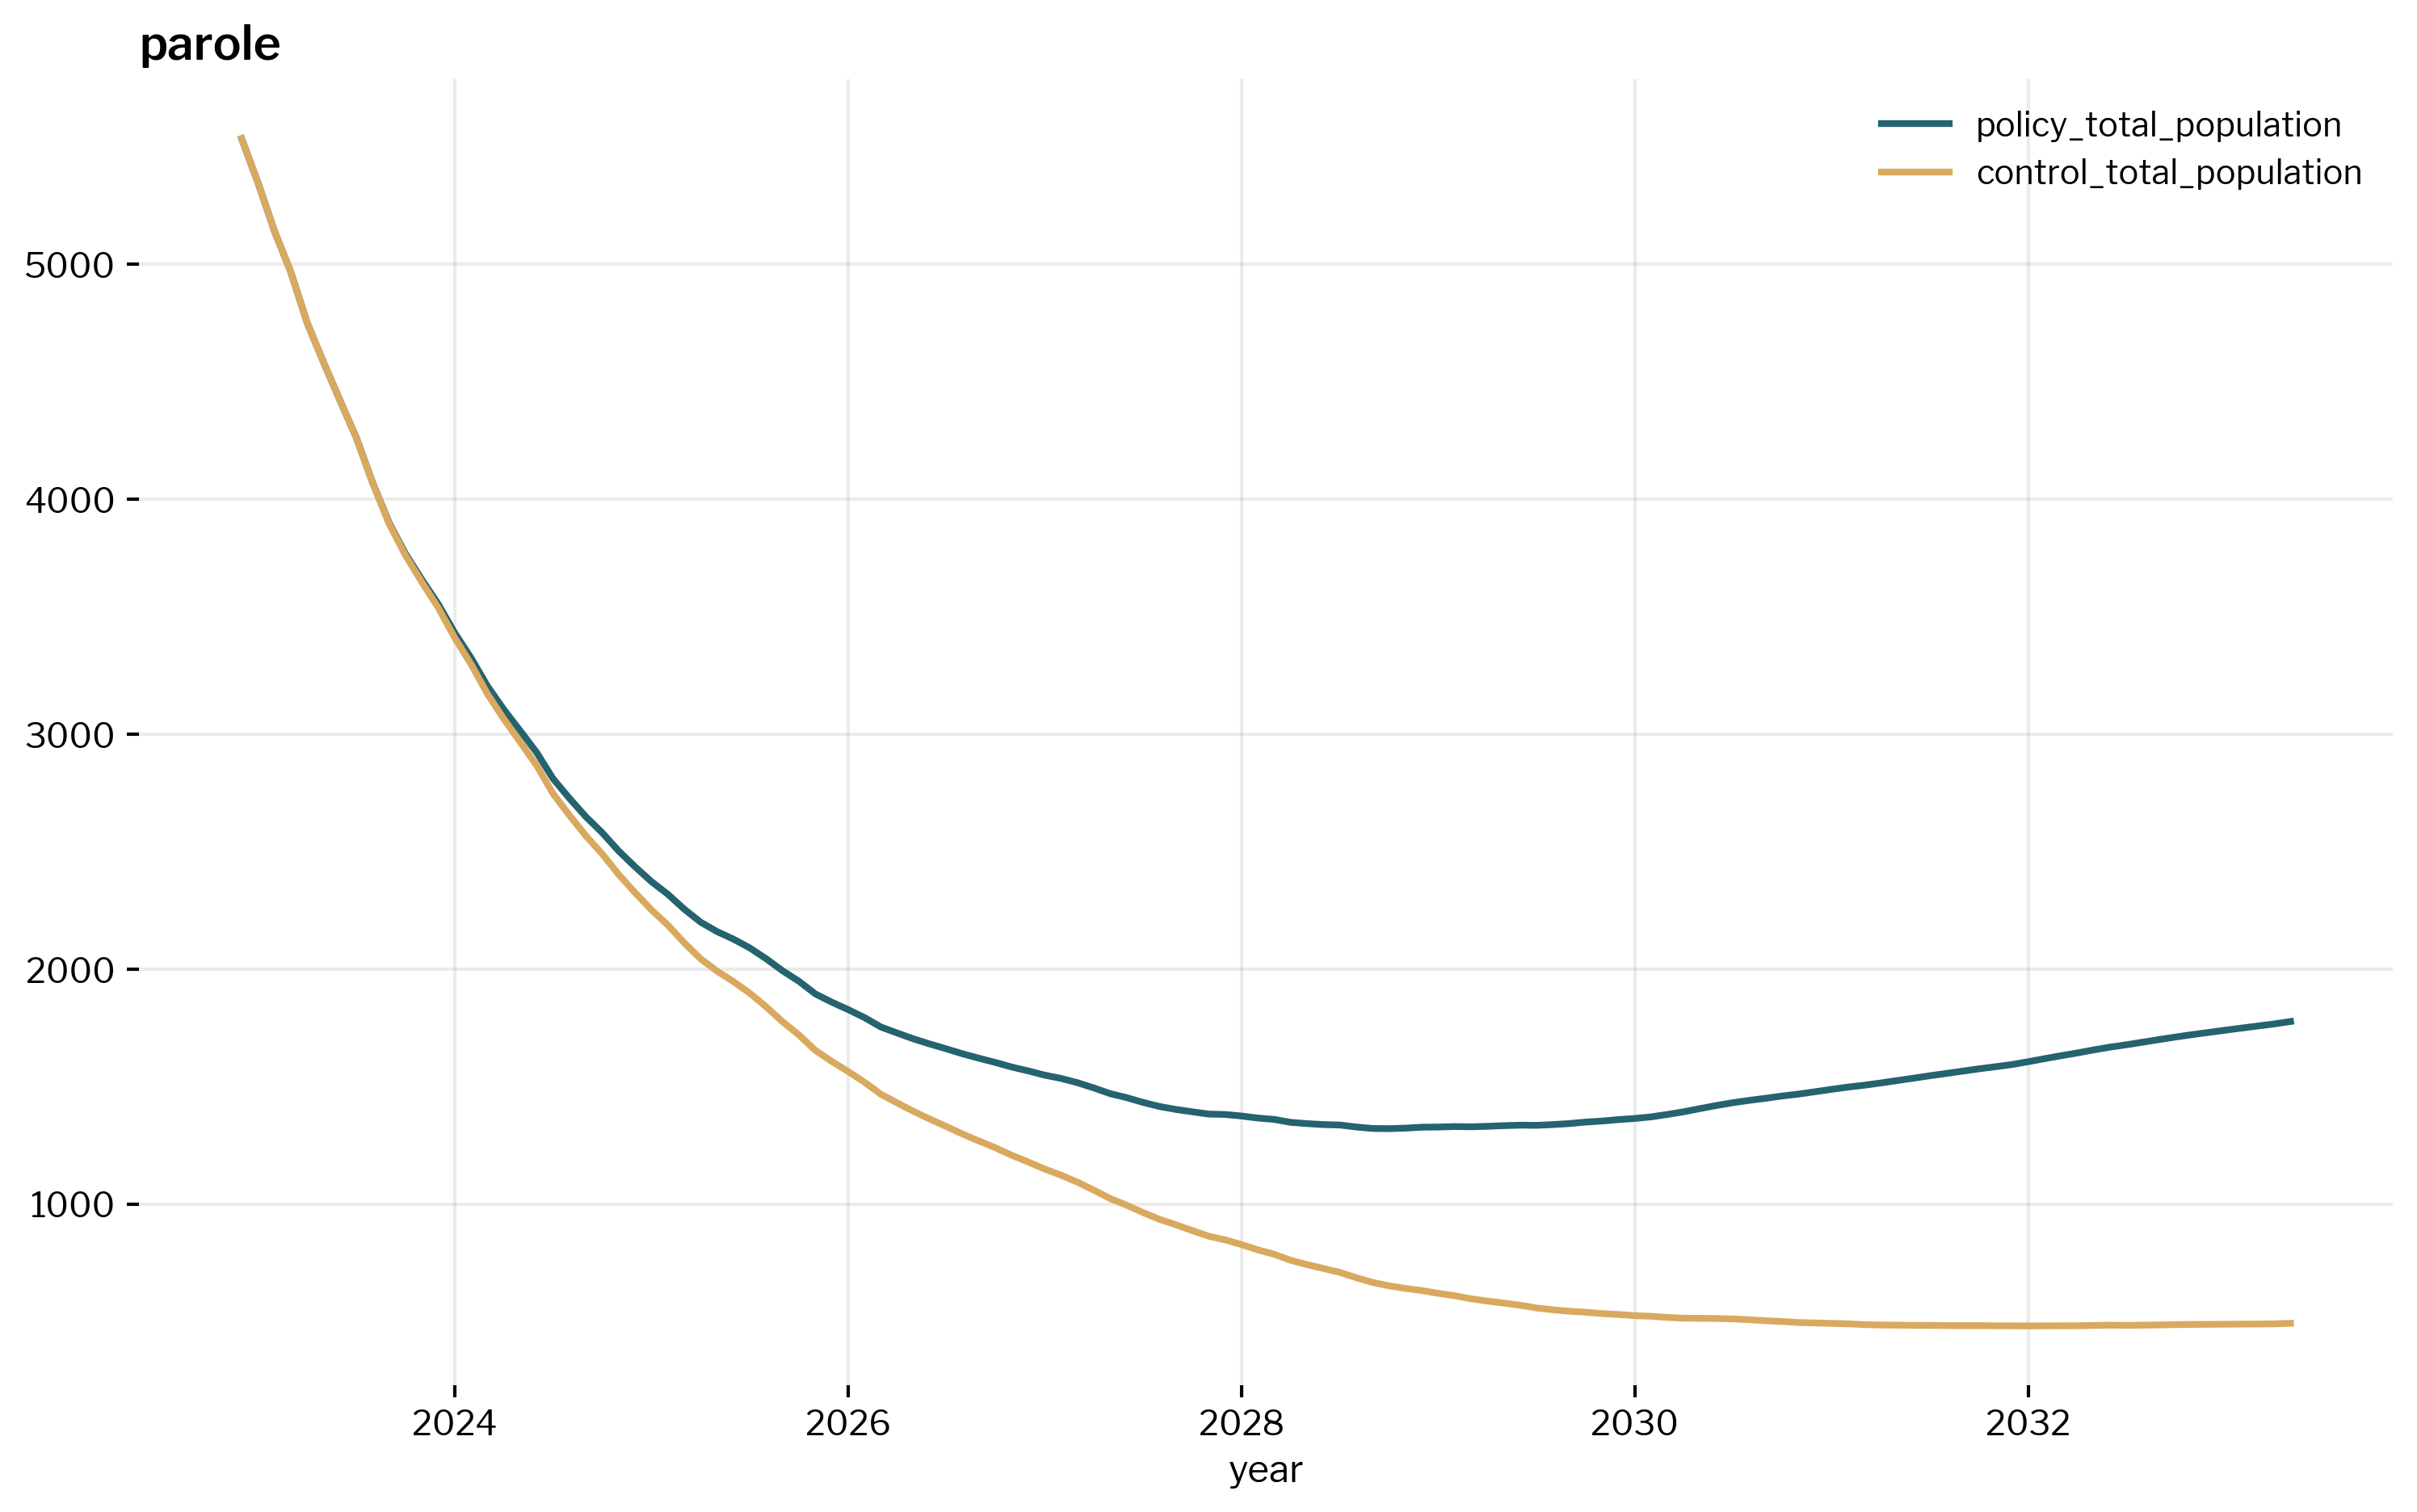

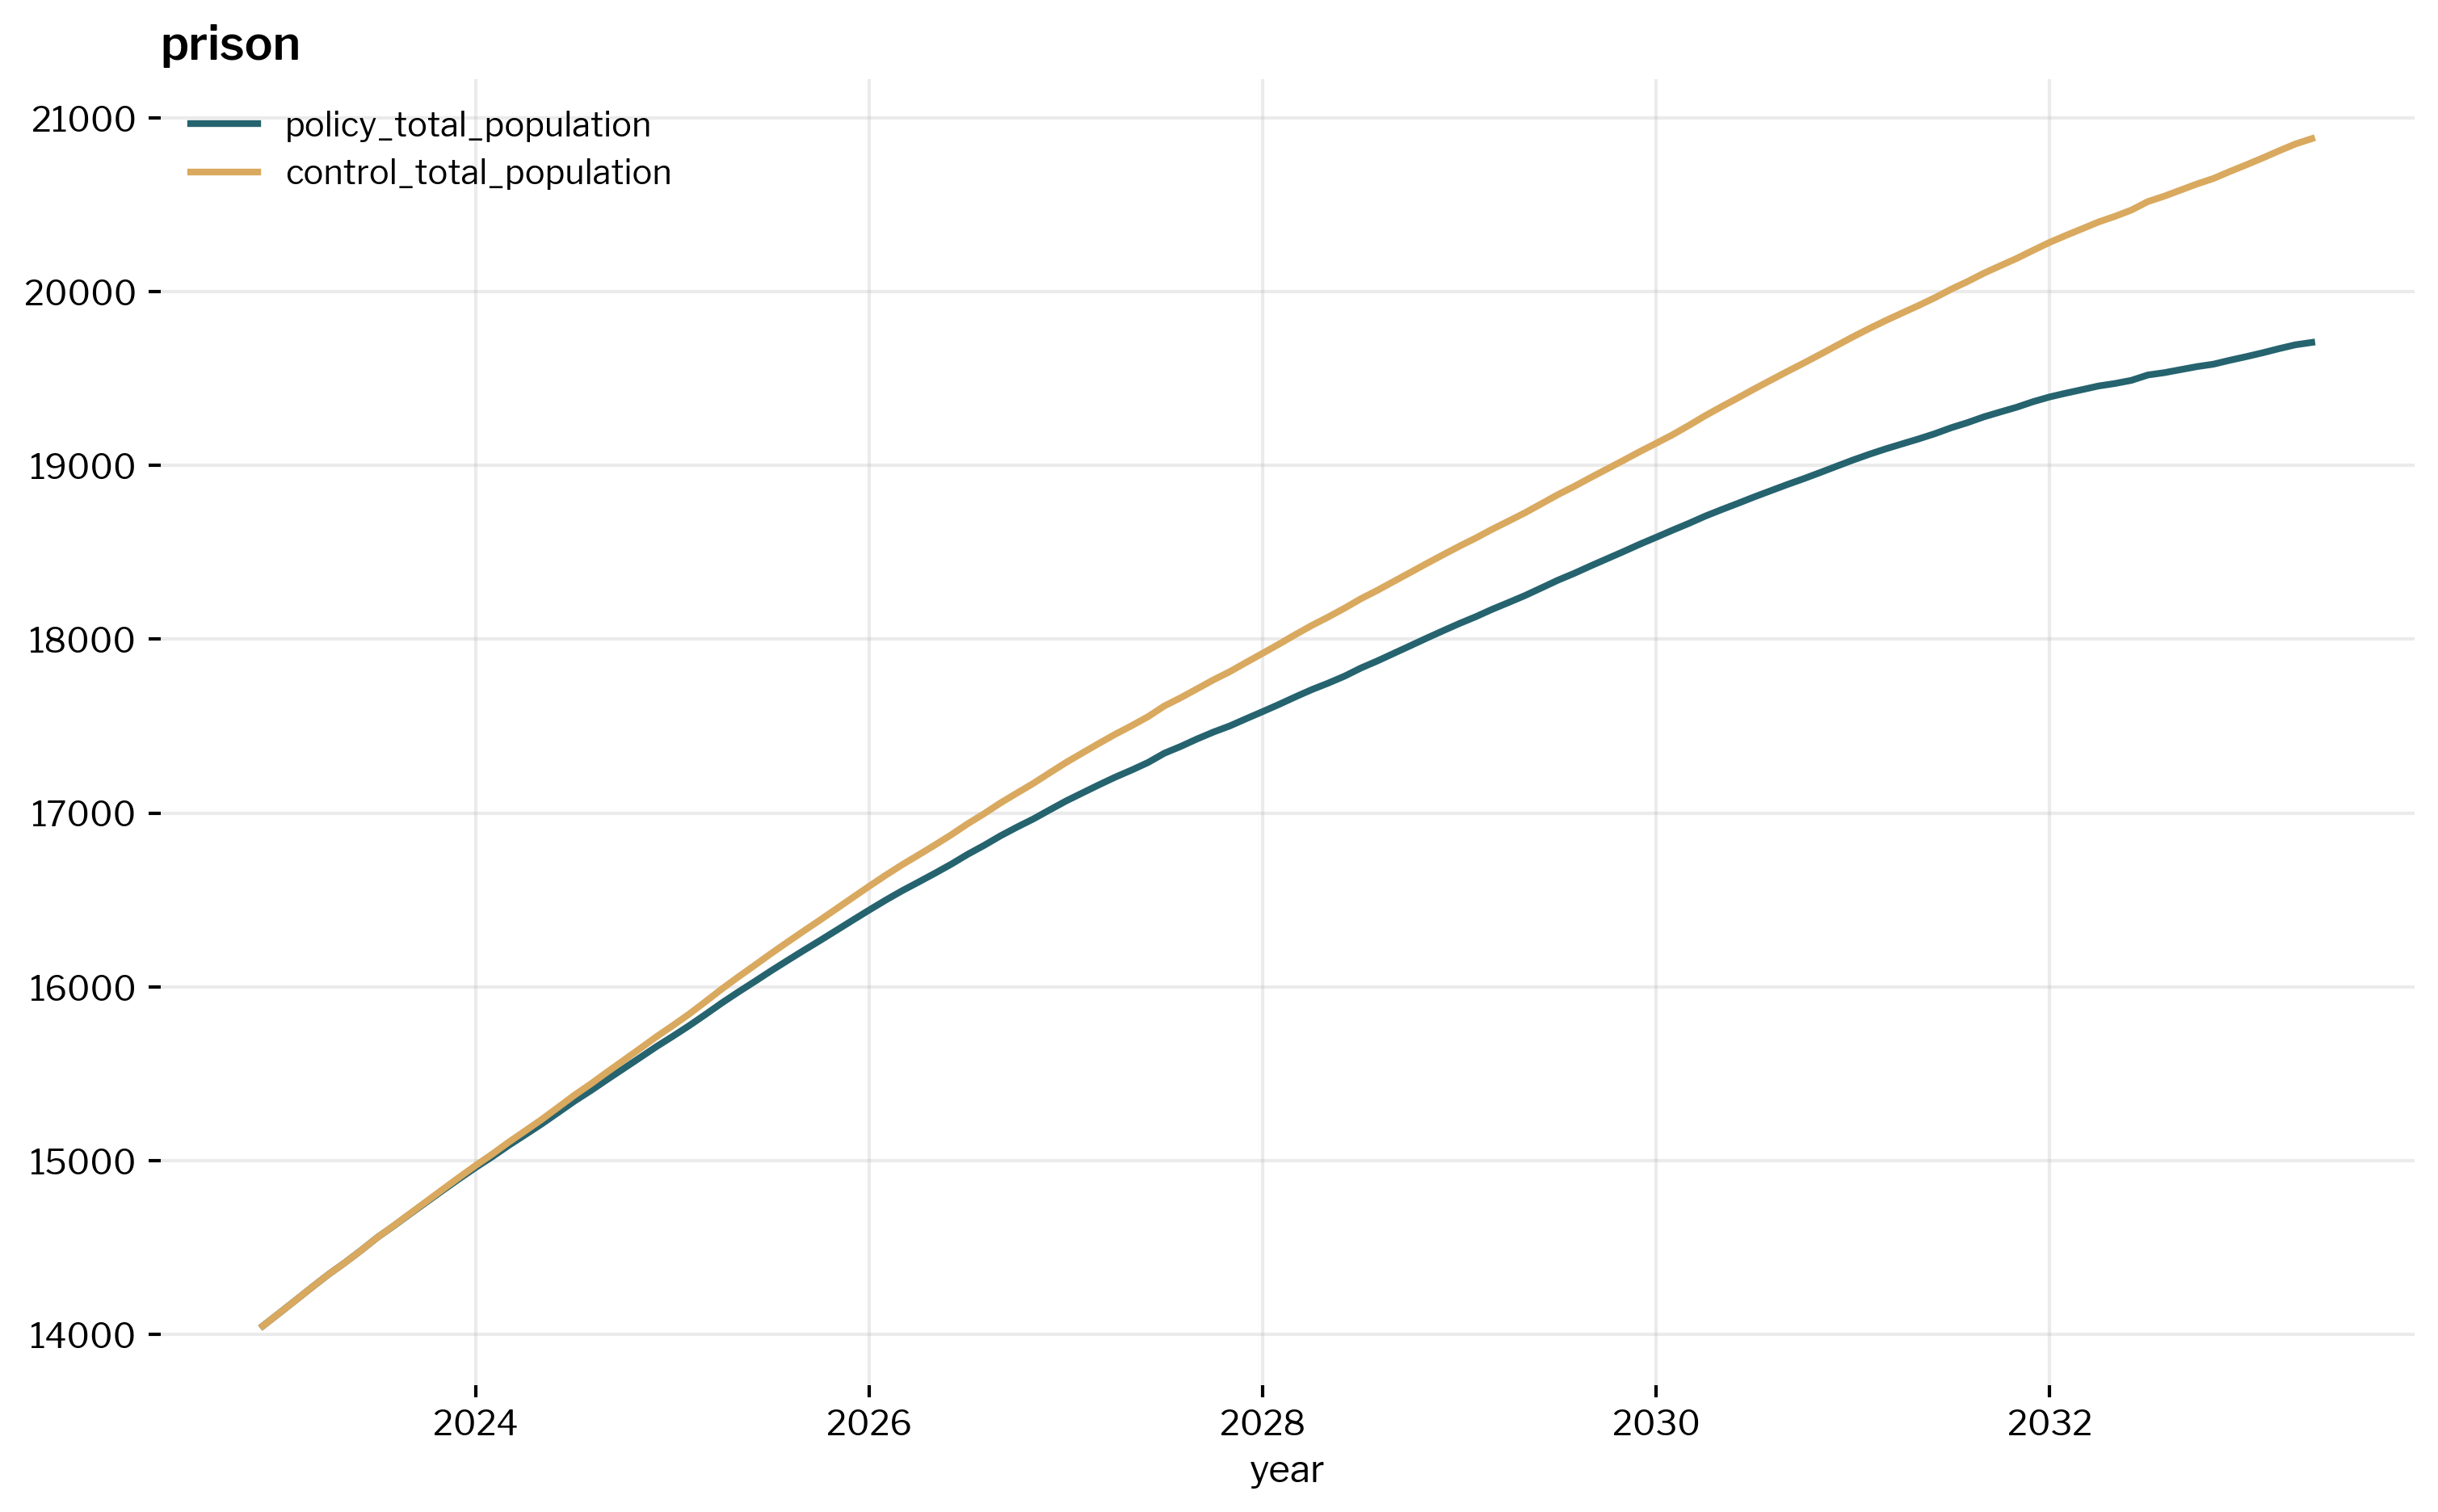

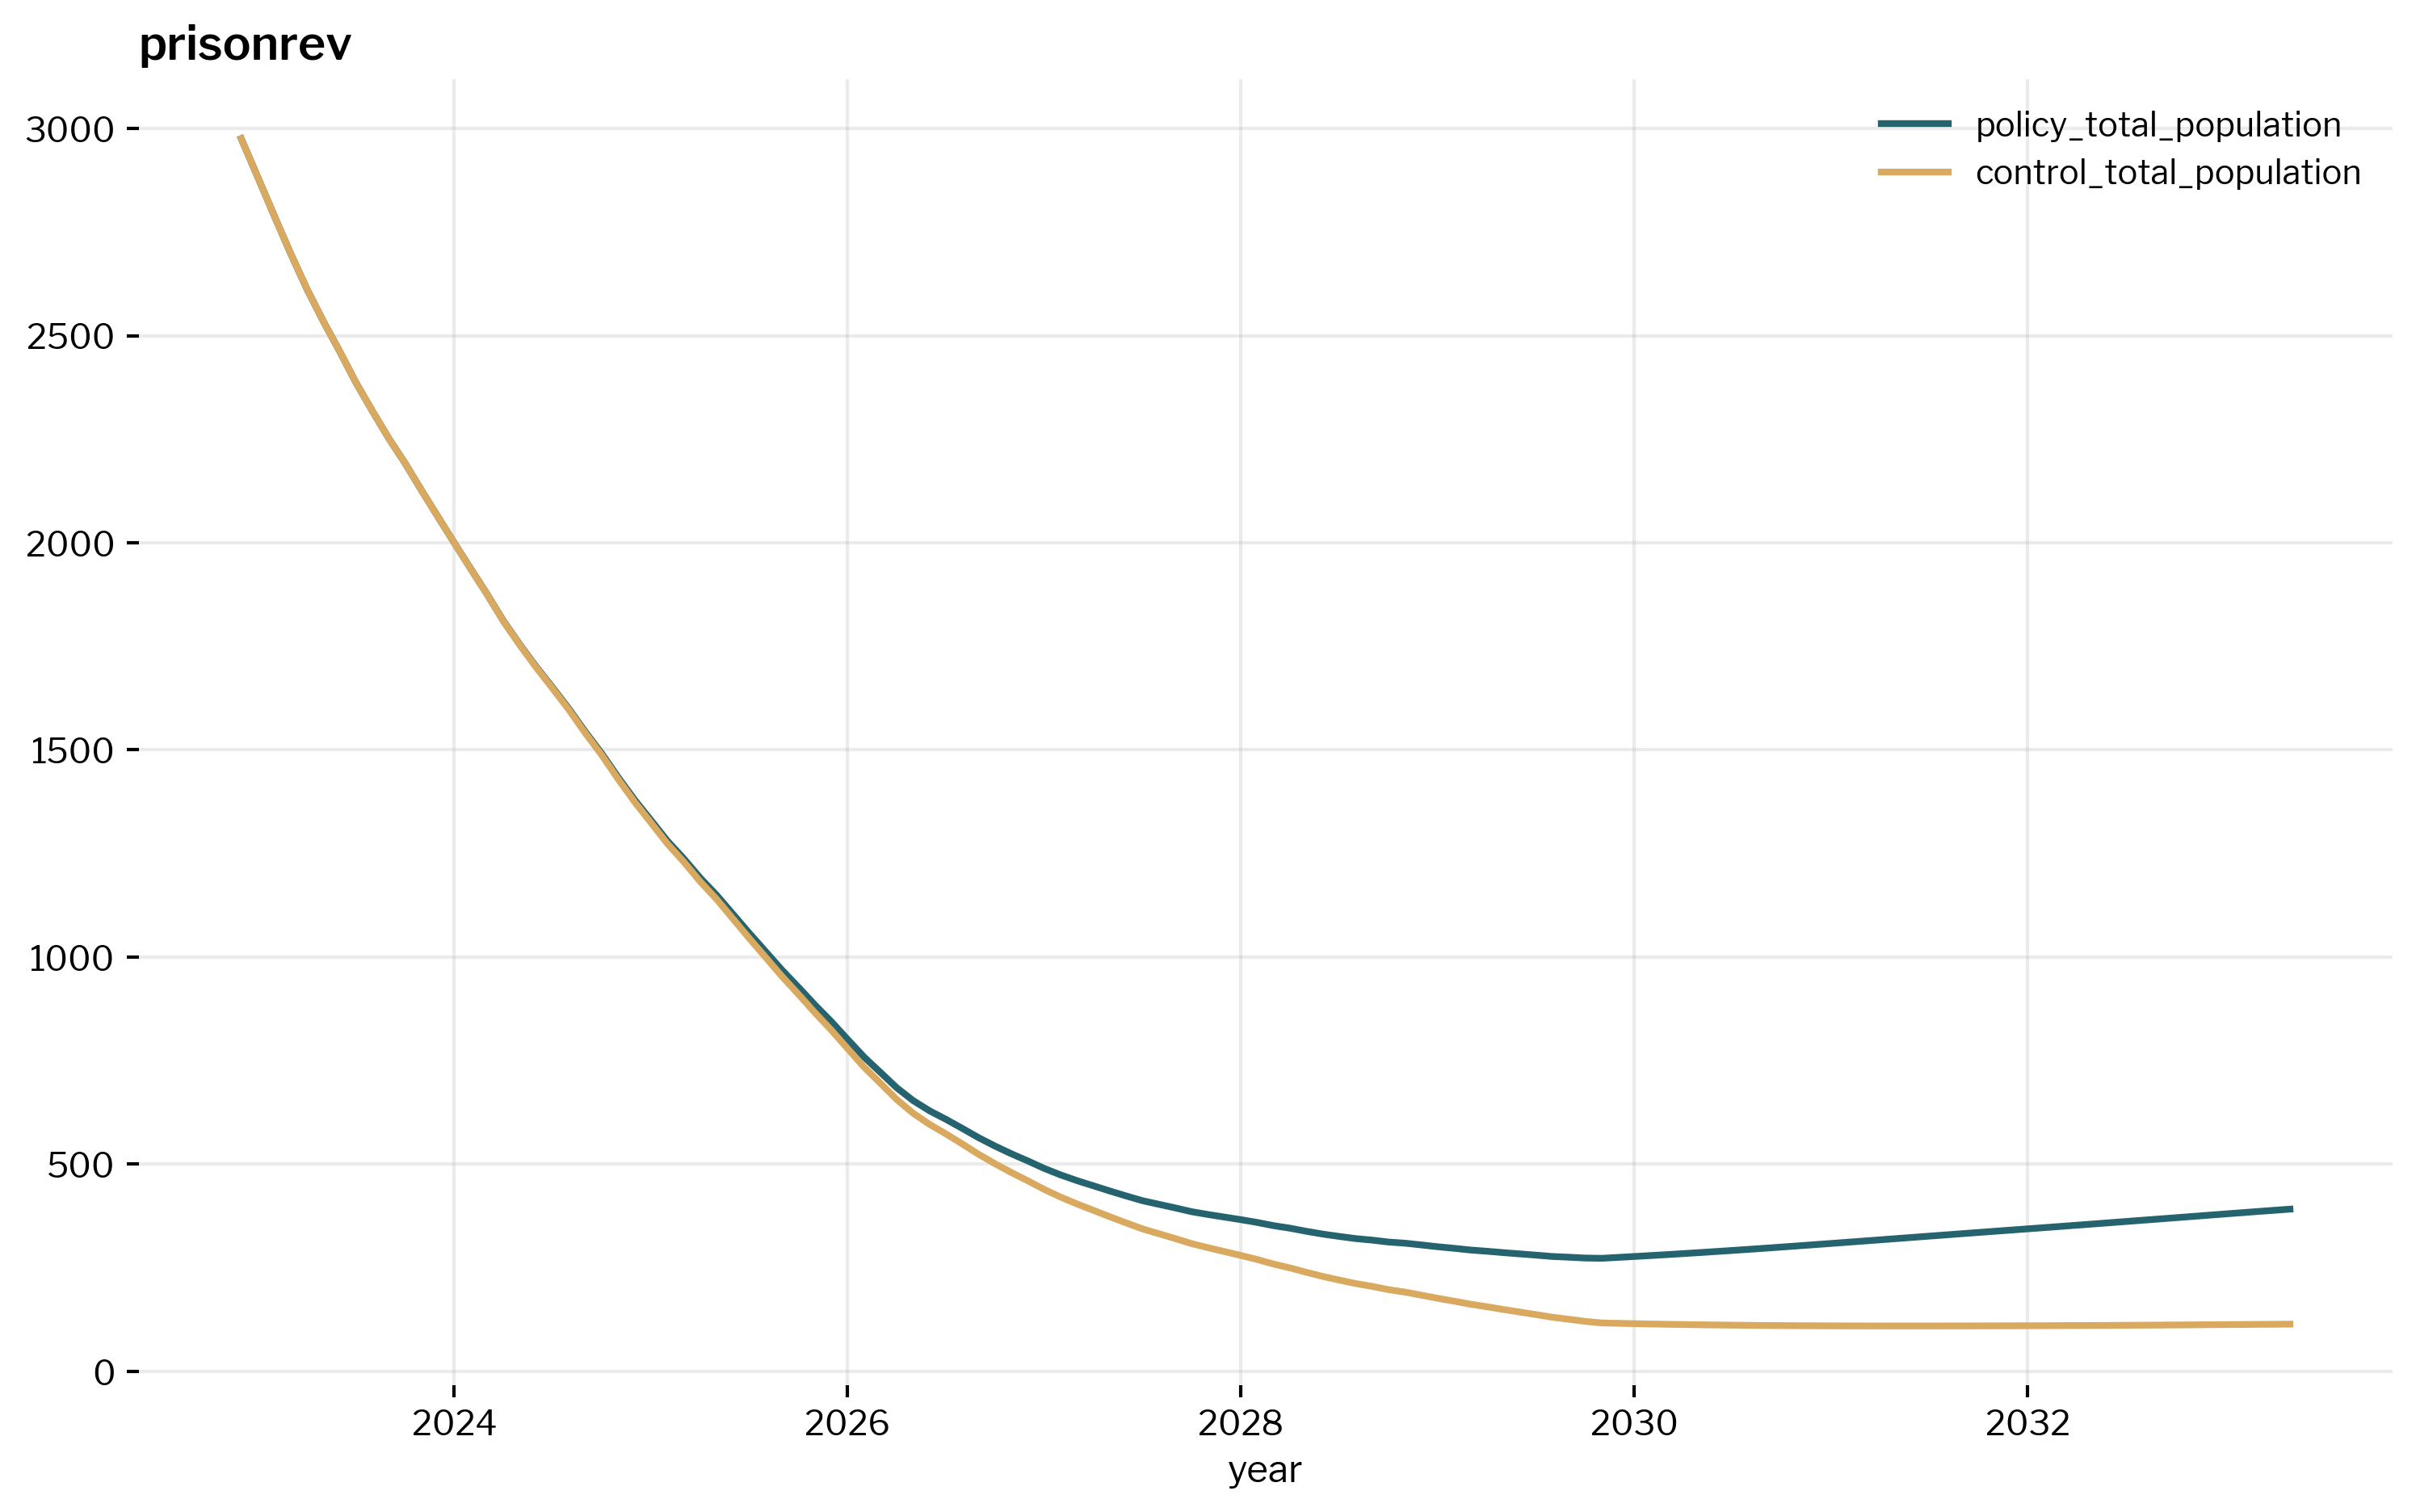

In [55]:
for comp in popagg.columns.get_level_values(1).unique():
    popagg.xs(comp, level="compartment", axis=1).plot()
    plt.title(comp)

In [56]:
policy_results["compartment_grouped"] = policy_results.compartment.mask(
    policy_results.compartment.str.contains("prison"), "prison"
)

pop_results_grouped = (
    policy_results.reset_index().groupby(["year", "compartment_grouped"]).sum()
)
popagg = pop_results_grouped.reset_index().pivot(
    index="year",
    columns=["compartment_grouped"],
    values=["policy_total_population", "control_total_population"],
)

/var/folders/jn/2ddz89hx6tjf4m3dvz3dch840000gn/T/ipykernel_3588/2450009695.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  policy_results.reset_index().groupby(["year", "compartment_grouped"]).sum()


In [57]:
for x in popagg.columns.get_level_values(1).unique():
    display(x)

'liberty'

'parole'

'prison'

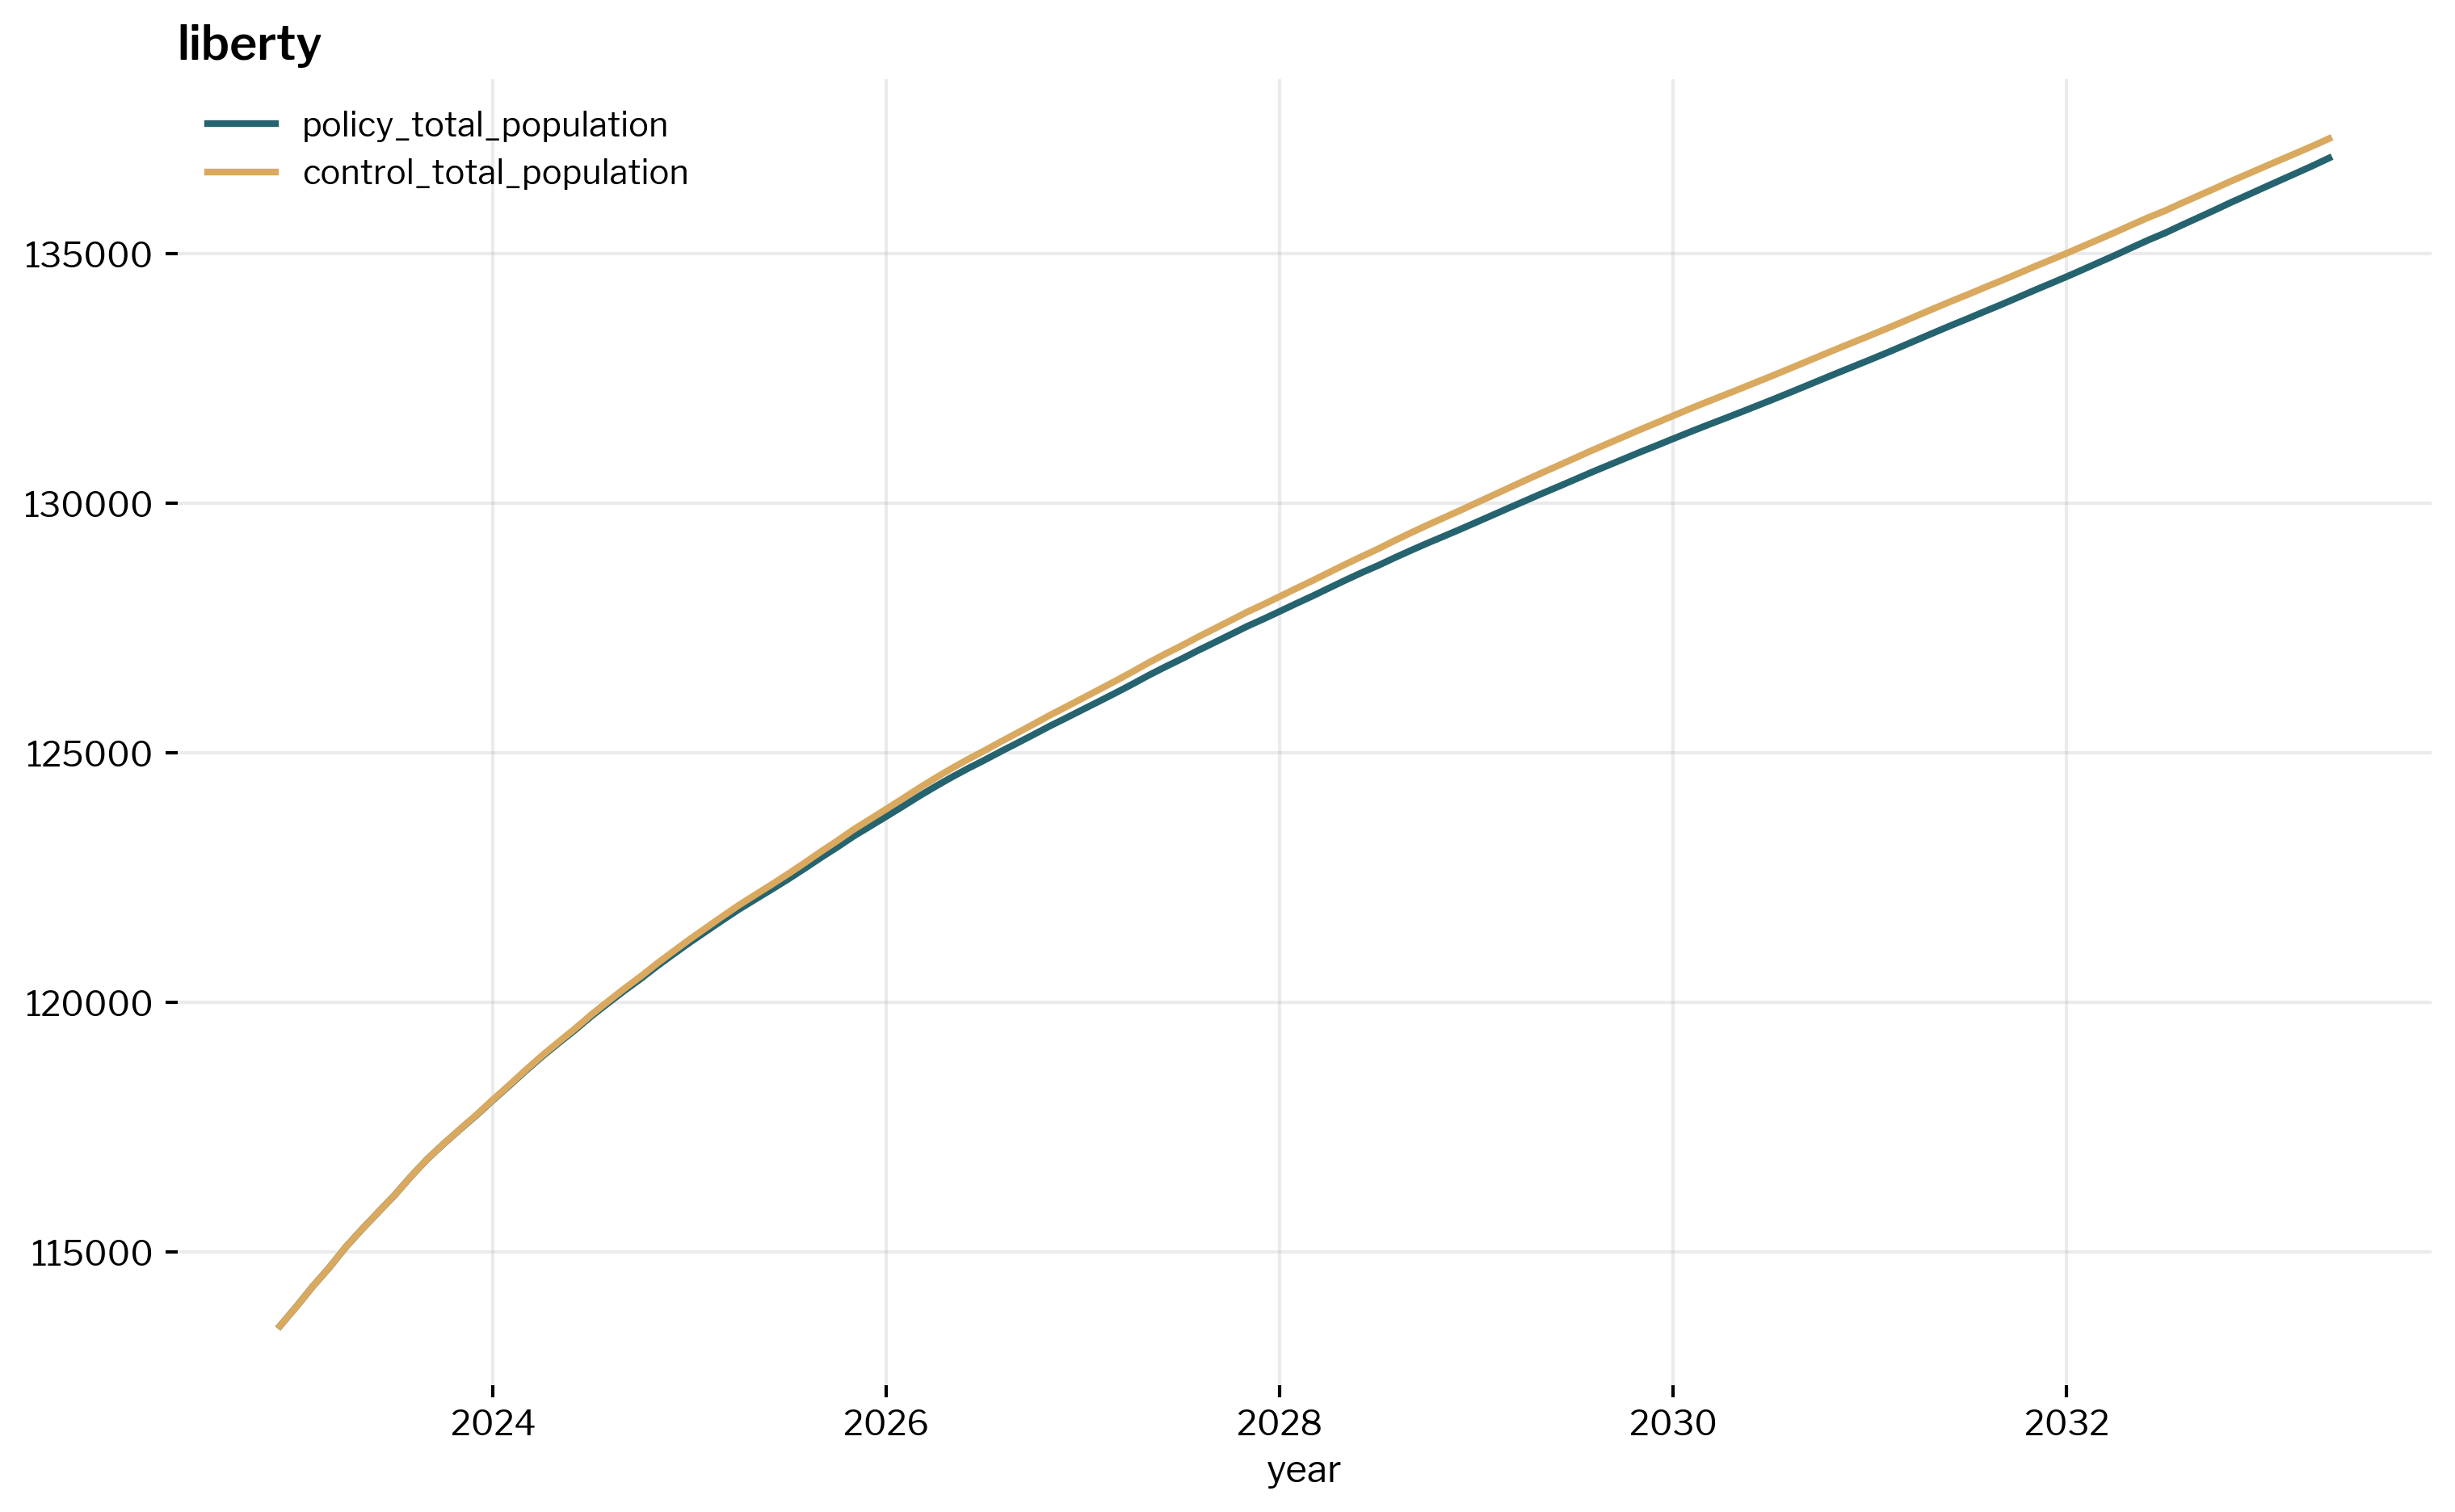

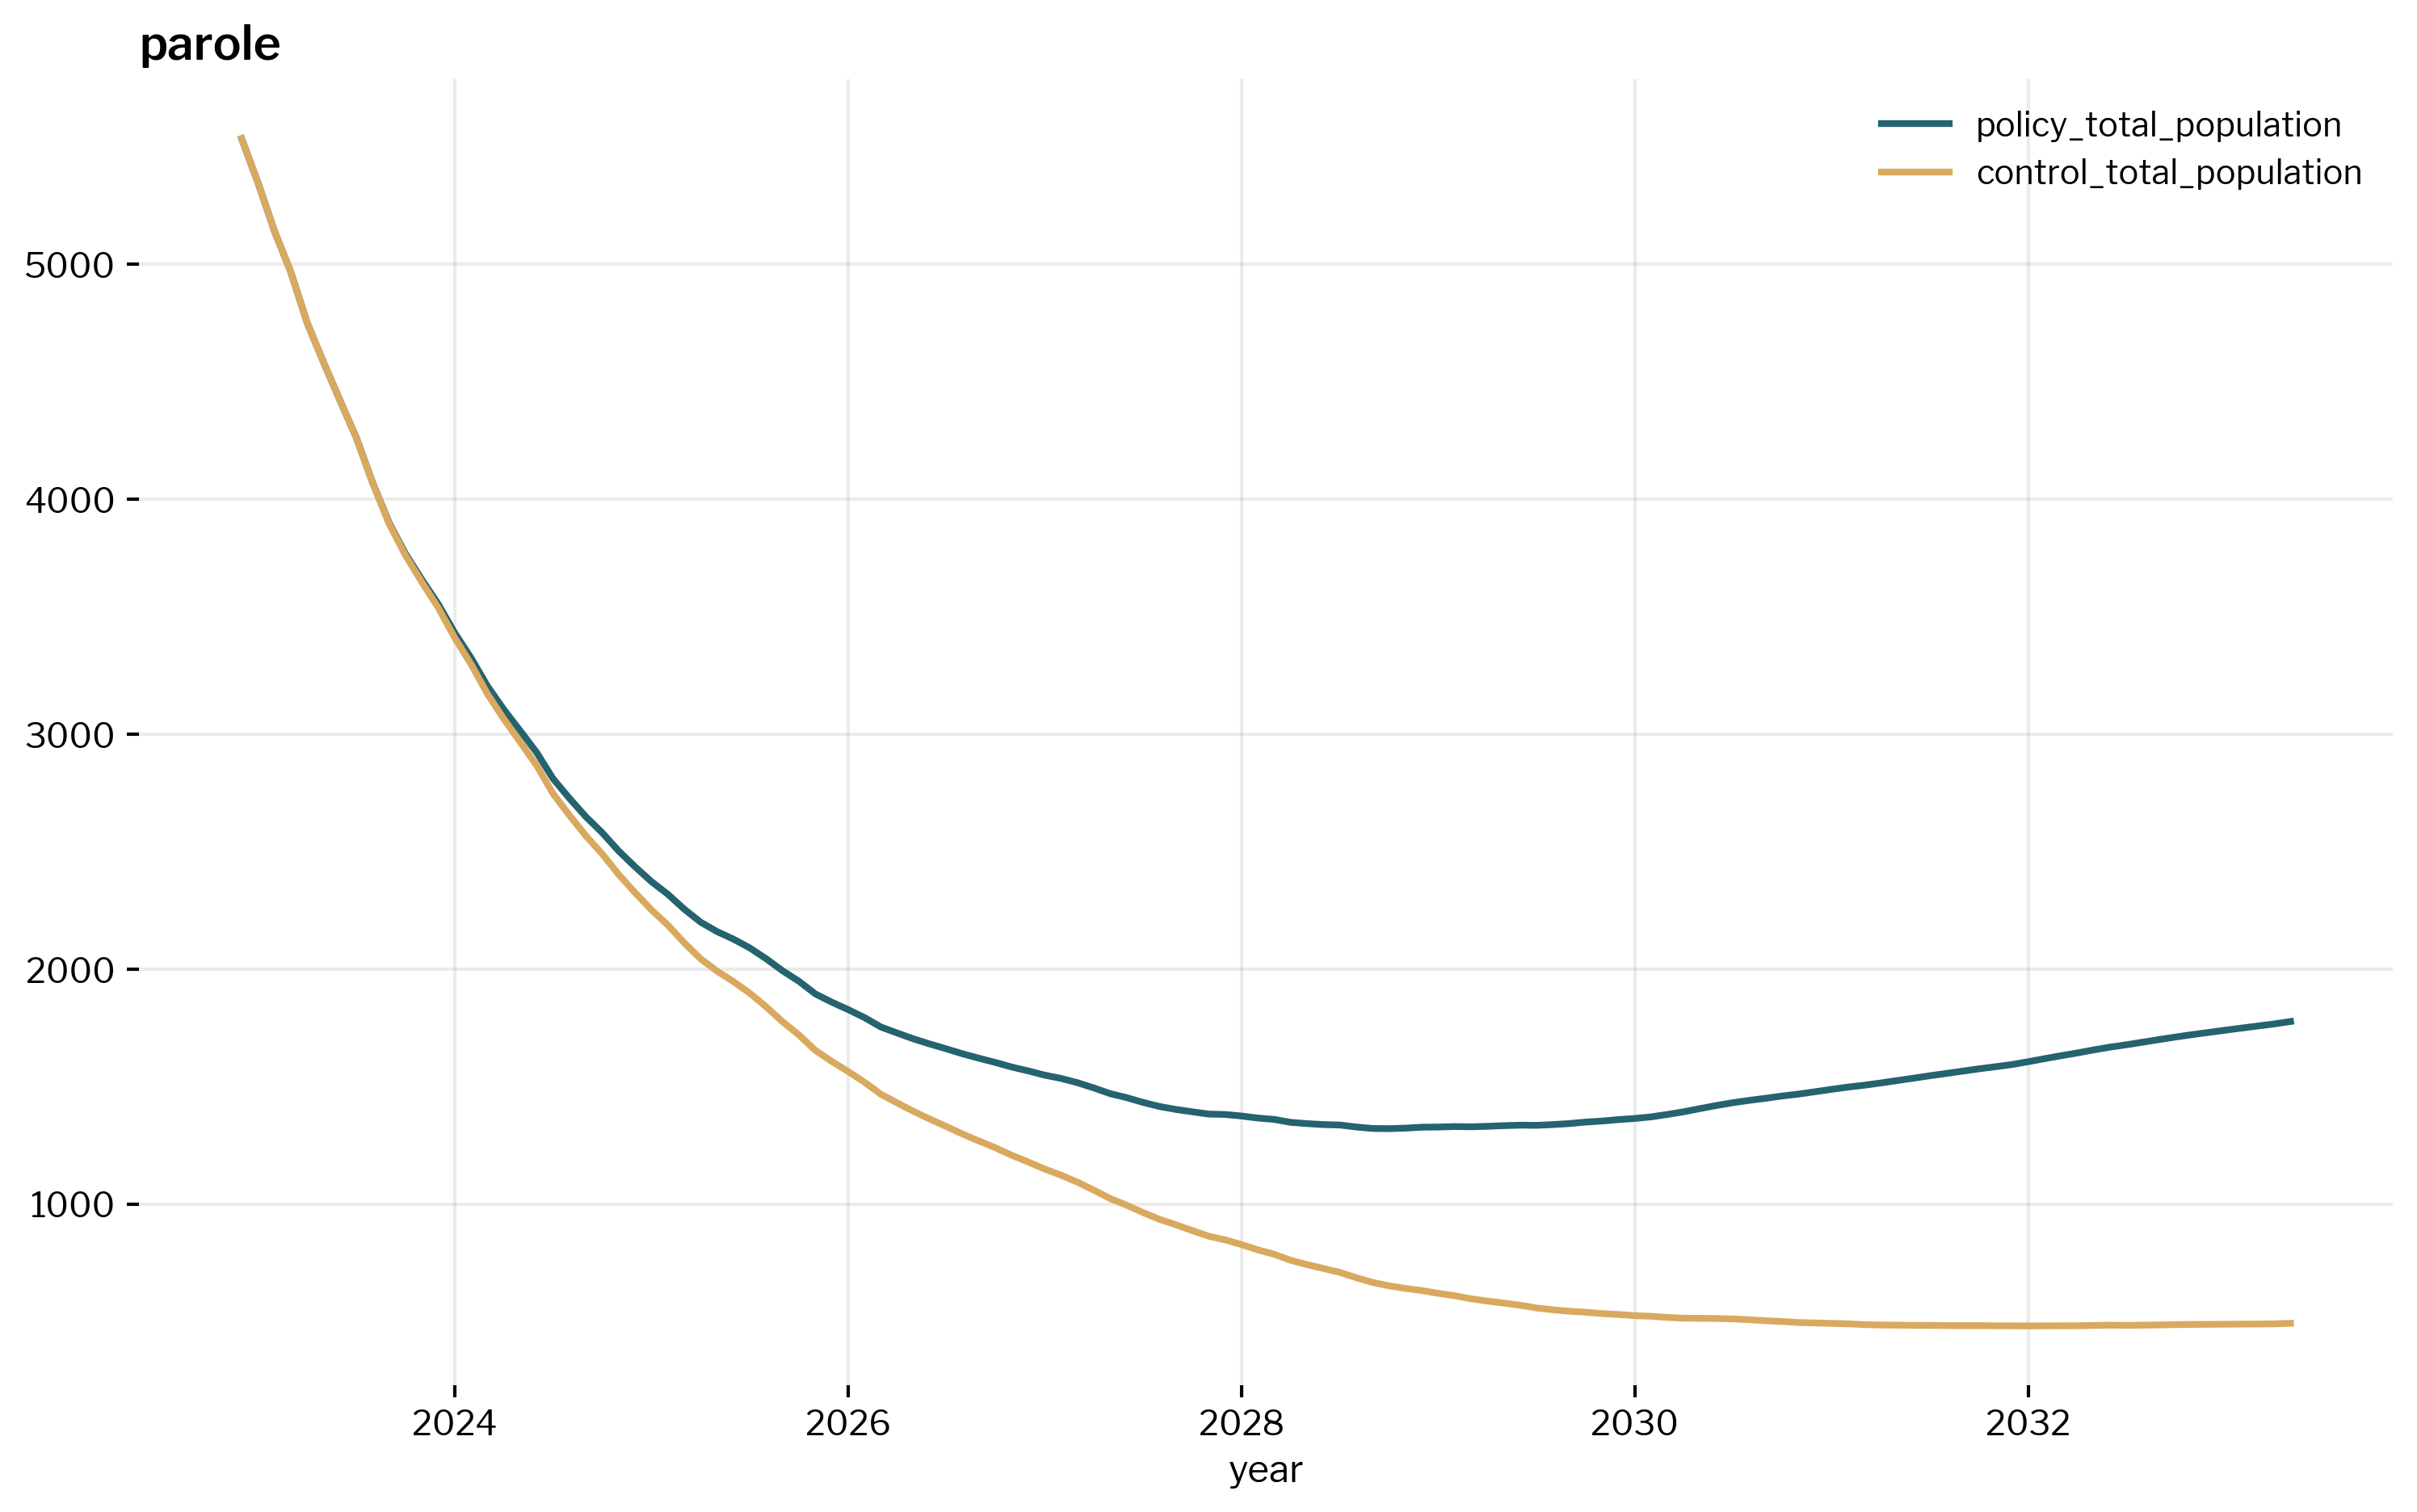

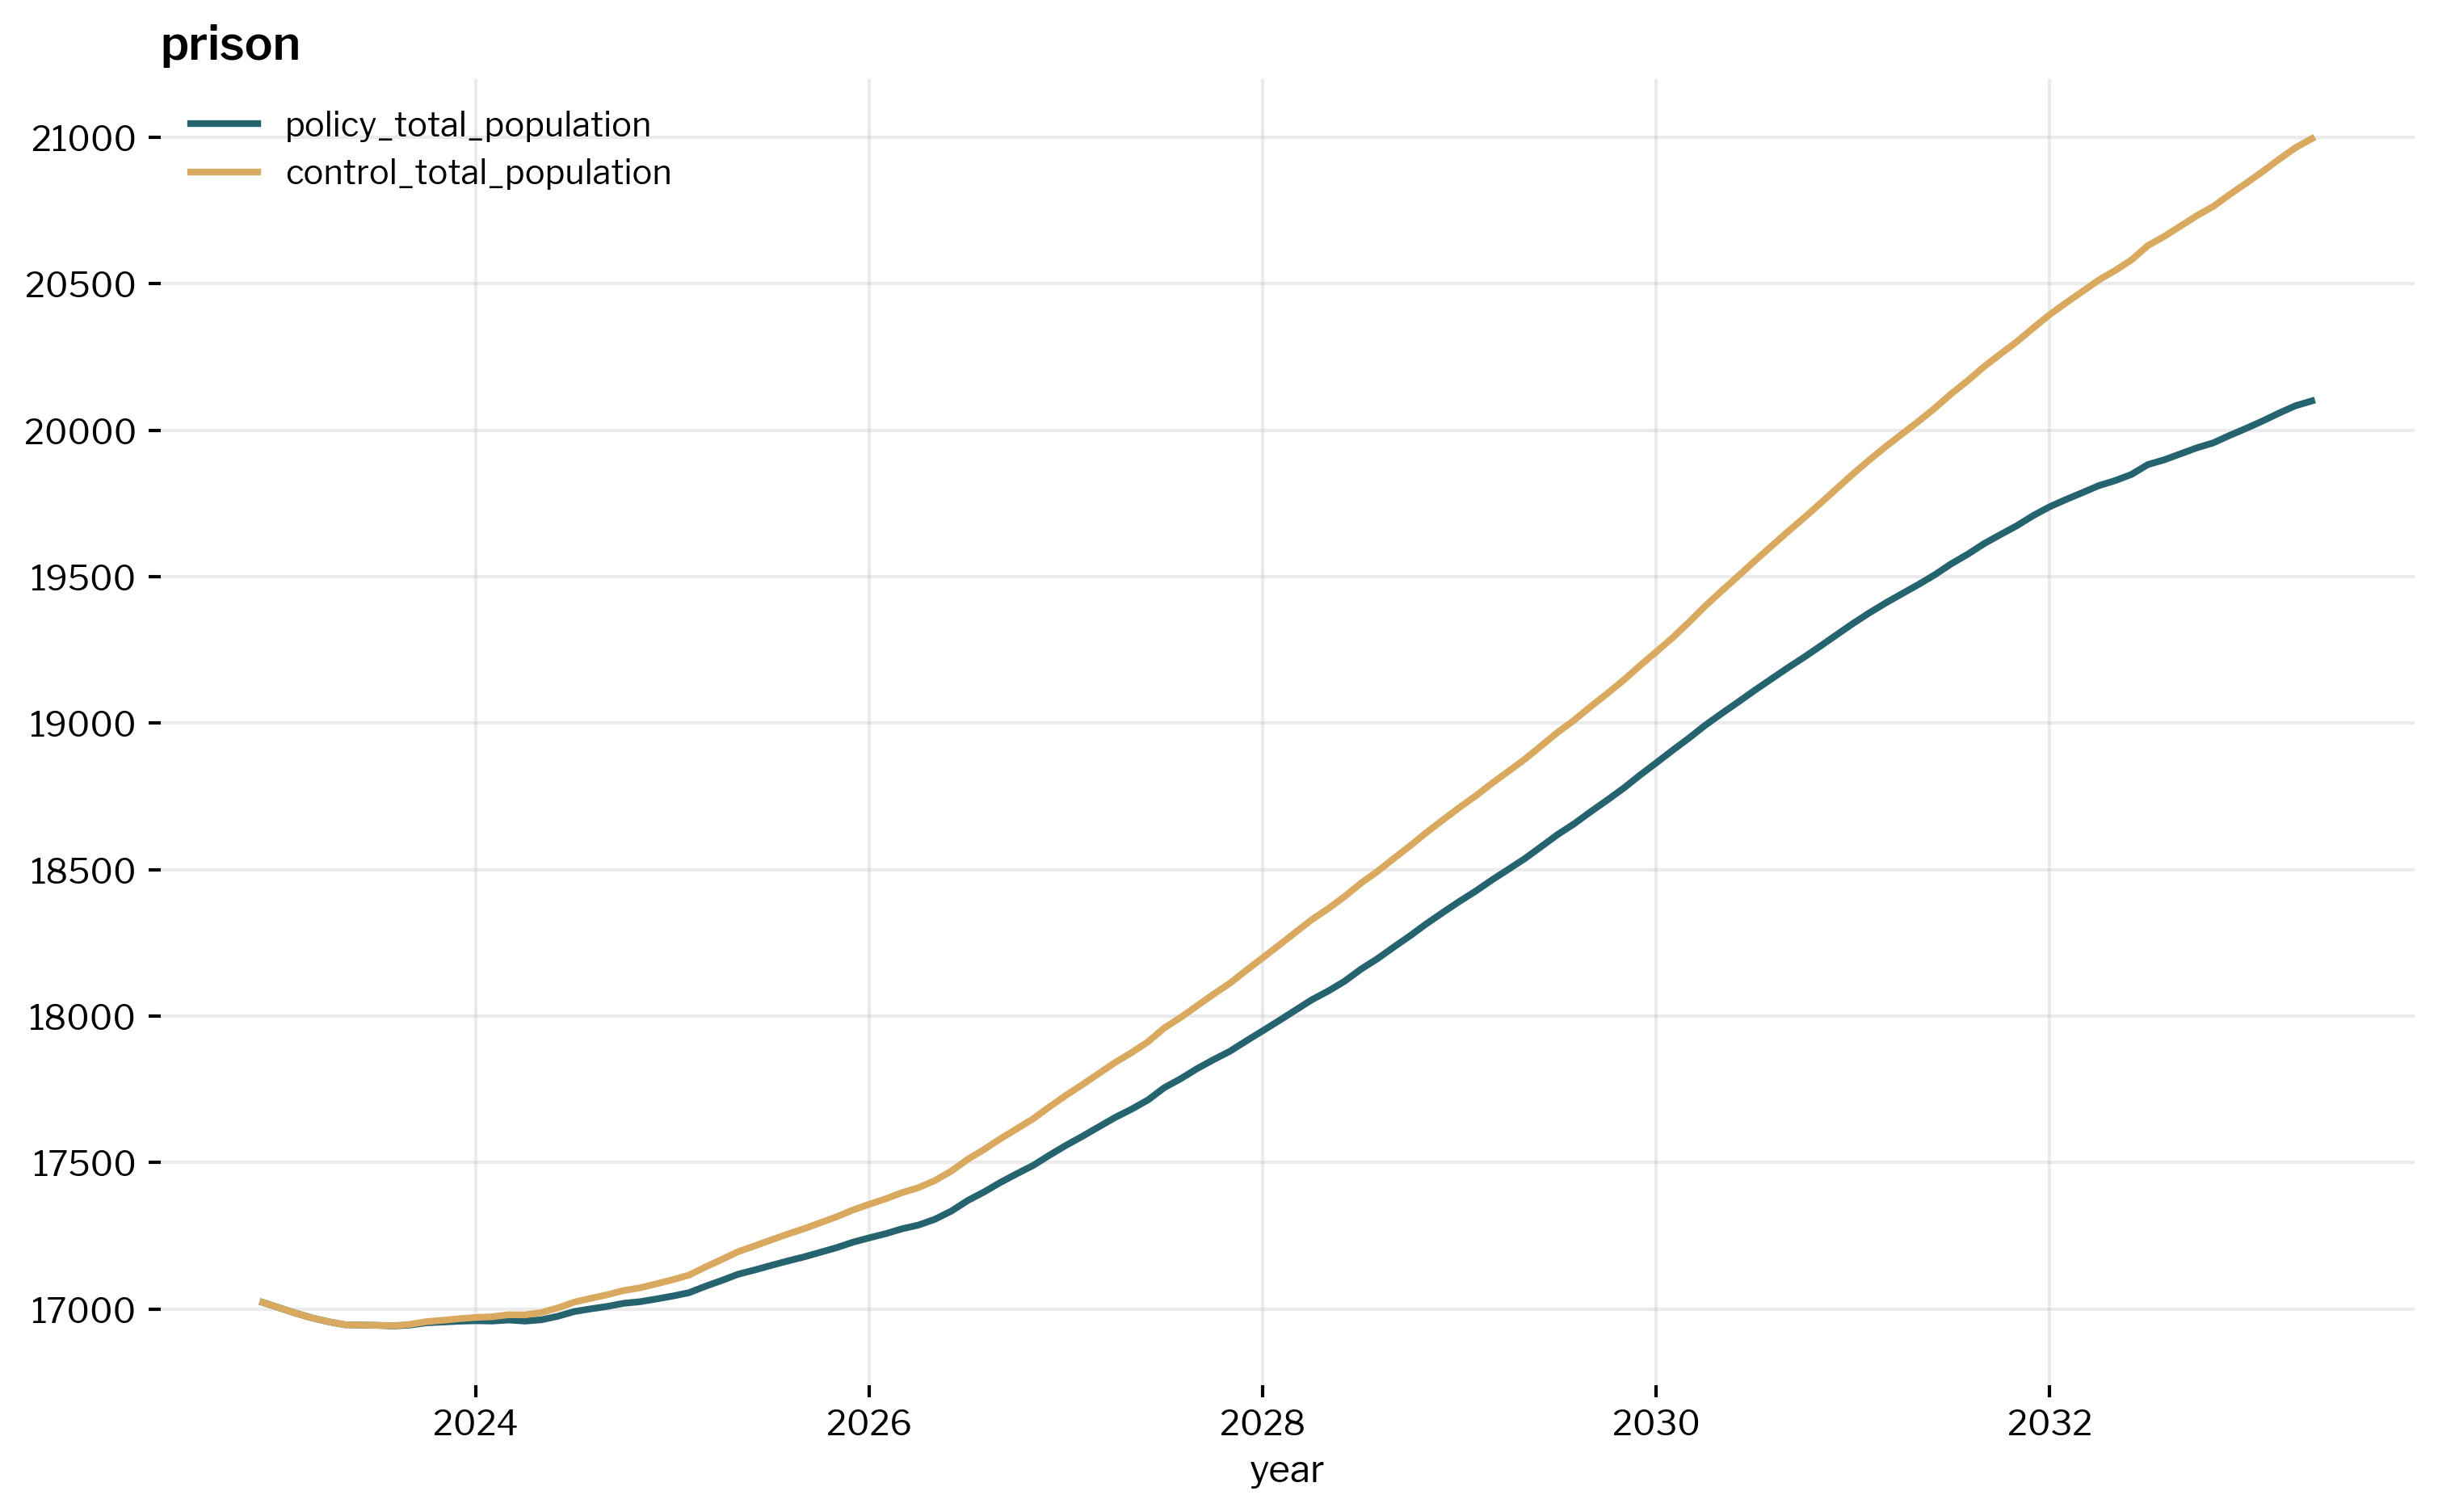

In [58]:
for comp in popagg.columns.get_level_values(1).unique():
    popagg.xs(comp, level="compartment_grouped", axis=1).plot()
    plt.title(comp)

In [59]:
# popagg[popagg.columns.get_level_values(1) == "liberty"]

In [60]:
policy_sim.simulator.pop_simulations

{'control': <recidiviz.calculator.modeling.population_projection.population_simulation.population_simulation.PopulationSimulation at 0x16ad33fa0>,
 'policy': <recidiviz.calculator.modeling.population_projection.population_simulation.population_simulation.PopulationSimulation at 0x16abd4400>}

In [61]:
subsimd = {
    "control": policy_sim.simulator.pop_simulations["control"].sub_simulations,
    "policy": policy_sim.simulator.pop_simulations["policy"].sub_simulations,
}
policy_sim.simulator.pop_simulations["control"].sub_simulations

{'nonviolent': <recidiviz.calculator.modeling.population_projection.sub_simulation.sub_simulation.SubSimulation at 0x2c1324430>,
 'violent': <recidiviz.calculator.modeling.population_projection.sub_simulation.sub_simulation.SubSimulation at 0x2c1489dc0>}

In [62]:
t = (
    policy_sim.simulator.pop_simulations["control"]
    .sub_simulations["nonviolent"]
    .simulation_compartments["parole"]
)
compflows = pd.DataFrame(t.outflows.copy()).T
compflows.prison = compflows.prisonrev.combine_first(compflows.prison)
compflows.melt(
    value_vars=["liberty", "parole", "prison"], var_name="outflow_to", value_name="num"
)
# compflows.compartment.head()

outflow_to       num
0       liberty  0.000000
1       liberty  0.000000
2       liberty  0.000000
3       liberty  0.000000
4       liberty  0.000000
...         ...       ...
1270     prison  1.723367
1271     prison  1.723362
1272     prison  1.723366
1273     prison  1.723382
1274     prison  1.723380

[1275 rows x 2 columns]

In [63]:
policy_sim.simulator.pop_simulations["policy"].sub_simulations,

({'nonviolent': <recidiviz.calculator.modeling.population_projection.sub_simulation.sub_simulation.SubSimulation at 0x16d512400>,
  'violent': <recidiviz.calculator.modeling.population_projection.sub_simulation.sub_simulation.SubSimulation at 0x16acb33d0>},)

In [64]:
def get_outflows_results(sim):
    outflows = policy_sim.simulator.pop_simulations[sim].get_outflows().reset_index()
    #     outflows['outflow_to'] = outflows.outflow_to.mask(
    #         outflows.outflow_to.str.contains('prison'),
    #         'prison'
    #     )

    outflows = (
        outflows.groupby(["compartment", "outflow_to", "time_step"])[
            ["total_population"]
        ]
        .sum()
        .reset_index()
    )
    outflows["simulation"] = sim
    #     outflows['outflow_tuple'] = outflows.compartment_grouped +","+ outflows.outflow_to
    return outflows

In [65]:
outflows_control = (
    policy_sim.simulator.pop_simulations["control"].get_outflows().reset_index()
)
outflows_policy = (
    policy_sim.simulator.pop_simulations["policy"].get_outflows().reset_index()
)

In [66]:
outflows = pd.concat([get_outflows_results(sim) for sim in ["control", "policy"]])
outflows_pivoted = outflows.pivot(
    index="time_step",
    columns=["compartment", "simulation", "outflow_to"],
    values="total_population",
)

In [67]:
prison_outflows = outflows_pivoted.xs("prison", level="compartment", axis=1).xs(
    "parole", level="outflow_to", axis=1
)
prison_outflows["year"] = np.floor(prison_outflows.index / 12)
prison_outflows.head()
prison_outflows.groupby("year").sum()

simulation      control       policy
year                                
-26.0        278.000000   278.000000
-25.0       3336.000000  3336.000000
-24.0       3336.000000  3336.000000
-23.0       3336.000000  3336.000000
-22.0       3336.000000  3336.000000
-21.0       3336.000000  3336.000000
-20.0       3336.000000  3336.000000
-19.0       3336.000000  3336.000000
-18.0       3336.000000  3336.000000
-17.0       3336.000000  3336.000000
-16.0       3336.000000  3336.000000
-15.0       3336.000000  3336.000000
-14.0       3336.000000  3336.000000
-13.0       3336.000000  3336.000000
-12.0       3336.000000  3336.000000
-11.0       3336.000000  3336.000000
-10.0       3336.000000  3336.000000
-9.0        3336.000000  3336.000000
-8.0        3336.000000  3336.000000
-7.0        3336.000000  3336.000000
-6.0        4126.000000  4126.000000
-5.0        3866.000000  3866.000000
-4.0        2076.000000  2076.000000
-3.0        1023.000000  1023.000000
-2.0         641.000000   641.000000
-1.0         404.531395   404.531395
 0.0         144.528427   167.026074
 1.0         152.218811   279.030606
 2.0         160.430417   380.647443
 3.0         164.808480   435.181874
 4.0         169.612956   506.016261
 5.0         172.607535   576.503724
 6.0         177.745763   612.905915
 7.0         184.480961   706.051658
 8.0         187.794192   736.438579
 9.0         200.478955   797.455924
 10.0         65.605644   265.472889

In [68]:
# b = outflows.xs('parole', level="compartment_grouped", axis=1)
# b['control','prison_total'] = b['control','prison'] + b['control','prisonrev']
# b['control']

In [69]:
outflows_pivoted.head()

compartment      liberty  parole                         pretrial         \
simulation       control control                          control          
outflow_to       liberty liberty parole prison prisonrev  liberty parole   
time_step                                                                  
-301            0.000000     0.0    0.0    0.0      81.0      NaN    NaN   
-300          293.000000     0.0    0.0    0.0      81.0      0.0    0.0   
-299          594.437929     0.0    0.0    0.0      81.0      0.0    0.0   
-298          898.464676     0.0    0.0    0.0      81.0      0.0    0.0   
-297         1205.545188     0.0    0.0    0.0      81.0      0.0    0.0   

compartment                    prison                          prisonrev  \
simulation                    control                            control   
outflow_to   prison prisonrev liberty parole prison prisonrev    liberty   
time_step                                                                  
-301            NaN       NaN   293.0  278.0    0.0       0.0   0.000000   
-300         200.25       0.0   293.0  278.0    0.0       0.0   8.437929   
-299         200.25       0.0   293.0  278.0    0.0       0.0  11.026747   
-298         200.25       0.0   293.0  278.0    0.0       0.0  14.080512   
-297         200.25       0.0   293.0  278.0    0.0       0.0  16.266552   

compartment      liberty  parole                         pretrial         \
simulation        policy  policy                           policy          
outflow_to       liberty liberty parole prison prisonrev  liberty parole   
time_step                                                                  
-301            0.000000     0.0    0.0    0.0      81.0      NaN    NaN   
-300          293.000000     0.0    0.0    0.0      81.0      0.0    0.0   
-299          594.437929     0.0    0.0    0.0      81.0      0.0    0.0   
-298          898.464676     0.0    0.0    0.0      81.0      0.0    0.0   
-297         1205.545188     0.0    0.0    0.0      81.0      0.0    0.0   

compartment                    prison                          prisonrev  
simulation                     policy                             policy  
outflow_to   prison prisonrev liberty parole prison prisonrev    liberty  
time_step                                                                 
-301            NaN       NaN   293.0  278.0    0.0       0.0   0.000000  
-300         200.25       0.0   293.0  278.0    0.0       0.0   8.437929  
-299         200.25       0.0   293.0  278.0    0.0       0.0  11.026747  
-298         200.25       0.0   293.0  278.0    0.0       0.0  14.080512  
-297         200.25       0.0   293.0  278.0    0.0       0.0  16.266552

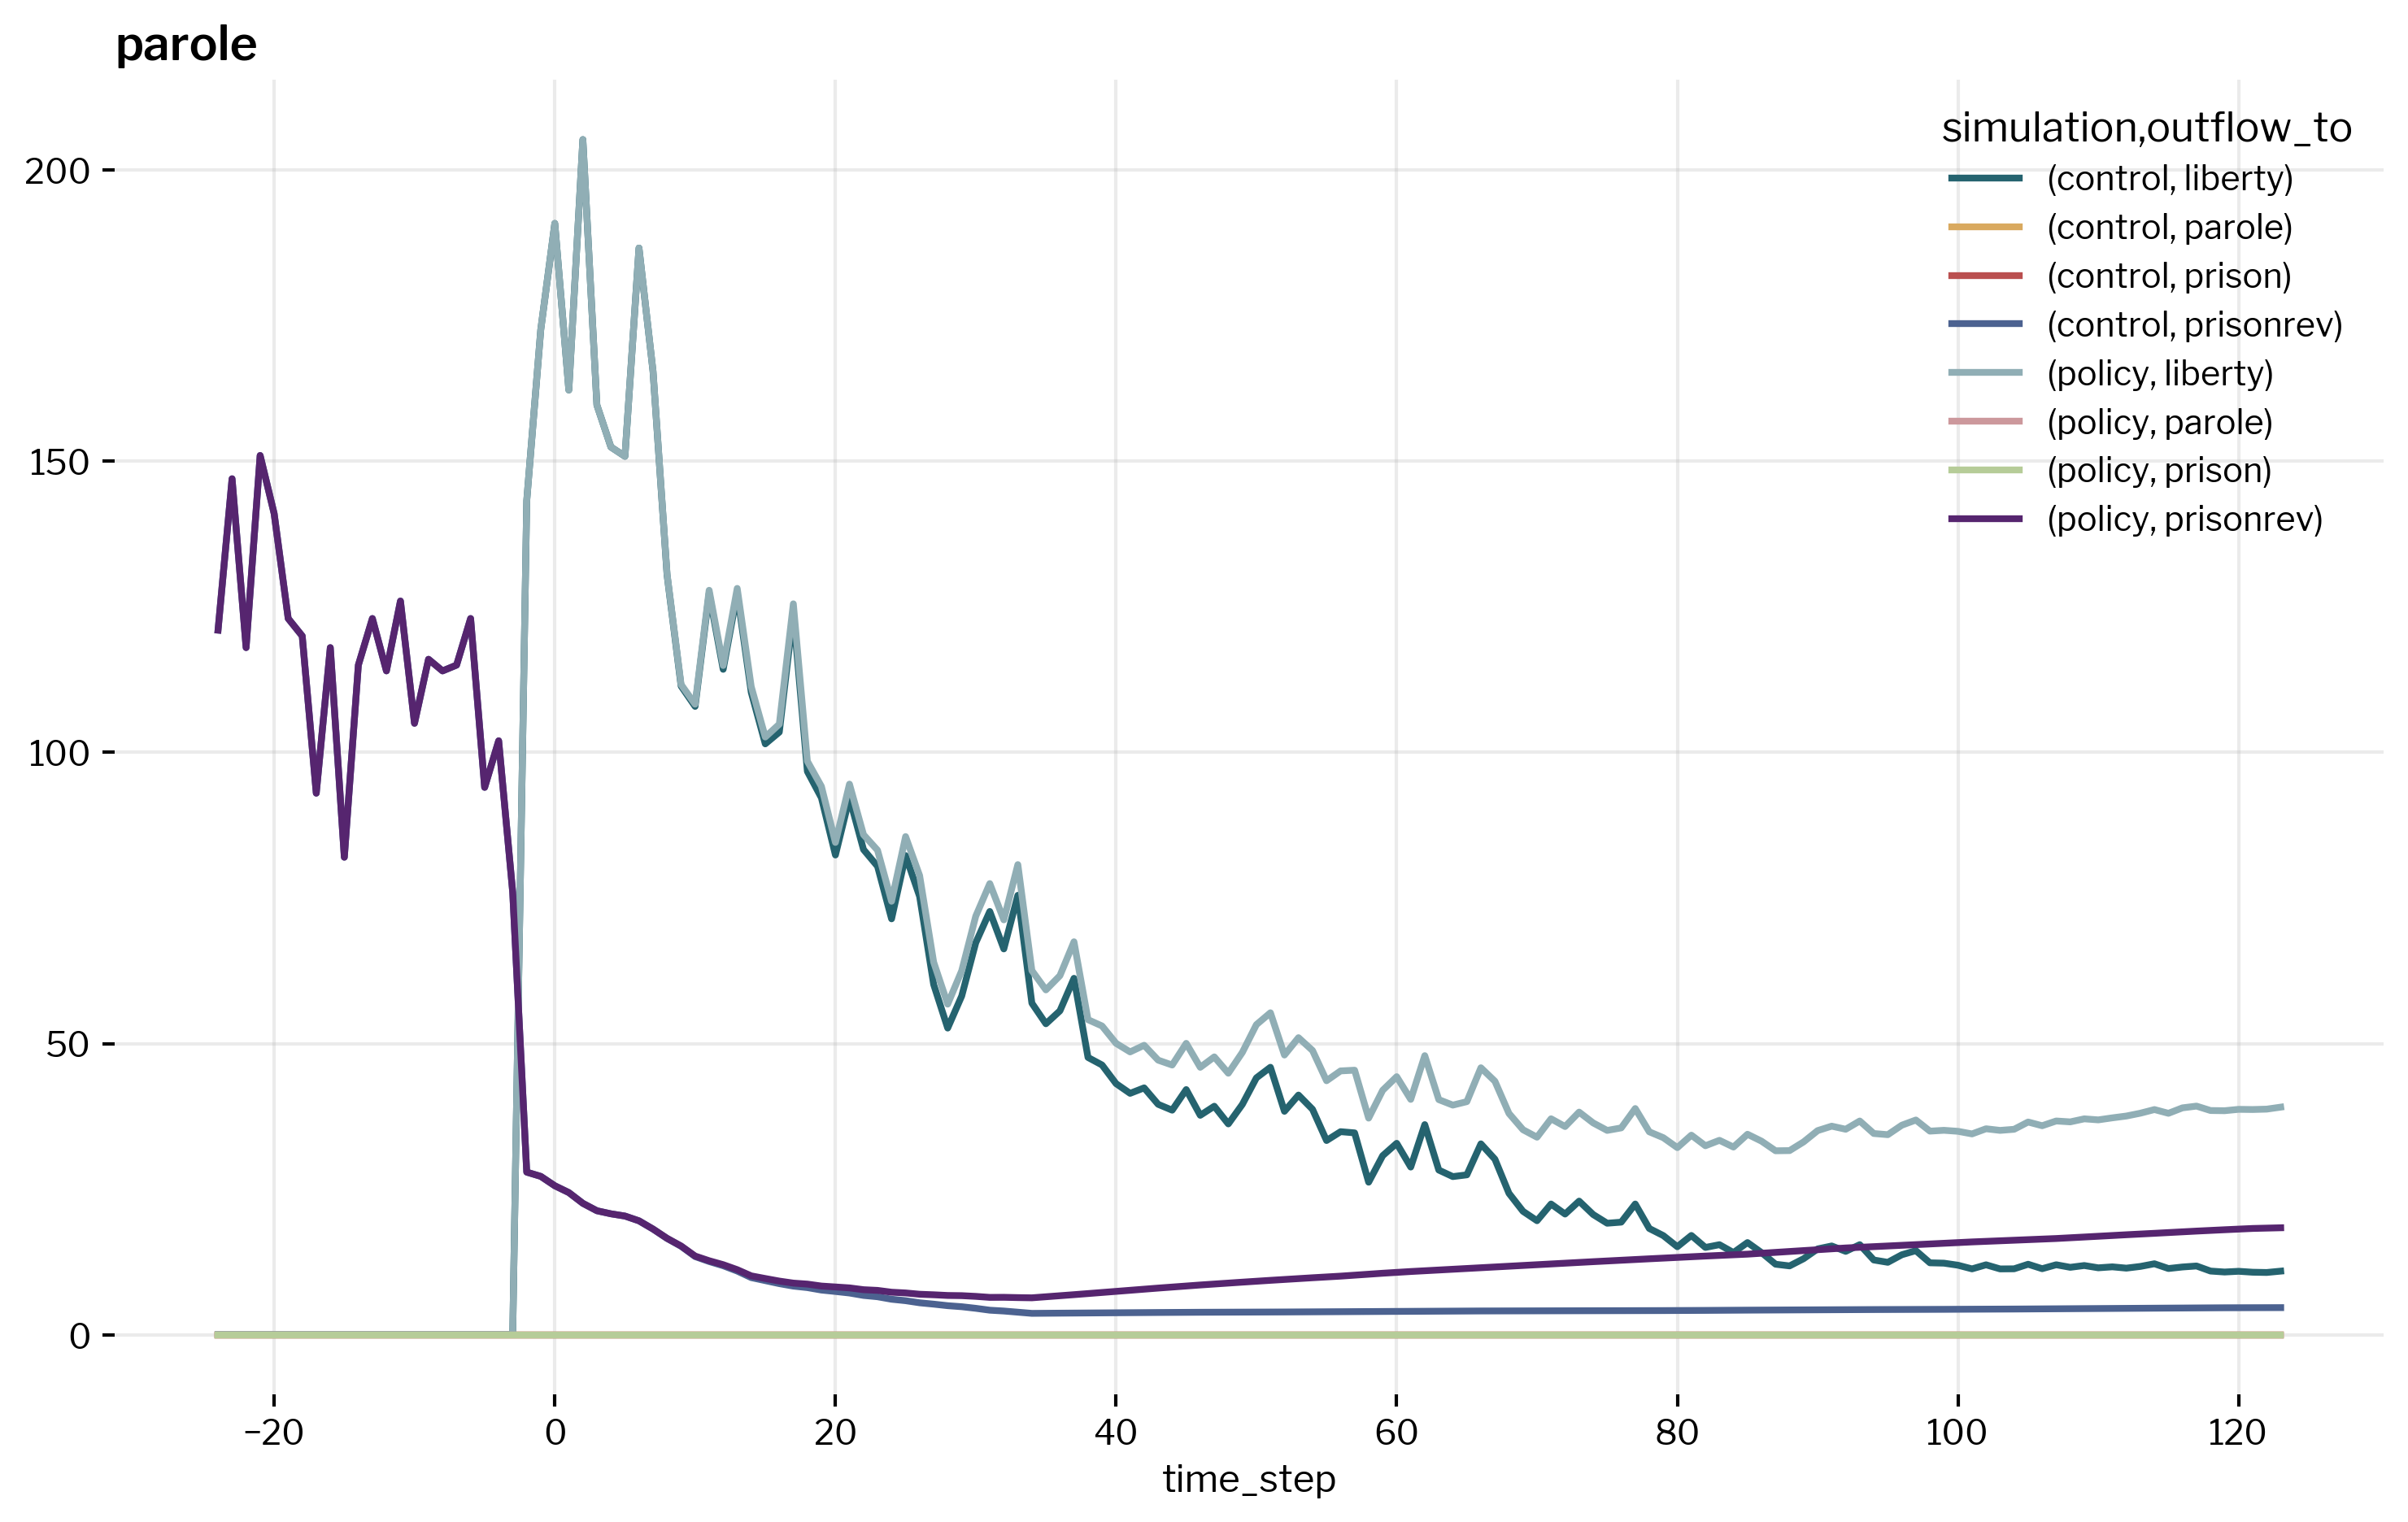

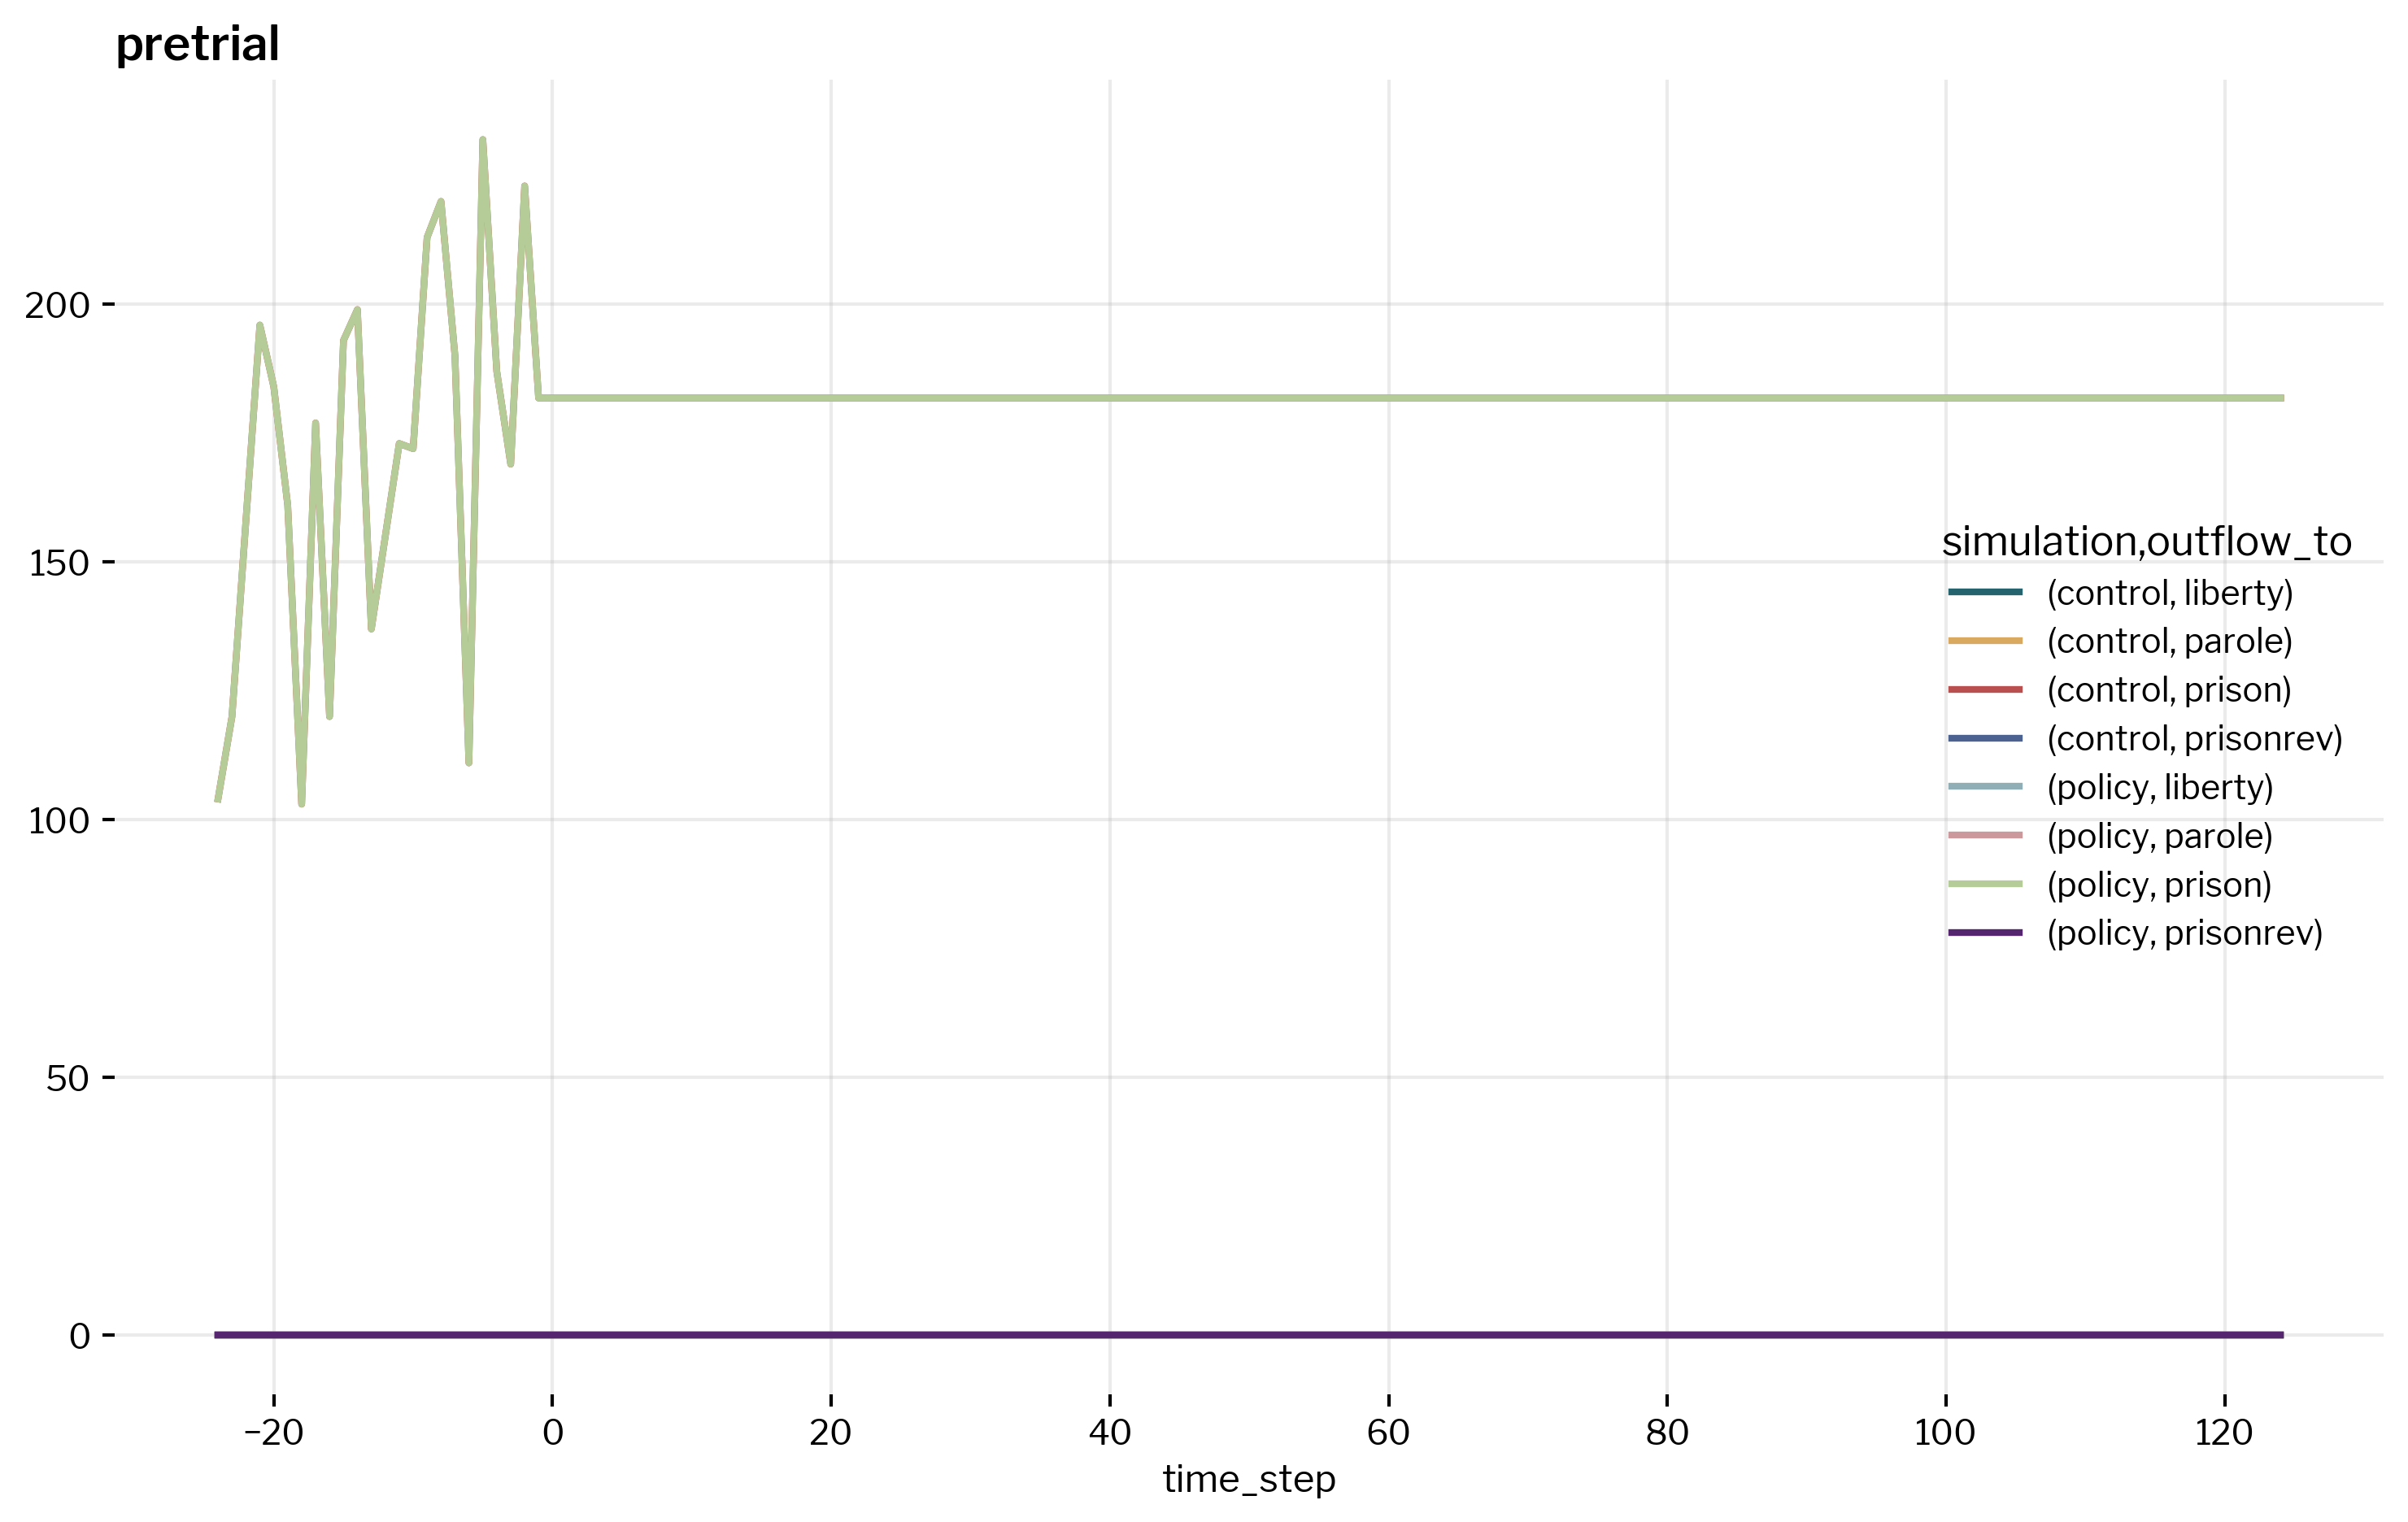

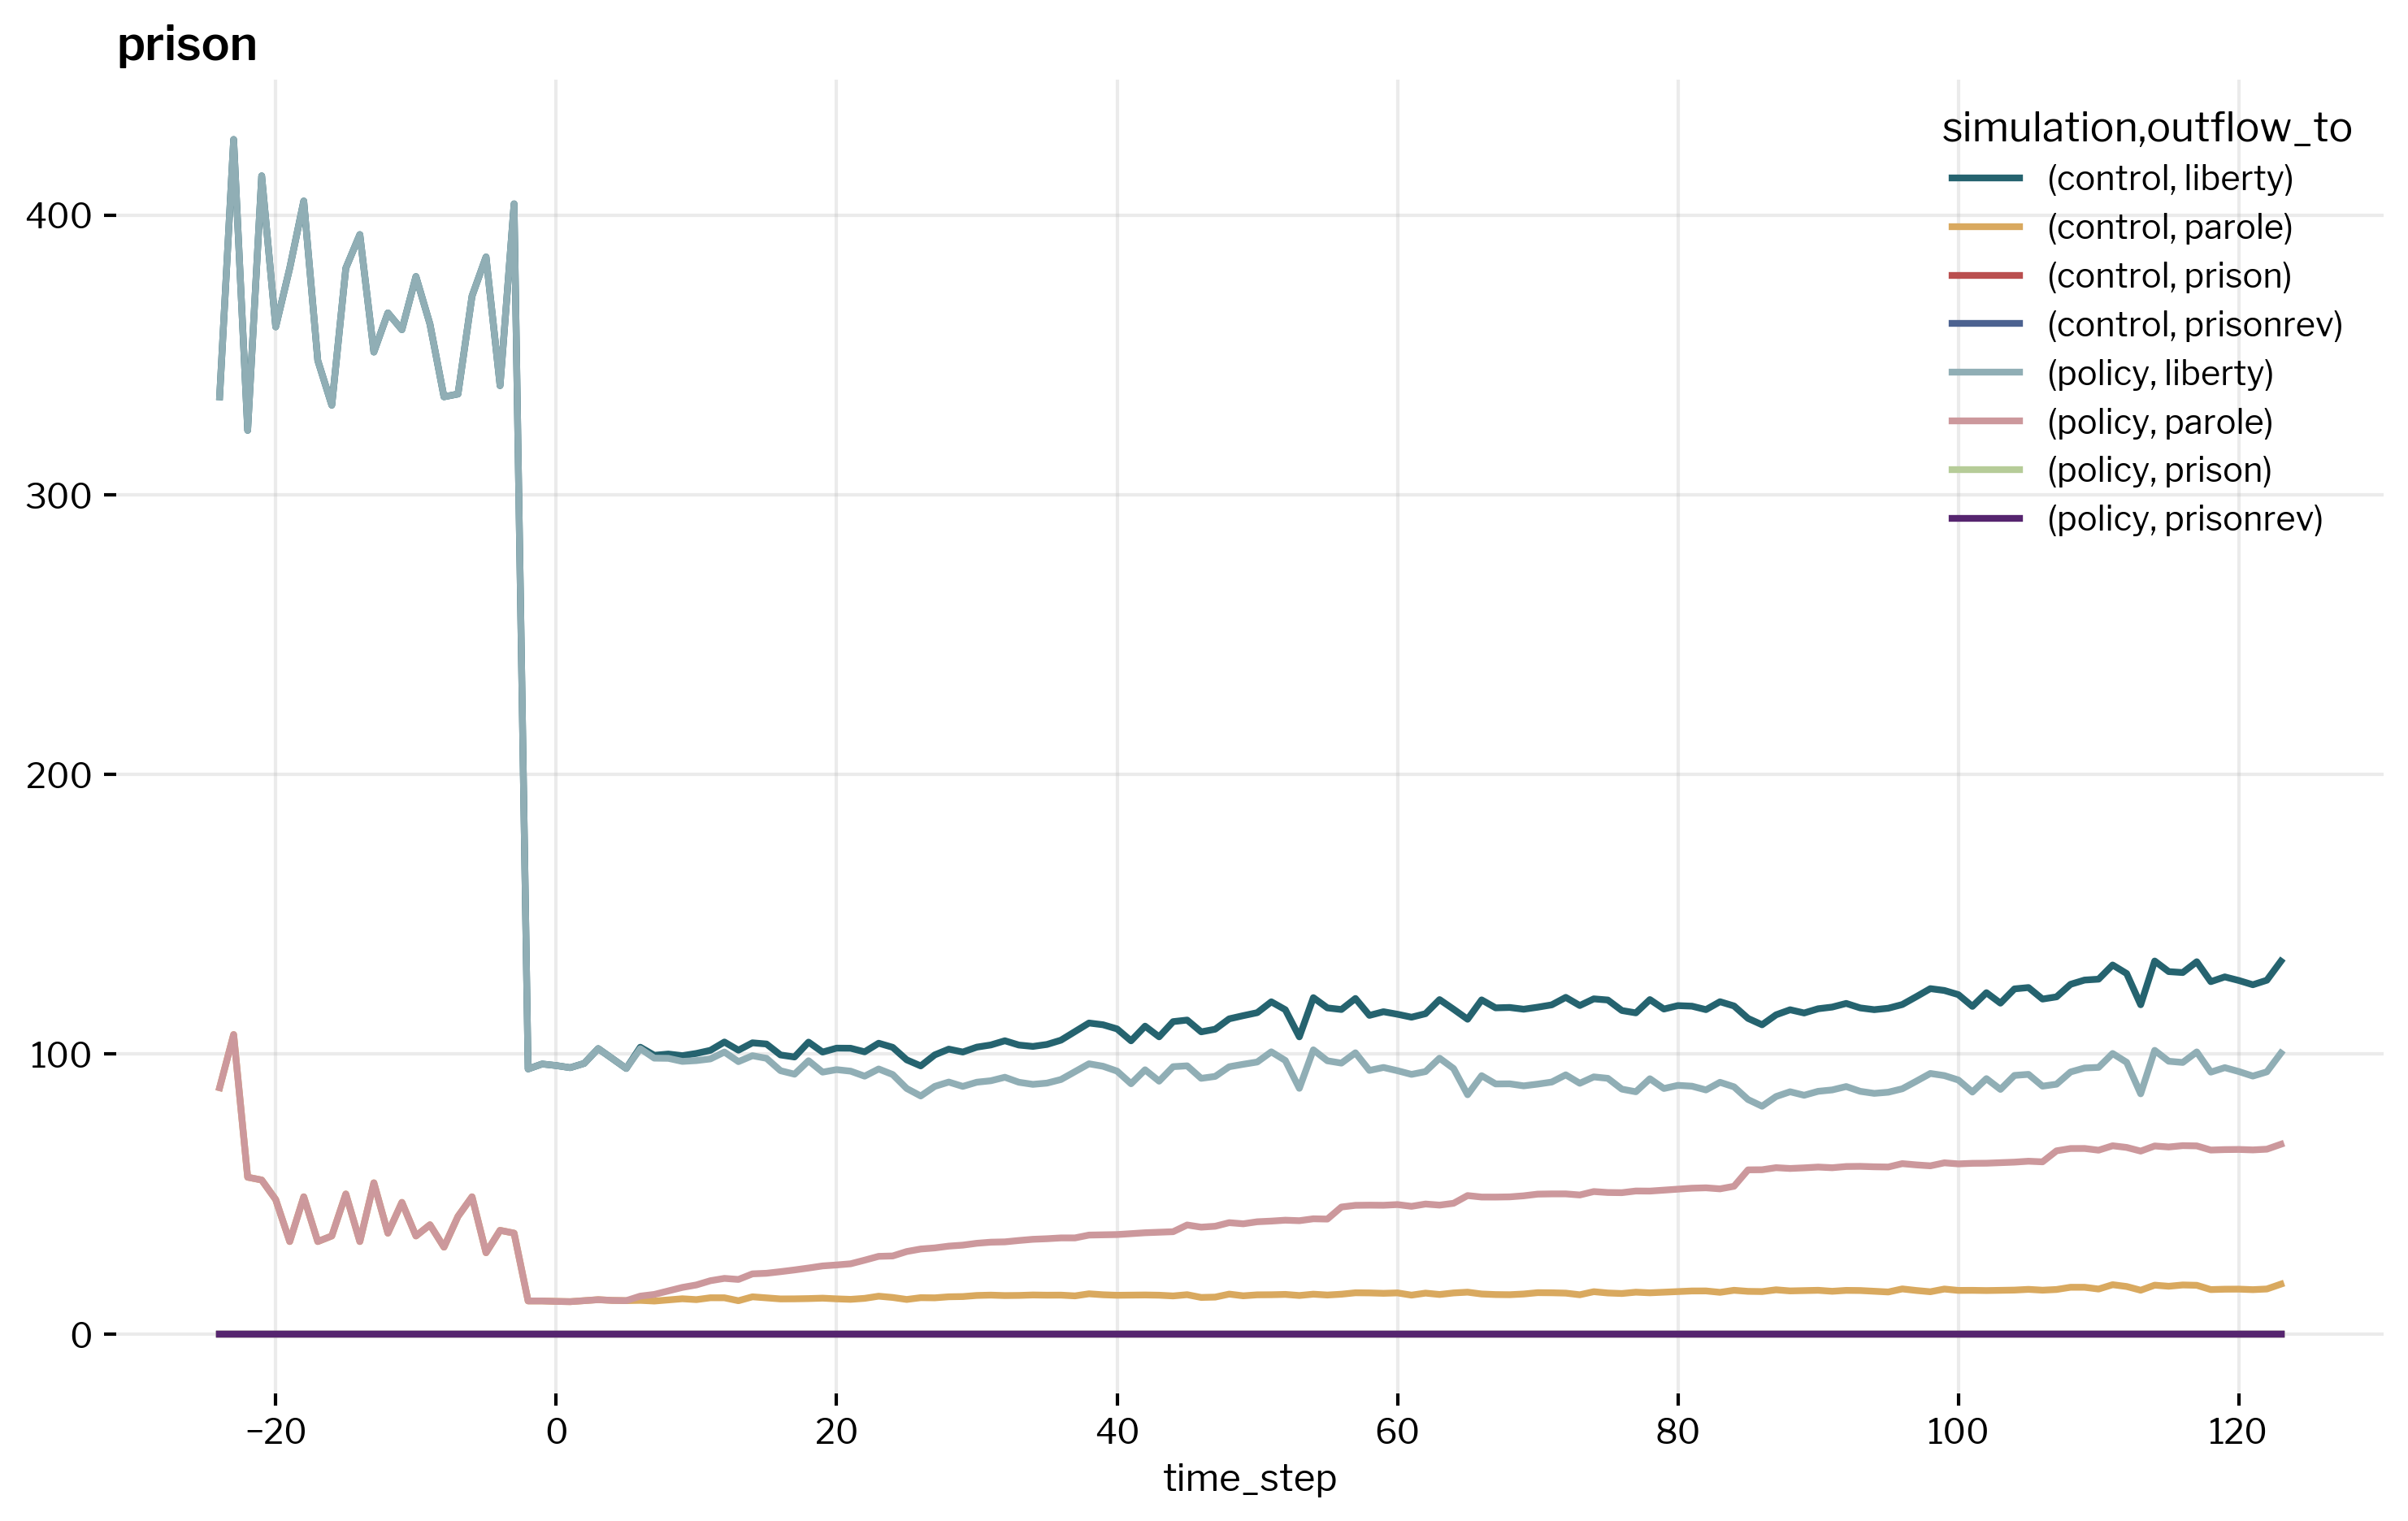

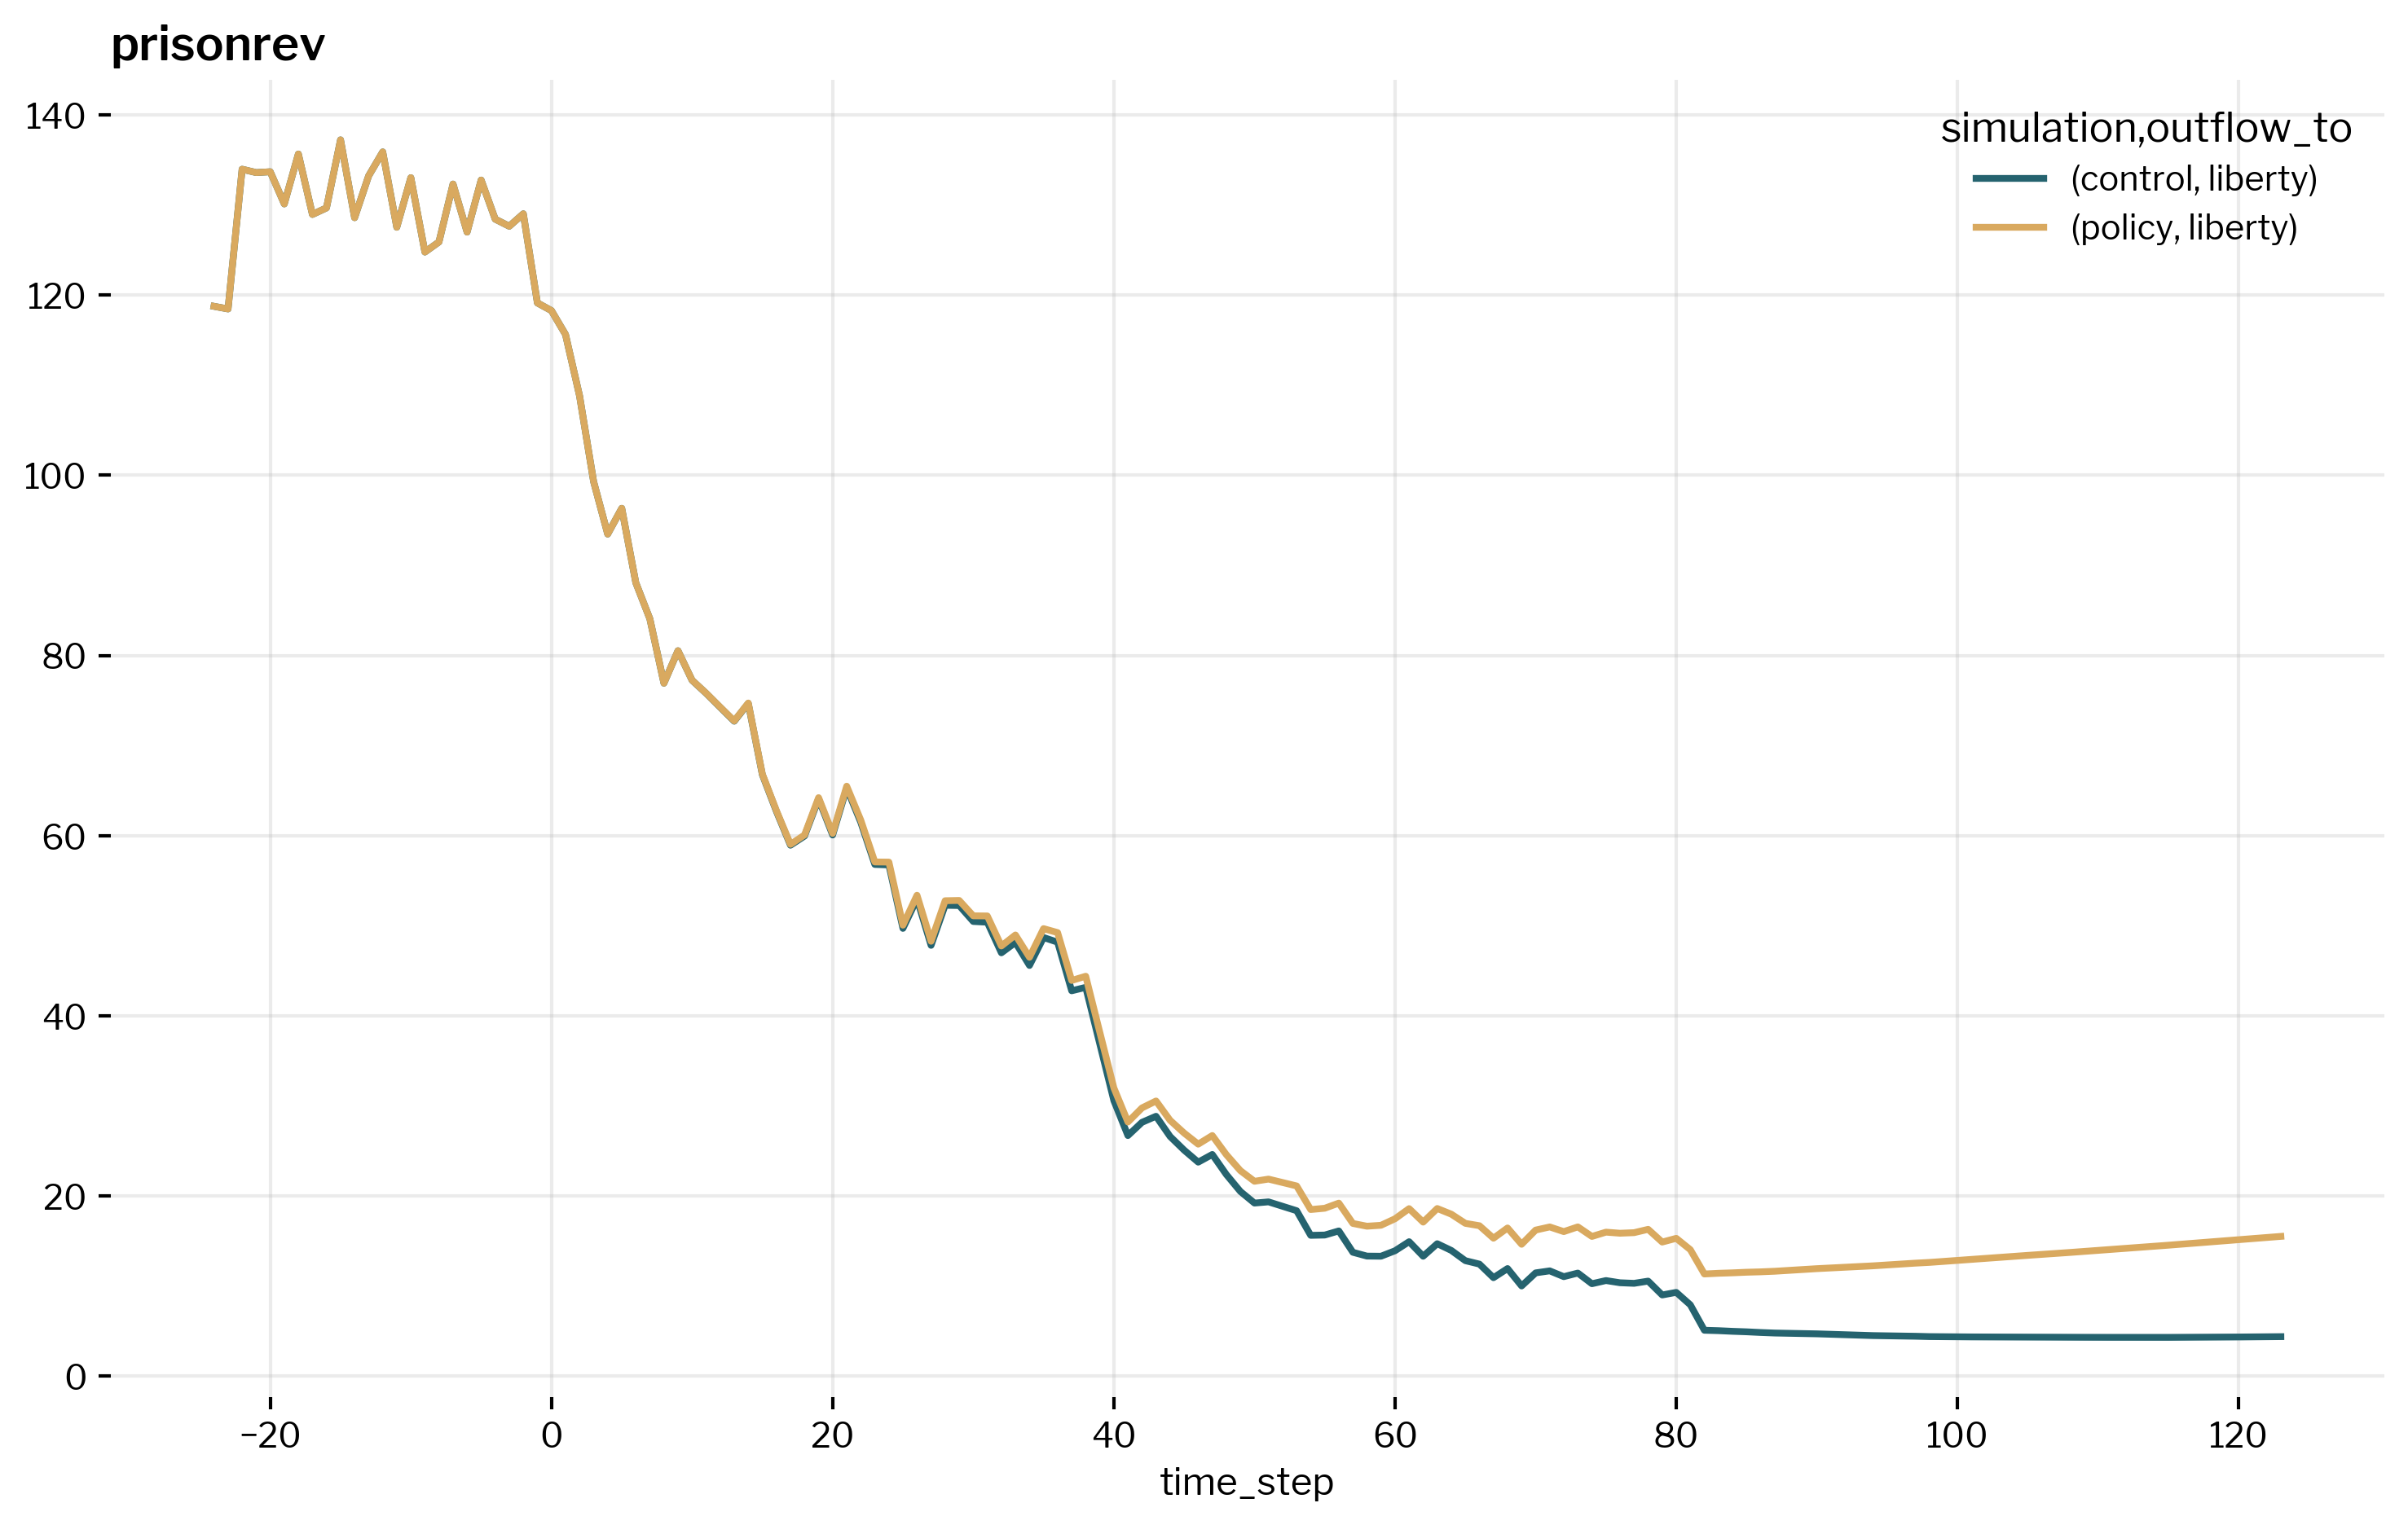

In [70]:
for comp in ["parole", "pretrial", "prison", "prisonrev"]:
    comp_outflows = (
        outflows_pivoted.xs(comp, level="compartment", axis=1).fillna(0).loc[-24:]
    )
    comp_outflows = comp_outflows.loc[(comp_outflows != 0).any(axis=1)]
    #     display(comp_outflows.head())
    #     if comp == "parole":
    #         comp_outflows["control", "prison_total"] = (
    #             comp_outflows["control", "prison"] + comp_outflows["control", "prisonrev"]
    #         )
    #         comp_outflows["policy", "prison_total"] = (
    #             comp_outflows["policy", "prison"] + comp_outflows["policy", "prisonrev"]
    #         )
    comp_outflows.plot()
    plt.title(comp)

In [71]:
x = list(outflows_pivoted.columns.get_level_values(0).unique())
x.remove("liberty")
x

['parole', 'pretrial', 'prison', 'prisonrev']

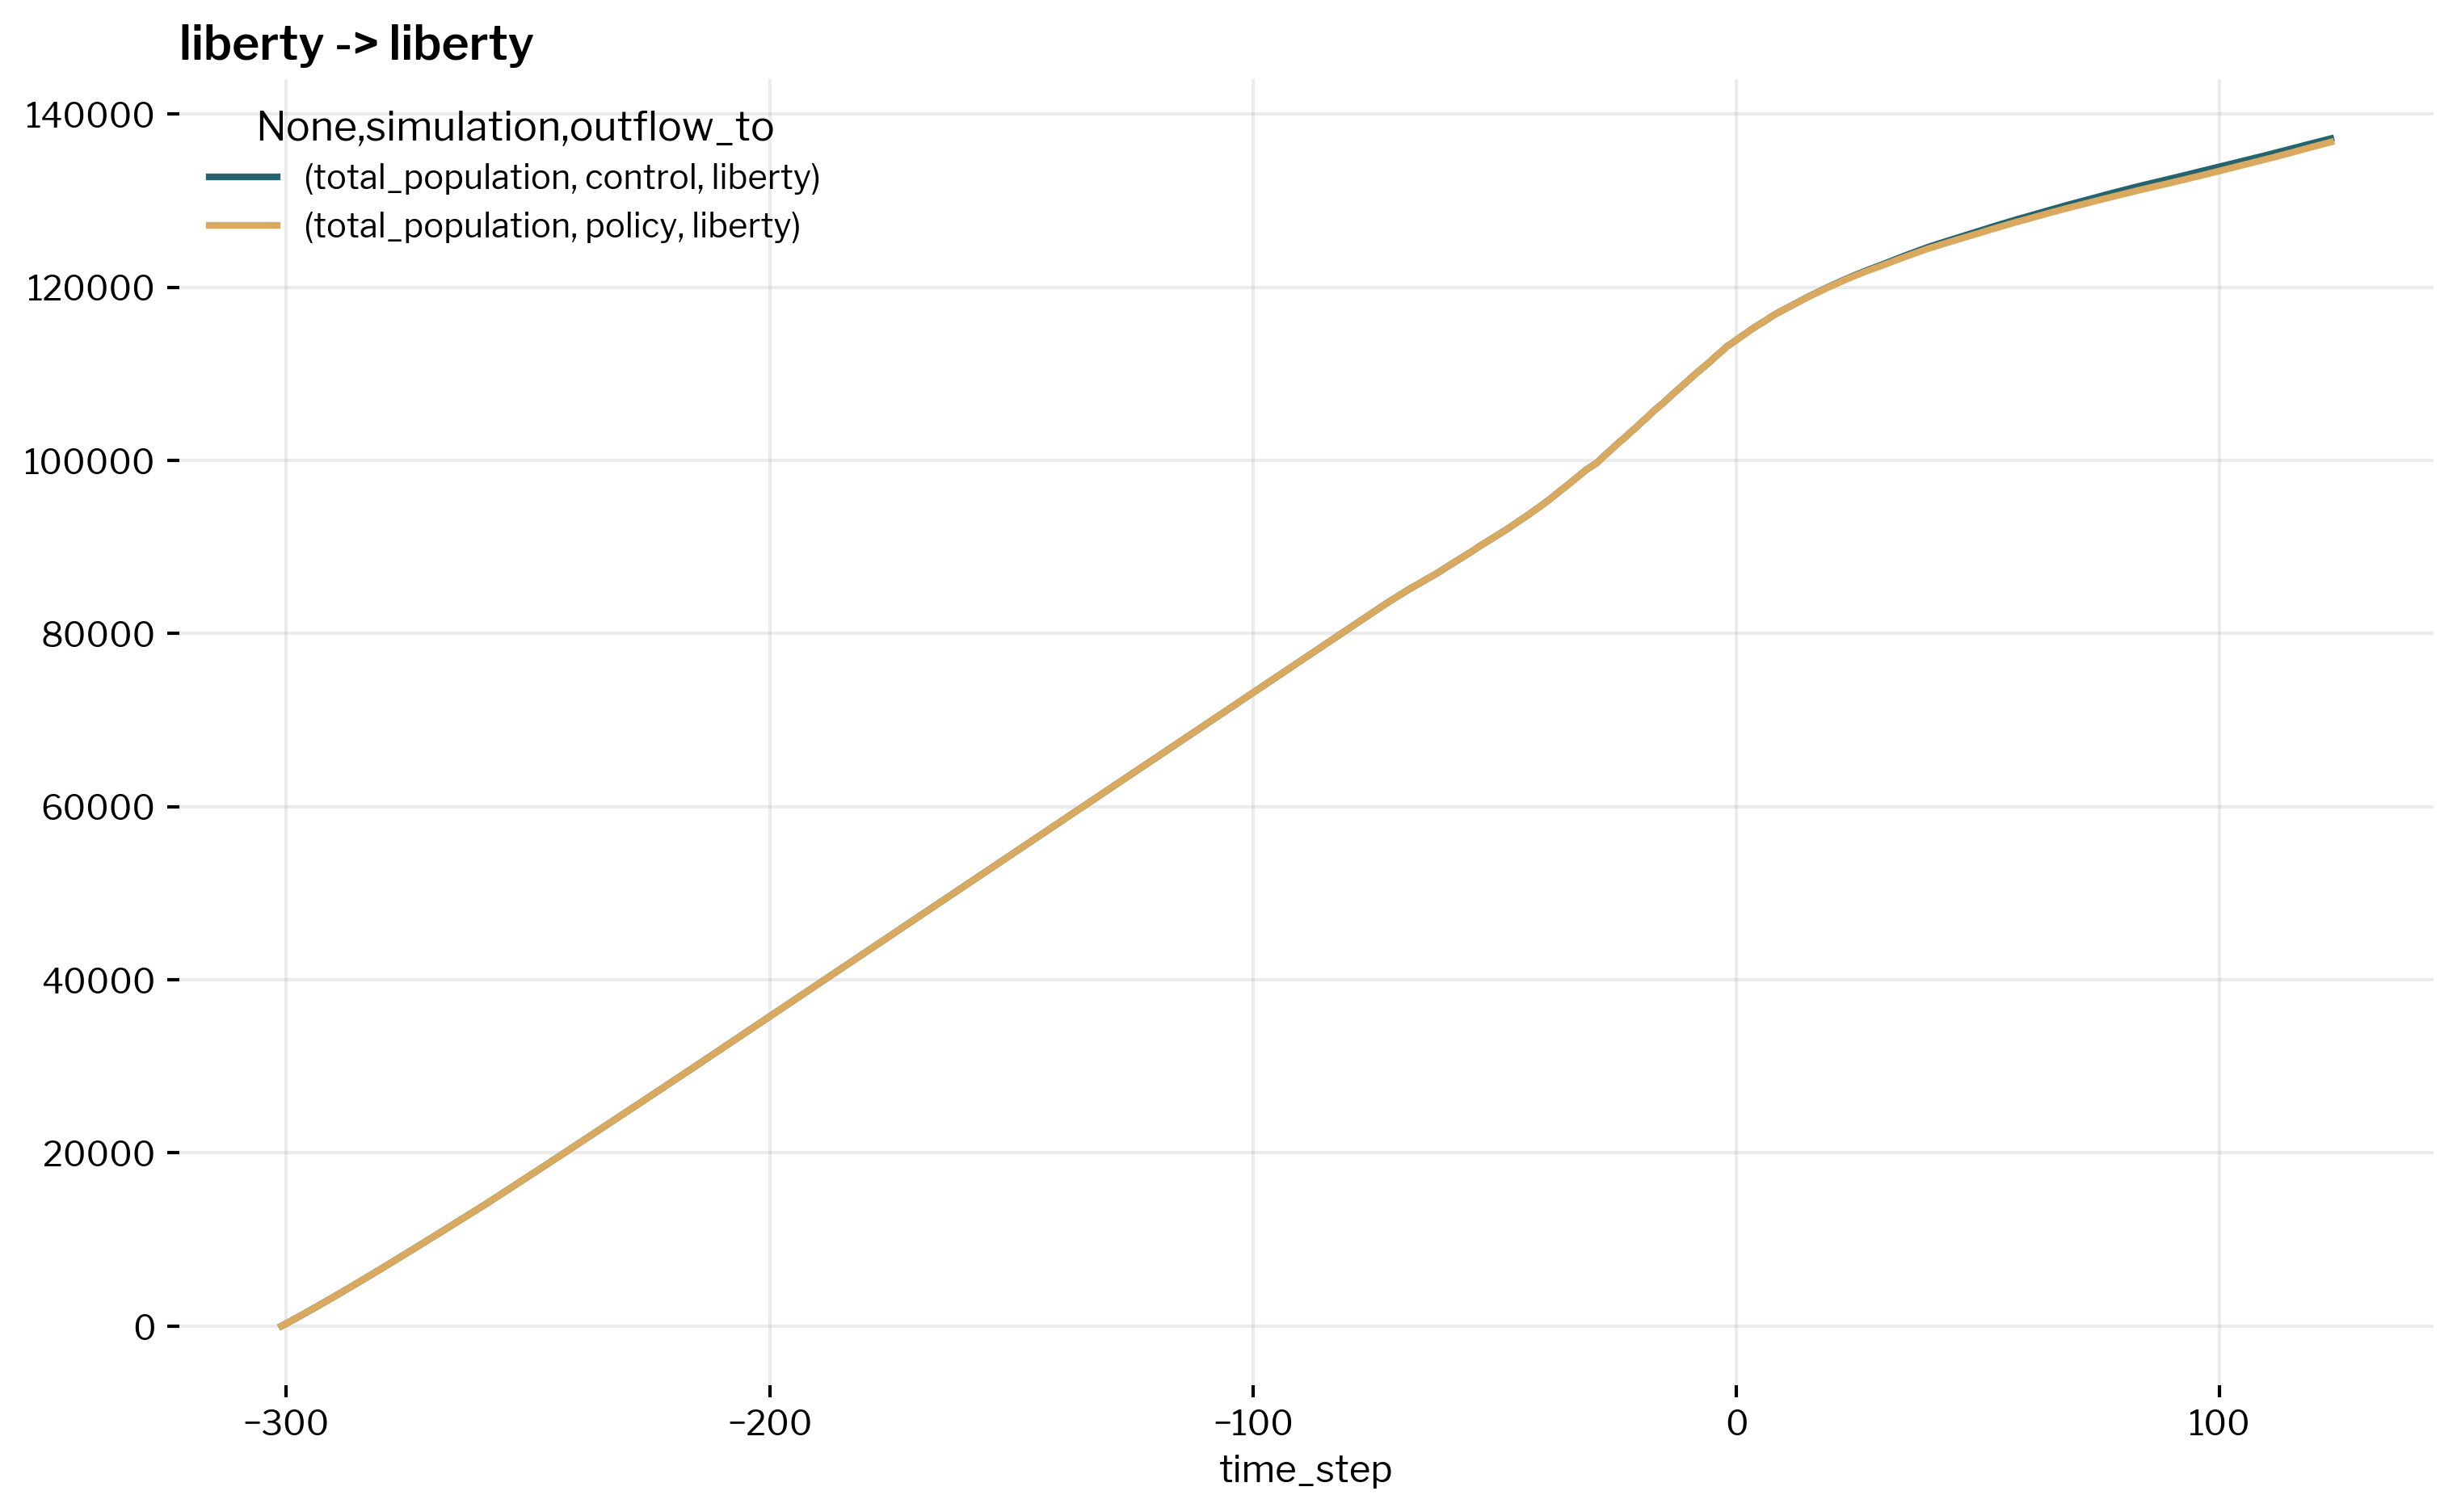

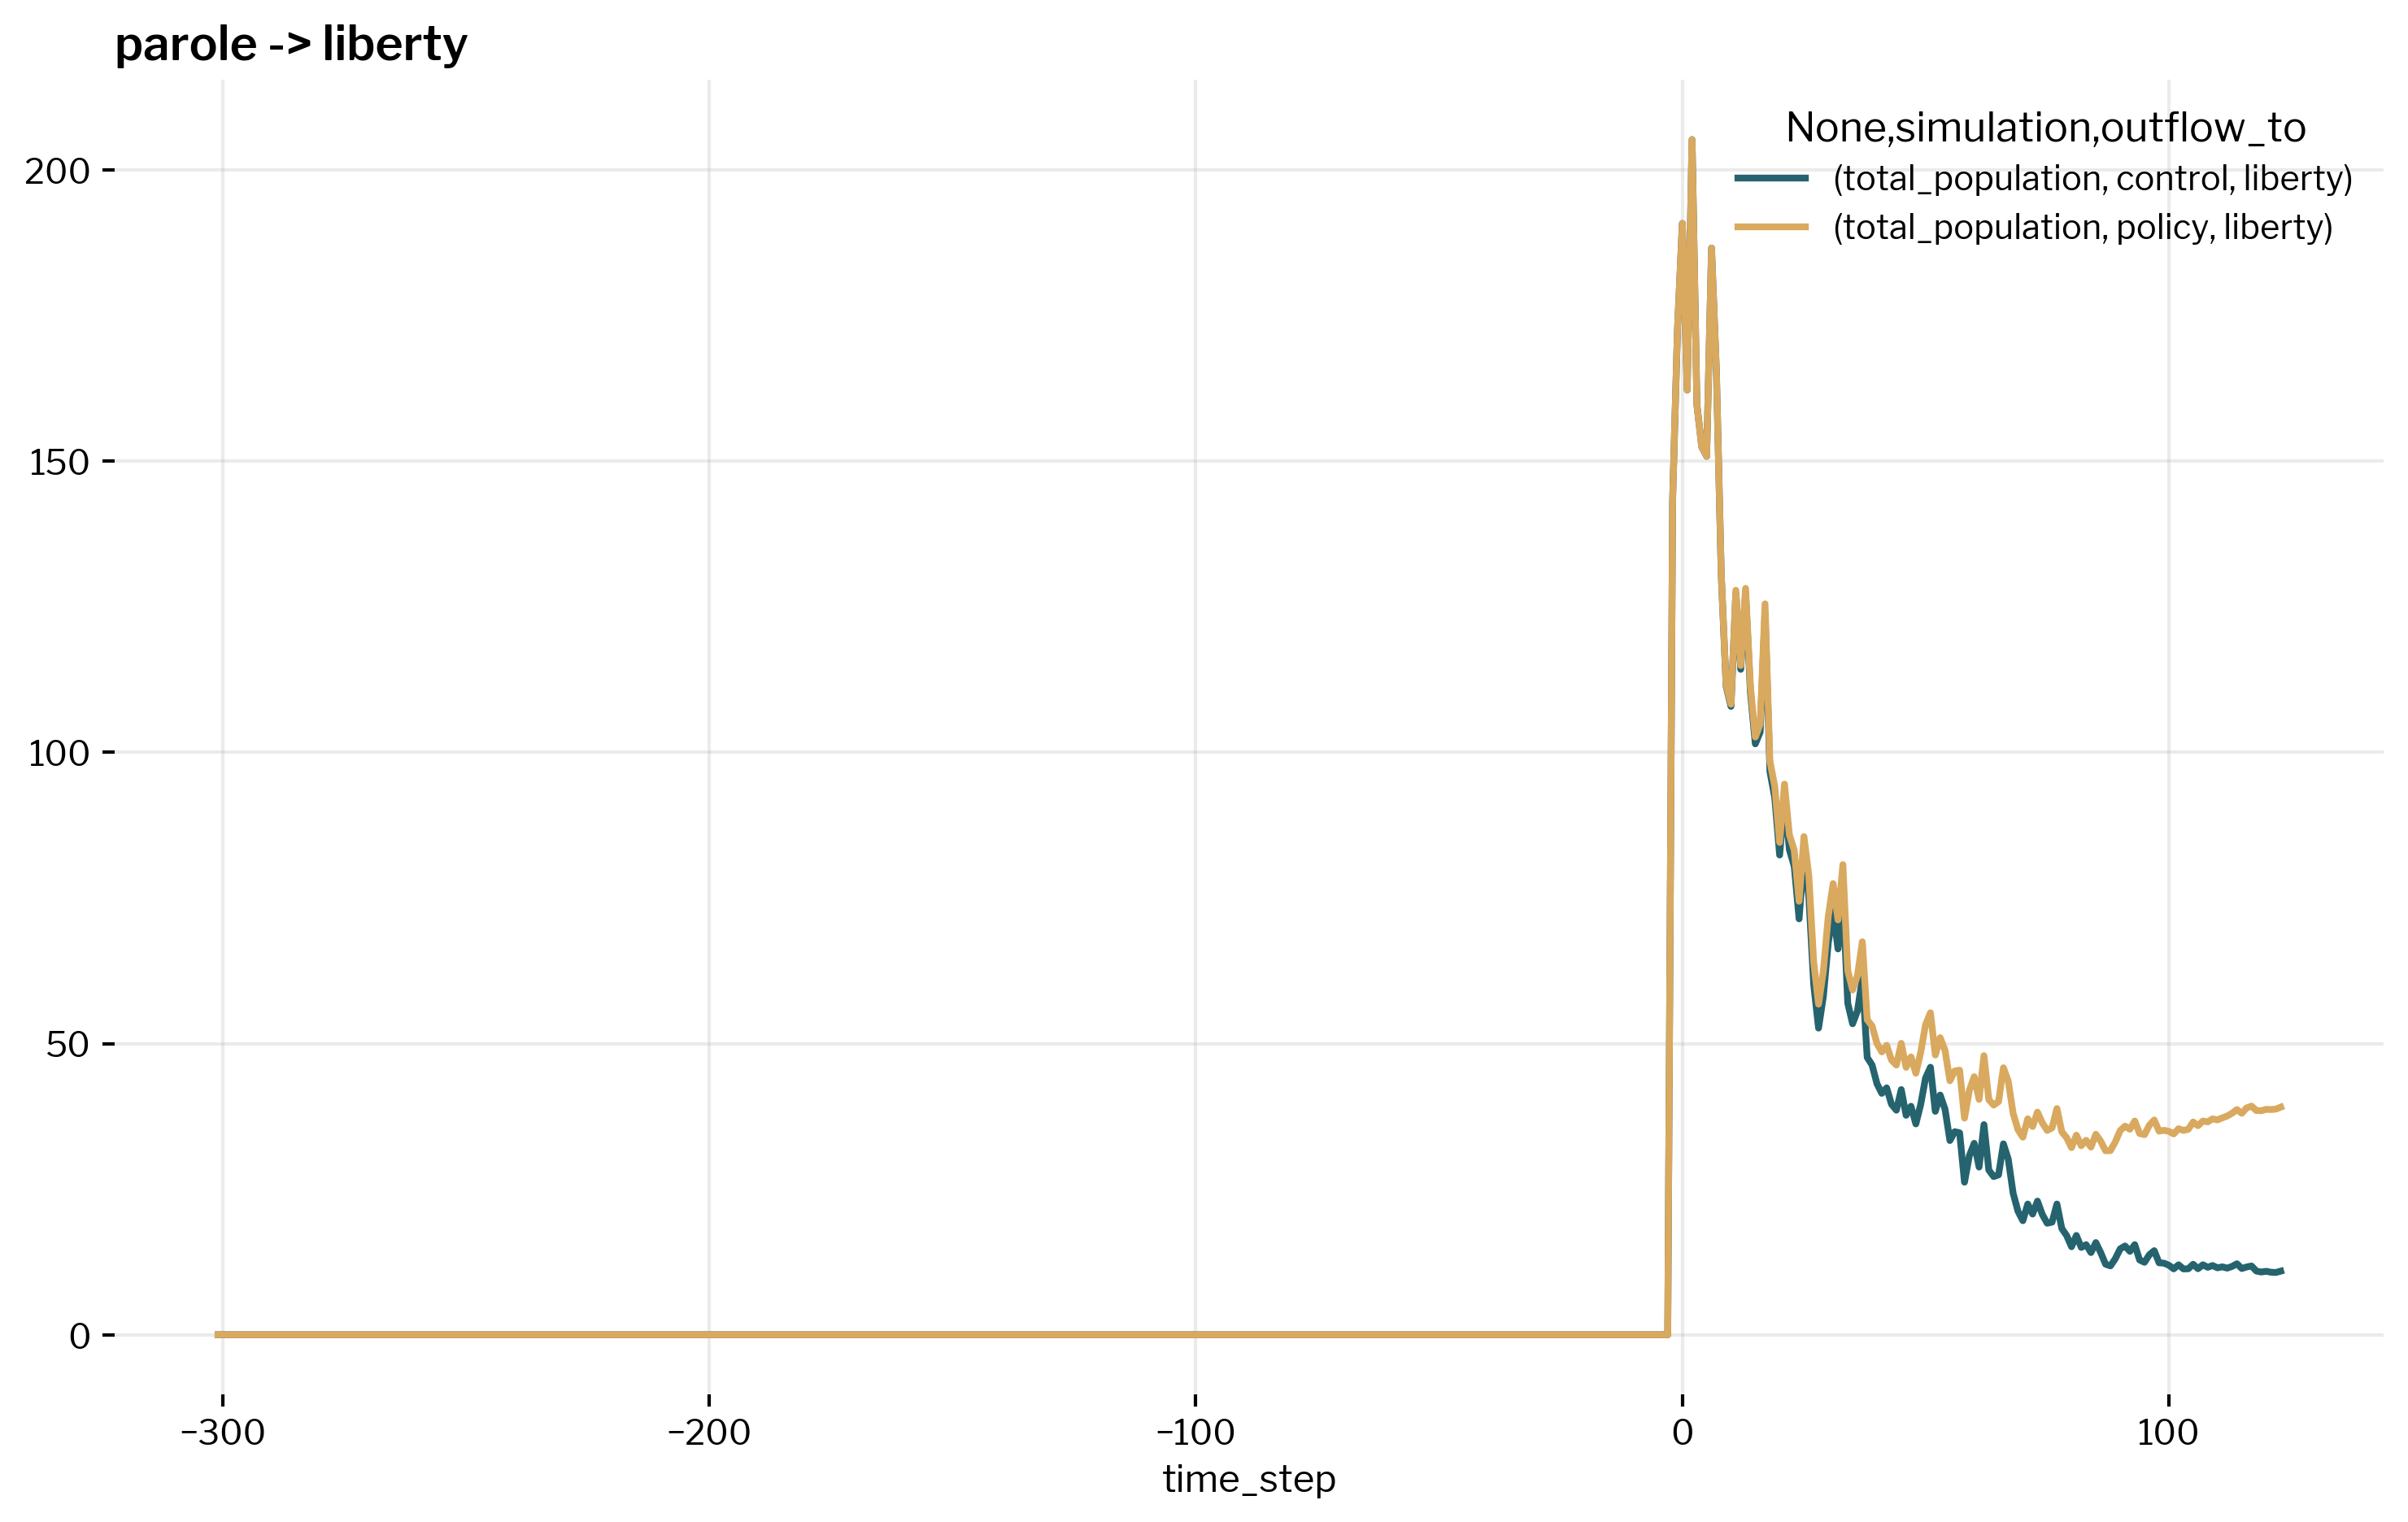

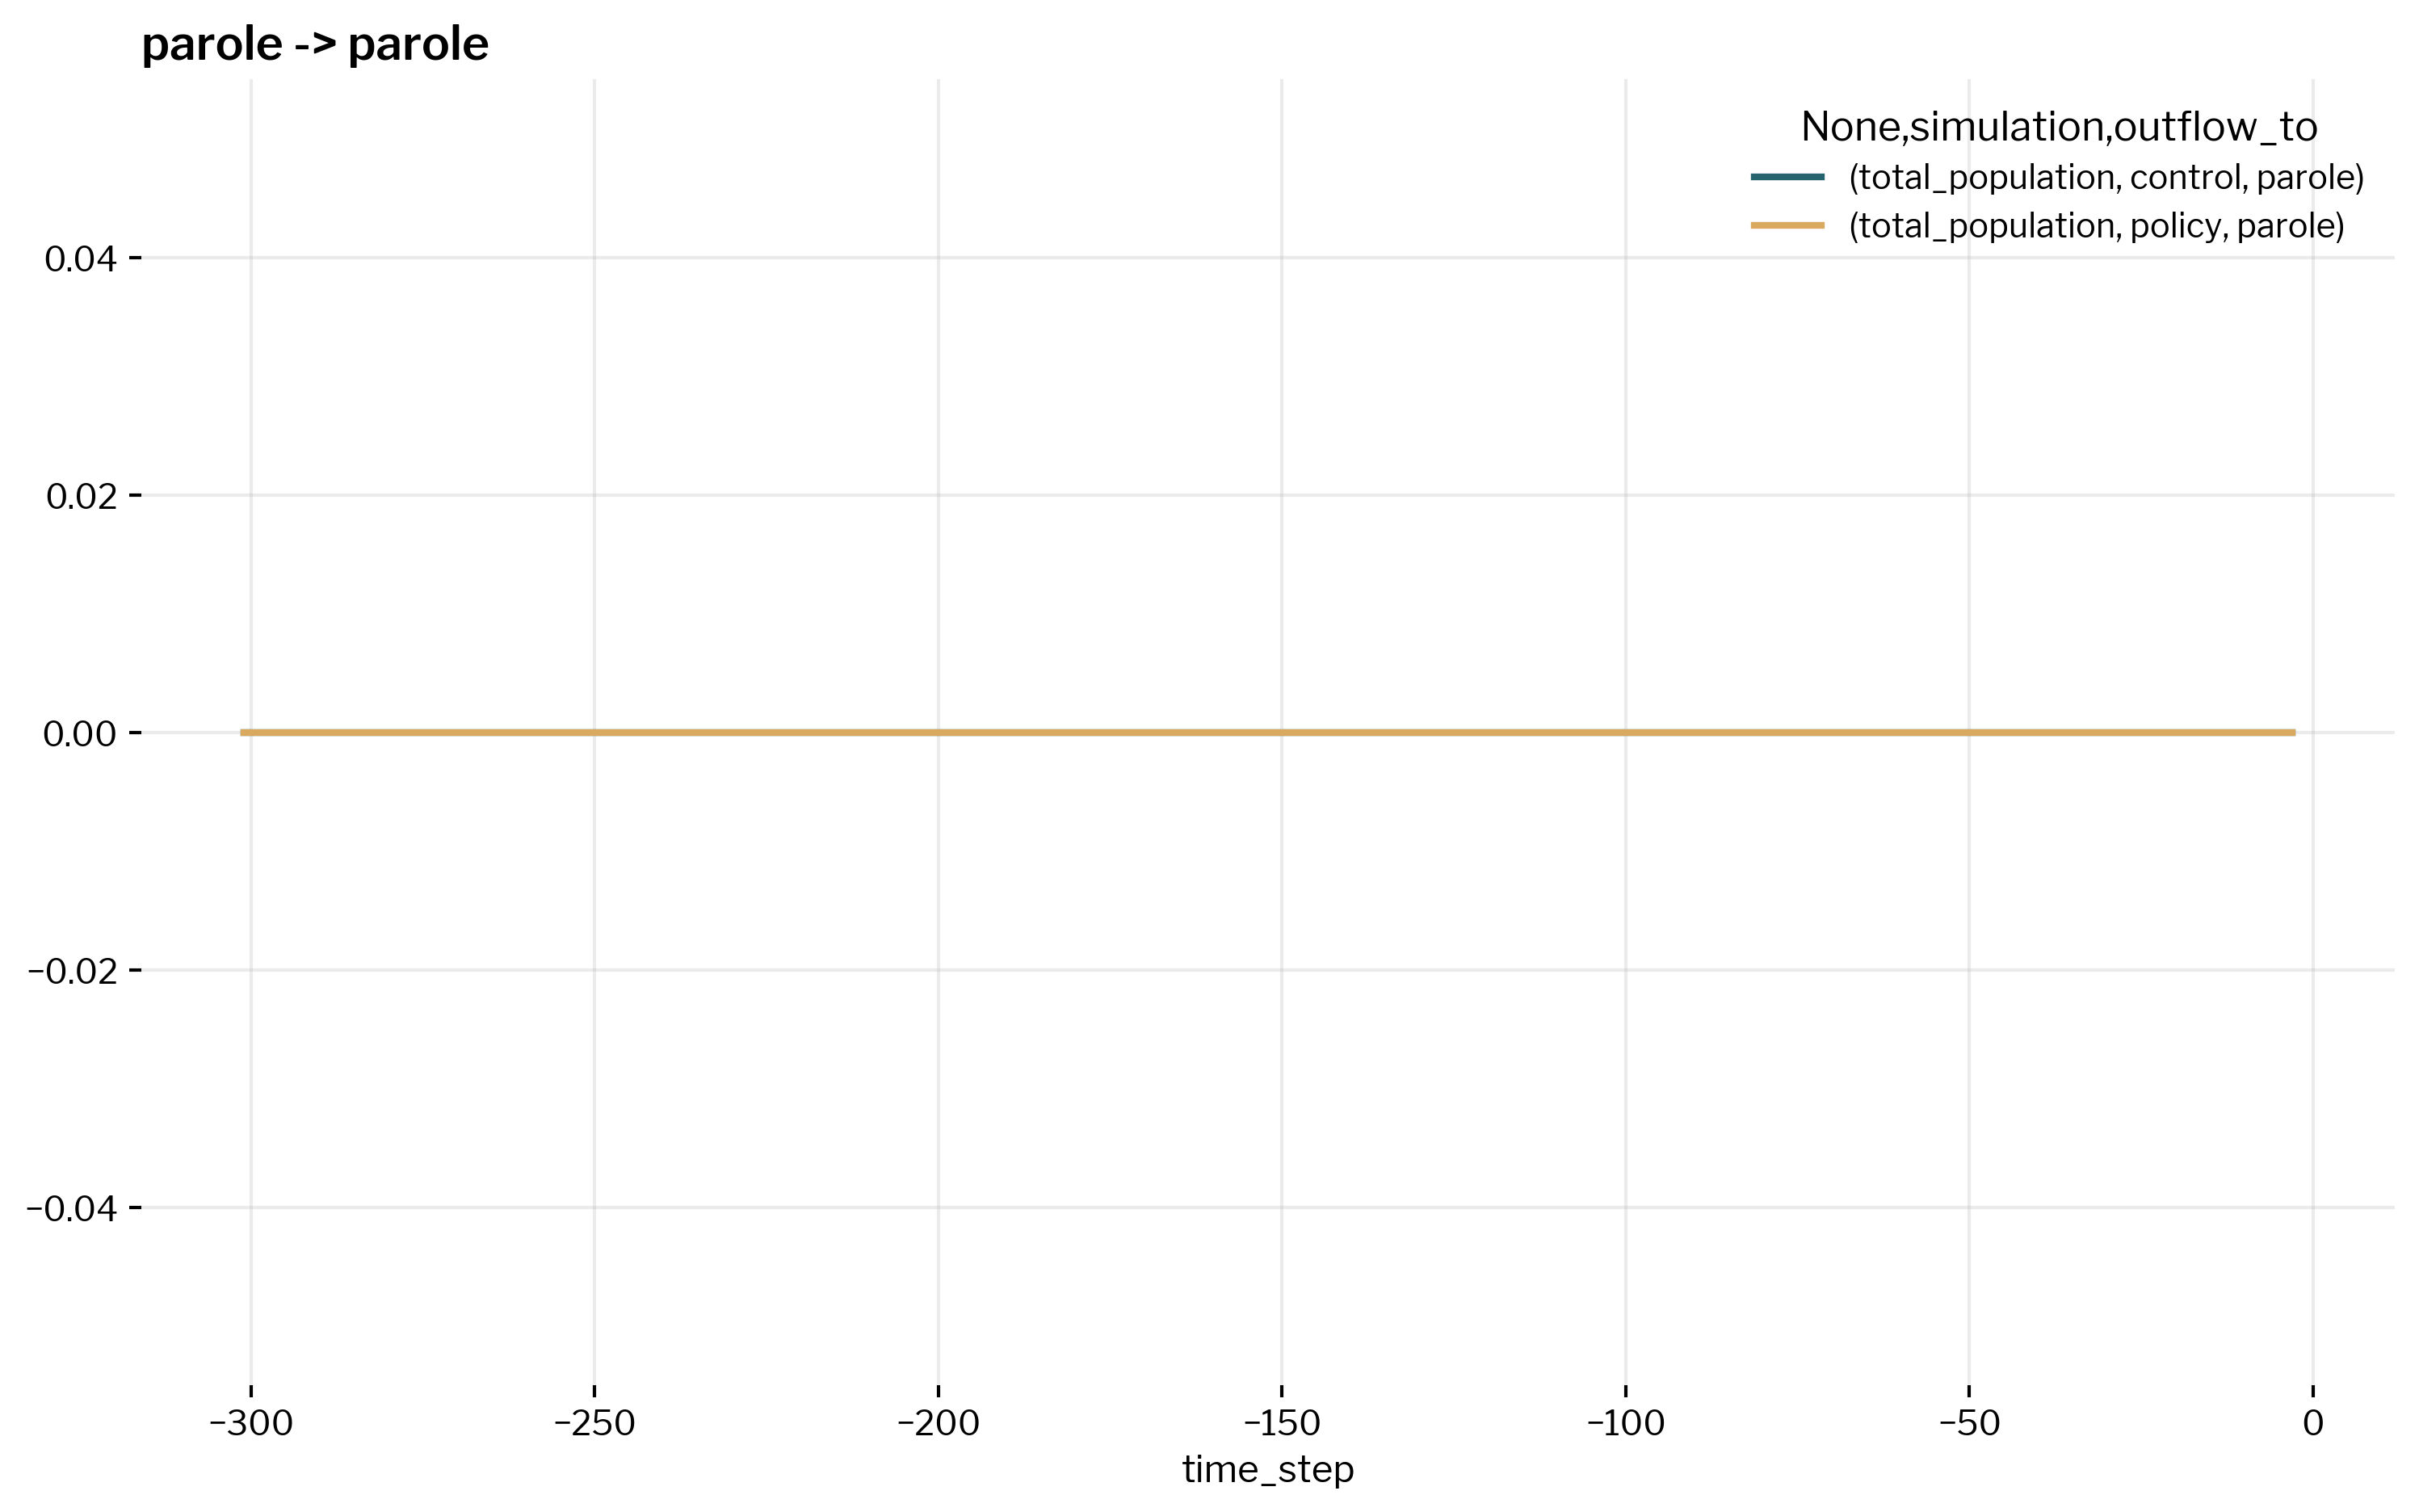

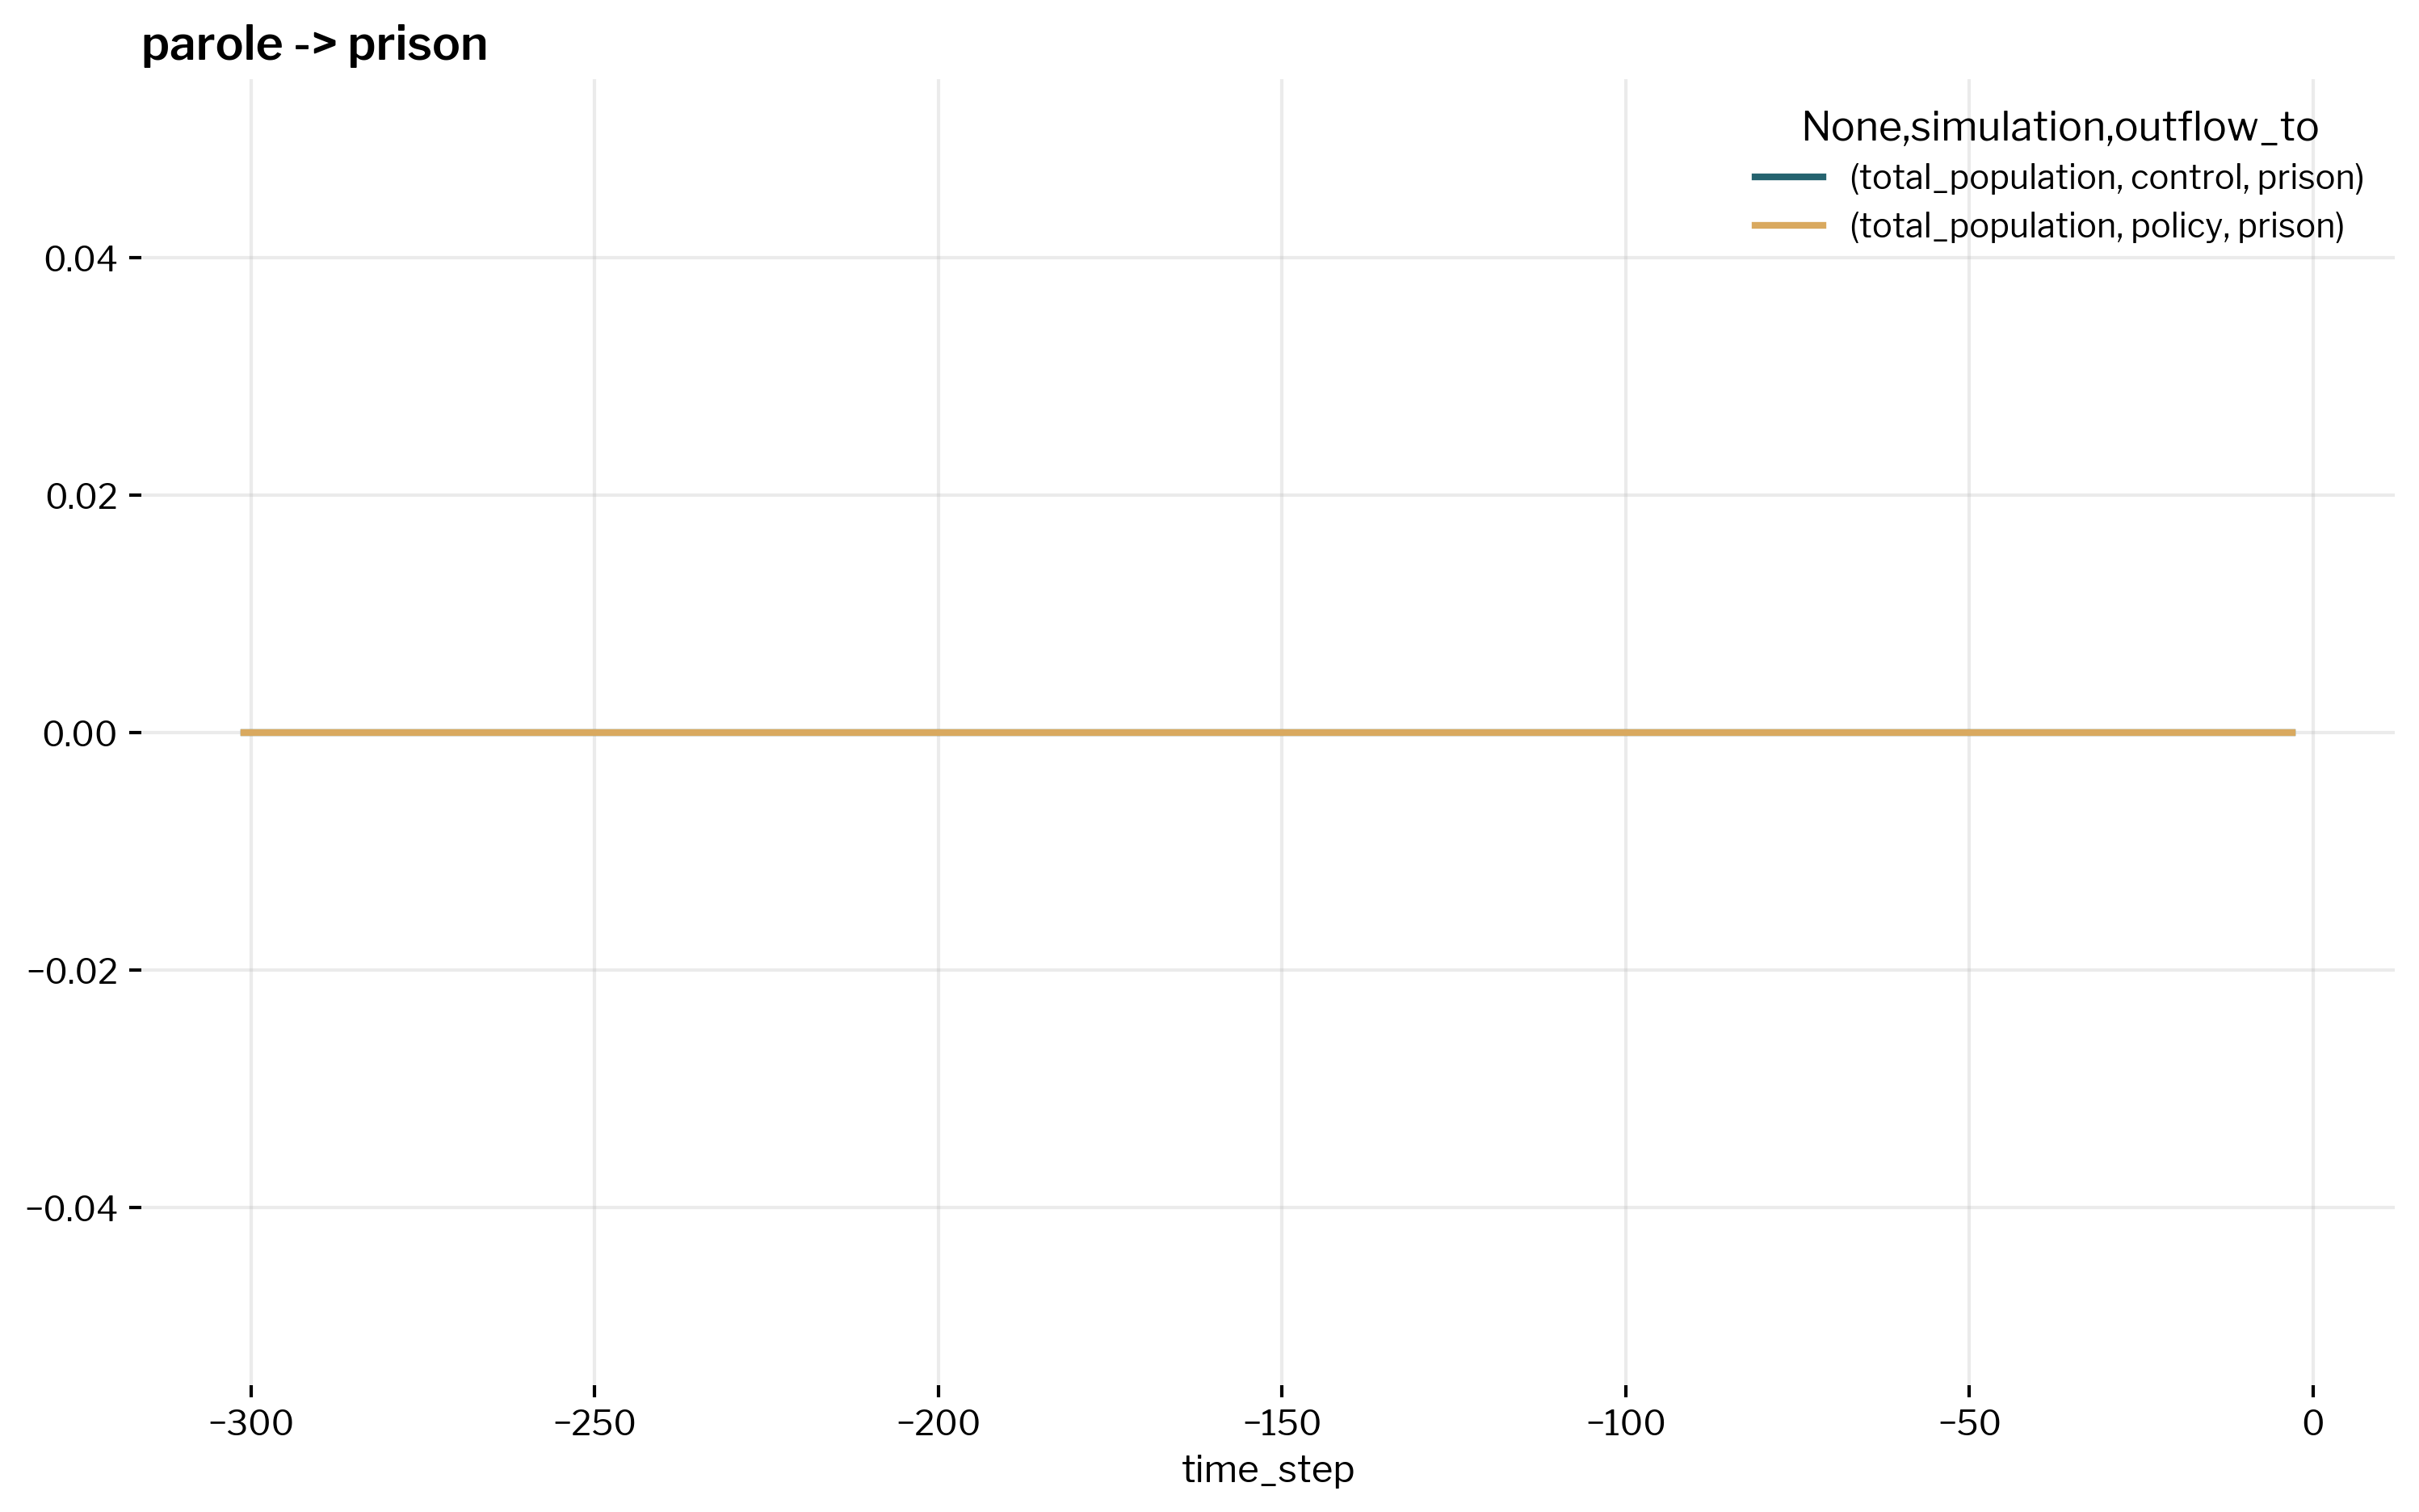

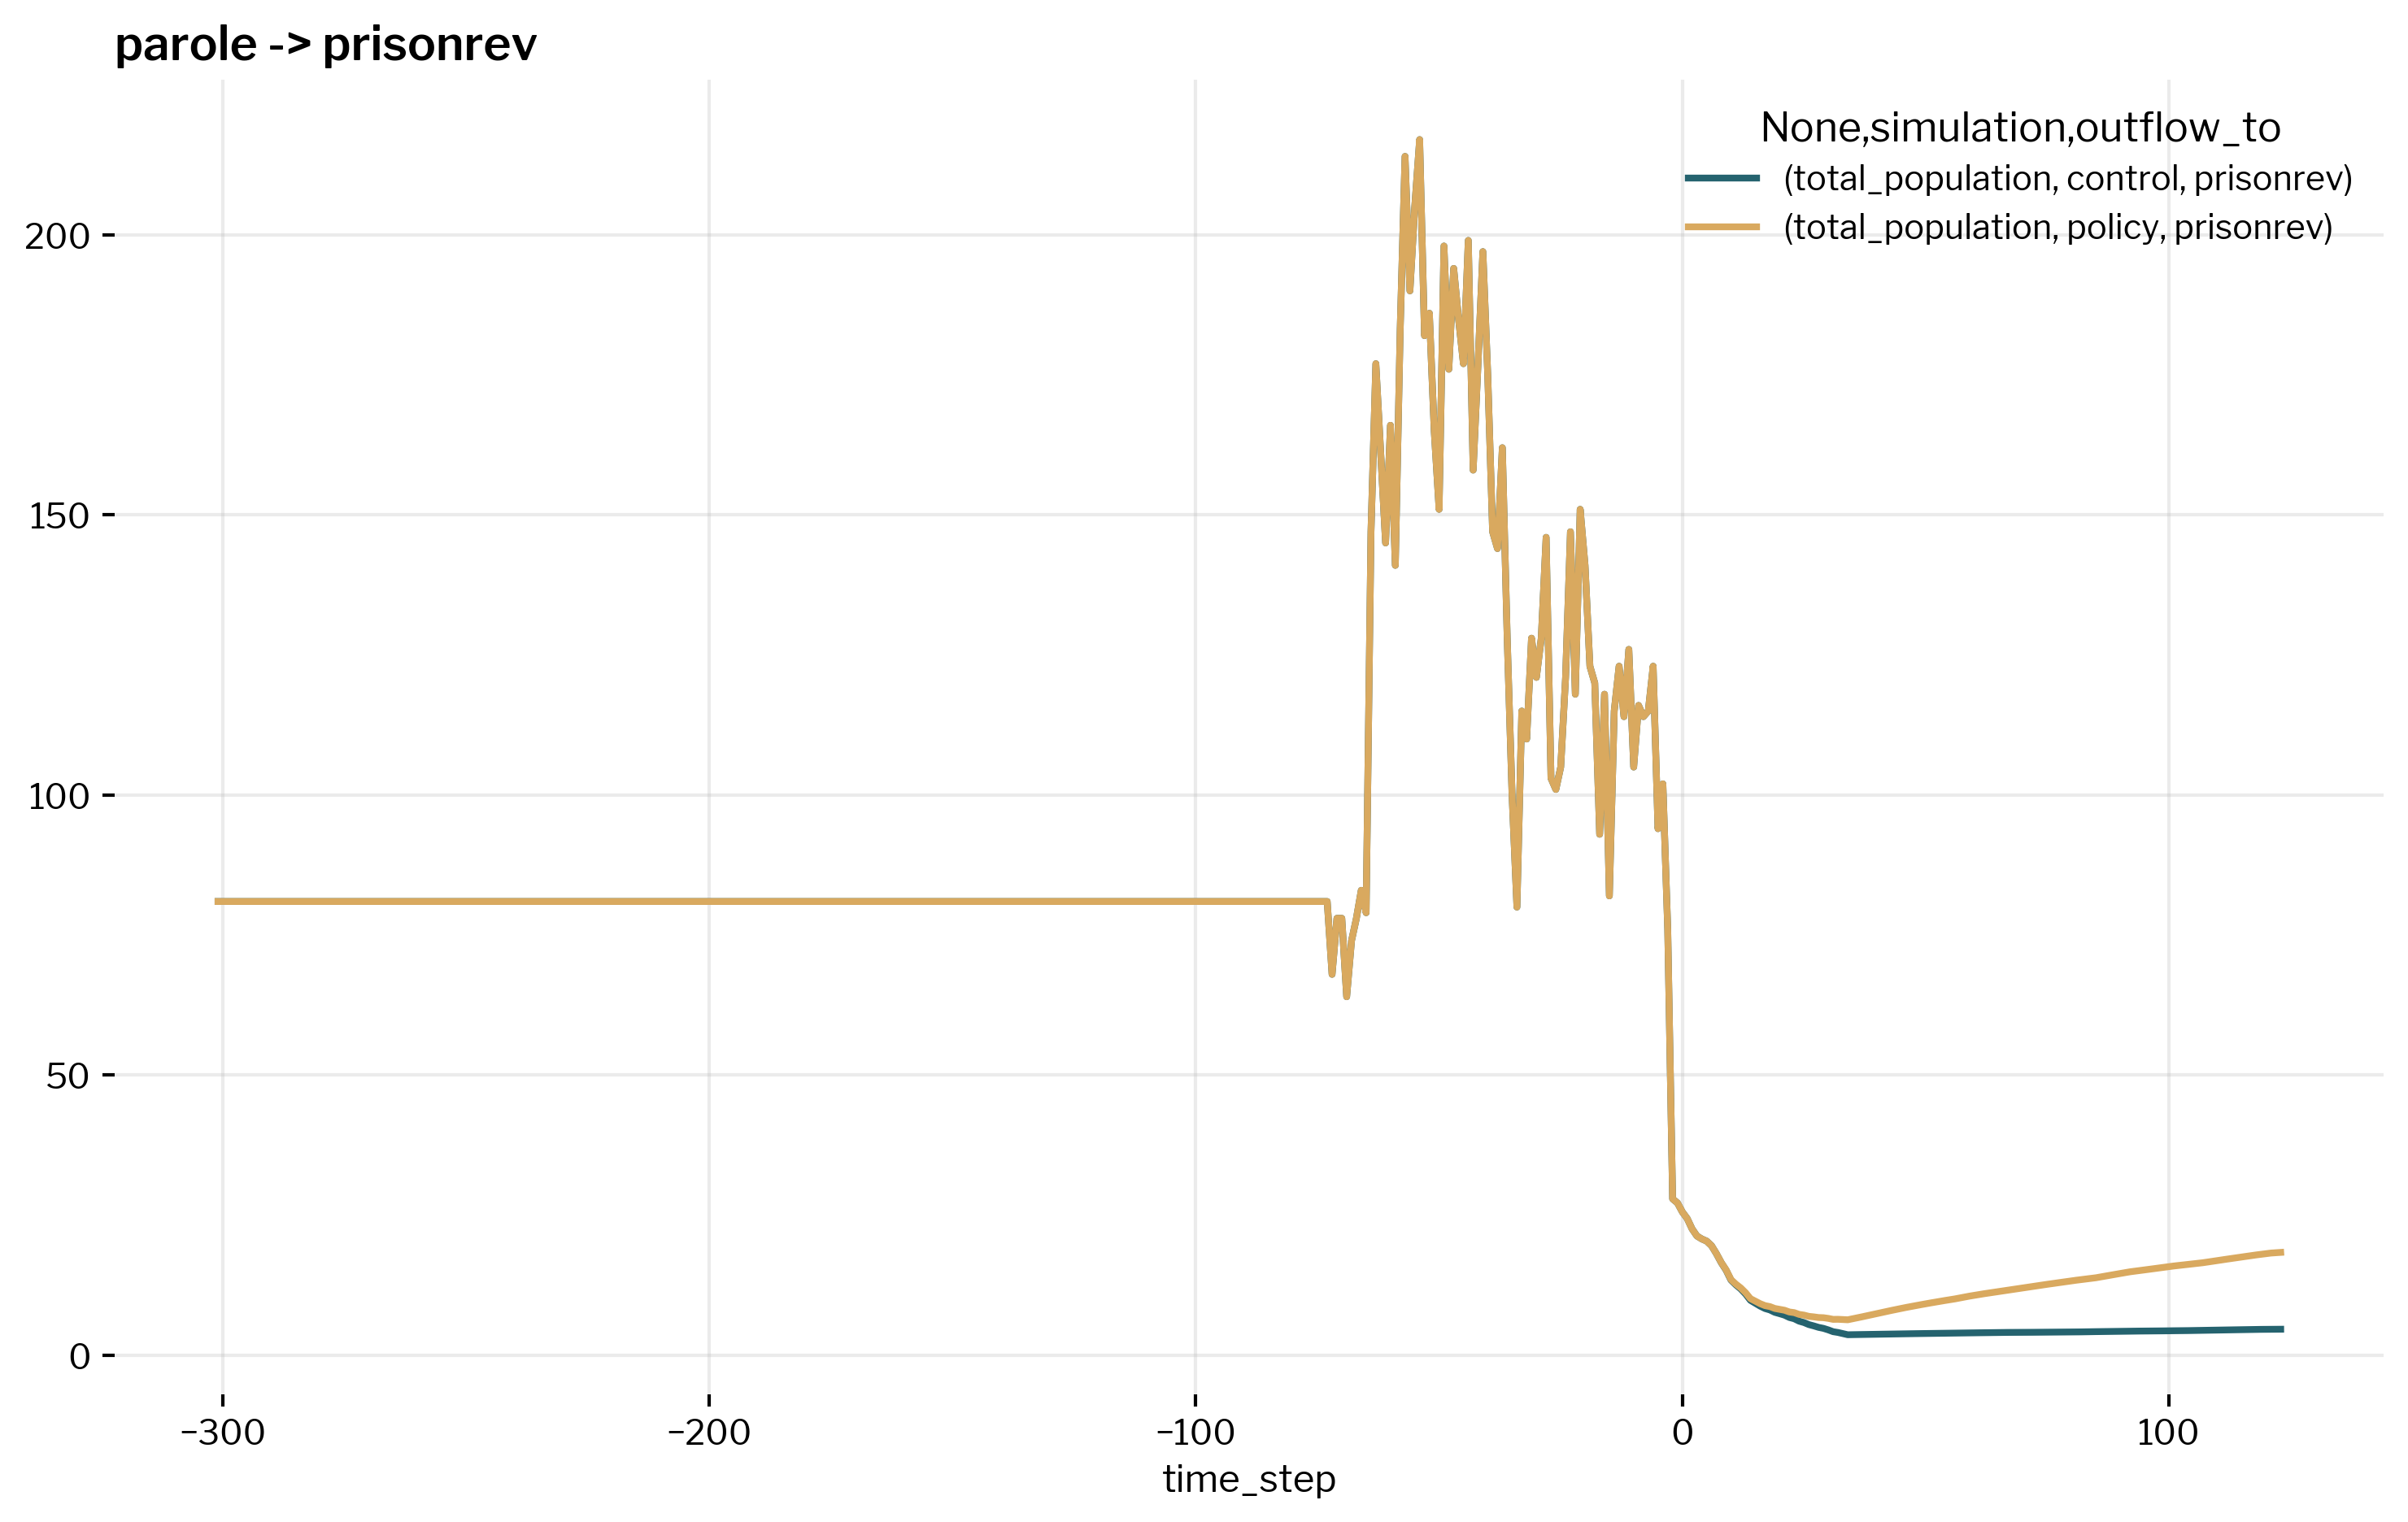

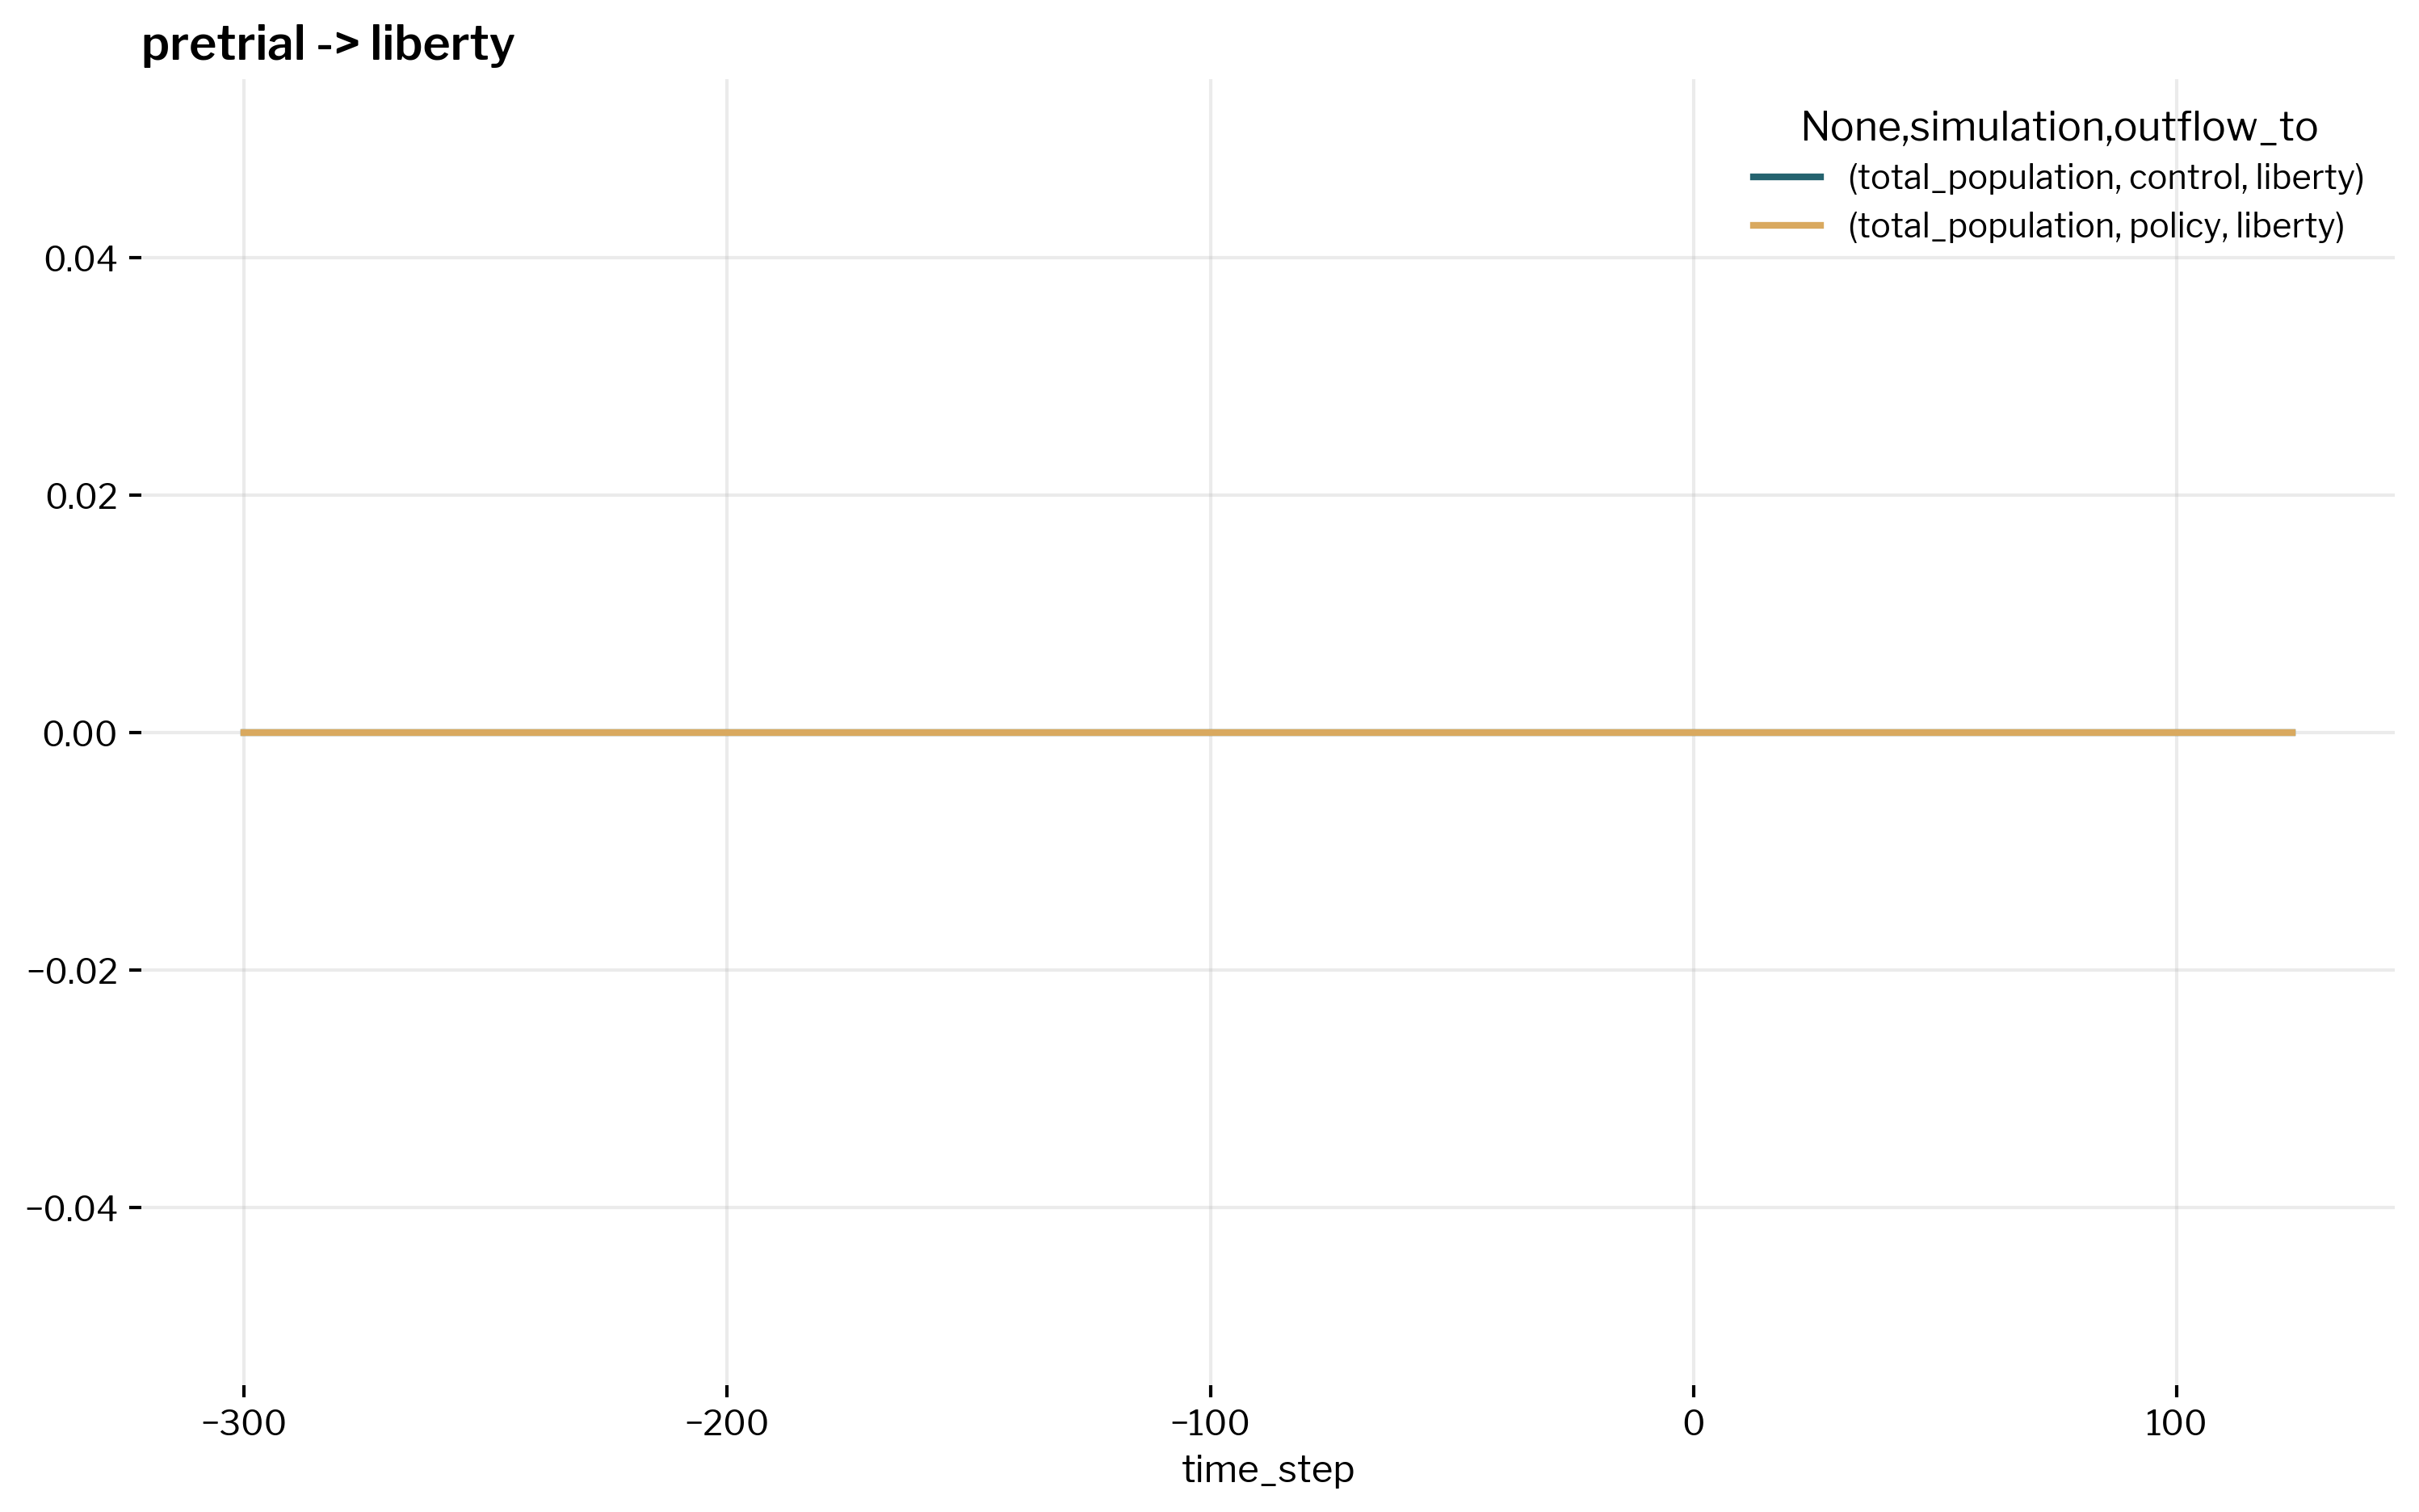

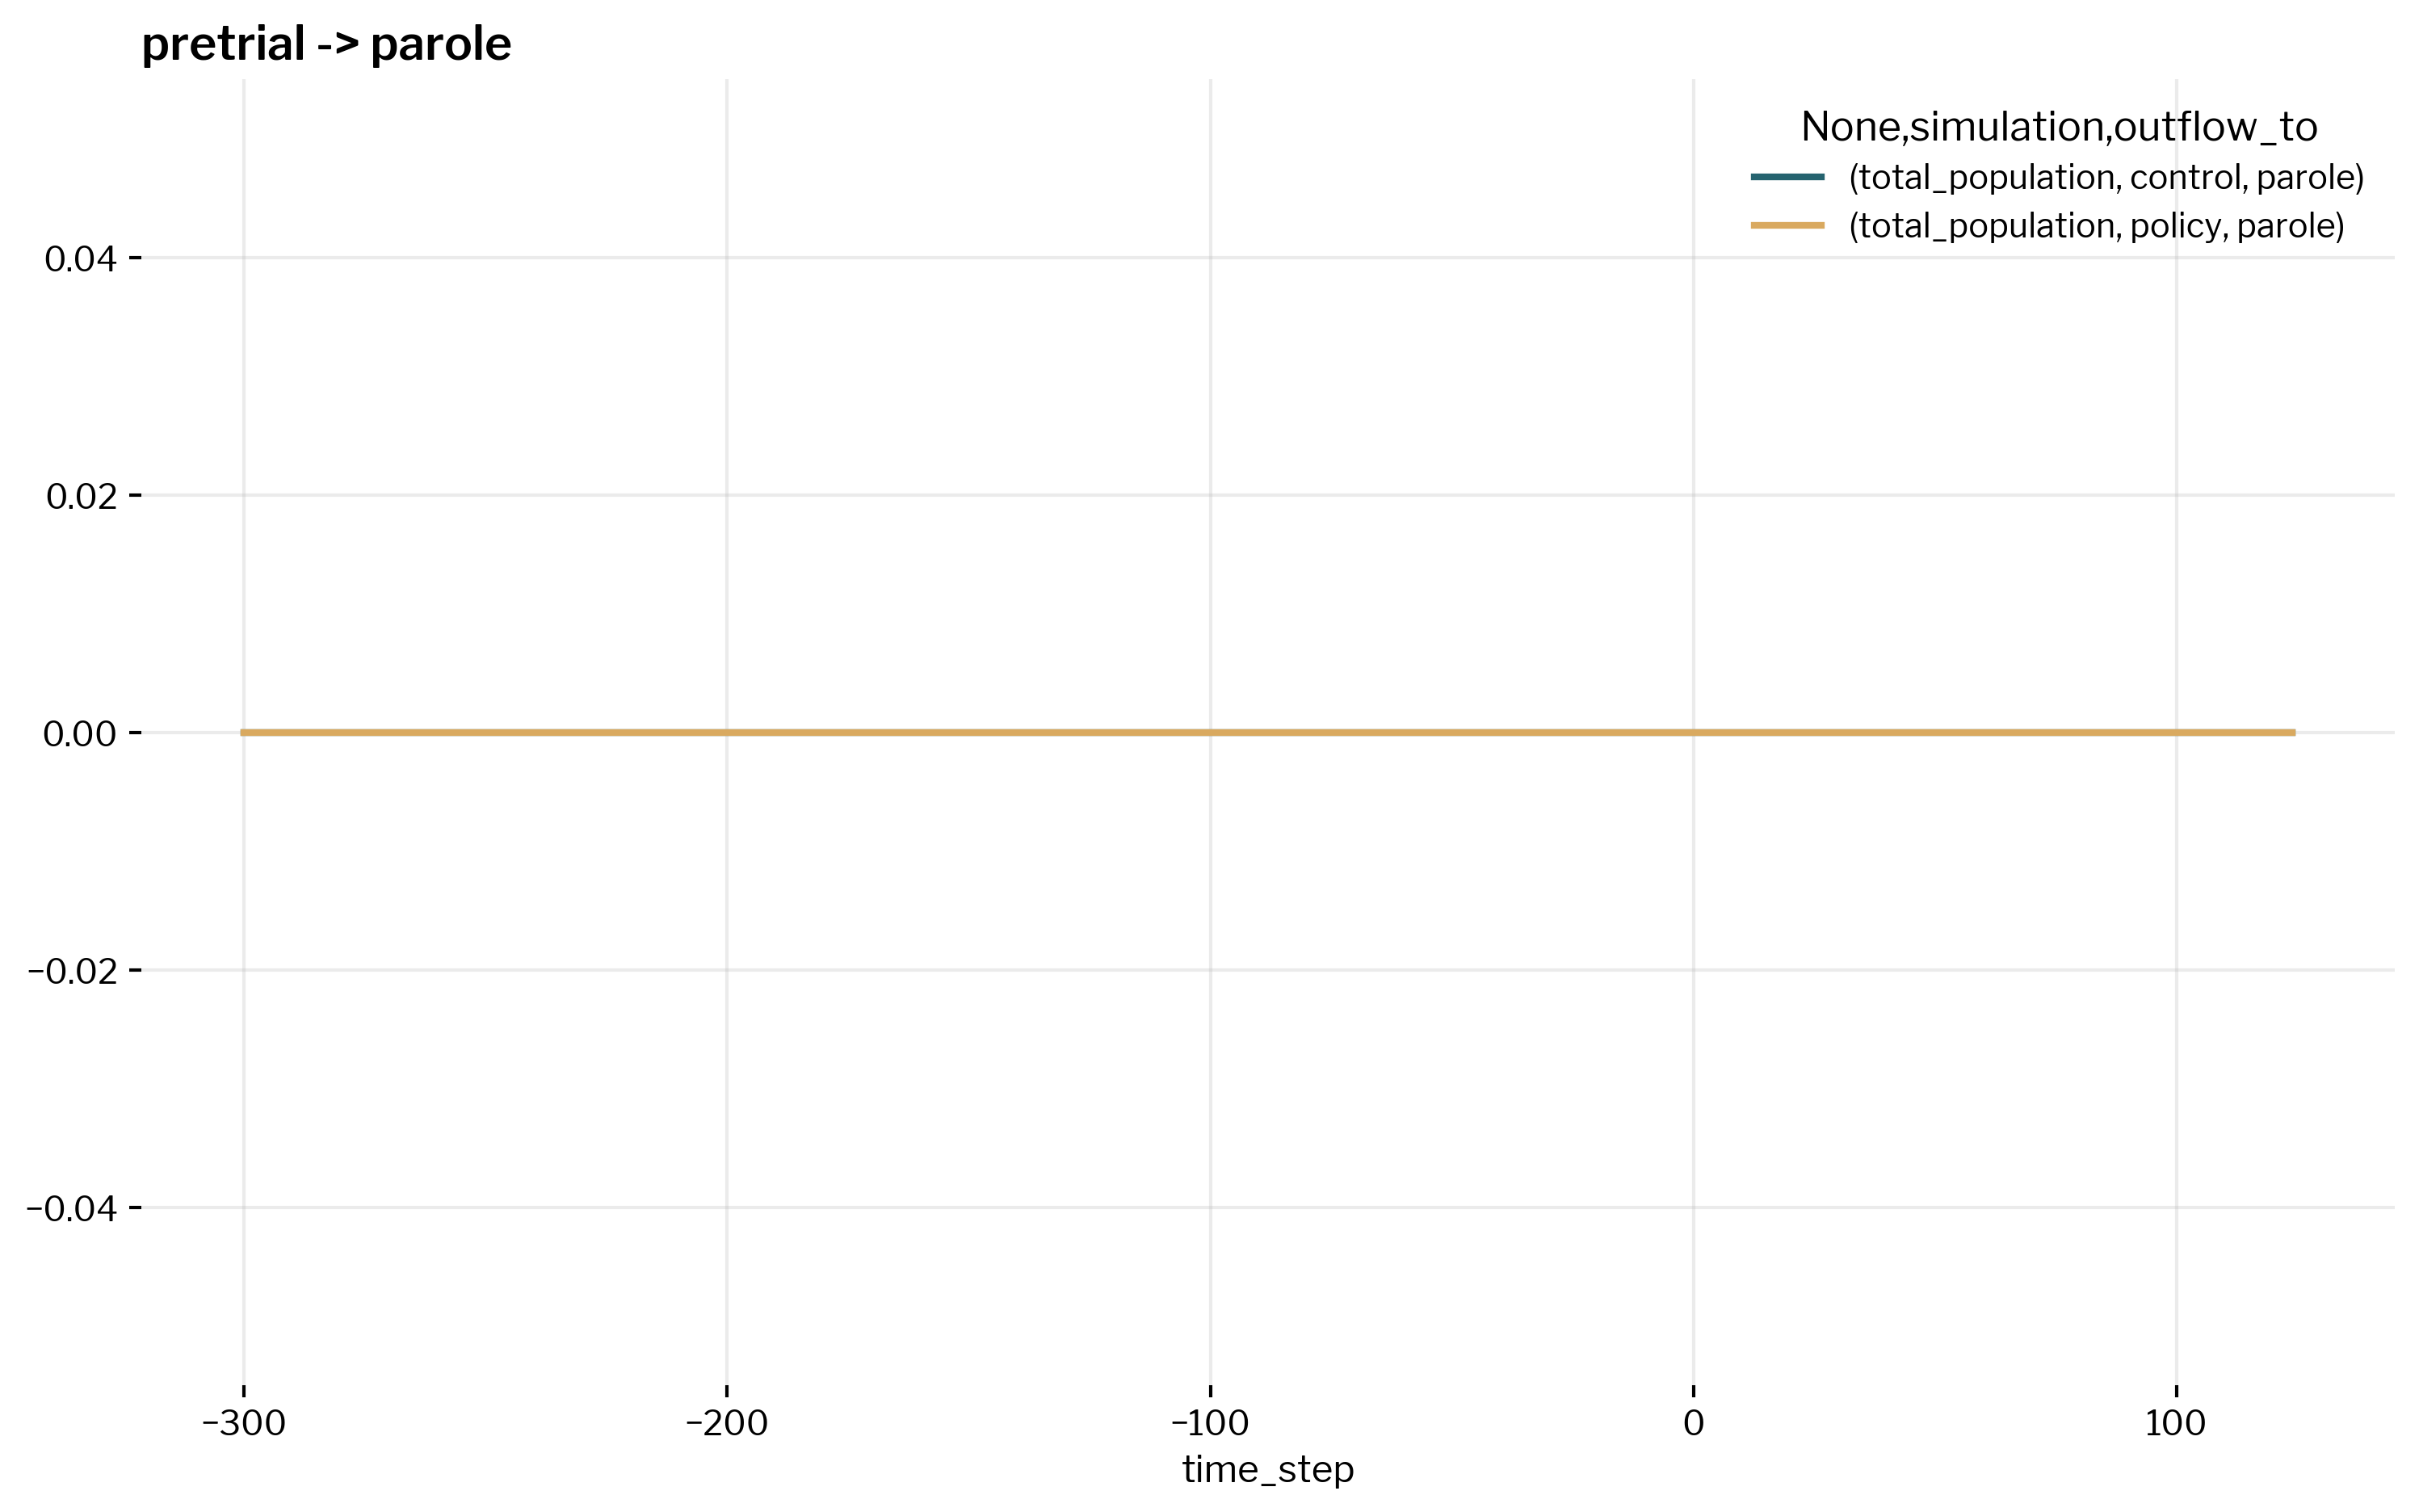

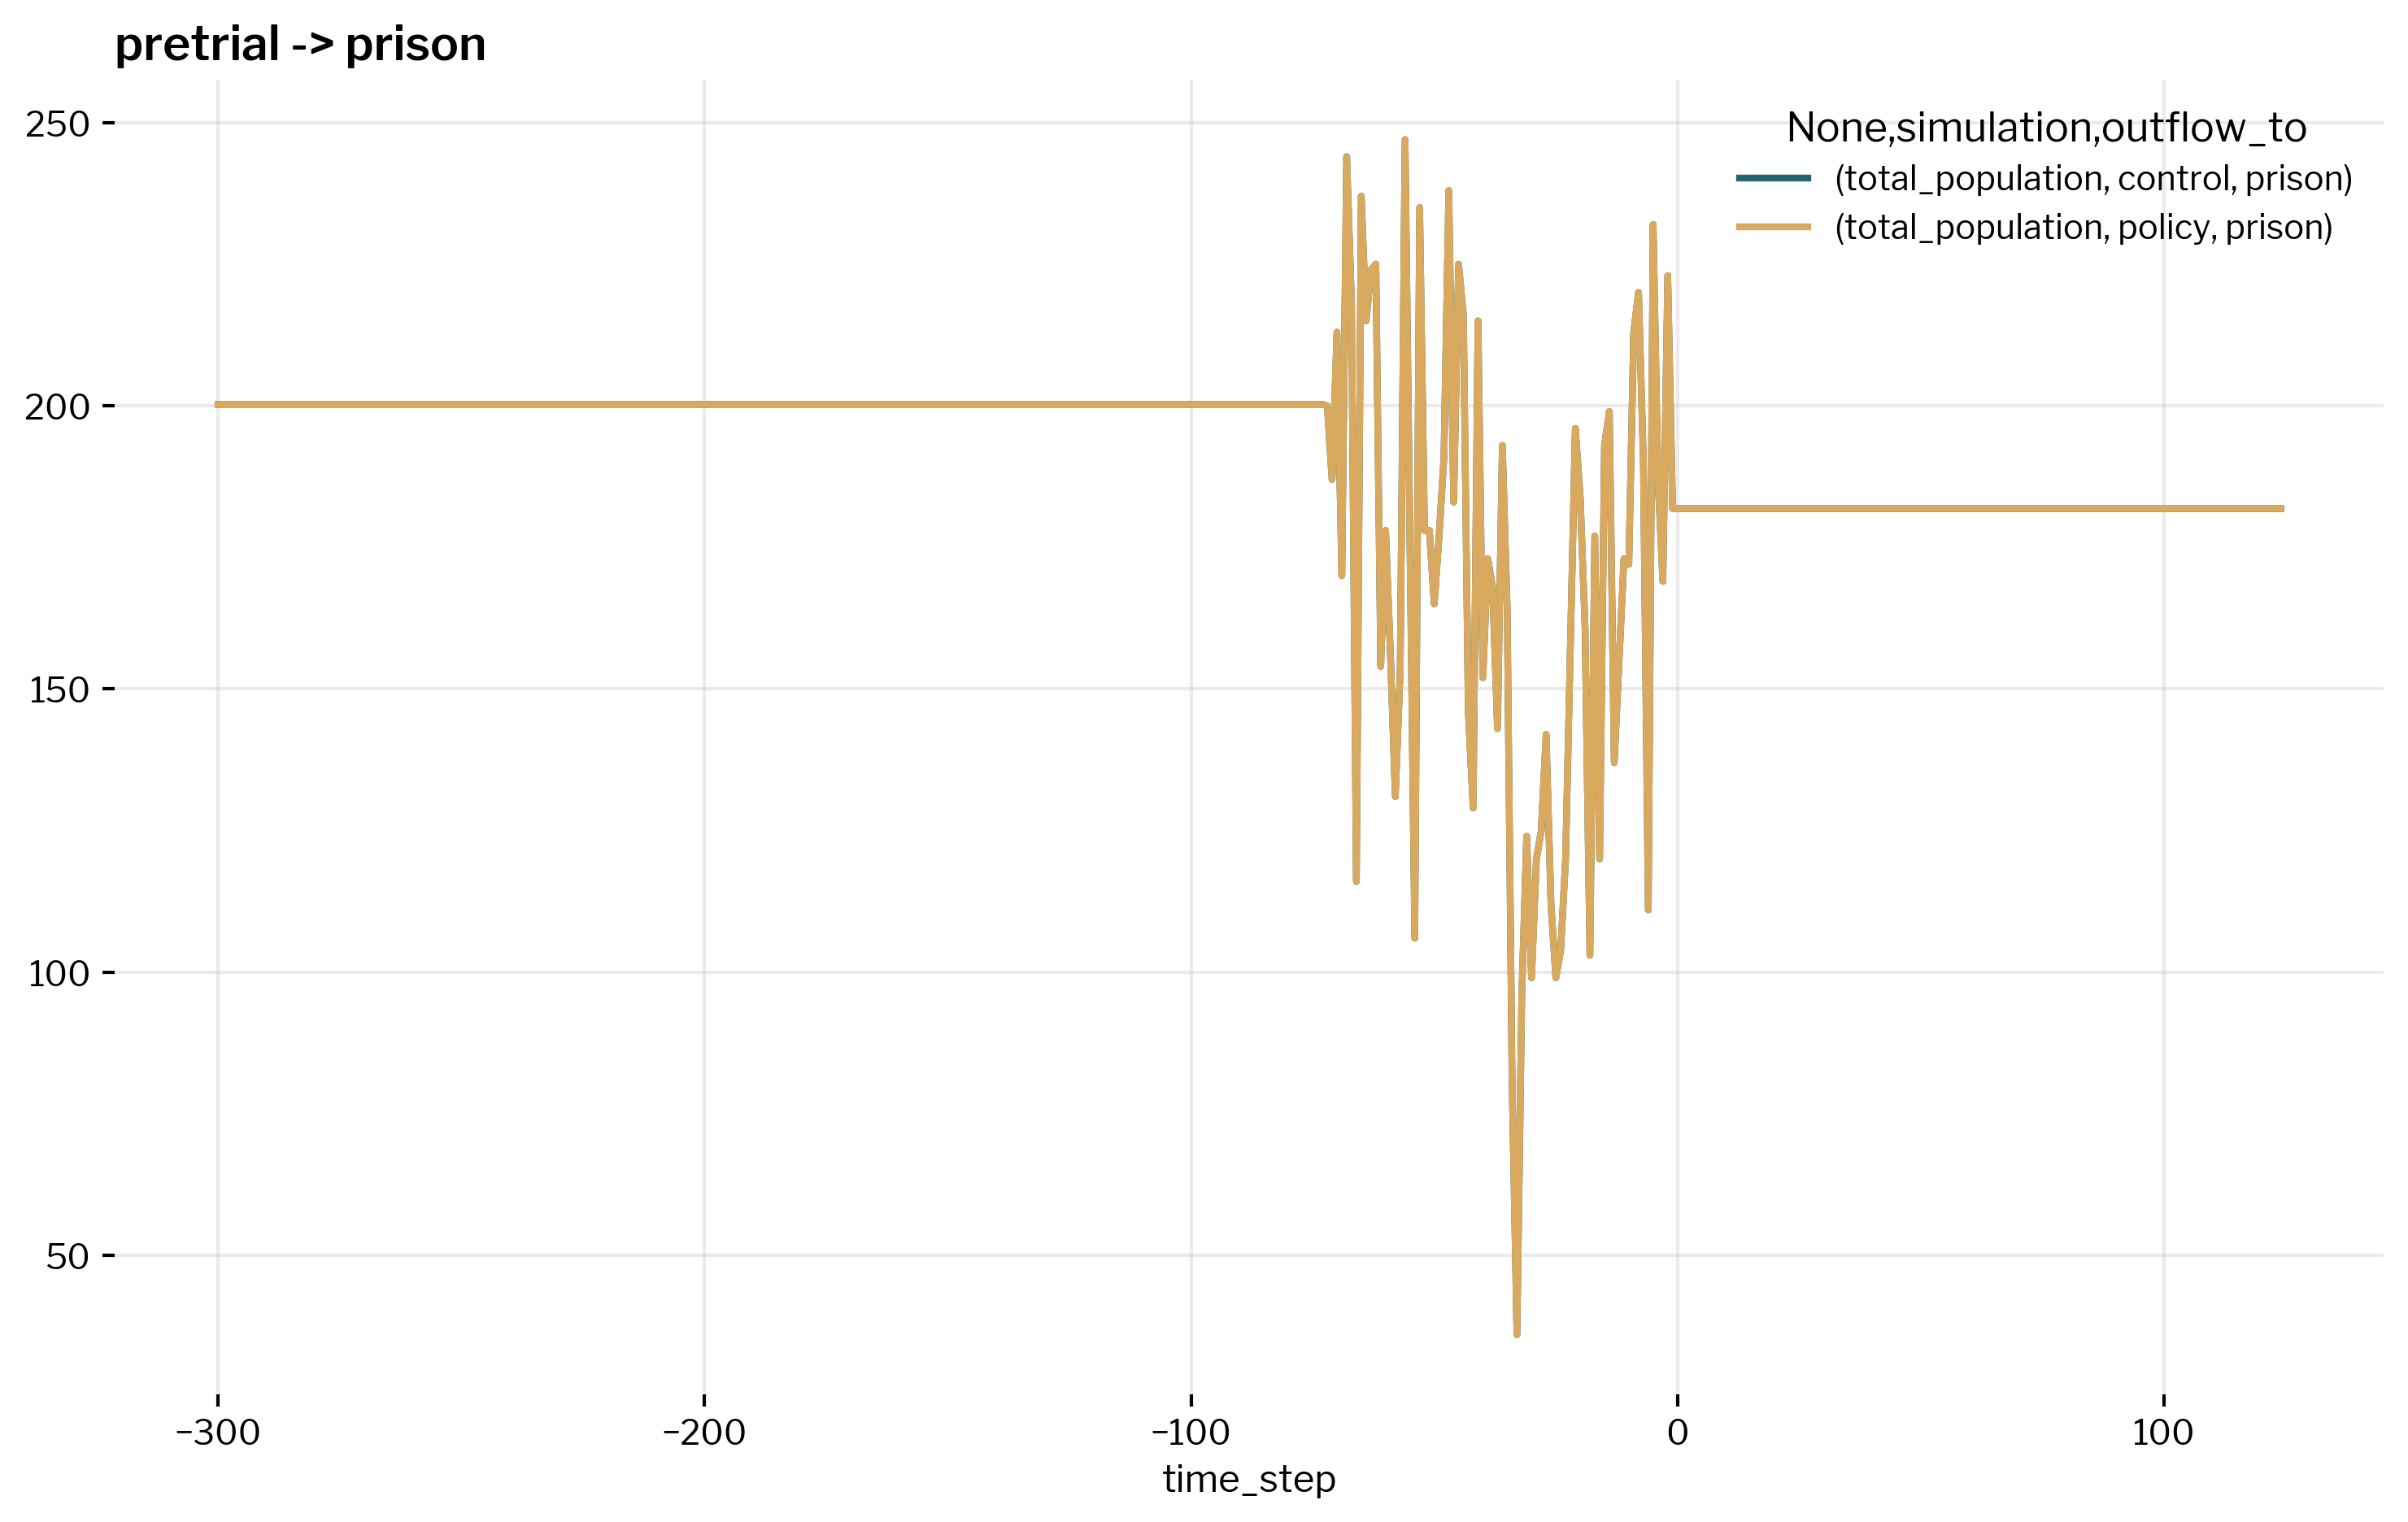

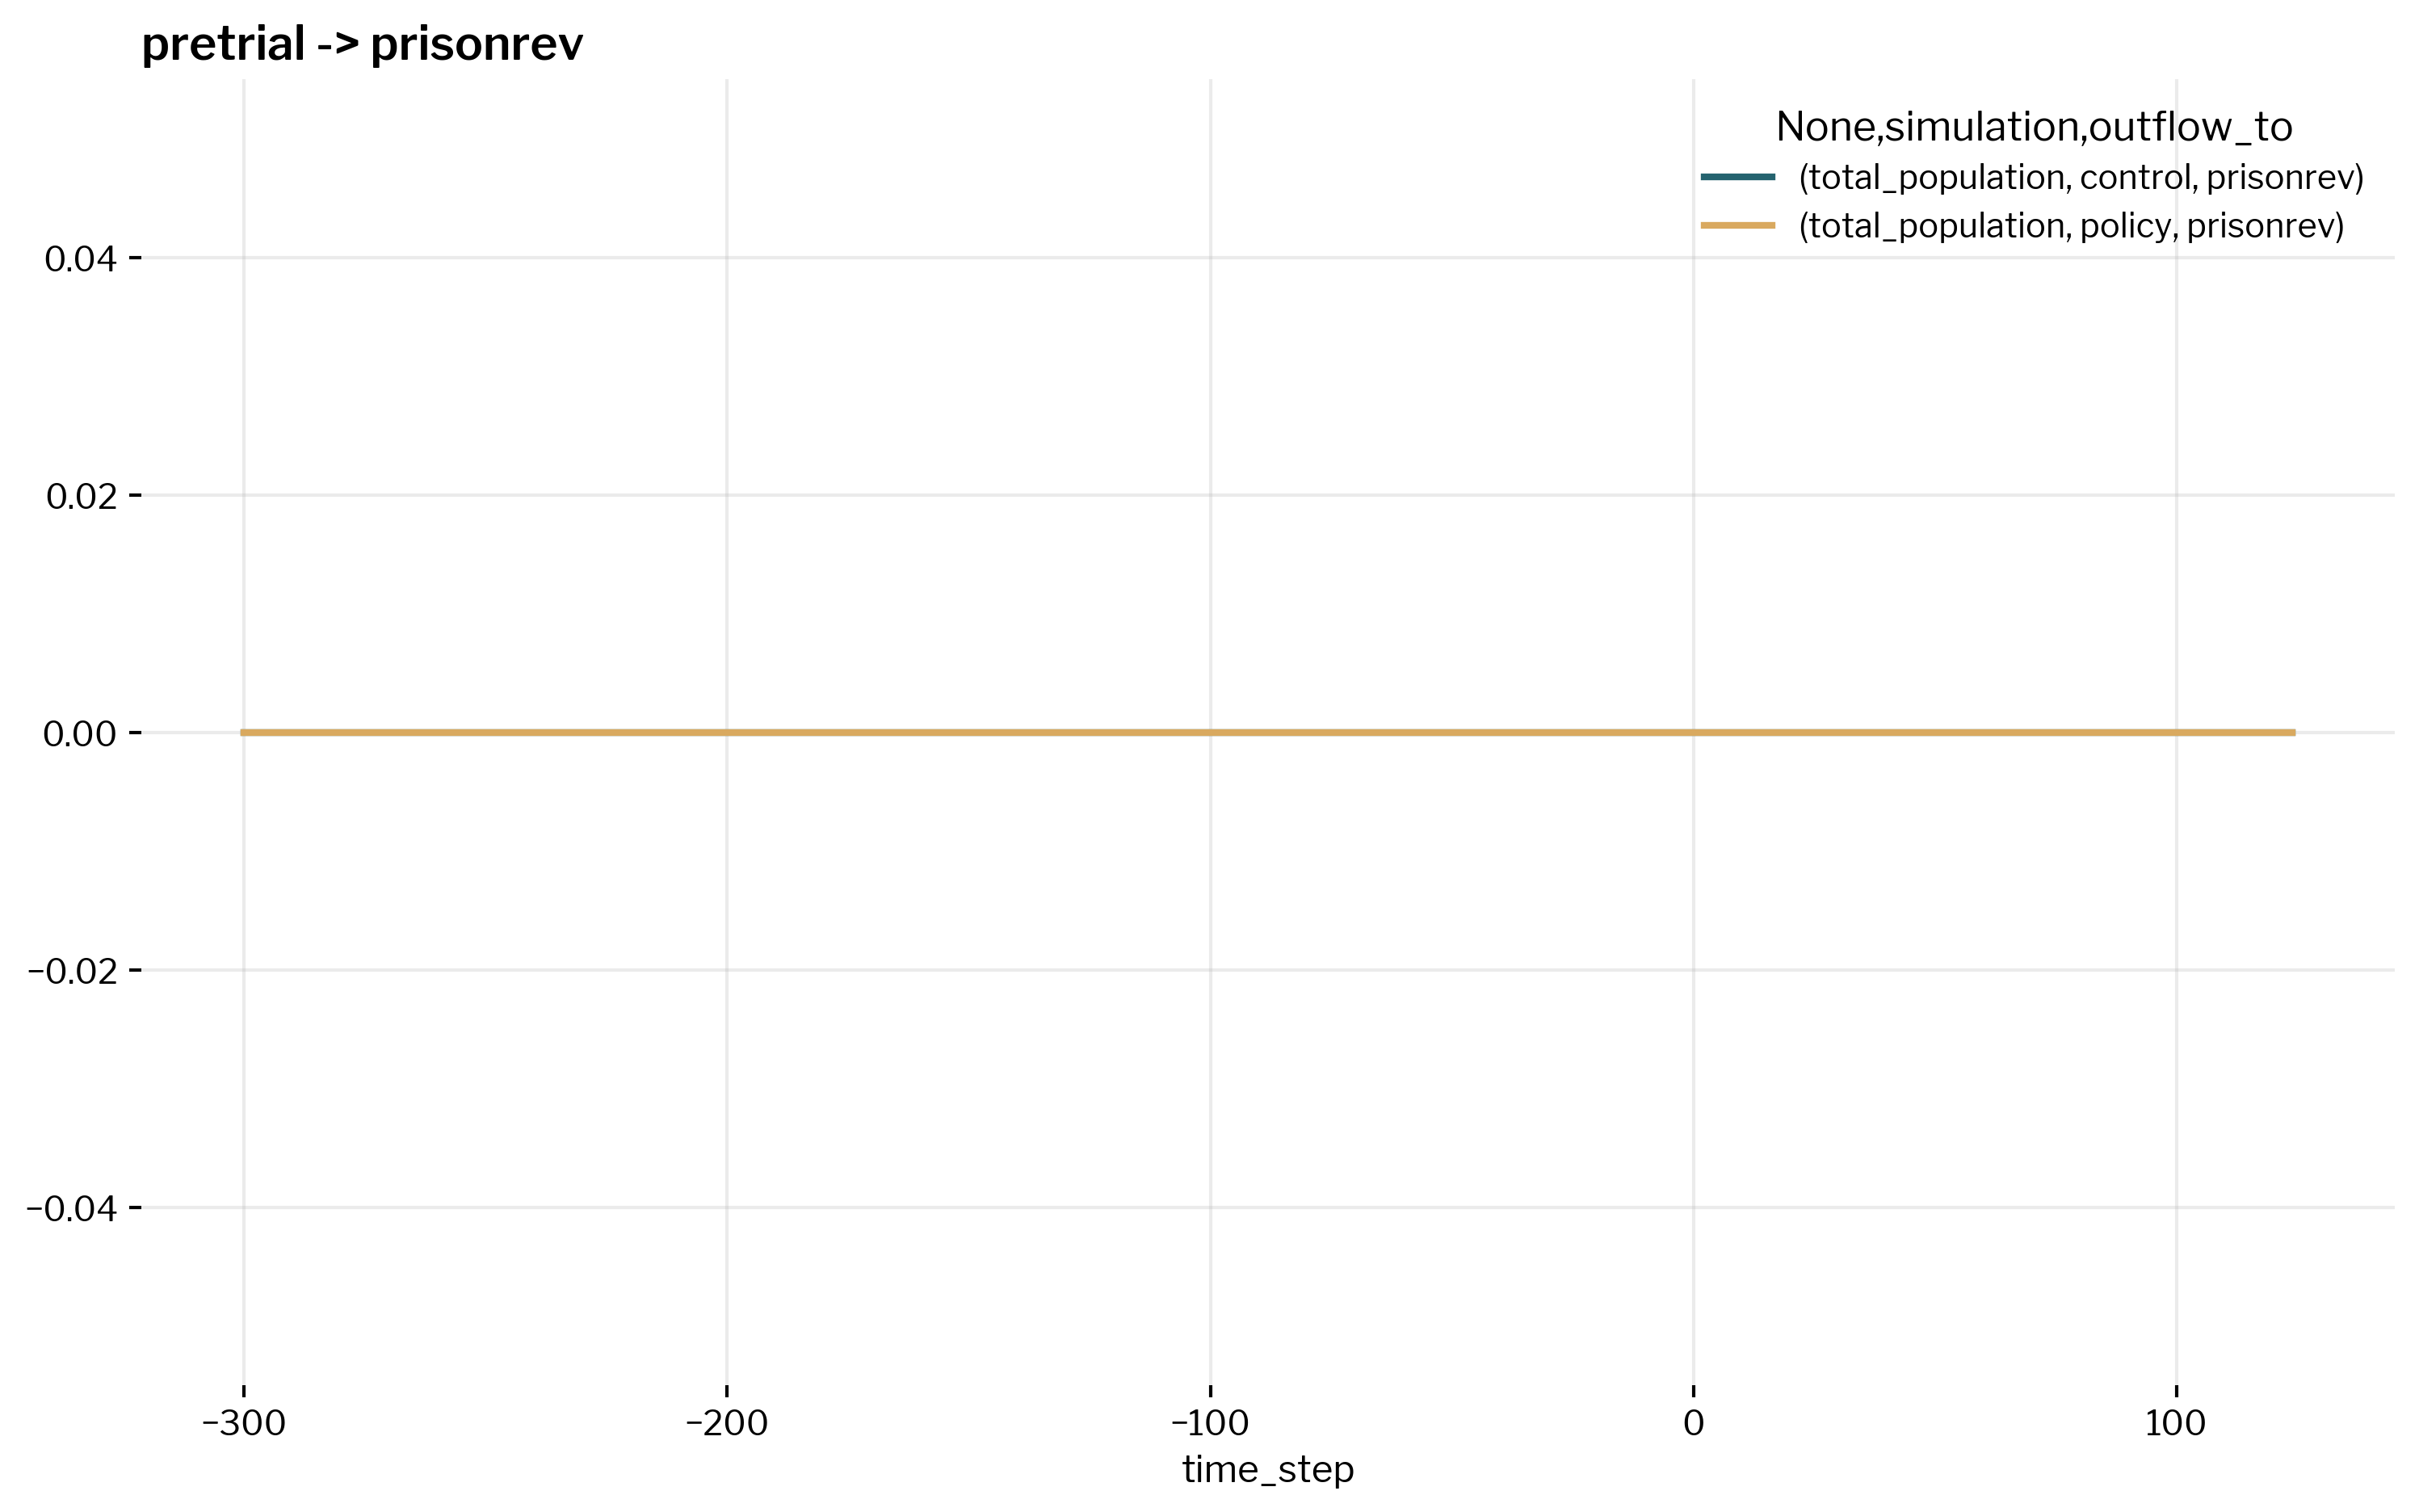

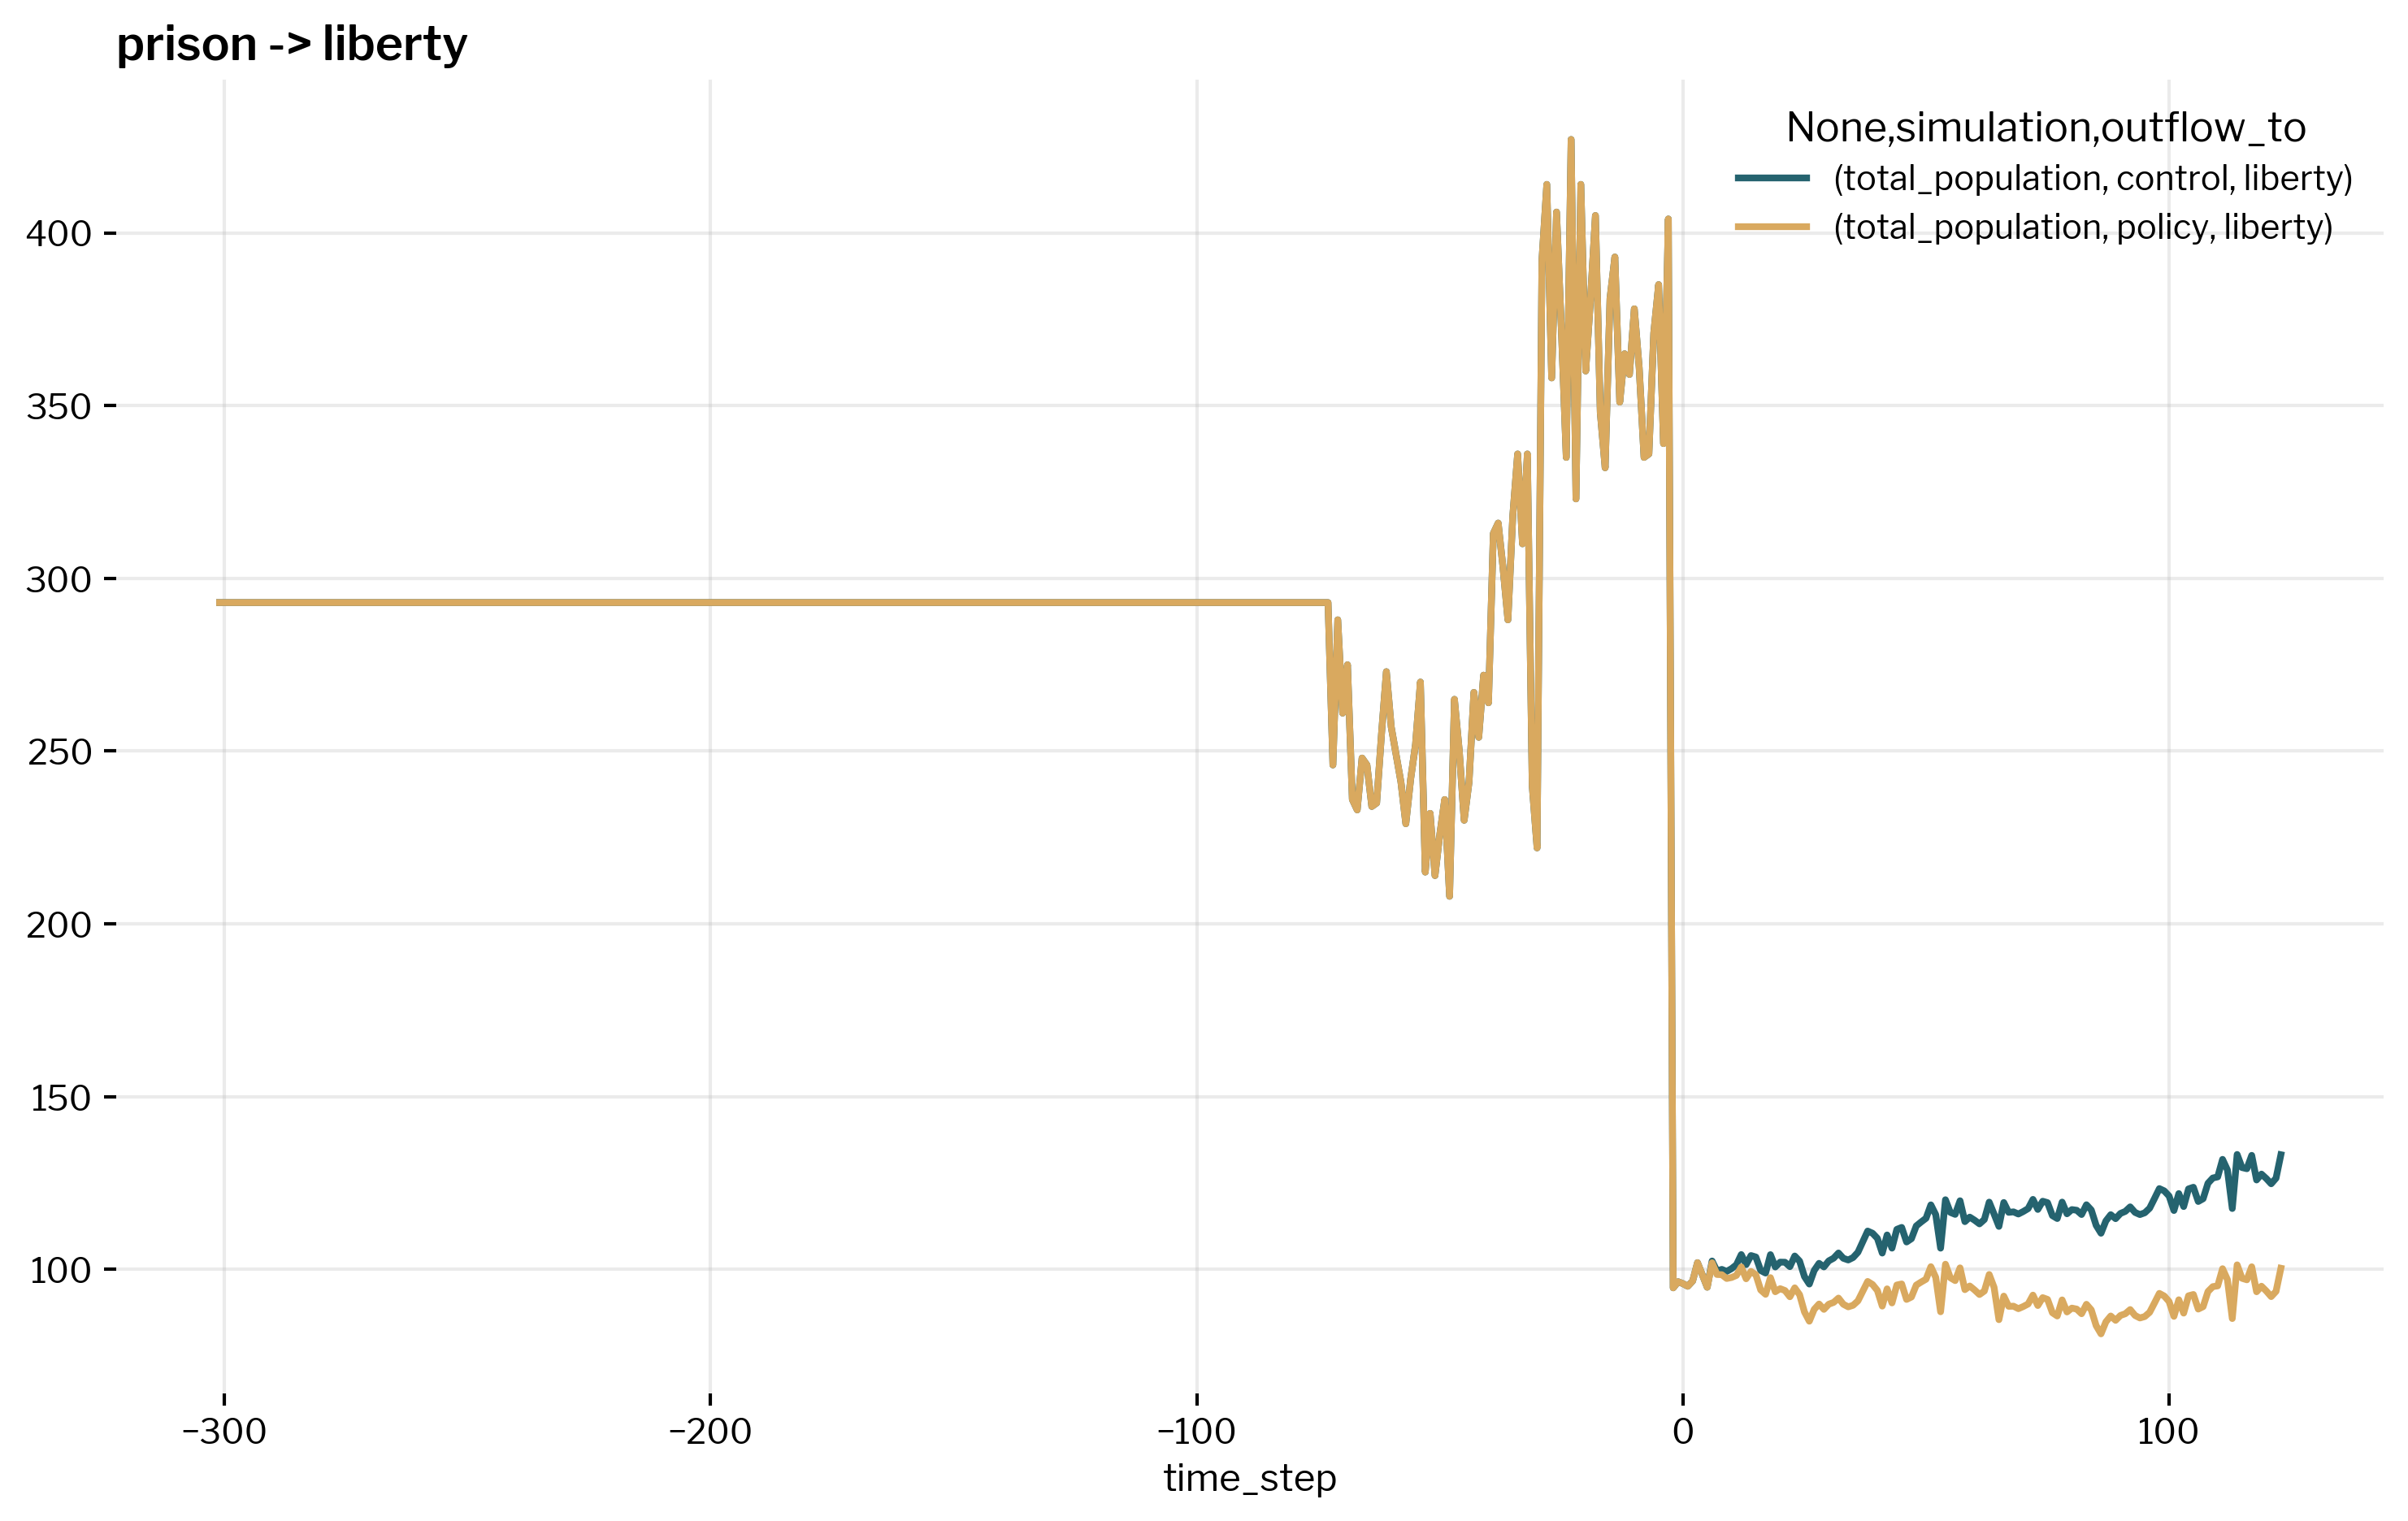

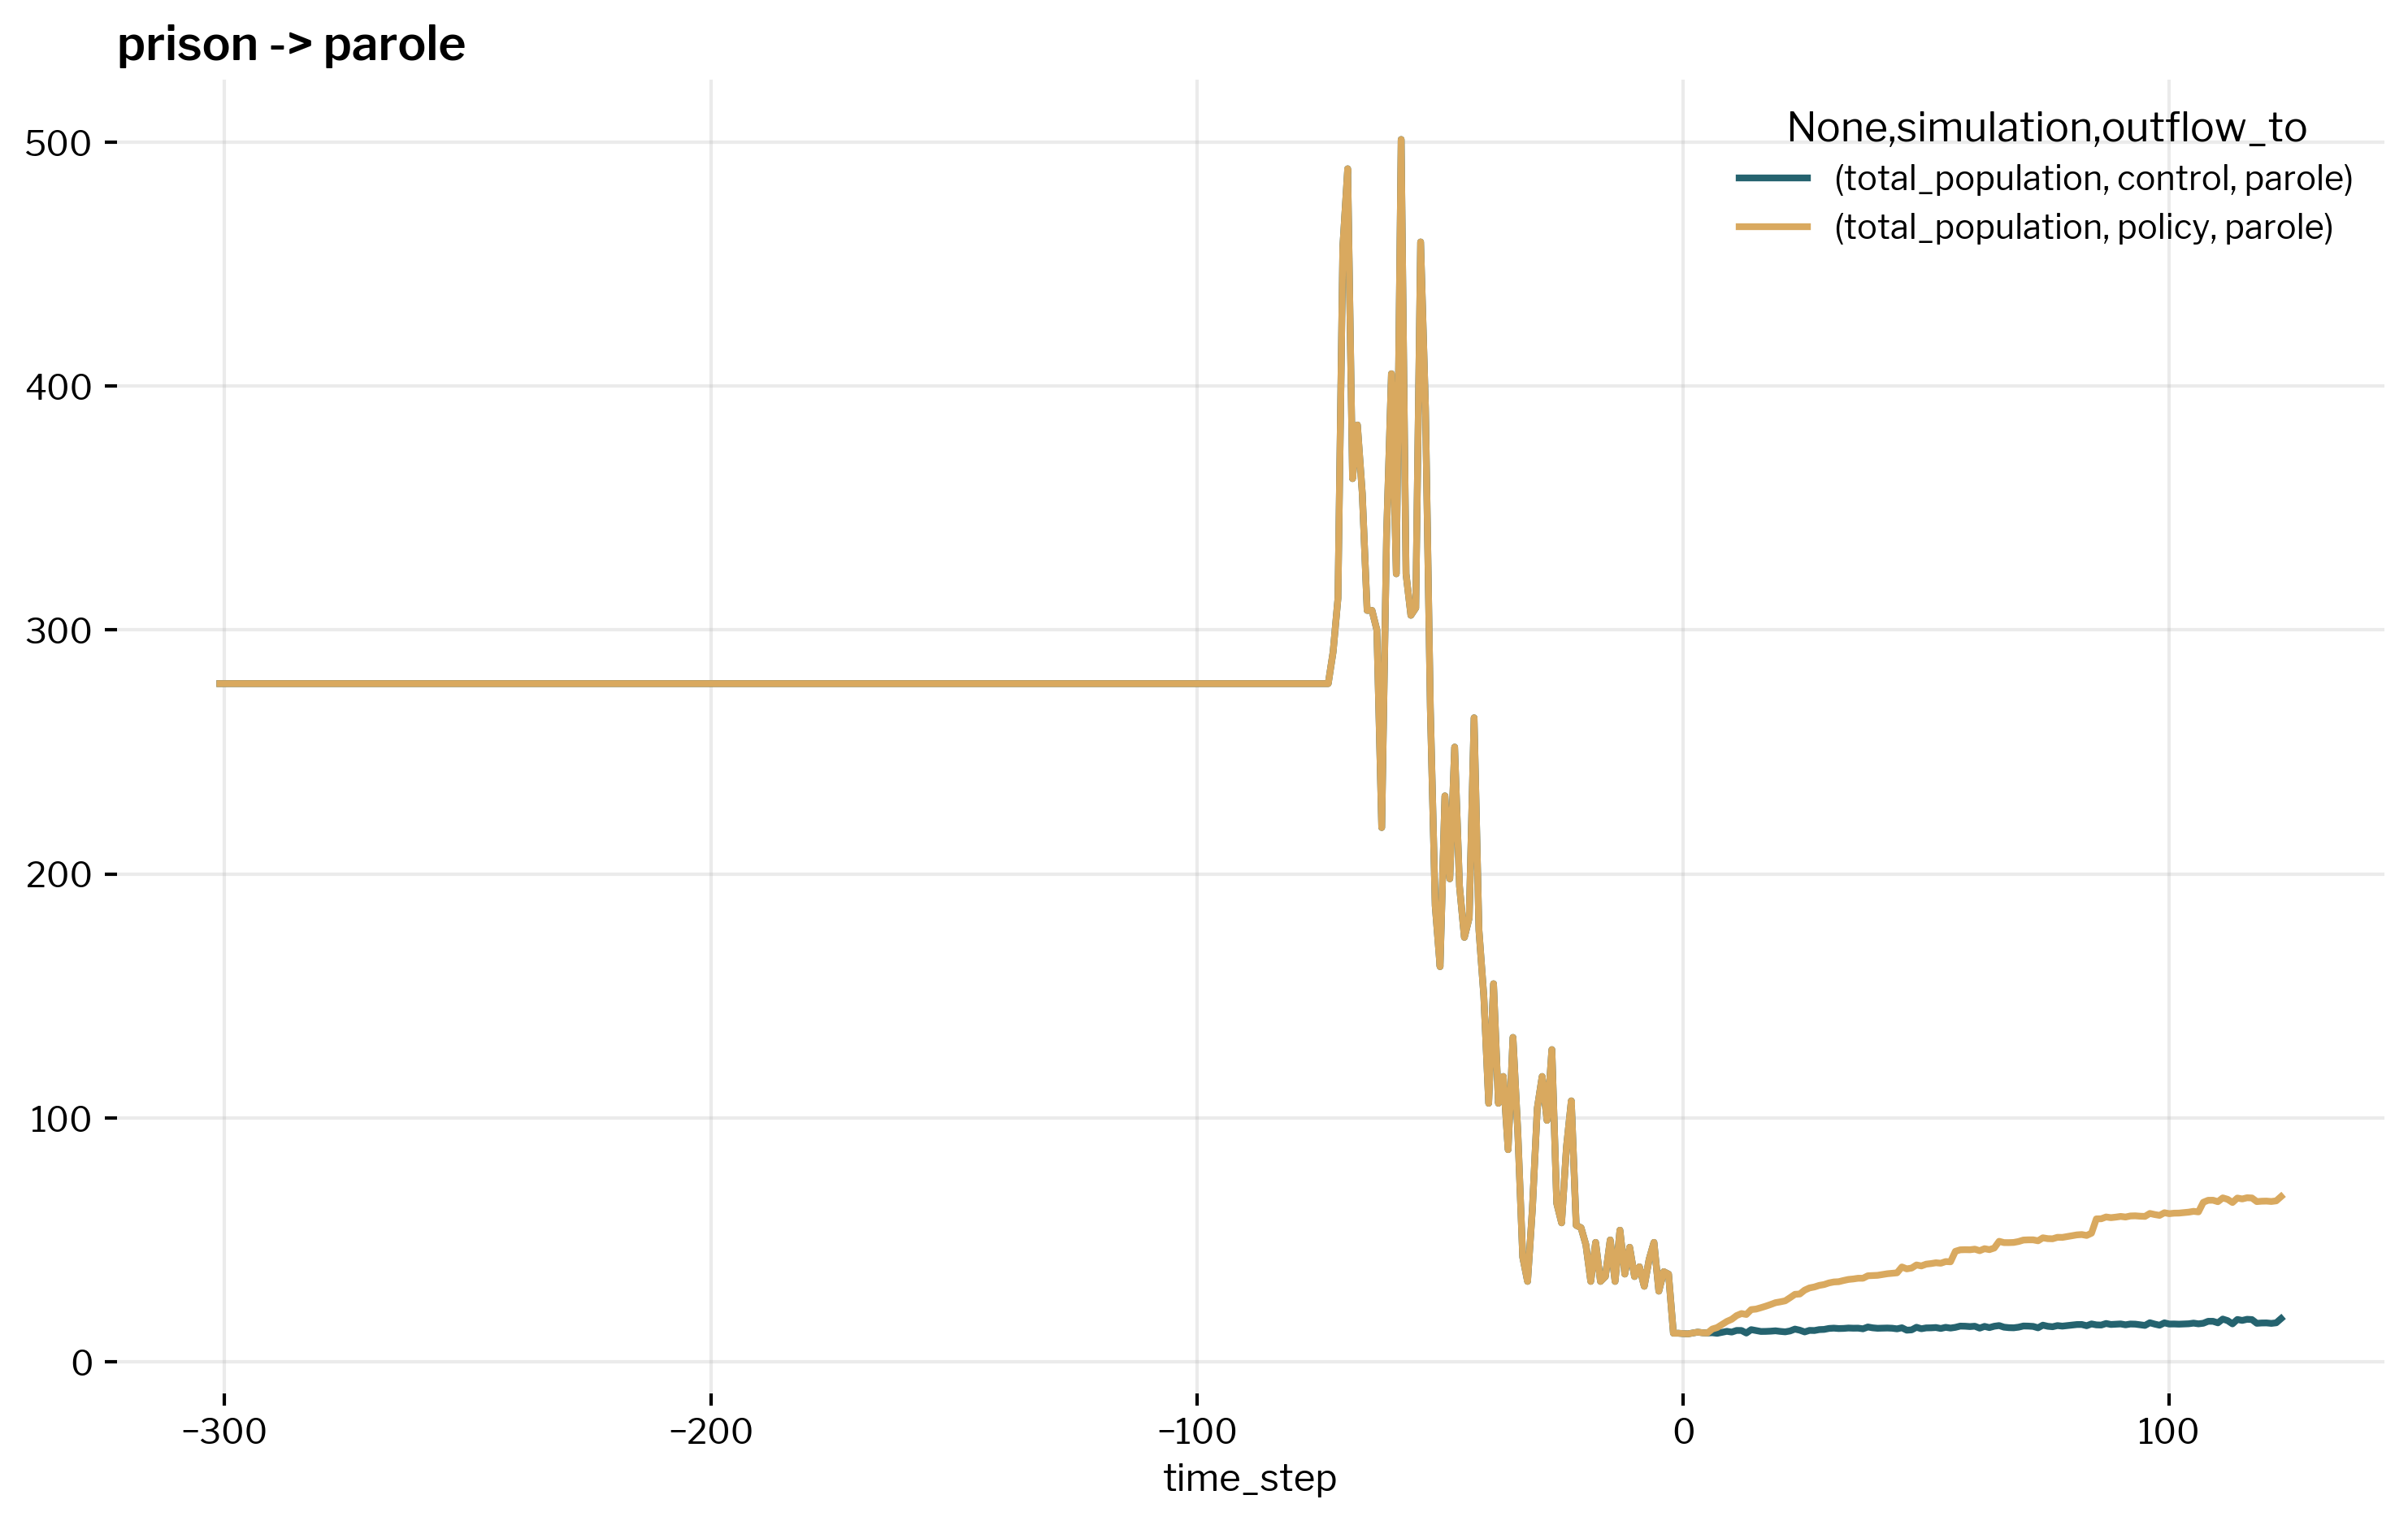

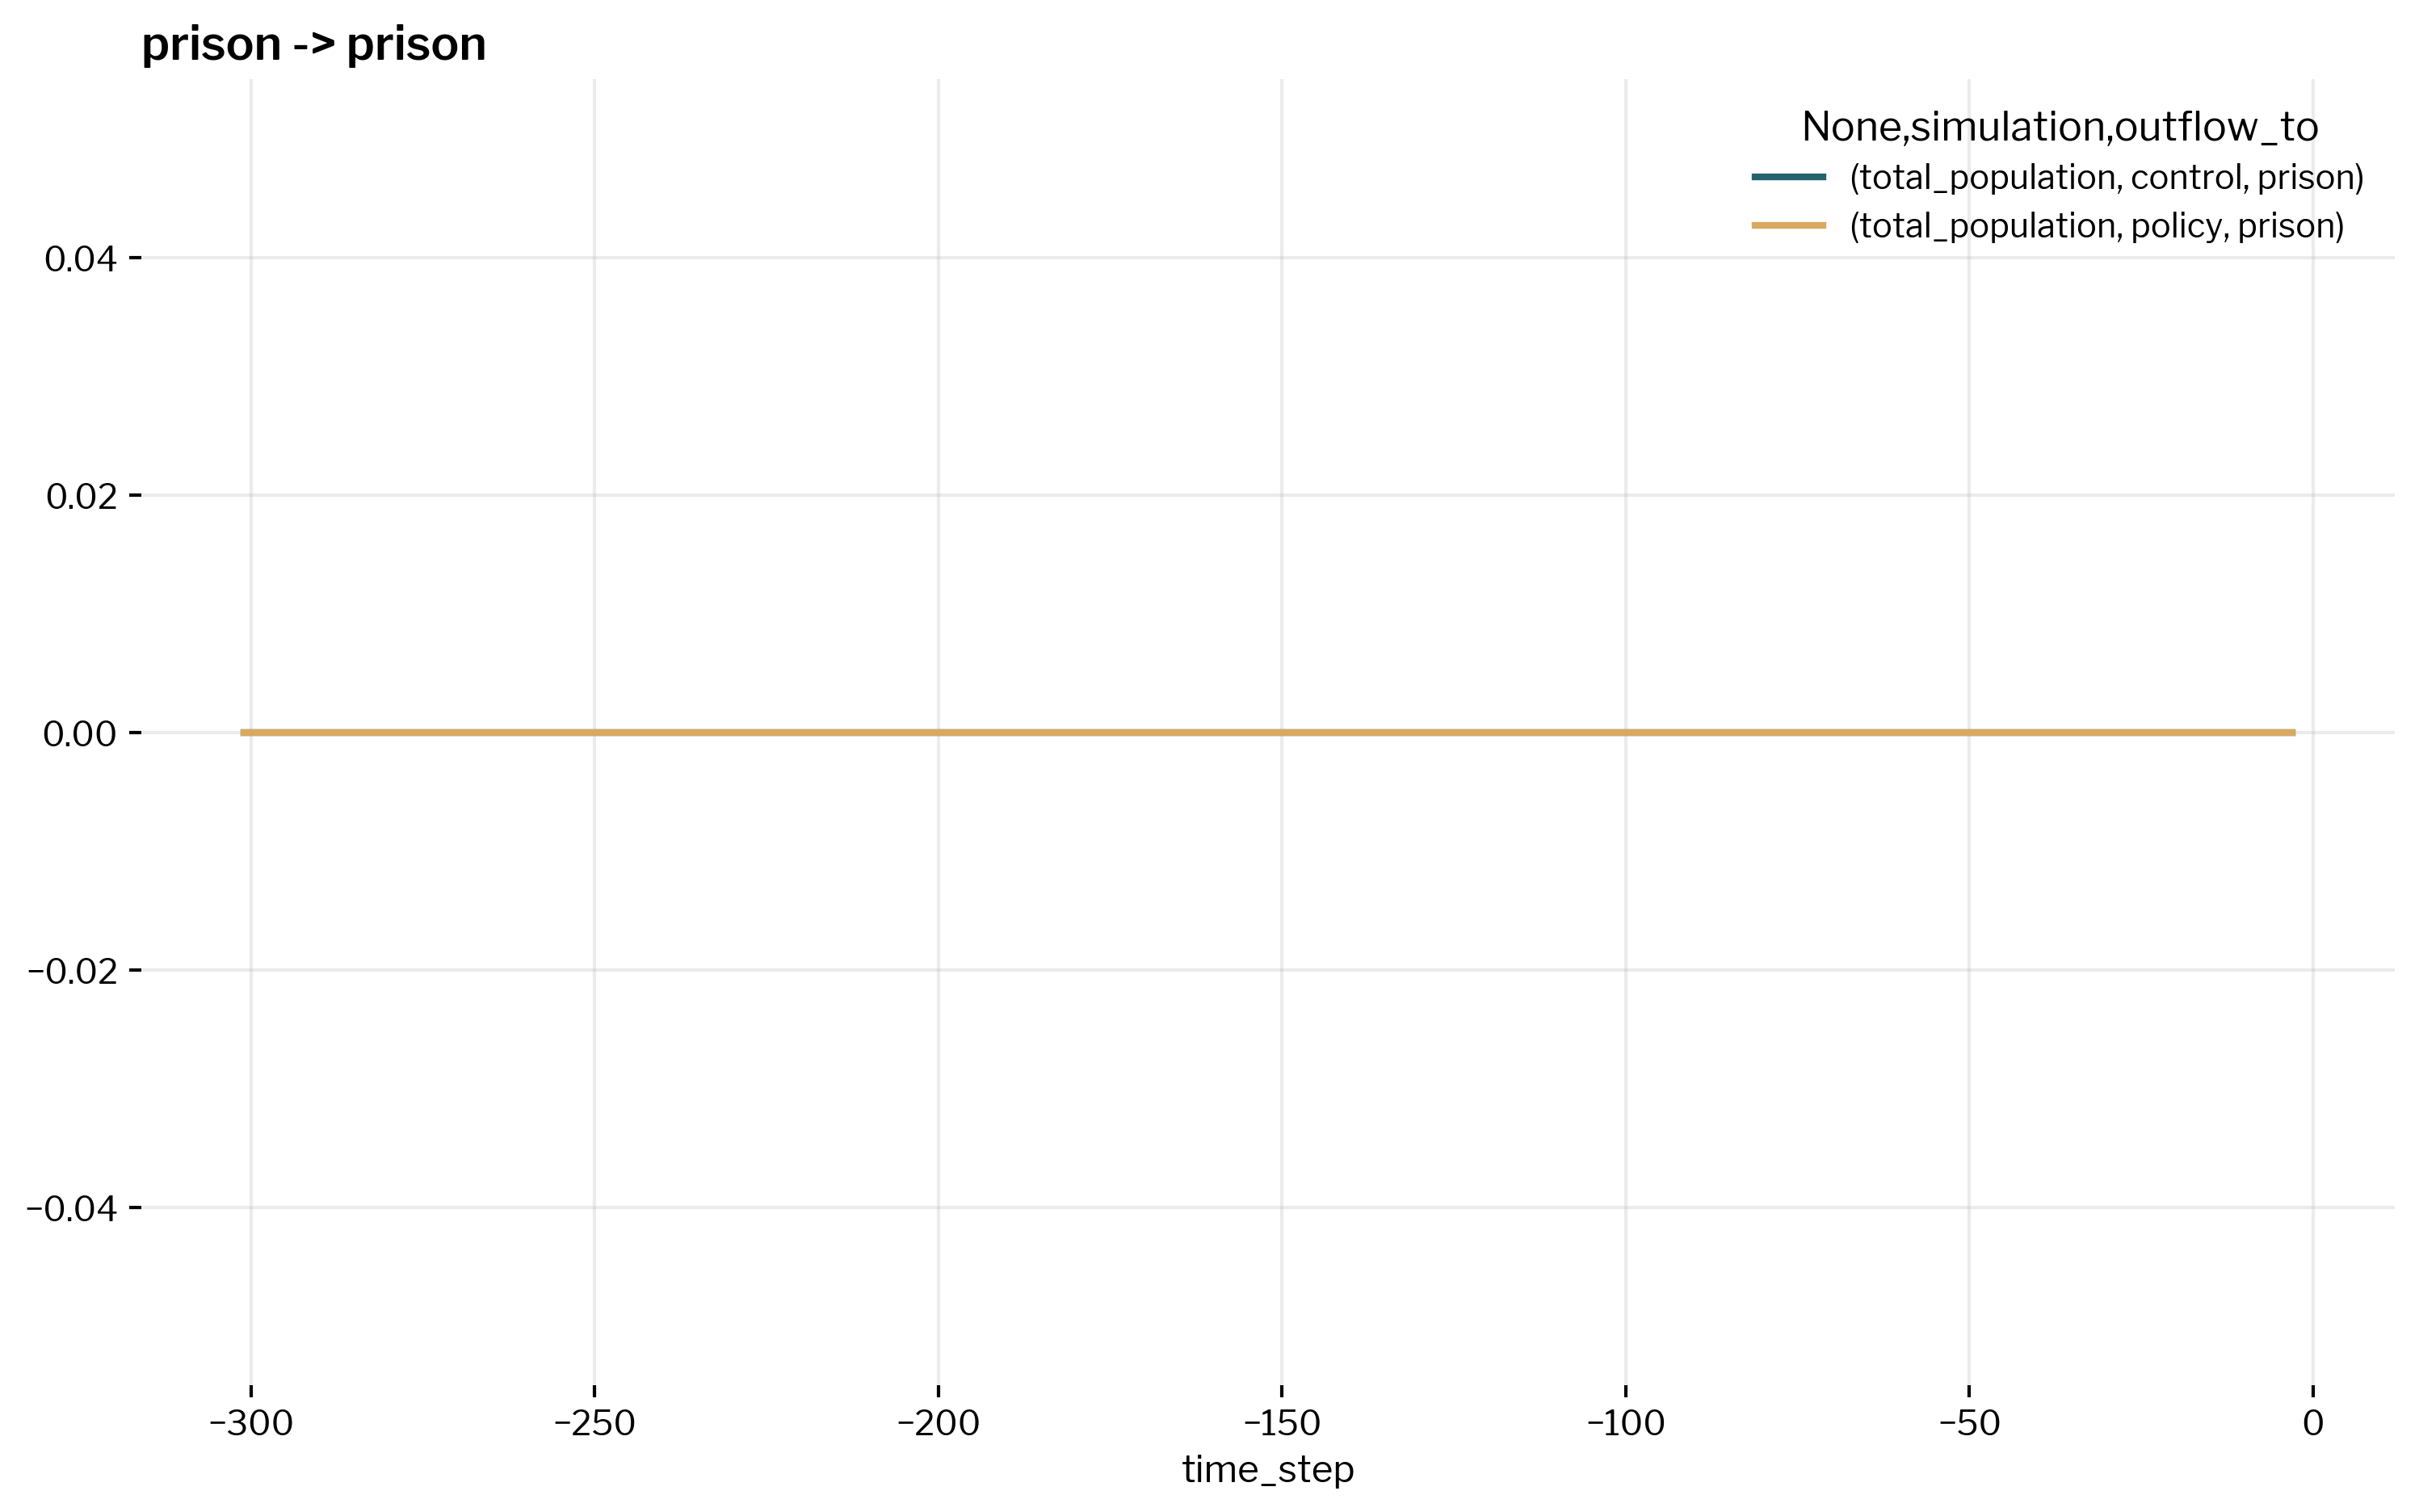

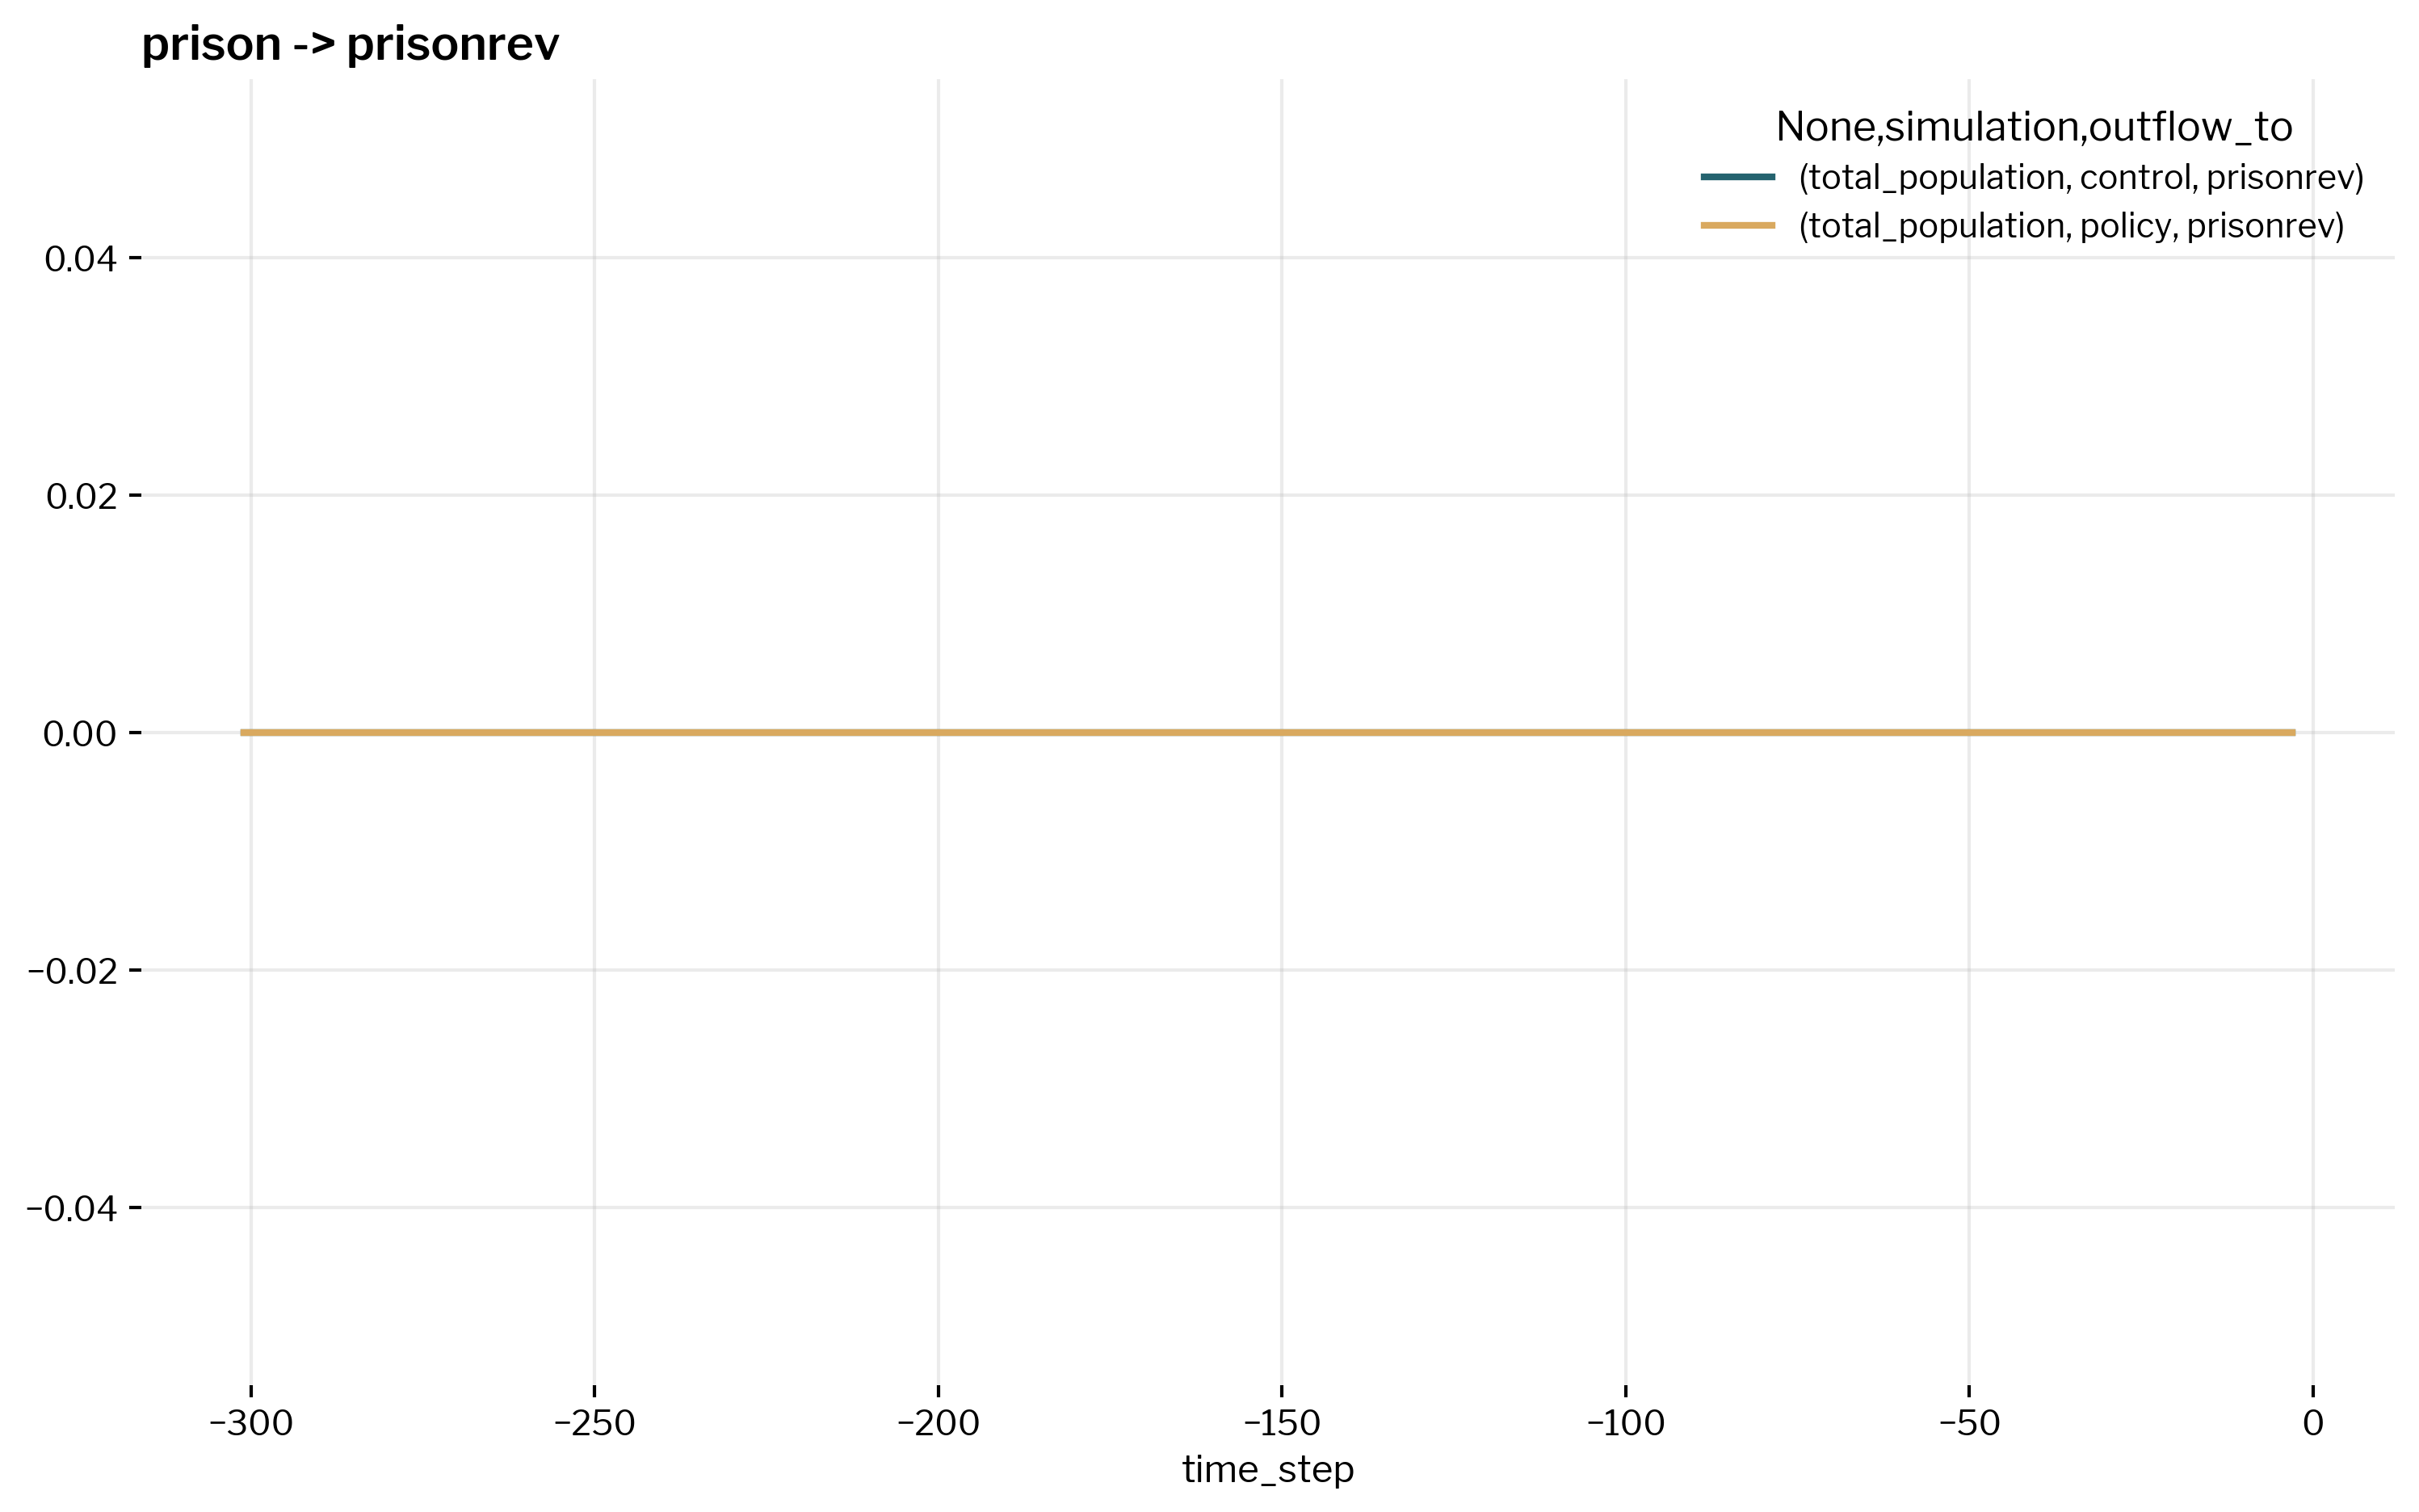

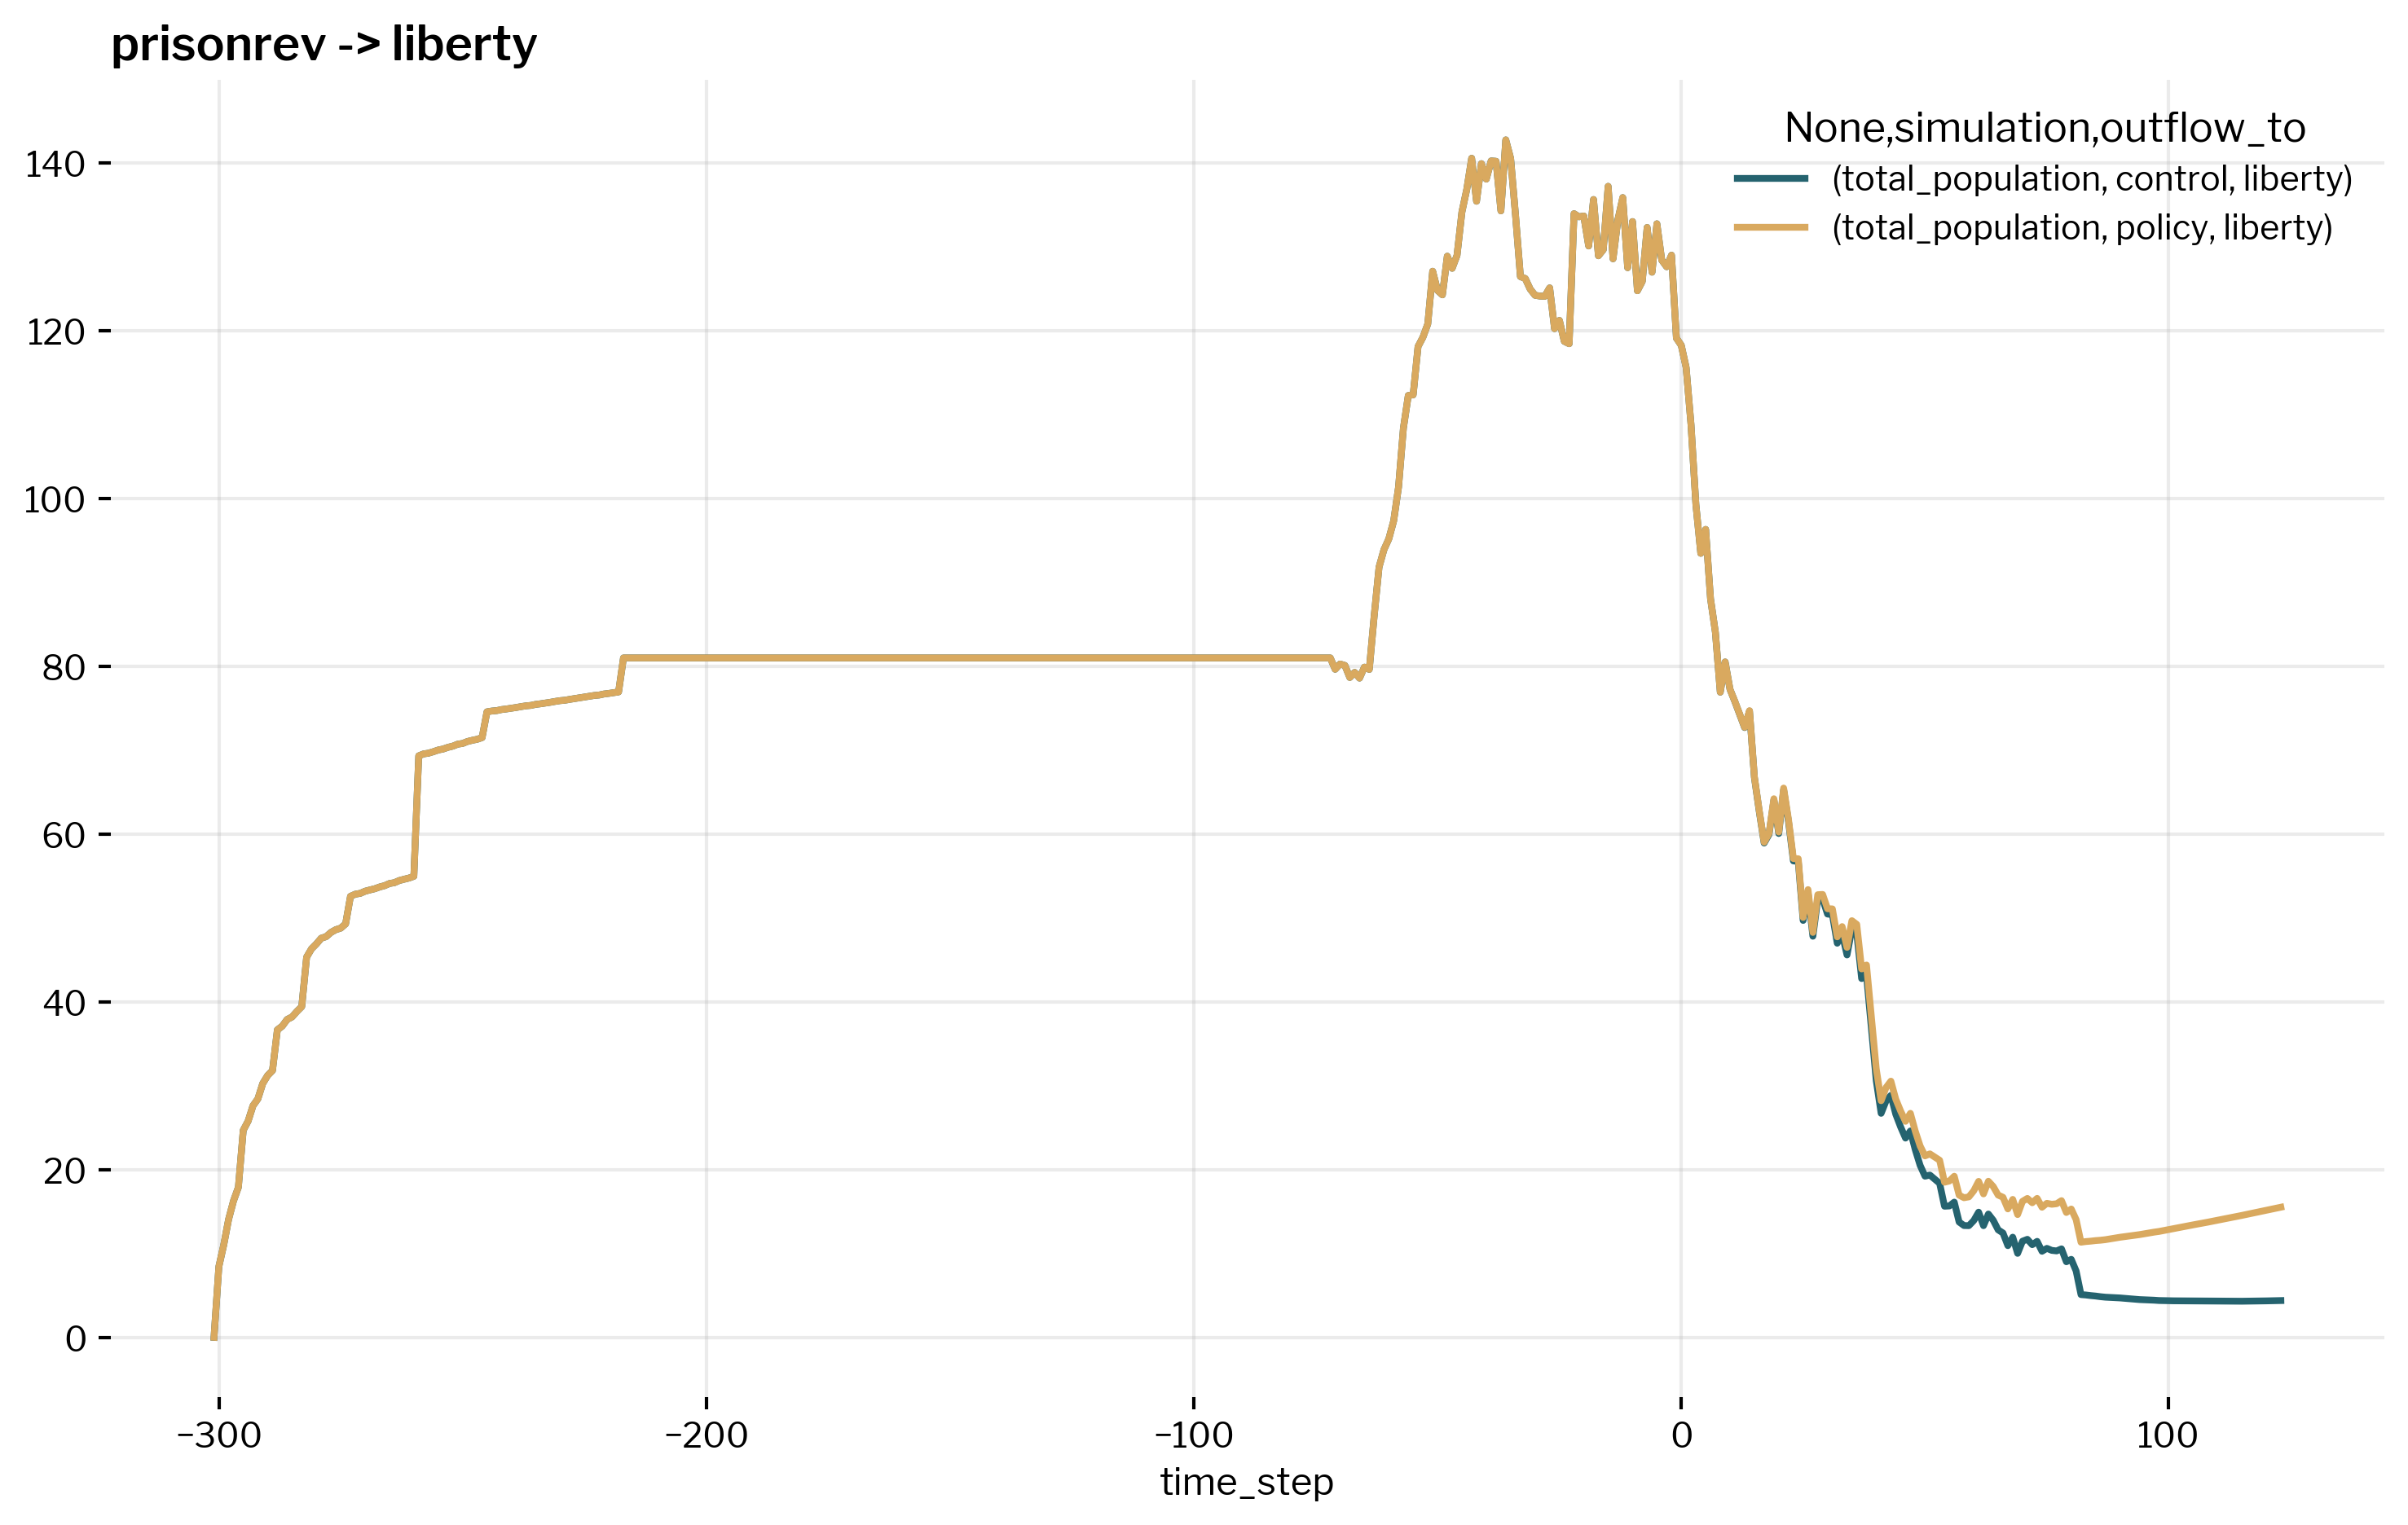

In [72]:
for compartment, grouped in outflows.groupby("compartment"):
    for outflow_to, grouped2 in grouped.groupby("outflow_to"):
        grouped2.pivot(
            index=["time_step"],
            columns=["simulation", "outflow_to"],
            values=["total_population"],
        ).plot()
        plt.title(f"{compartment} -> {outflow_to}")


#     display(grouped.head())
#     grouped[['time_step','total_population']].plot()
#     grouped.pivot(
#         index=['time_step'],
#         columns=['simulation','outflow_to'],
#         values=['total_population']
#     )

In [73]:
outflowslist = []
pop = []
for sim_name, sim in policy_sim.simulator.pop_simulations.items():
    for subsim_name, subsim in sim.sub_simulations.items():
        for comp, comp_results in subsim.simulation_compartments.items():
            #             display(f"{sim_name} {subsim_name} {comp} {comp_results.outflows.shape}")
            compflows = pd.DataFrame(comp_results.outflows.copy()).T
            #             compflows = pd.DataFrame(t.outflows.copy()).T
            #             compflows.prison = compflows.prisonrev.combine_first(compflows.prison)
            #             compflows.melt(value_vars=['liberty','parole','prison'],var_name='outflow_to',value_name='num')
            #             compflows.compartment
            compflows["sim"] = sim_name
            compflows["crime_type"] = subsim_name
            compflows["compartment"] = comp
            outflowslist.append(compflows)
display(len(outflowslist))
outflows = pd.concat(outflowslist)
outflows.prison = outflows.prisonrev.combine_first(outflows.prison)
outflows.head()

20

liberty  parole  prison  prisonrev      sim  crime_type compartment
-300      0.0     0.0     0.0        0.0  control  nonviolent    pretrial
-299      0.0     0.0     0.0        0.0  control  nonviolent    pretrial
-298      0.0     0.0     0.0        0.0  control  nonviolent    pretrial
-297      0.0     0.0     0.0        0.0  control  nonviolent    pretrial
-296      0.0     0.0     0.0        0.0  control  nonviolent    pretrial

In [74]:
outflows.reset_index().groupby(["index", "sim"]).sum().drop(
    columns="prisonrev"
).reset_index().pivot(index="index", columns="sim")

/var/folders/jn/2ddz89hx6tjf4m3dvz3dch840000gn/T/ipykernel_3588/2199113753.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  outflows.reset_index().groupby(["index", "sim"]).sum().drop(


liberty                     parole                 prison  \
sim          control         policy     control      policy    control   
index                                                                    
-301      293.000000     293.000000  278.000000  278.000000  81.000000   
-300      594.437929     594.437929  278.000000  278.000000  81.000000   
-299      898.464676     898.464676  278.000000  278.000000  81.000000   
-298     1205.545188    1205.545188  278.000000  278.000000  81.000000   
-297     1514.811740    1514.811740  278.000000  278.000000  81.000000   
...              ...            ...         ...         ...        ...   
 120   136879.946784  136471.495237   15.990283   65.921303   4.639304   
 121   137019.856904  136617.610266   15.801989   65.756868   4.642666   
 122   137161.349222  136765.428601   16.042270   66.021012   4.647603   
 123   137309.880498  136920.402442   17.771103   67.773705   4.655069   
 124        0.000000       0.000000    0.000000    0.000000   0.000000   

                  
sim       policy  
index             
-301   81.000000  
-300   81.000000  
-299   81.000000  
-298   81.000000  
-297   81.000000  
...          ...  
 120   18.143546  
 121   18.250159  
 122   18.307876  
 123   18.367418  
 124    0.000000  

[426 rows x 6 columns]

# outflow TARGET COMPARISON

In [75]:
desired_outflows = {
    "prison": {"liberty": 367, "parole": 47.4},
    "parole": {"liberty": 35.4, "prisonrev": 97.5},
}

'pretrial'

outflow_to  liberty_control  parole_control  prison_control  prisonrev_control
-24                     0.0             0.0           104.0                0.0
-23                     0.0             0.0           120.0                0.0
-22                     0.0             0.0           158.0                0.0
-21                     0.0             0.0           196.0                0.0
-20                     0.0             0.0           184.0                0.0

outflow_to  liberty_policy  parole_policy  prison_policy  prisonrev_policy
-24                    0.0            0.0          104.0               0.0
-23                    0.0            0.0          120.0               0.0
-22                    0.0            0.0          158.0               0.0
-21                    0.0            0.0          196.0               0.0
-20                    0.0            0.0          184.0               0.0

-24    -23    -22    -21    -20    -19    -18    -17    -16   \
outflow_to                                                                      
prison_control  104.0  120.0  158.0  196.0  184.0  161.0  103.0  177.0  120.0   
prison_policy   104.0  120.0  158.0  196.0  184.0  161.0  103.0  177.0  120.0   

                 -15    -14    -13    -12    -11    -10    -9     -8     -7    \
outflow_to                                                                      
prison_control  193.0  199.0  137.0  155.0  173.0  172.0  213.0  220.0  190.0   
prison_policy   193.0  199.0  137.0  155.0  173.0  172.0  213.0  220.0  190.0   

                 -6     -5     -4     -3     -2          -1           0    \
outflow_to                                                                  
prison_control  111.0  232.0  187.0  169.0  223.0  181.833333  181.833333   
prison_policy   111.0  232.0  187.0  169.0  223.0  181.833333  181.833333   

                       1           2           3           4           5    \
outflow_to                                                                   
prison_control  181.833333  181.833333  181.833333  181.833333  181.833333   
prison_policy   181.833333  181.833333  181.833333  181.833333  181.833333   

                       6           7           8           9           10   \
outflow_to                                                                   
prison_control  181.833333  181.833333  181.833333  181.833333  181.833333   
prison_policy   181.833333  181.833333  181.833333  181.833333  181.833333   

                       11          12          13          14          15   \
outflow_to                                                                   
prison_control  181.833333  181.833333  181.833333  181.833333  181.833333   
prison_policy   181.833333  181.833333  181.833333  181.833333  181.833333   

                       16          17          18          19          20   \
outflow_to                                                                   
prison_control  181.833333  181.833333  181.833333  181.833333  181.833333   
prison_policy   181.833333  181.833333  181.833333  181.833333  181.833333   

                       21          22          23          24          25   \
outflow_to                                                                   
prison_control  181.833333  181.833333  181.833333  181.833333  181.833333   
prison_policy   181.833333  181.833333  181.833333  181.833333  181.833333   

                ...         75          76          77          78   \
outflow_to      ...                                                   
prison_control  ...  181.833333  181.833333  181.833333  181.833333   
prison_policy   ...  181.833333  181.833333  181.833333  181.833333   

                       79          80          81          82          83   \
outflow_to                                                                   
prison_control  181.833333  181.833333  181.833333  181.833333  181.833333   
prison_policy   181.833333  181.833333  181.833333  181.833333  181.833333   

                       84          85          86          87          88   \
outflow_to                                                                   
prison_control  181.833333  181.833333  181.833333  181.833333  181.833333   
prison_policy   181.833333  181.833333  181.833333  181.833333  181.833333   

                       89          90          91          92          93   \
outflow_to                                                                   
prison_control  181.833333  181.833333  181.833333  181.833333  181.833333   
prison_policy   181.833333  181.833333  181.833333  181.833333  181.833333   

                       94          95          96          97          98   \
outflow_to                                                                   
prison_control  181.833333  181.833333  181.833333  181.833333  181.833333   
prison_policy   181.833333  181.833

'prison'

outflow_to  liberty_control  parole_control  prison_control  prisonrev_control
-24                   335.0            88.0             0.0                0.0
-23                   427.0           107.0             0.0                0.0
-22                   323.0            56.0             0.0                0.0
-21                   414.0            55.0             0.0                0.0
-20                   360.0            48.0             0.0                0.0

outflow_to  liberty_policy  parole_policy  prison_policy  prisonrev_policy
-24                  335.0           88.0            0.0               0.0
-23                  427.0          107.0            0.0               0.0
-22                  323.0           56.0            0.0               0.0
-21                  414.0           55.0            0.0               0.0
-20                  360.0           48.0            0.0               0.0

-24    -23    -22    -21    -20    -19    -18    -17   \
outflow_to                                                                
liberty_control  335.0  427.0  323.0  414.0  360.0  381.0  405.0  348.0   
parole_control    88.0  107.0   56.0   55.0   48.0   33.0   49.0   33.0   
liberty_policy   335.0  427.0  323.0  414.0  360.0  381.0  405.0  348.0   
parole_policy     88.0  107.0   56.0   55.0   48.0   33.0   49.0   33.0   

                  -16    -15    -14    -13    -12    -11    -10    -9    \
outflow_to                                                                
liberty_control  332.0  381.0  393.0  351.0  365.0  359.0  378.0  361.0   
parole_control    35.0   50.0   33.0   54.0   36.0   47.0   35.0   39.0   
liberty_policy   332.0  381.0  393.0  351.0  365.0  359.0  378.0  361.0   
parole_policy     35.0   50.0   33.0   54.0   36.0   47.0   35.0   39.0   

                  -8     -7     -6     -5     -4     -3         -2    \
outflow_to                                                             
liberty_control  335.0  336.0  371.0  385.0  339.0  404.0  94.702215   
parole_control    31.0   42.0   49.0   29.0   37.0   36.0  11.765916   
liberty_policy   335.0  336.0  371.0  385.0  339.0  404.0  94.702215   
parole_policy     31.0   42.0   49.0   29.0   37.0   36.0  11.765916   

                      -1          0          1          2           3    \
outflow_to                                                                
liberty_control  96.478288  95.921521  95.162197  96.691448  101.988196   
parole_control   11.765479  11.606596  11.509202  11.859788   12.217441   
liberty_policy   96.478288  95.921521  95.162197  96.691448  101.988196   
parole_policy    11.765479  11.606596  11.509202  11.859788   12.217441   

                       4          5           6          7           8    \
outflow_to                                                                 
liberty_control  98.437598  94.878473  102.466800  99.589797  100.037067   
parole_control   11.952647  11.875523   11.964555  11.727692   12.126940   
liberty_policy   98.437598  94.878473  101.954921  98.566022   98.501402   
parole_policy    11.952647  11.875523   13.487427  14.095189   15.339058   

                       9           10          11          12          13   \
outflow_to                                                                   
liberty_control  99.454086  100.253523  101.366212  104.333279  101.419417   
parole_control   12.544542   12.239942   12.903560   12.893290   11.840012   
liberty_policy   97.406531   97.694067   98.294854  100.750015   97.324261   
parole_policy    16.601281   17.486835   18.995087   19.829437   19.453700   

                        14          15         16         17          18   \
outflow_to                                                                  
liberty_control  104.049138  103.622935  99.713448  98.974006  104.303787   
parole_control    13.241327   12.860288  12.490954  12.516583   12.608965   
liberty_policy    99.442087   98.503989  94.082621  92.831294   97.649186   
parole_policy     21.449008   21.661971  22.232160  22.851790   23.538161   

                        19          20          21          22          23   \
outflow_to                                                                    
liberty_control  100.735789  102.140106  102.107790  100.826779  103.911907   
parole_control    12.759893   12.513745   12.336466   12.694031   13.463258   
liberty_policy    93.569287   94.461700   93.917496   92.124581   94.697812   
parole_policy     24.283090   24.630935   25.047654   26.344737   27.707963   

                        24         25   ...         74          75   \
outflow_to                              ...                           
liberty_control  102.436542  97.961162  ...  119.764401  119.352795   
parole_control    13.010742  12.298664  ...   15.074765   14.611647   
liberty_policy    92.710560  87.723298  ...   91.863642   91.351011   
parole_policy

'parole'

outflow_to  liberty_control  parole_control  prison_control  prisonrev_control
-24                     0.0             0.0             0.0              121.0
-23                     0.0             0.0             0.0              147.0
-22                     0.0             0.0             0.0              118.0
-21                     0.0             0.0             0.0              151.0
-20                     0.0             0.0             0.0              141.0

outflow_to  liberty_policy  parole_policy  prison_policy  prisonrev_policy
-24                    0.0            0.0            0.0             121.0
-23                    0.0            0.0            0.0             147.0
-22                    0.0            0.0            0.0             118.0
-21                    0.0            0.0            0.0             151.0
-20                    0.0            0.0            0.0             141.0

-24    -23    -22    -21    -20    -19    -18   -17    -16   \
outflow_to                                                                      
liberty_control    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0   
prison_control   121.0  147.0  118.0  151.0  141.0  123.0  120.0  93.0  118.0   
liberty_policy     0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0   
prison_policy    121.0  147.0  118.0  151.0  141.0  123.0  120.0  93.0  118.0   

                 -15    -14    -13    -12    -11    -10    -9     -8     -7    \
outflow_to                                                                      
liberty_control   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
prison_control   82.0  115.0  123.0  114.0  126.0  105.0  116.0  114.0  115.0   
liberty_policy    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
prison_policy    82.0  115.0  123.0  114.0  126.0  105.0  116.0  114.0  115.0   

                  -6    -5     -4    -3          -2          -1           0    \
outflow_to                                                                      
liberty_control    0.0   0.0    0.0   0.0  143.234190  172.602552  190.850595   
prison_control   123.0  94.0  102.0  76.0   27.923699   27.195413   25.585924   
liberty_policy     0.0   0.0    0.0   0.0  143.234190  172.602552  190.850595   
prison_policy    123.0  94.0  102.0  76.0   27.923699   27.195413   25.585924   

                        1           2           3           4           5    \
outflow_to                                                                    
liberty_control  162.235413  205.248885  159.658509  152.445883  150.854952   
prison_control    24.412272   22.567570   21.293971   20.766384   20.382357   
liberty_policy   162.235413  205.248885  159.658509  152.445883  150.854952   
prison_policy     24.412272   22.567570   21.293971   20.766384   20.382357   

                        6           7           8           9           10   \
outflow_to                                                                    
liberty_control  186.621728  165.431891  130.509867  111.399948  107.902702   
prison_control    19.560584   18.142128   16.532332   15.188047   13.424586   
liberty_policy   186.621728  165.510201  130.671574  111.663959  108.278584   
prison_policy     19.560584   18.154464   16.563844   15.245577   13.514976   

                        11          12          13          14          15   \
outflow_to                                                                    
liberty_control  127.340422  114.269683  127.360416  110.319652  101.470315   
prison_control    12.576625   11.850606   10.936689    9.810931    9.287232   
liberty_policy   127.851918  114.926490  128.172542  111.288949  102.648039   
prison_policy     12.709514   12.032837   11.175103   10.111015    9.653799   

                        16          17         18         19         20   \
outflow_to                                                                 
liberty_control  103.488925  123.962660  96.733450  92.206423  82.382001   
prison_control     8.776185    8.349813   8.093796   7.673221   7.428114   
liberty_policy   104.852106  125.524023  98.492230  94.170723  84.543938   
prison_policy      9.214046    8.866577   8.694276   8.362227   8.210458   

                       21         22         23         24         25   ...  \
outflow_to                                                              ...   
liberty_control  92.200935  83.325797  80.448876  71.420217  82.289535  ...   
prison_control    7.164481   6.751885   6.522197   6.094772   5.846866  ...   
liberty_policy   94.558839  85.879803  83.209011  74.439697  85.549258  ...   
prison_policy     8.044974   7.735338   7.616221   7.304177   7.176465  ...   

                       74         75         76         77         78   \
outflow_to                                                               
liberty_control  20.646744  19.147602  19.333775  22

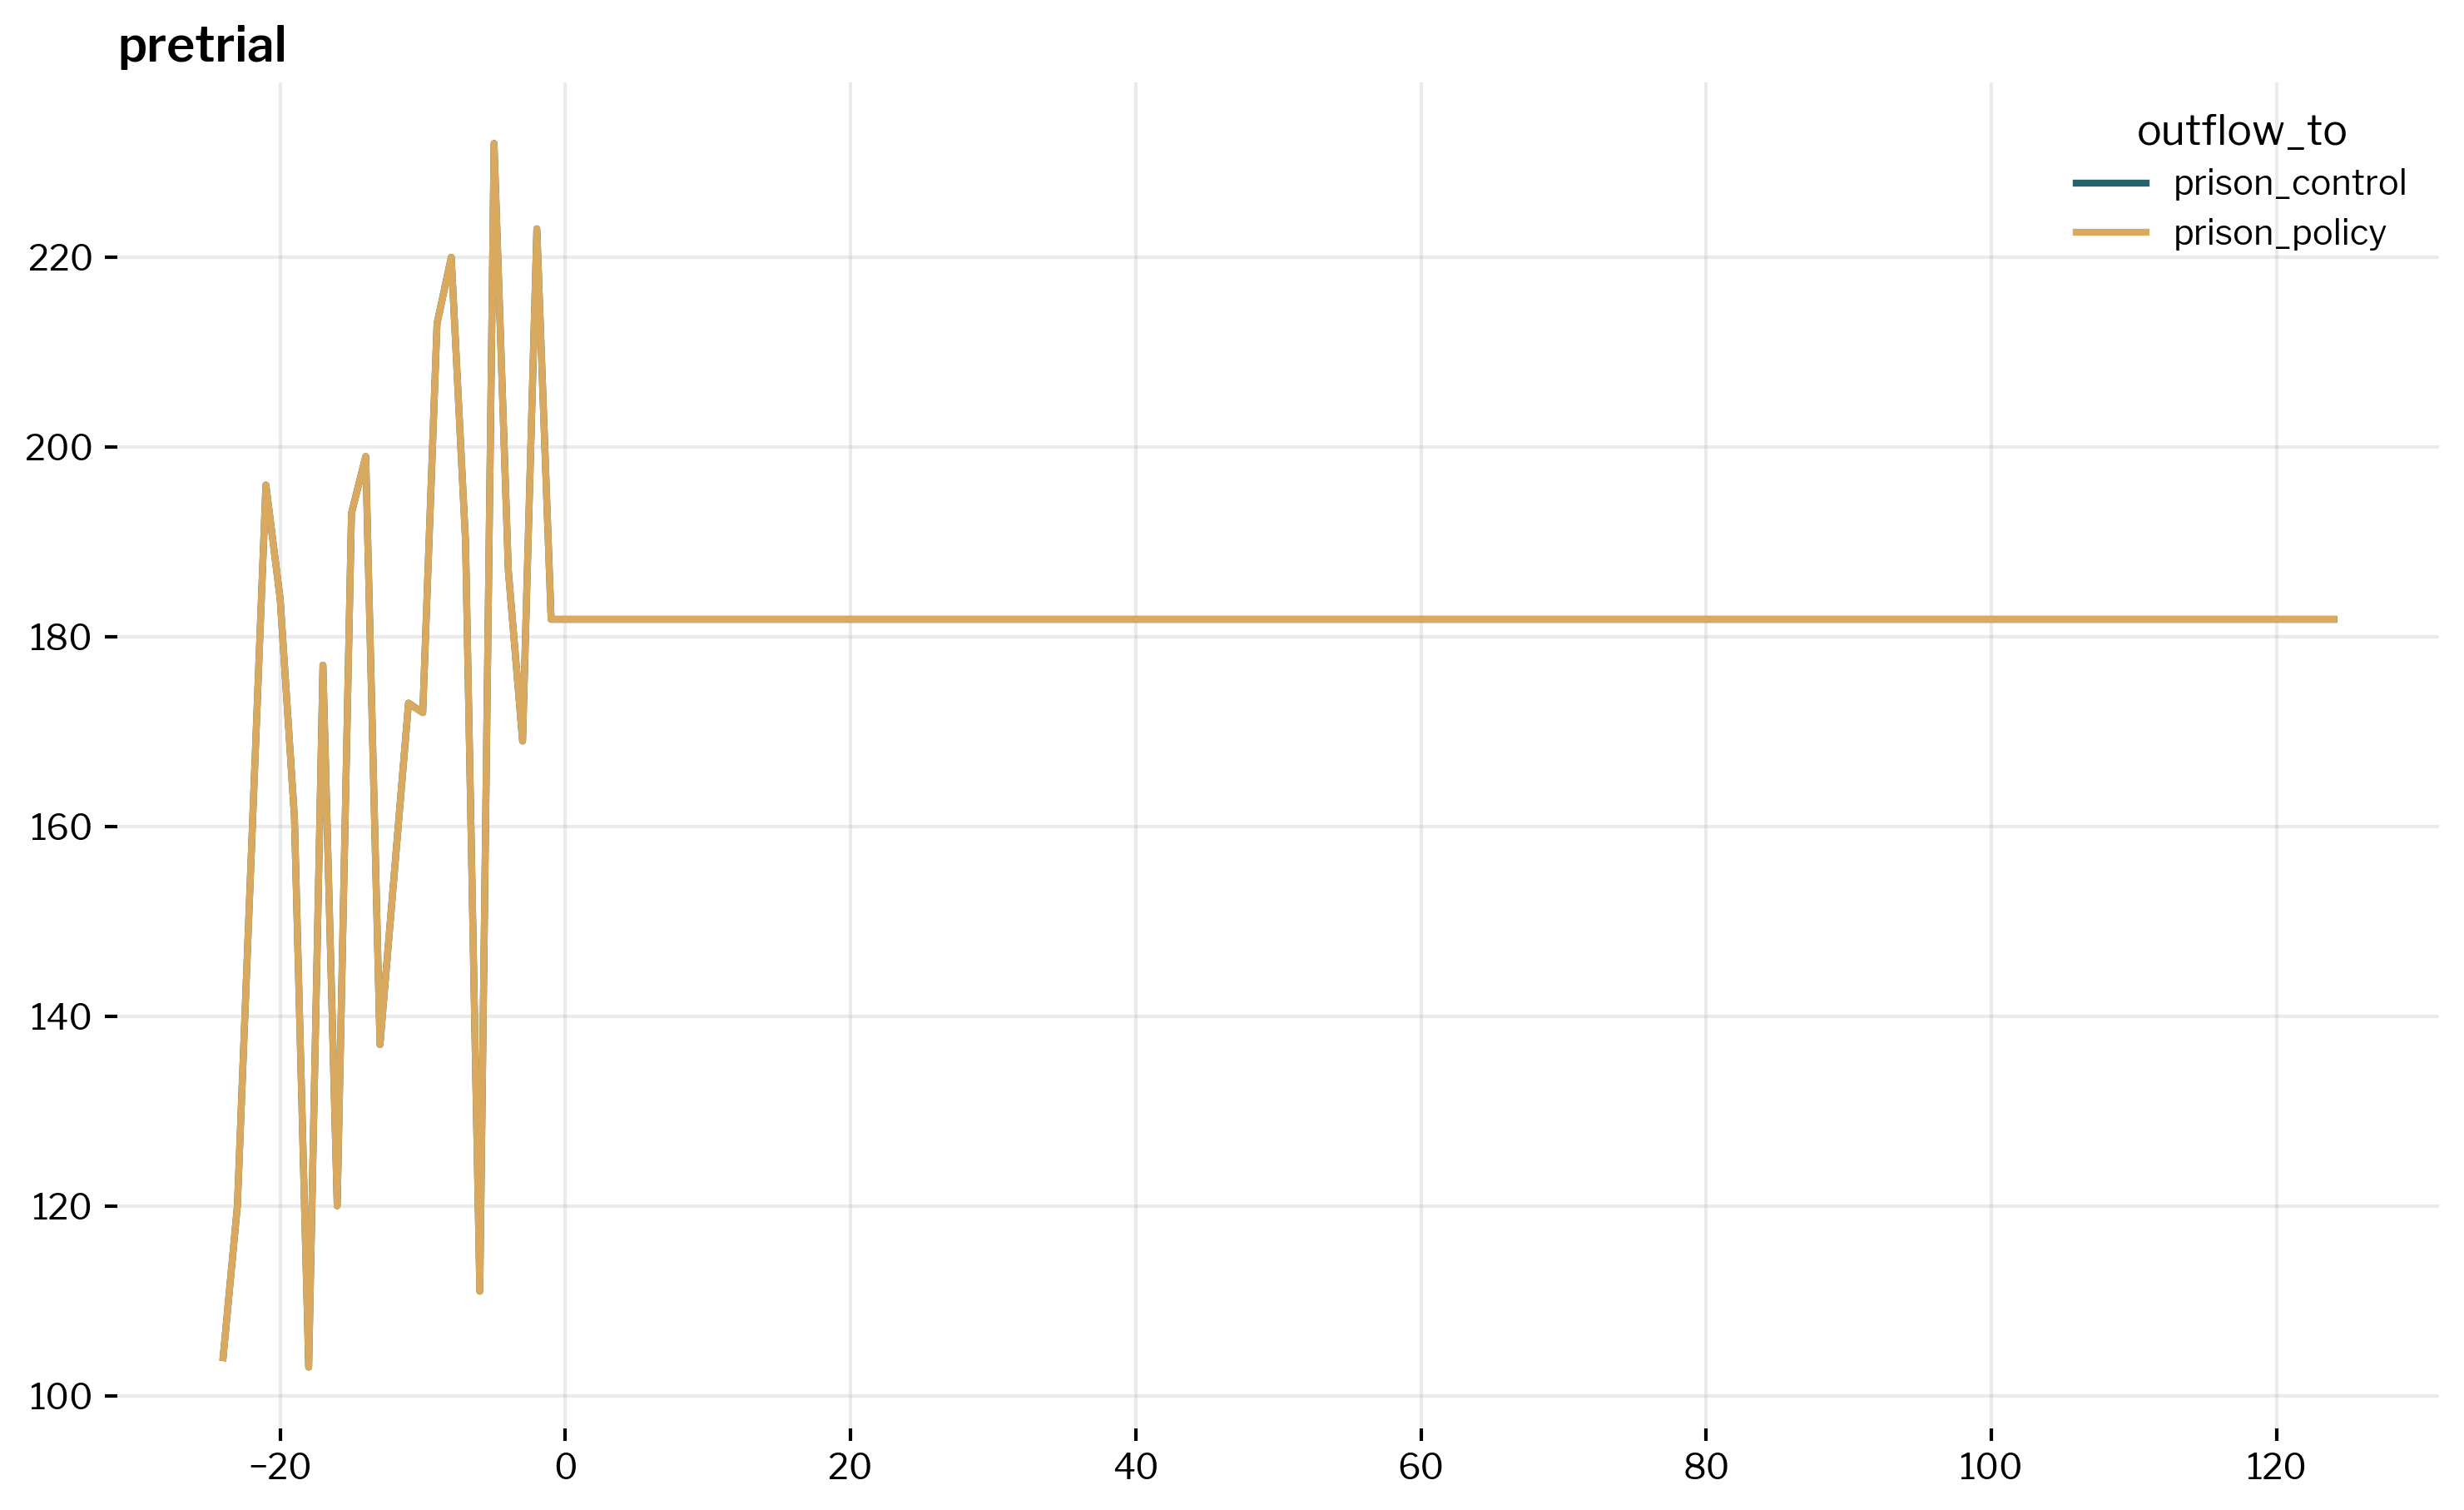

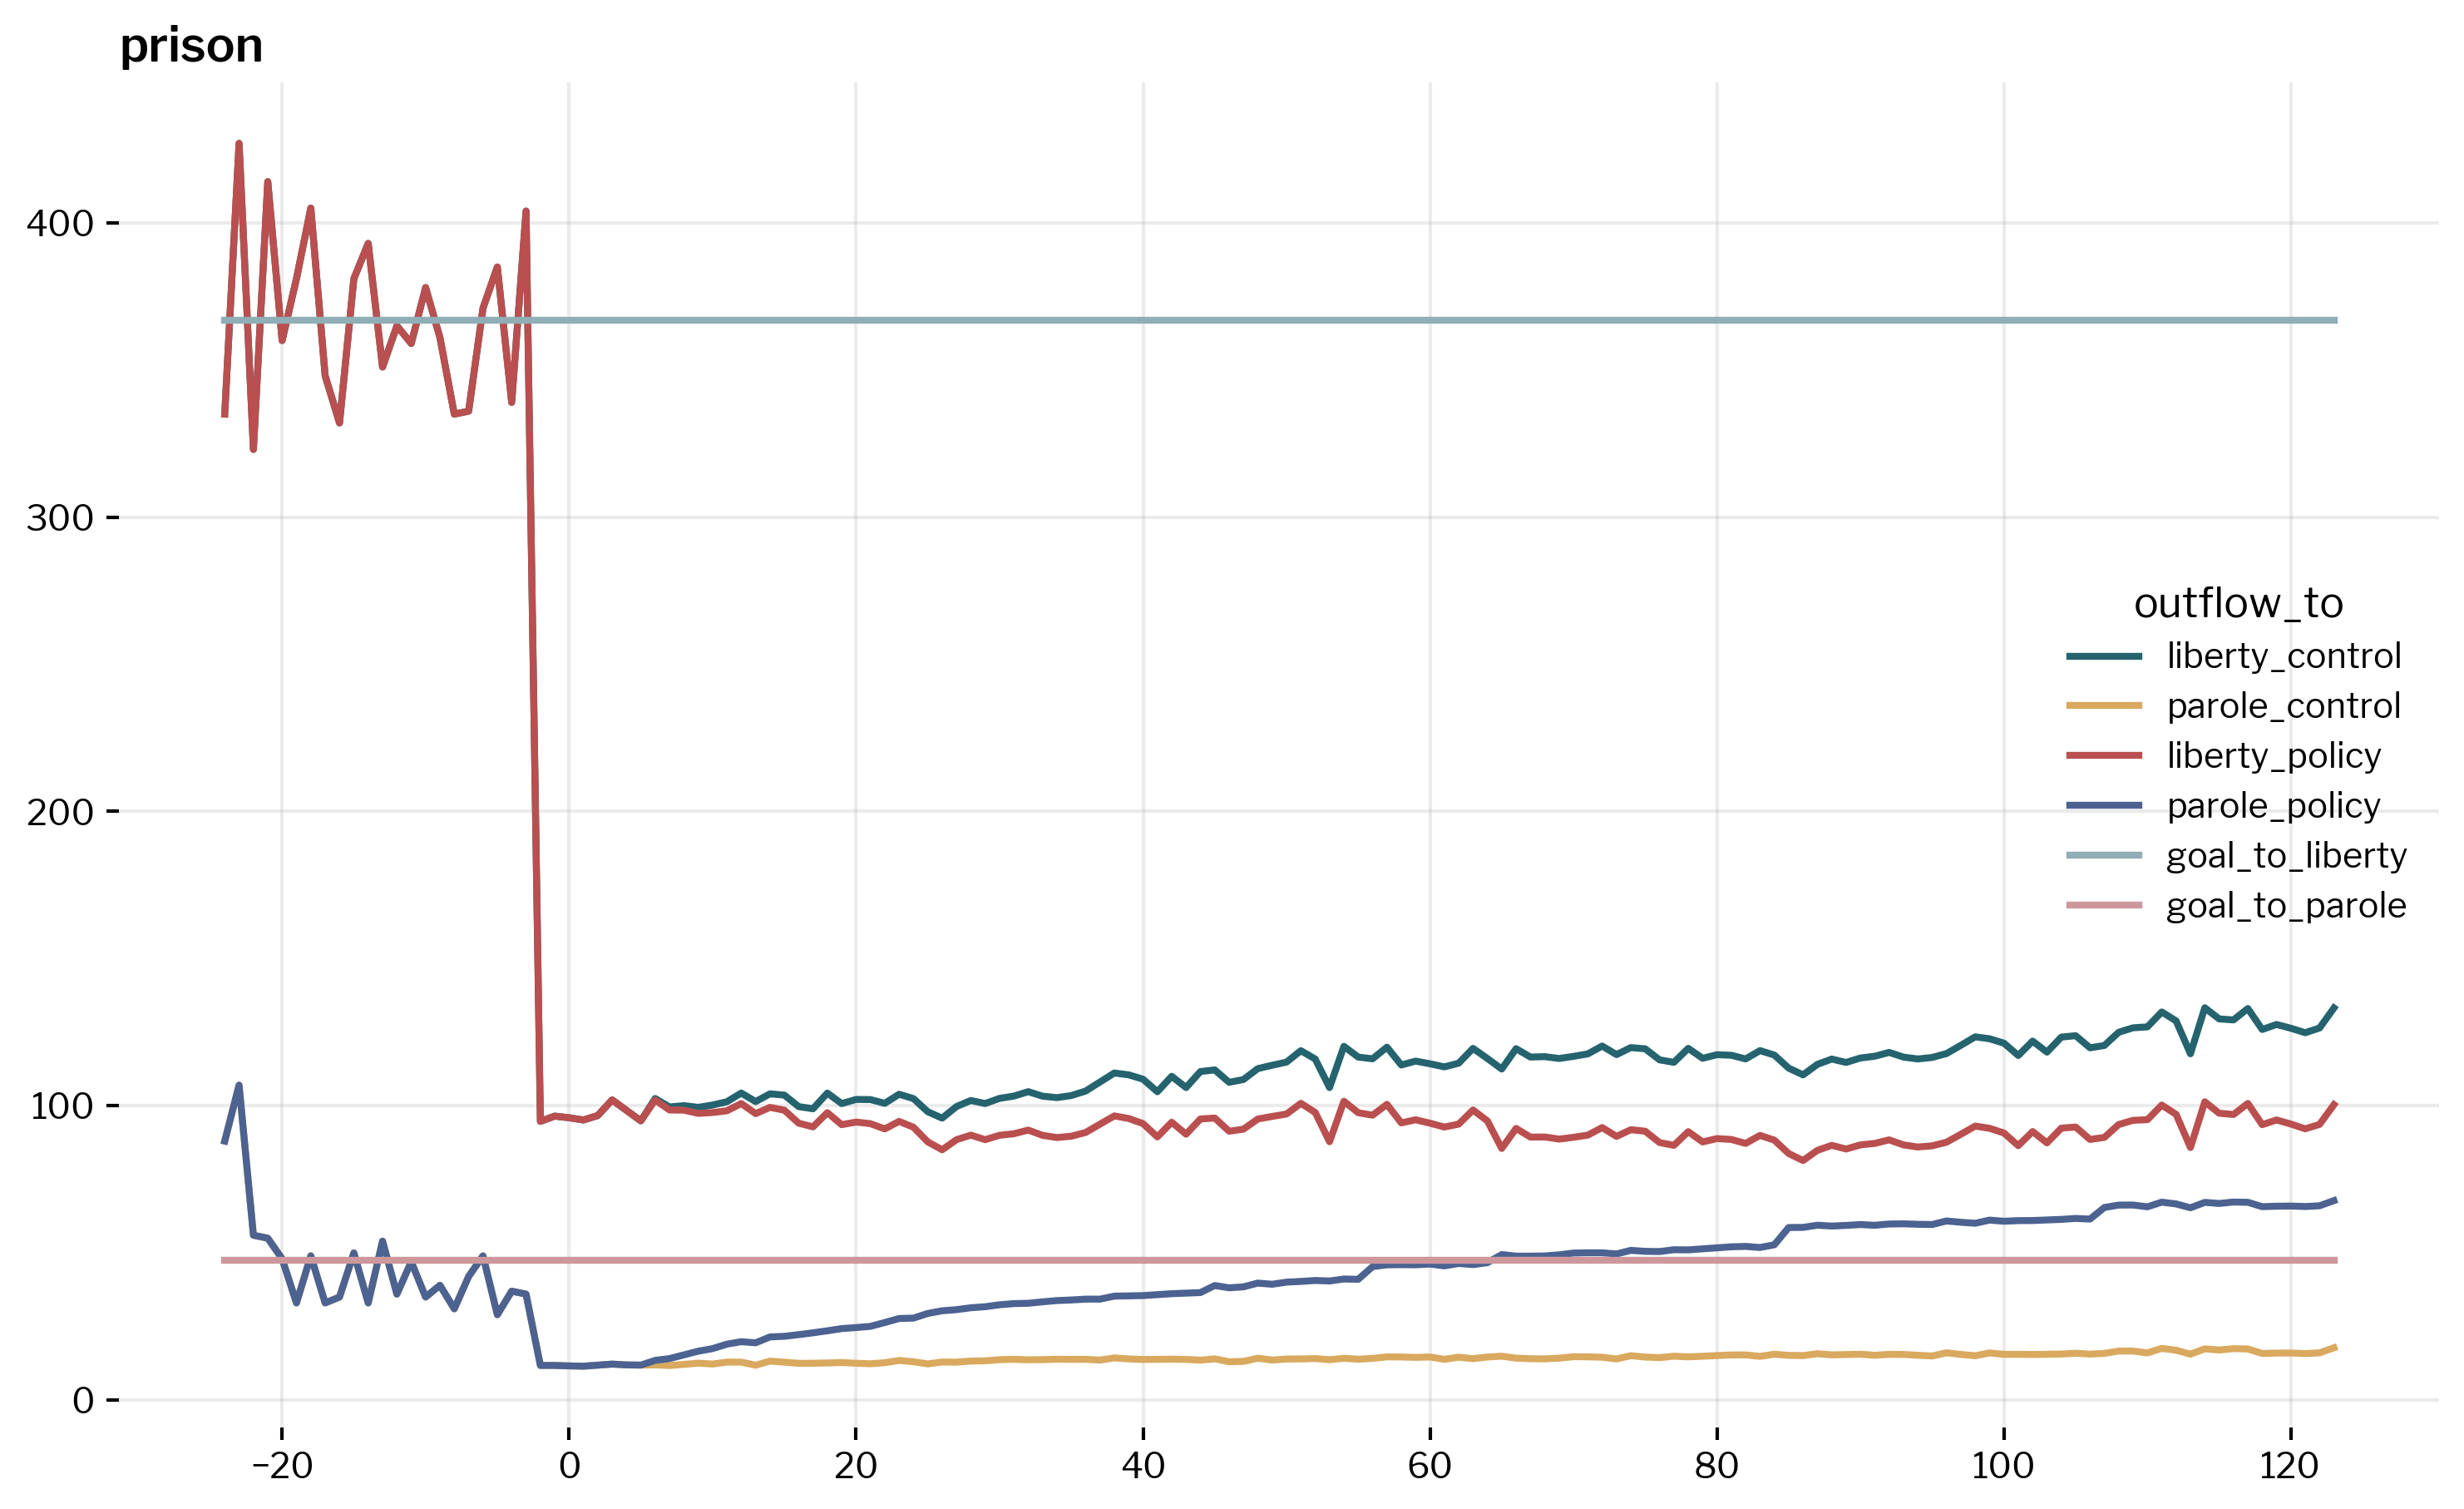

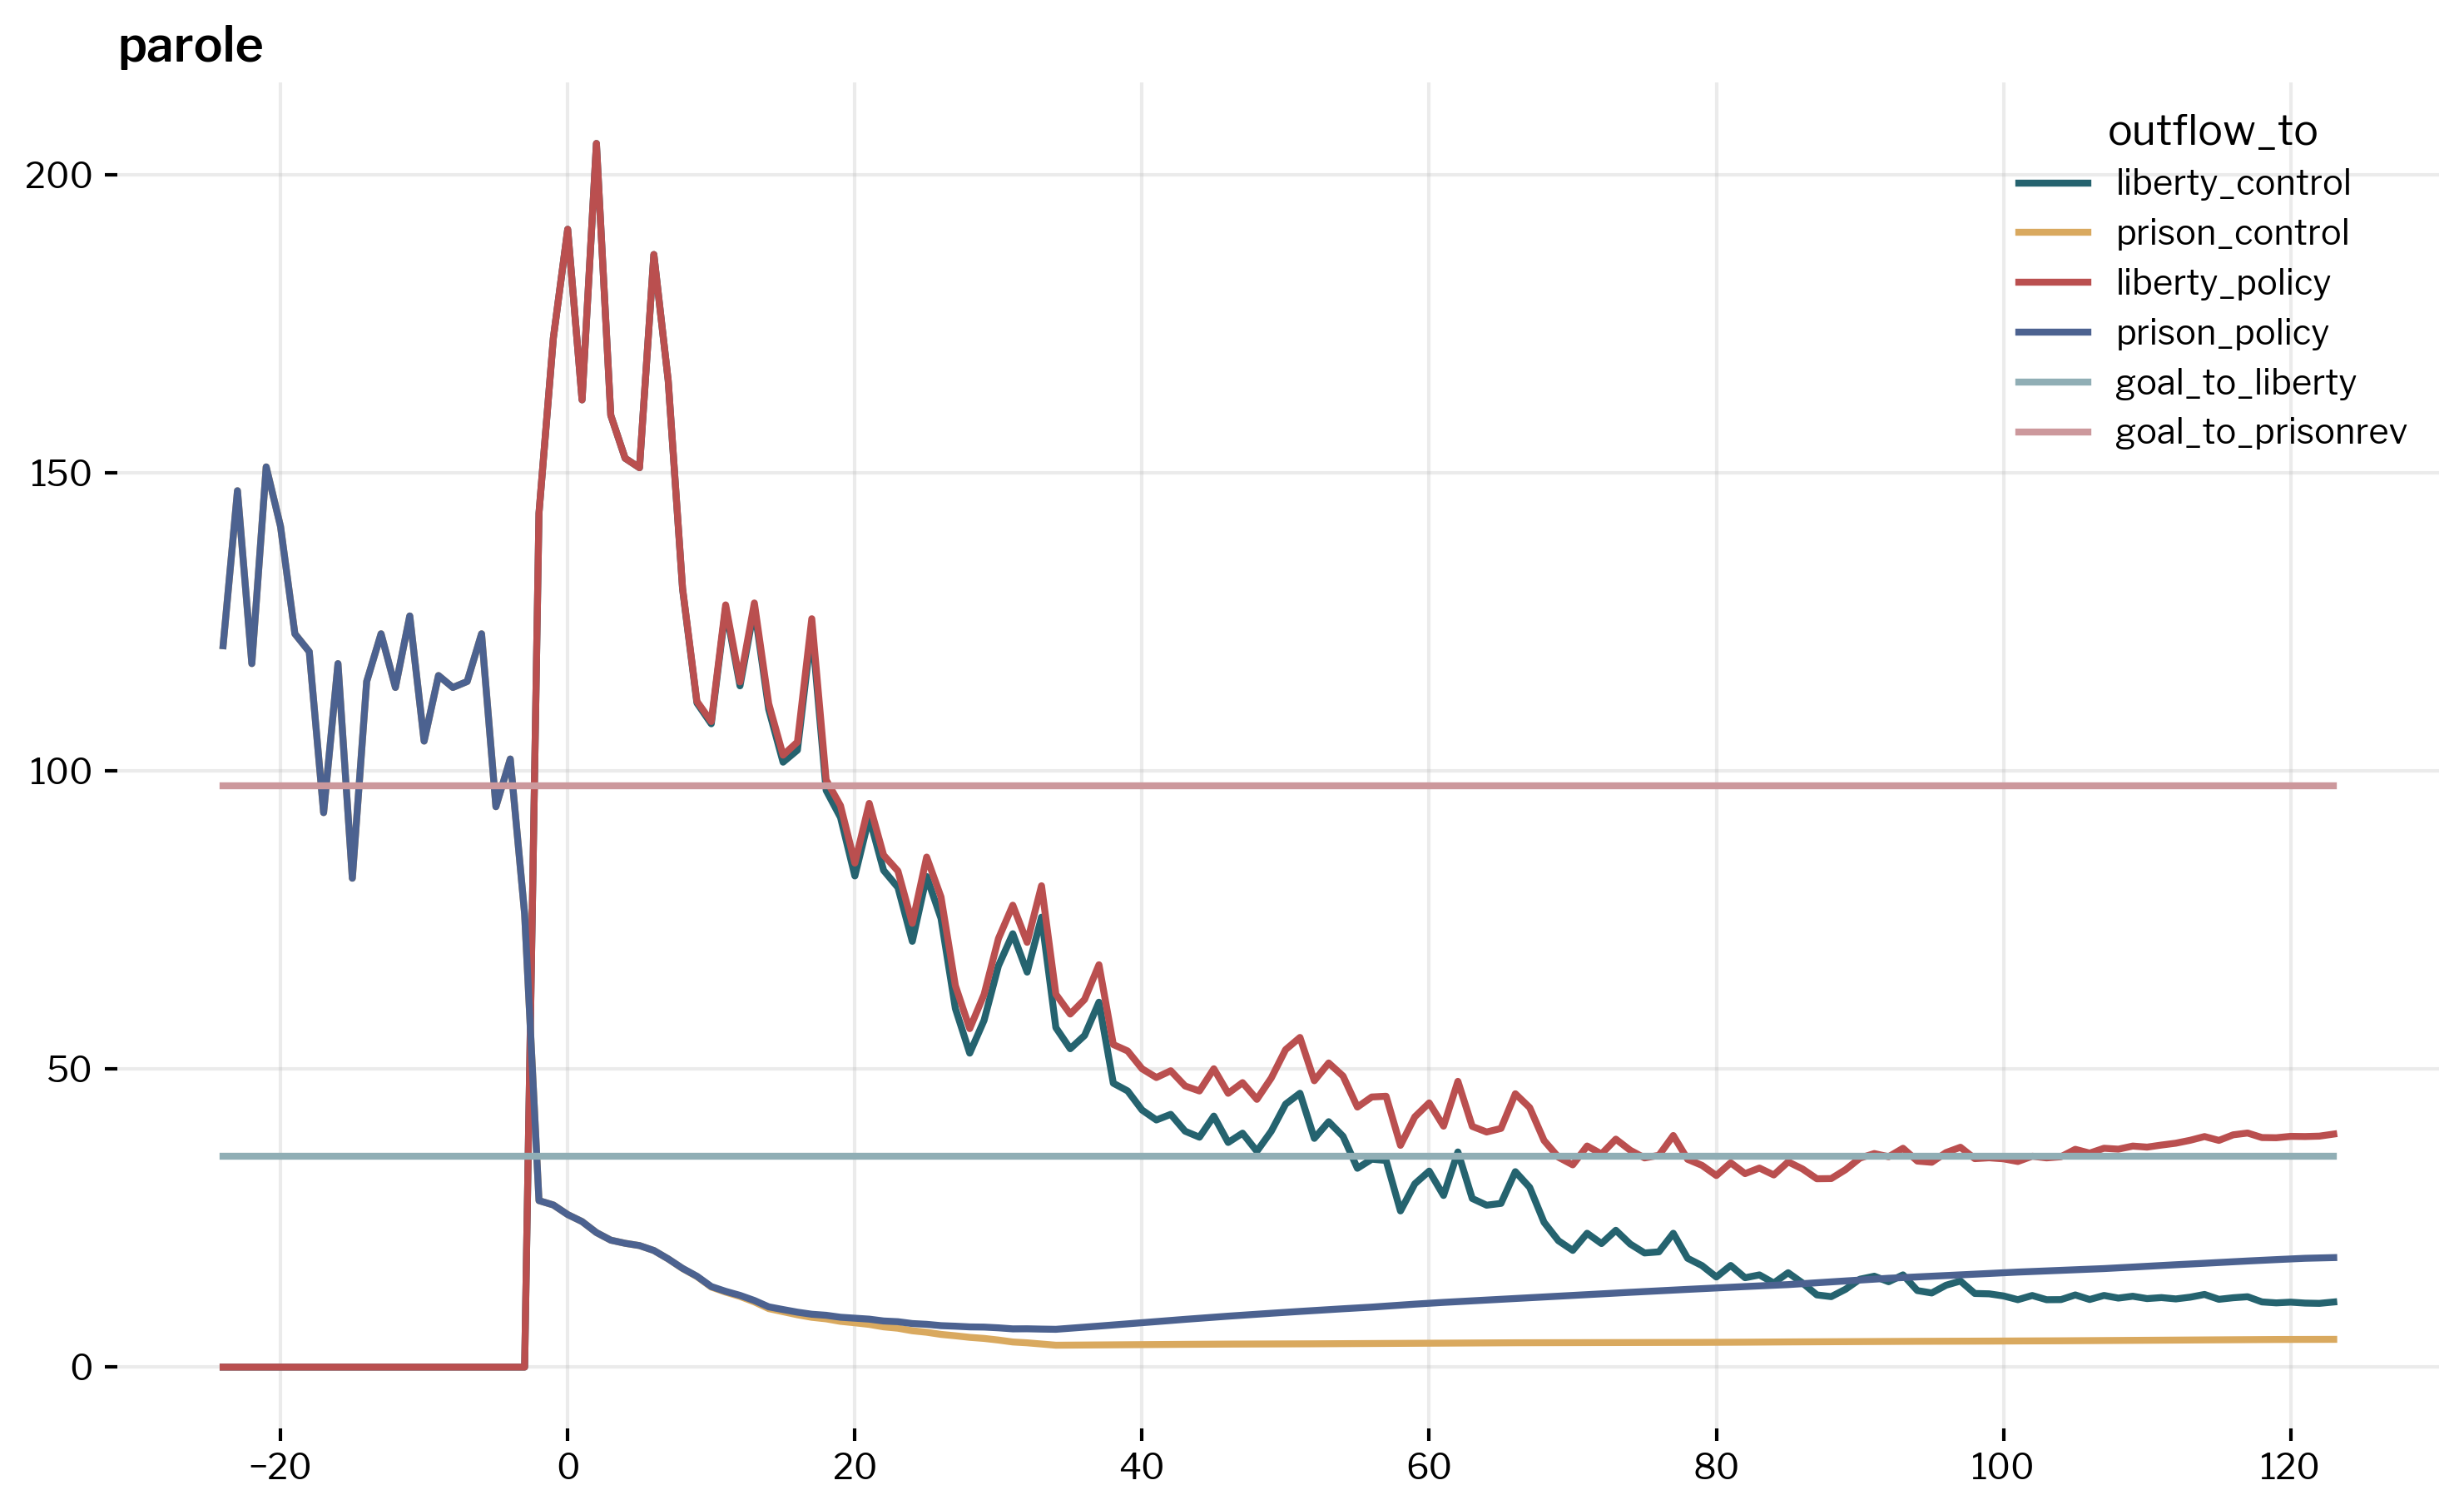

In [76]:
for c in ["pretrial", "prison", "parole"]:
    display(f"{c}")
    ctrl_policy_list = []
    for s, subsim in subsimd.items():
        summed = (
            subsim["violent"].simulation_compartments[c].outflows.loc[:, -24:]
            + subsim["nonviolent"].simulation_compartments[c].outflows.loc[:, -24:]
        ).T.add_suffix(f"_{s}")
        display(summed.head())
        if c == "parole":
            summed[f"prison_{s}"] = summed[f"prisonrev_{s}"].combine_first(
                summed[f"prison_{s}"]
            )
            summed = summed.drop(columns=[f"prisonrev_{s}"])
        ctrl_policy_list.append(summed)
    prison_new_adm_df = pd.concat(ctrl_policy_list, axis=1).fillna(0)
    prison_new_adm_df = prison_new_adm_df.loc[:, (prison_new_adm_df != 0).any(axis=0)]

    display(prison_new_adm_df.T)
    if c in desired_outflows.keys():
        for outflow, goal_outflow in desired_outflows[c].items():
            prison_new_adm_df[f"goal_to_{outflow}"] = goal_outflow
    prison_new_adm_df.plot()
    plt.title(f"{c}")

## total population

In [77]:
policy_results[policy_results.compartment == "prisonrev"].head()

compartment  control_total_population simulation_group  \
year                                                                 
2022.916667   prisonrev               1442.109022       nonviolent   
2023.000000   prisonrev               1408.269122       nonviolent   
2023.083333   prisonrev               1375.146560       nonviolent   
2023.166667   prisonrev               1343.495689       nonviolent   
2023.250000   prisonrev               1312.049716       nonviolent   

             policy_total_population  population_difference  \
year                                                          
2022.916667              1442.109022                    0.0   
2023.000000              1408.269122                    0.0   
2023.083333              1375.146560                    0.0   
2023.166667              1343.495689                    0.0   
2023.250000              1312.049716                    0.0   

            compartment_grouped  
year                             
2022.916667              prison  
2023.000000              prison  
2023.083333              prison  
2023.166667              prison  
2023.250000              prison

/var/folders/jn/2ddz89hx6tjf4m3dvz3dch840000gn/T/ipykernel_3588/1324381526.py:11: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for compartment, results in policy_results.groupby(["compartment"]):


crime_type compartment         year  total_population
0   nonviolent      parole  2021.000000            3021.0
1   nonviolent      parole  2021.083333            3008.0
2   nonviolent      parole  2021.166667            3012.0
3   nonviolent      parole  2021.250000            2971.0
4   nonviolent      parole  2021.333333            2947.0
5   nonviolent      parole  2021.416667            2883.0
6   nonviolent      parole  2021.500000            2843.0
7   nonviolent      parole  2021.583333            2786.0
8   nonviolent      parole  2021.666667            2739.0
9   nonviolent      parole  2021.750000            2709.0
10  nonviolent      parole  2021.833333            2681.0
11  nonviolent      parole  2021.916667            2645.0
12  nonviolent      parole  2022.000000            2622.0
13  nonviolent      parole  2022.166667            2540.0
14  nonviolent      parole  2022.250000            2502.0
15  nonviolent      parole  2022.333333            2465.0
16  nonviolent      parole  2022.416667            2408.0
17  nonviolent      parole  2022.500000            2379.0
18  nonviolent      parole  2022.583333            2358.0
19  nonviolent      parole  2022.666667            2331.0
20  nonviolent      parole  2022.750000            2274.0
21  nonviolent      parole  2022.833333            2260.0
22  nonviolent      parole  2022.916667            2266.0
23     violent      parole  2021.000000            4341.0
24     violent      parole  2021.083333            4301.0
25     violent      parole  2021.166667            4272.0
26     violent      parole  2021.250000            4185.0
27     violent      parole  2021.333333            4148.0
28     violent      parole  2021.416667            4107.0
29     violent      parole  2021.500000            4050.0
30     violent      parole  2021.583333            3989.0
31     violent      parole  2021.666667            3927.0
32     violent      parole  2021.750000            3882.0
33     violent      parole  2021.833333            3857.0
34     violent      parole  2021.916667            3804.0
35     violent      parole  2022.000000            3757.0
36     violent      parole  2022.166667            3621.0
37     violent      parole  2022.250000            3572.0
38     violent      parole  2022.333333            3524.0
39     violent      parole  2022.416667            3485.0
40     violent      parole  2022.500000            3463.0
41     violent      parole  2022.583333            3416.0
42     violent      parole  2022.666667            3372.0
43     violent      parole  2022.750000            3324.0
44     violent      parole  2022.833333            3298.0
45     violent      parole  2022.916667            3269.0

crime_type compartment         year  total_population
0    nonviolent      prison  2017.000000       5113.783247
1    nonviolent      prison  2017.083333       5096.784399
2    nonviolent      prison  2017.166667       5038.723399
3    nonviolent      prison  2017.250000       4994.570548
4    nonviolent      prison  2017.333333       4925.912864
5    nonviolent      prison  2017.416667       4901.187267
6    nonviolent      prison  2017.500000       4827.672770
7    nonviolent      prison  2017.583333       4772.040177
8    nonviolent      prison  2017.666667       4760.339671
9    nonviolent      prison  2017.750000       4748.418401
10   nonviolent      prison  2017.833333       4748.859930
11   nonviolent      prison  2017.916667       4751.729865
12   nonviolent      prison  2018.000000       4714.862234
13   nonviolent      prison  2018.083333       4664.086455
14   nonviolent      prison  2018.166667       4648.412193
15   nonviolent      prison  2018.250000       4598.077943
16   nonviolent      prison  2018.333333       4583.507502
17   nonviolent      prison  2018.416667       4571.365467
18   nonviolent      prison  2018.500000       4563.197190
19   nonviolent      prison  2018.583333       4551.055156
20   nonviolent      prison  2018.666667       4544.432228
21   nonviolent      prison  2018.750000       4567.833239
22   nonviolent      prison  2018.833333       4588.805844
23   nonviolent      prison  2018.916667       4604.038577
24   nonviolent      prison  2019.000000       4598.519471
25   nonviolent      prison  2019.083333       4629.867996
26   nonviolent      prison  2019.166667       4638.919330
27   nonviolent      prison  2019.250000       4662.320341
28   nonviolent      prison  2019.333333       4692.785809
29   nonviolent      prison  2019.416667       4712.433828
30   nonviolent      prison  2019.500000       4727.887326
31   nonviolent      prison  2019.583333       4772.260941
32   nonviolent      prison  2019.666667       4786.169089
33   nonviolent      prison  2019.750000       4806.479401
34   nonviolent      prison  2019.833333       4803.167937
35   nonviolent      prison  2019.916667       4805.154815
36   nonviolent      prison  2020.000000       4834.737226
37   nonviolent      prison  2020.083333       4857.696709
38   nonviolent      prison  2020.166667       4787.272911
39   nonviolent      prison  2020.250000       4679.319189
40   nonviolent      prison  2020.333333       4600.947878
41   nonviolent      prison  2020.416667       4472.904609
42   nonviolent      prison  2020.500000       4372.015343
43   nonviolent      prison  2020.583333       4266.931557
44   nonviolent      prison  2020.666667       4197.611581
45   nonviolent      prison  2020.750000       4100.254543
46   nonviolent      prison  2020.833333       4036.674437
47   nonviolent      prison  2020.916667       3994.729228
48   nonviolent      prison  2021.000000       3920.993967
49   nonviolent      prison  2021.083333       3875.075001
50   nonviolent      prison  2021.166667       3836.662021
51   nonviolent      prison  2021.250000       3825.403043
52   nonviolent      prison  2021.333333       3823.636929
53   nonviolent      prison  2021.416667       3918.565560
54   nonviolent      prison  2021.500000       4040.648194
55   nonviolent      prison  2021.583333       4039.765137
56   nonviolent      prison  2021.666667       4035.349852
57   nonviolent      prison  2021.750000       4056.984749
58   nonviolent      prison  2021.833333       4044.621951
59   nonviolent      prison  2021.916667       4265.606972
60   nonviolent      prison  2022.000000       4371.353051
61   nonviolent      prison  2022.083333       4430.076343
62   nonviolent      prison  2022.166667       4476.878366
63   nonviolent      prison  2022.250000       4508.226890
64   nonviolent      prison  2022.333333       4520.368924
65   nonviolent      prison  2022.416667       4545.315285
66   nonviolent      prison  2022.500000       4548.

<Figure size 3600x2100 with 0 Axes>

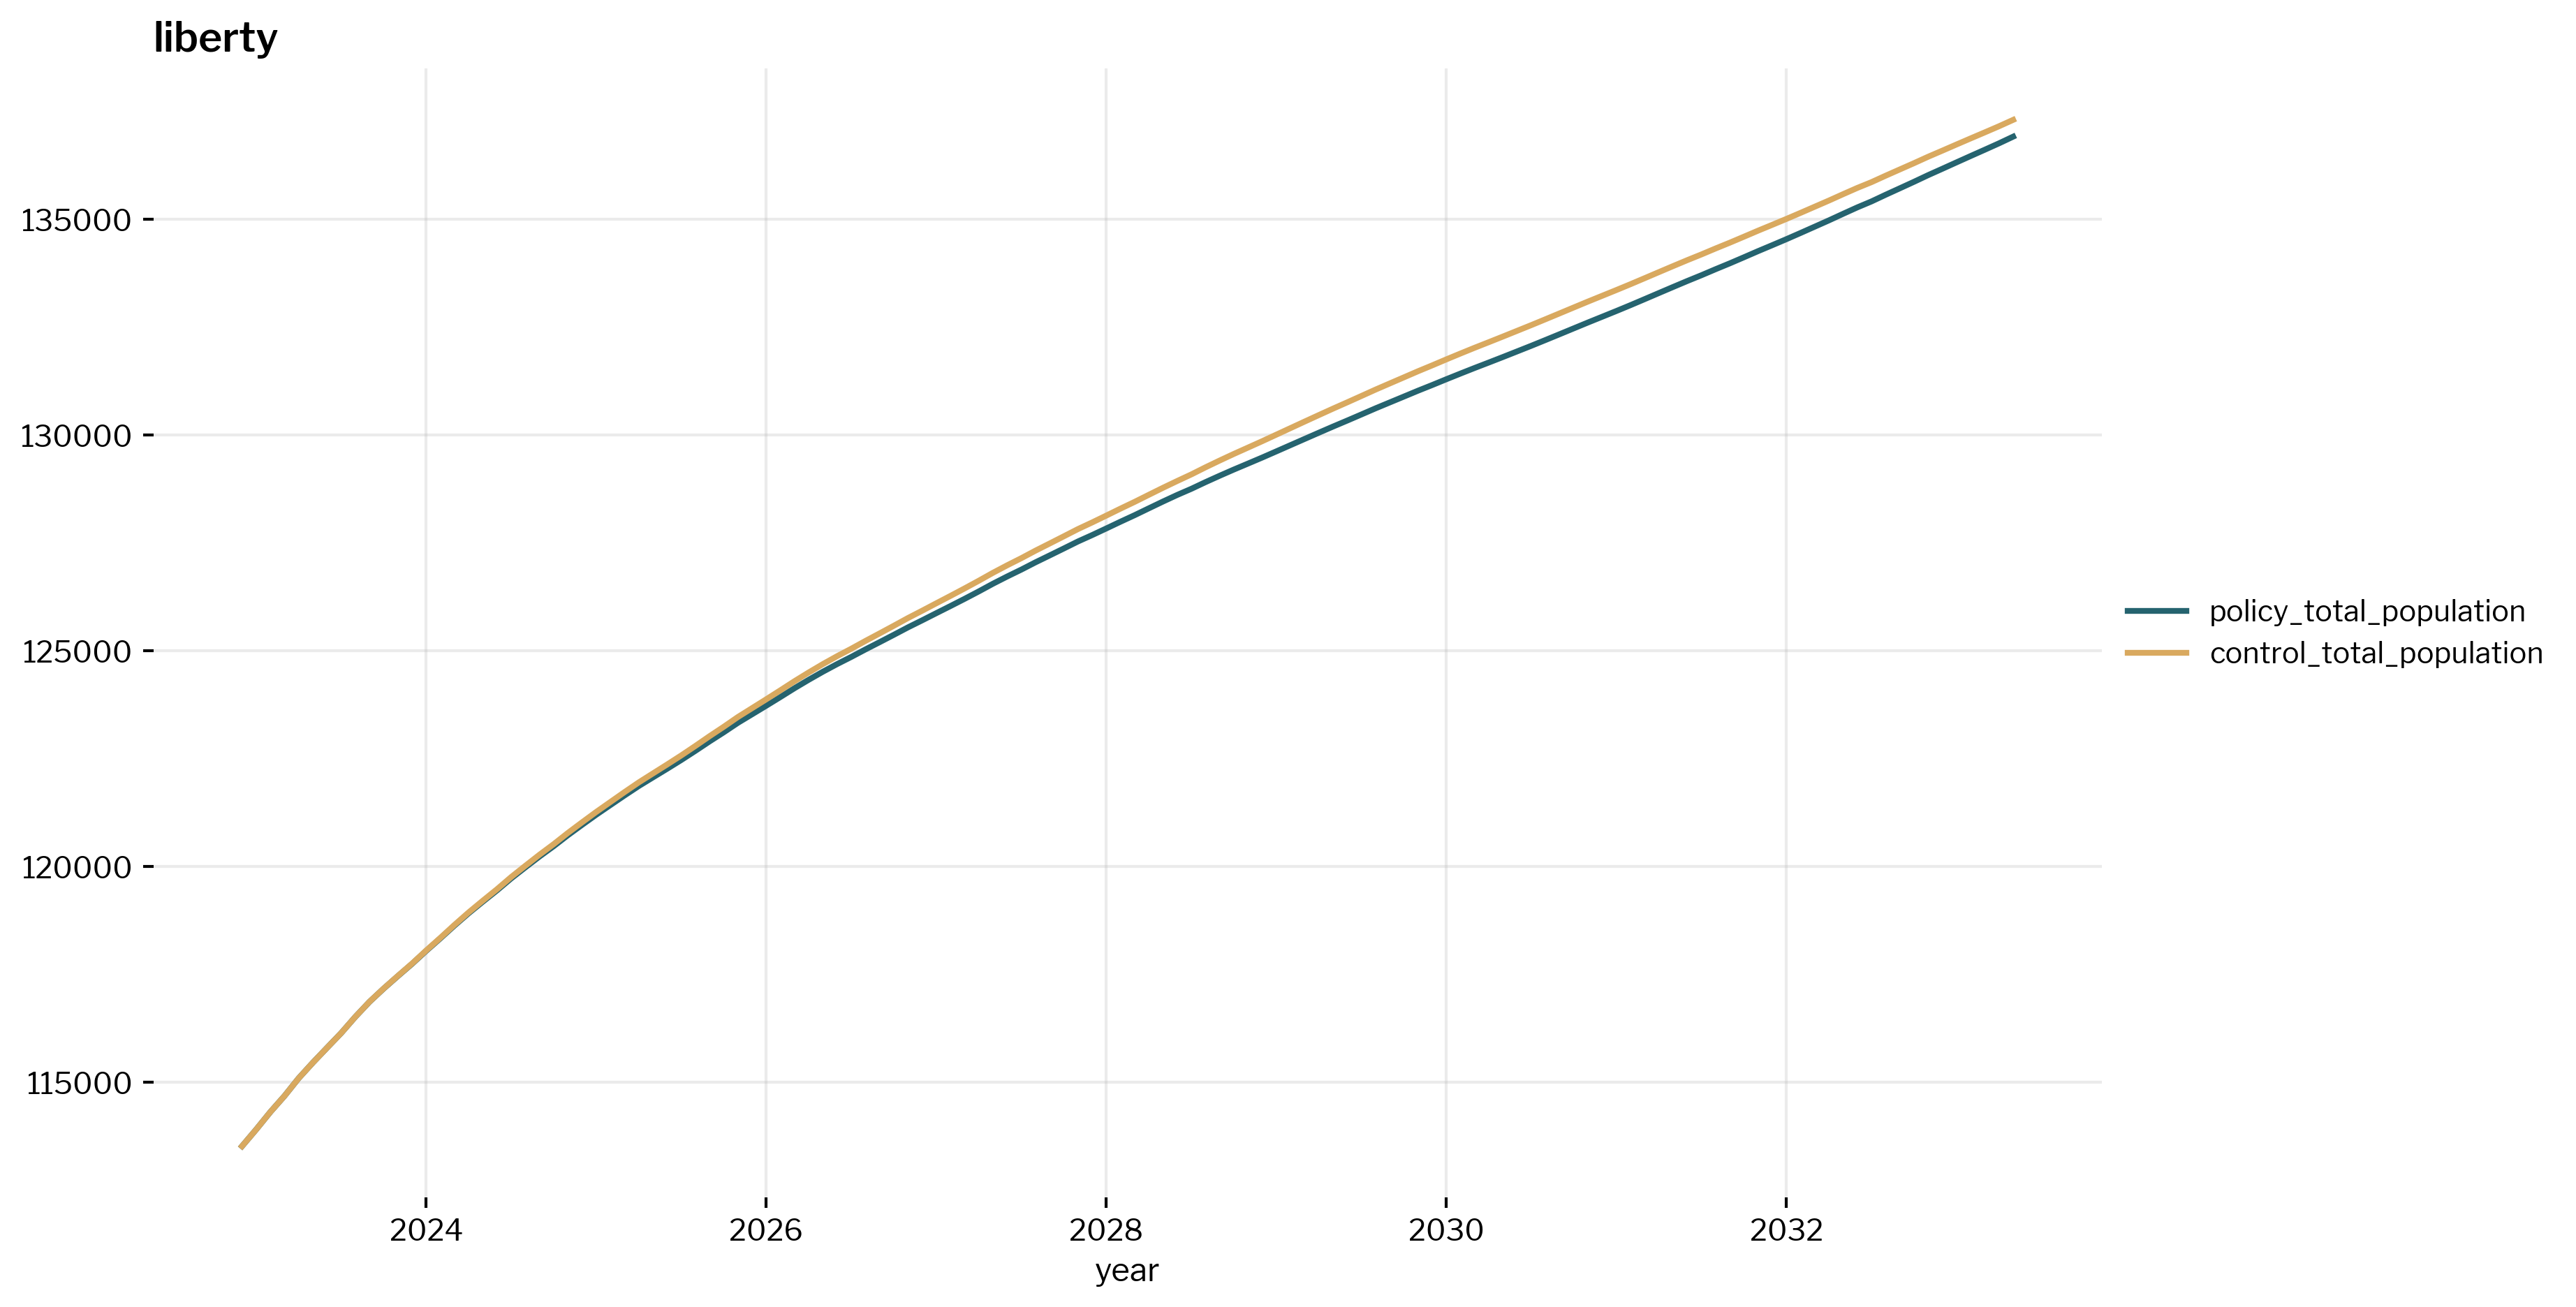

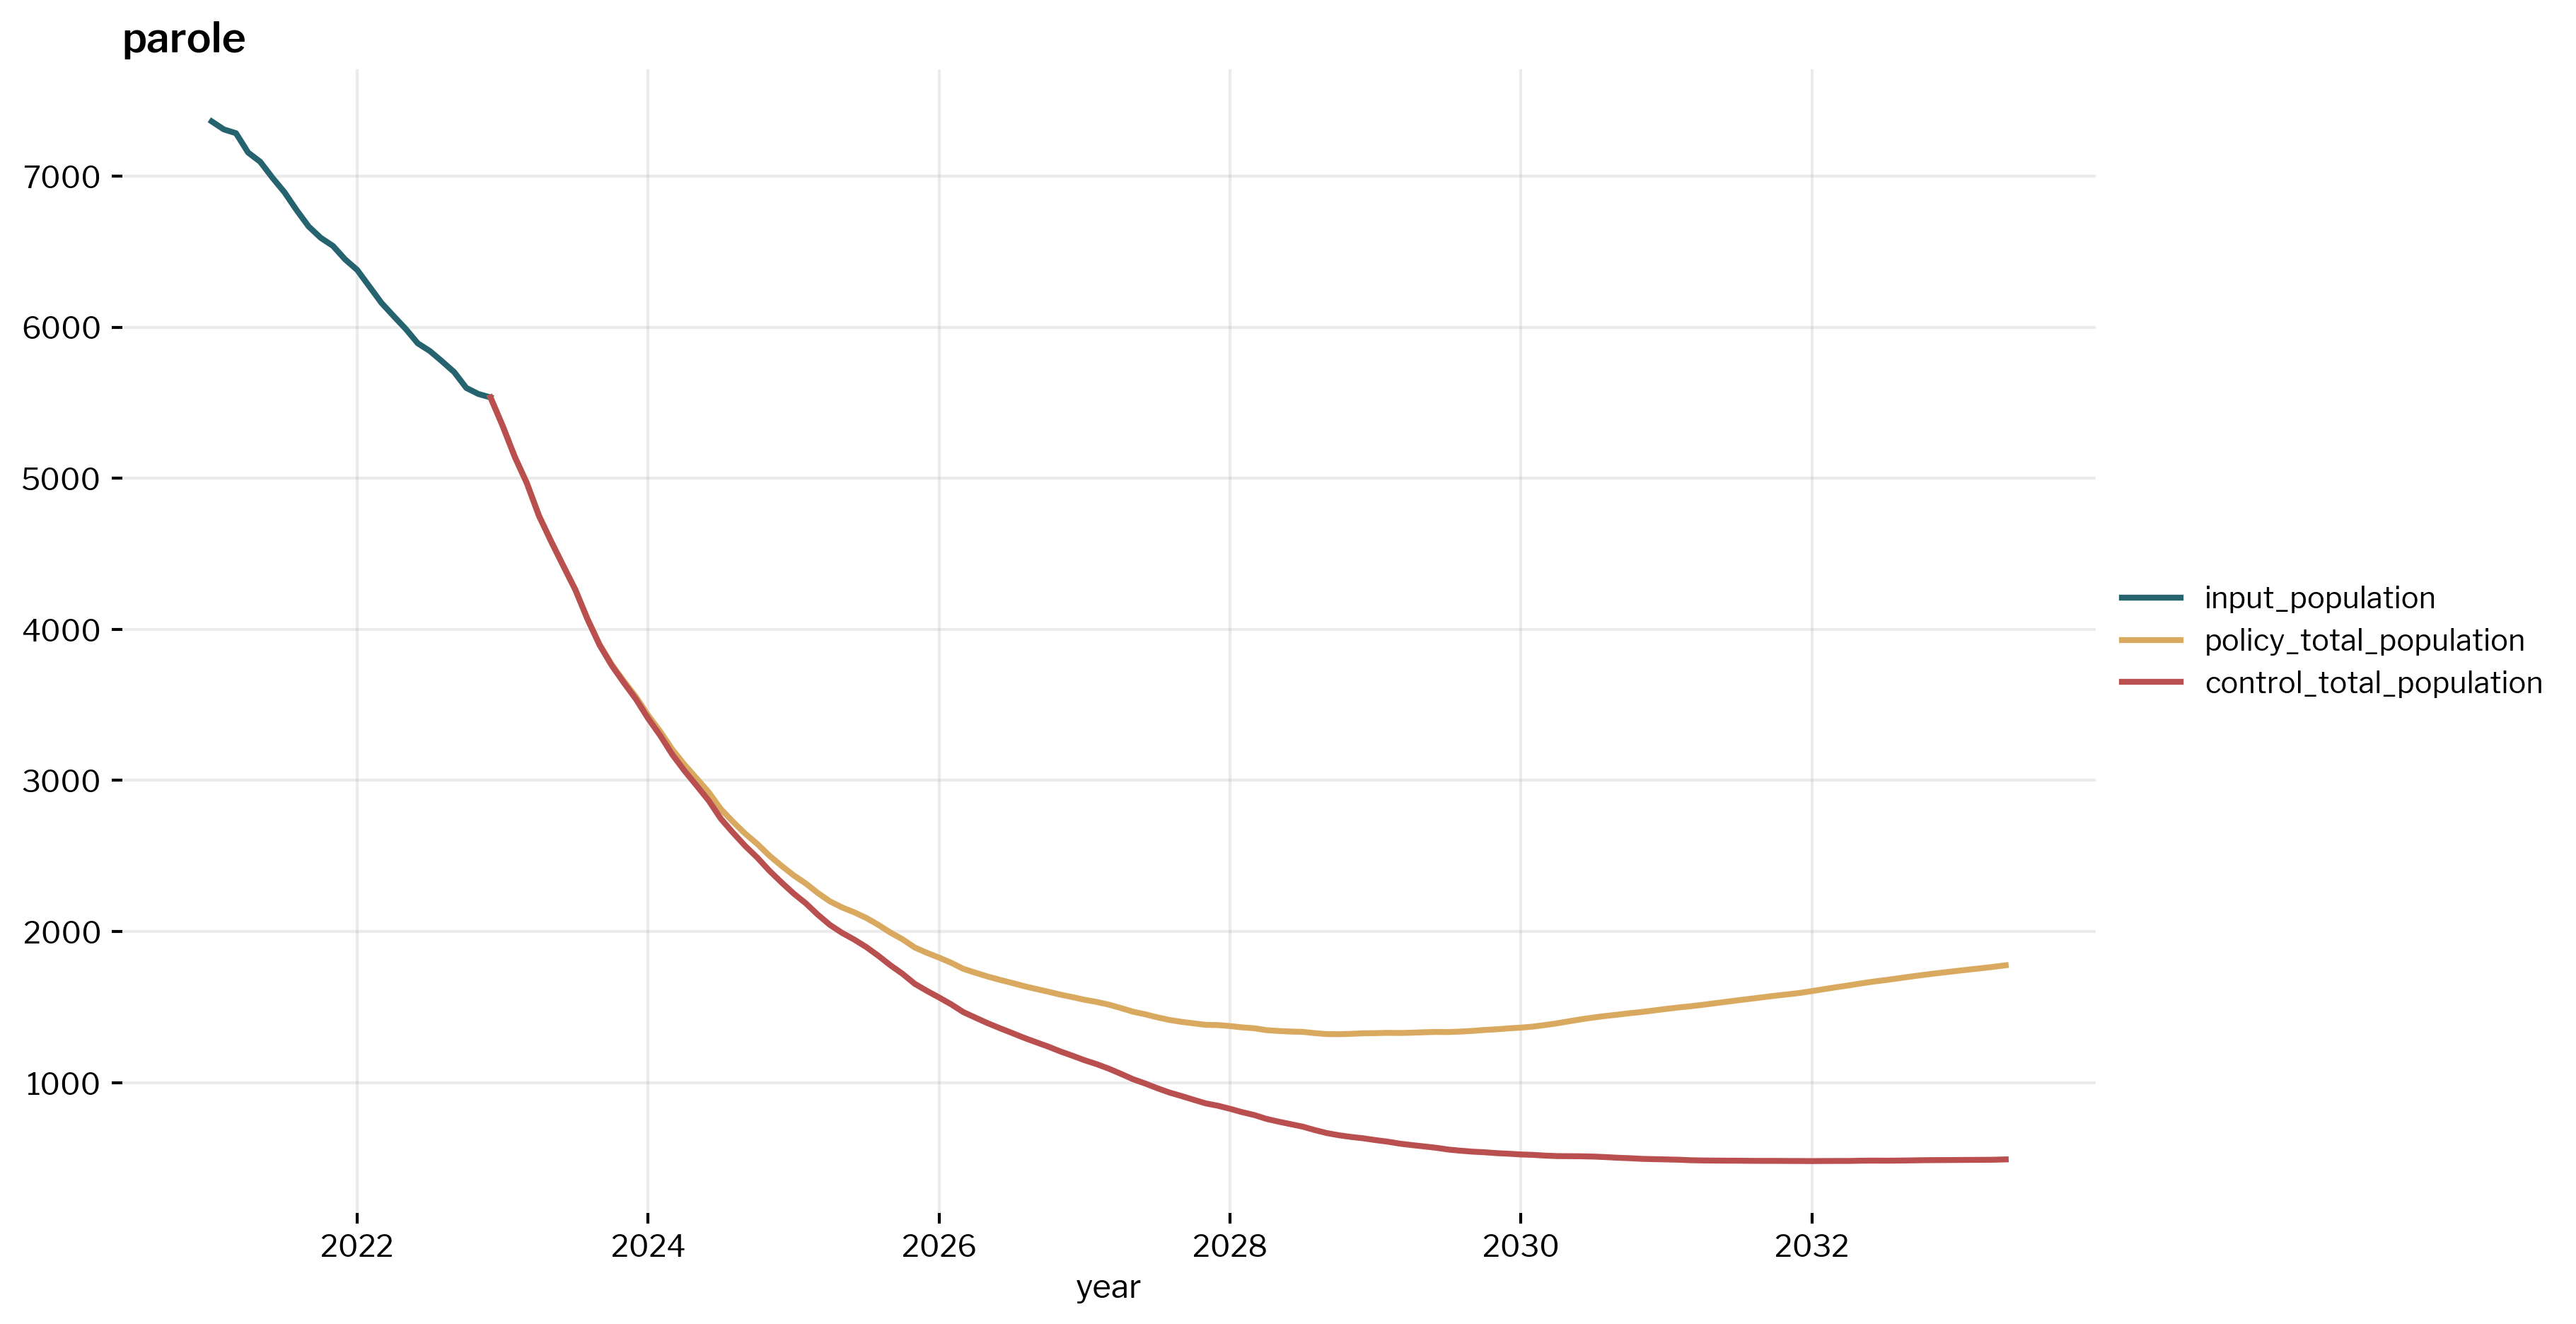

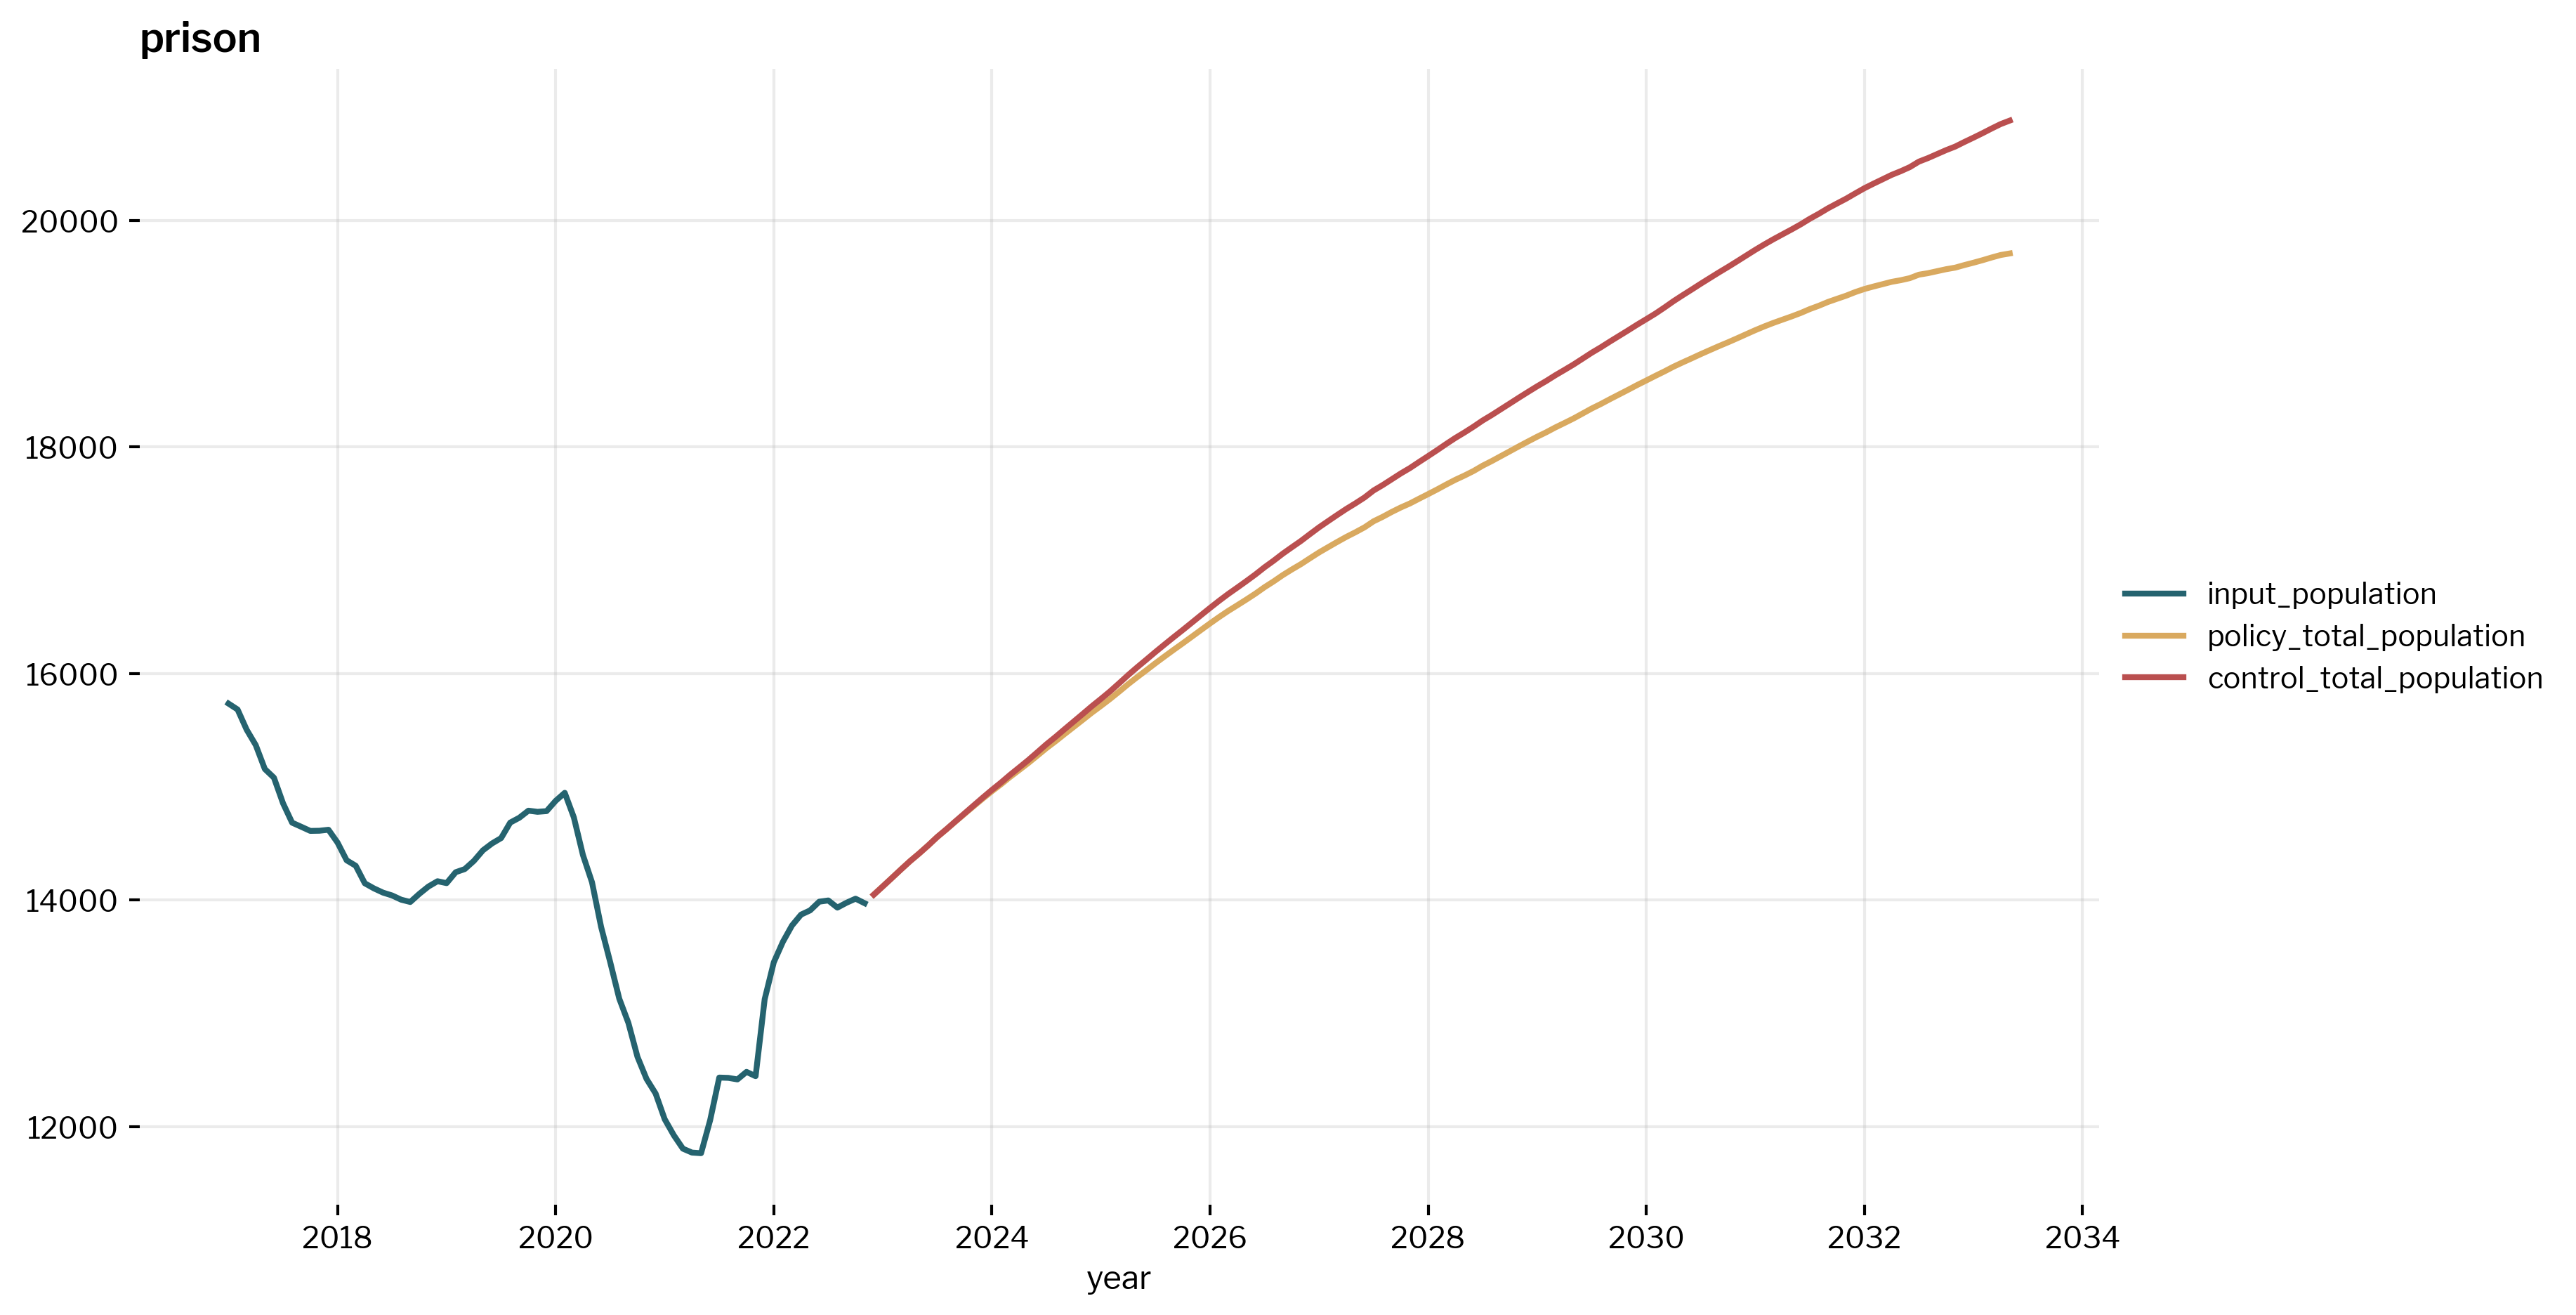

<Figure size 3600x2100 with 0 Axes>

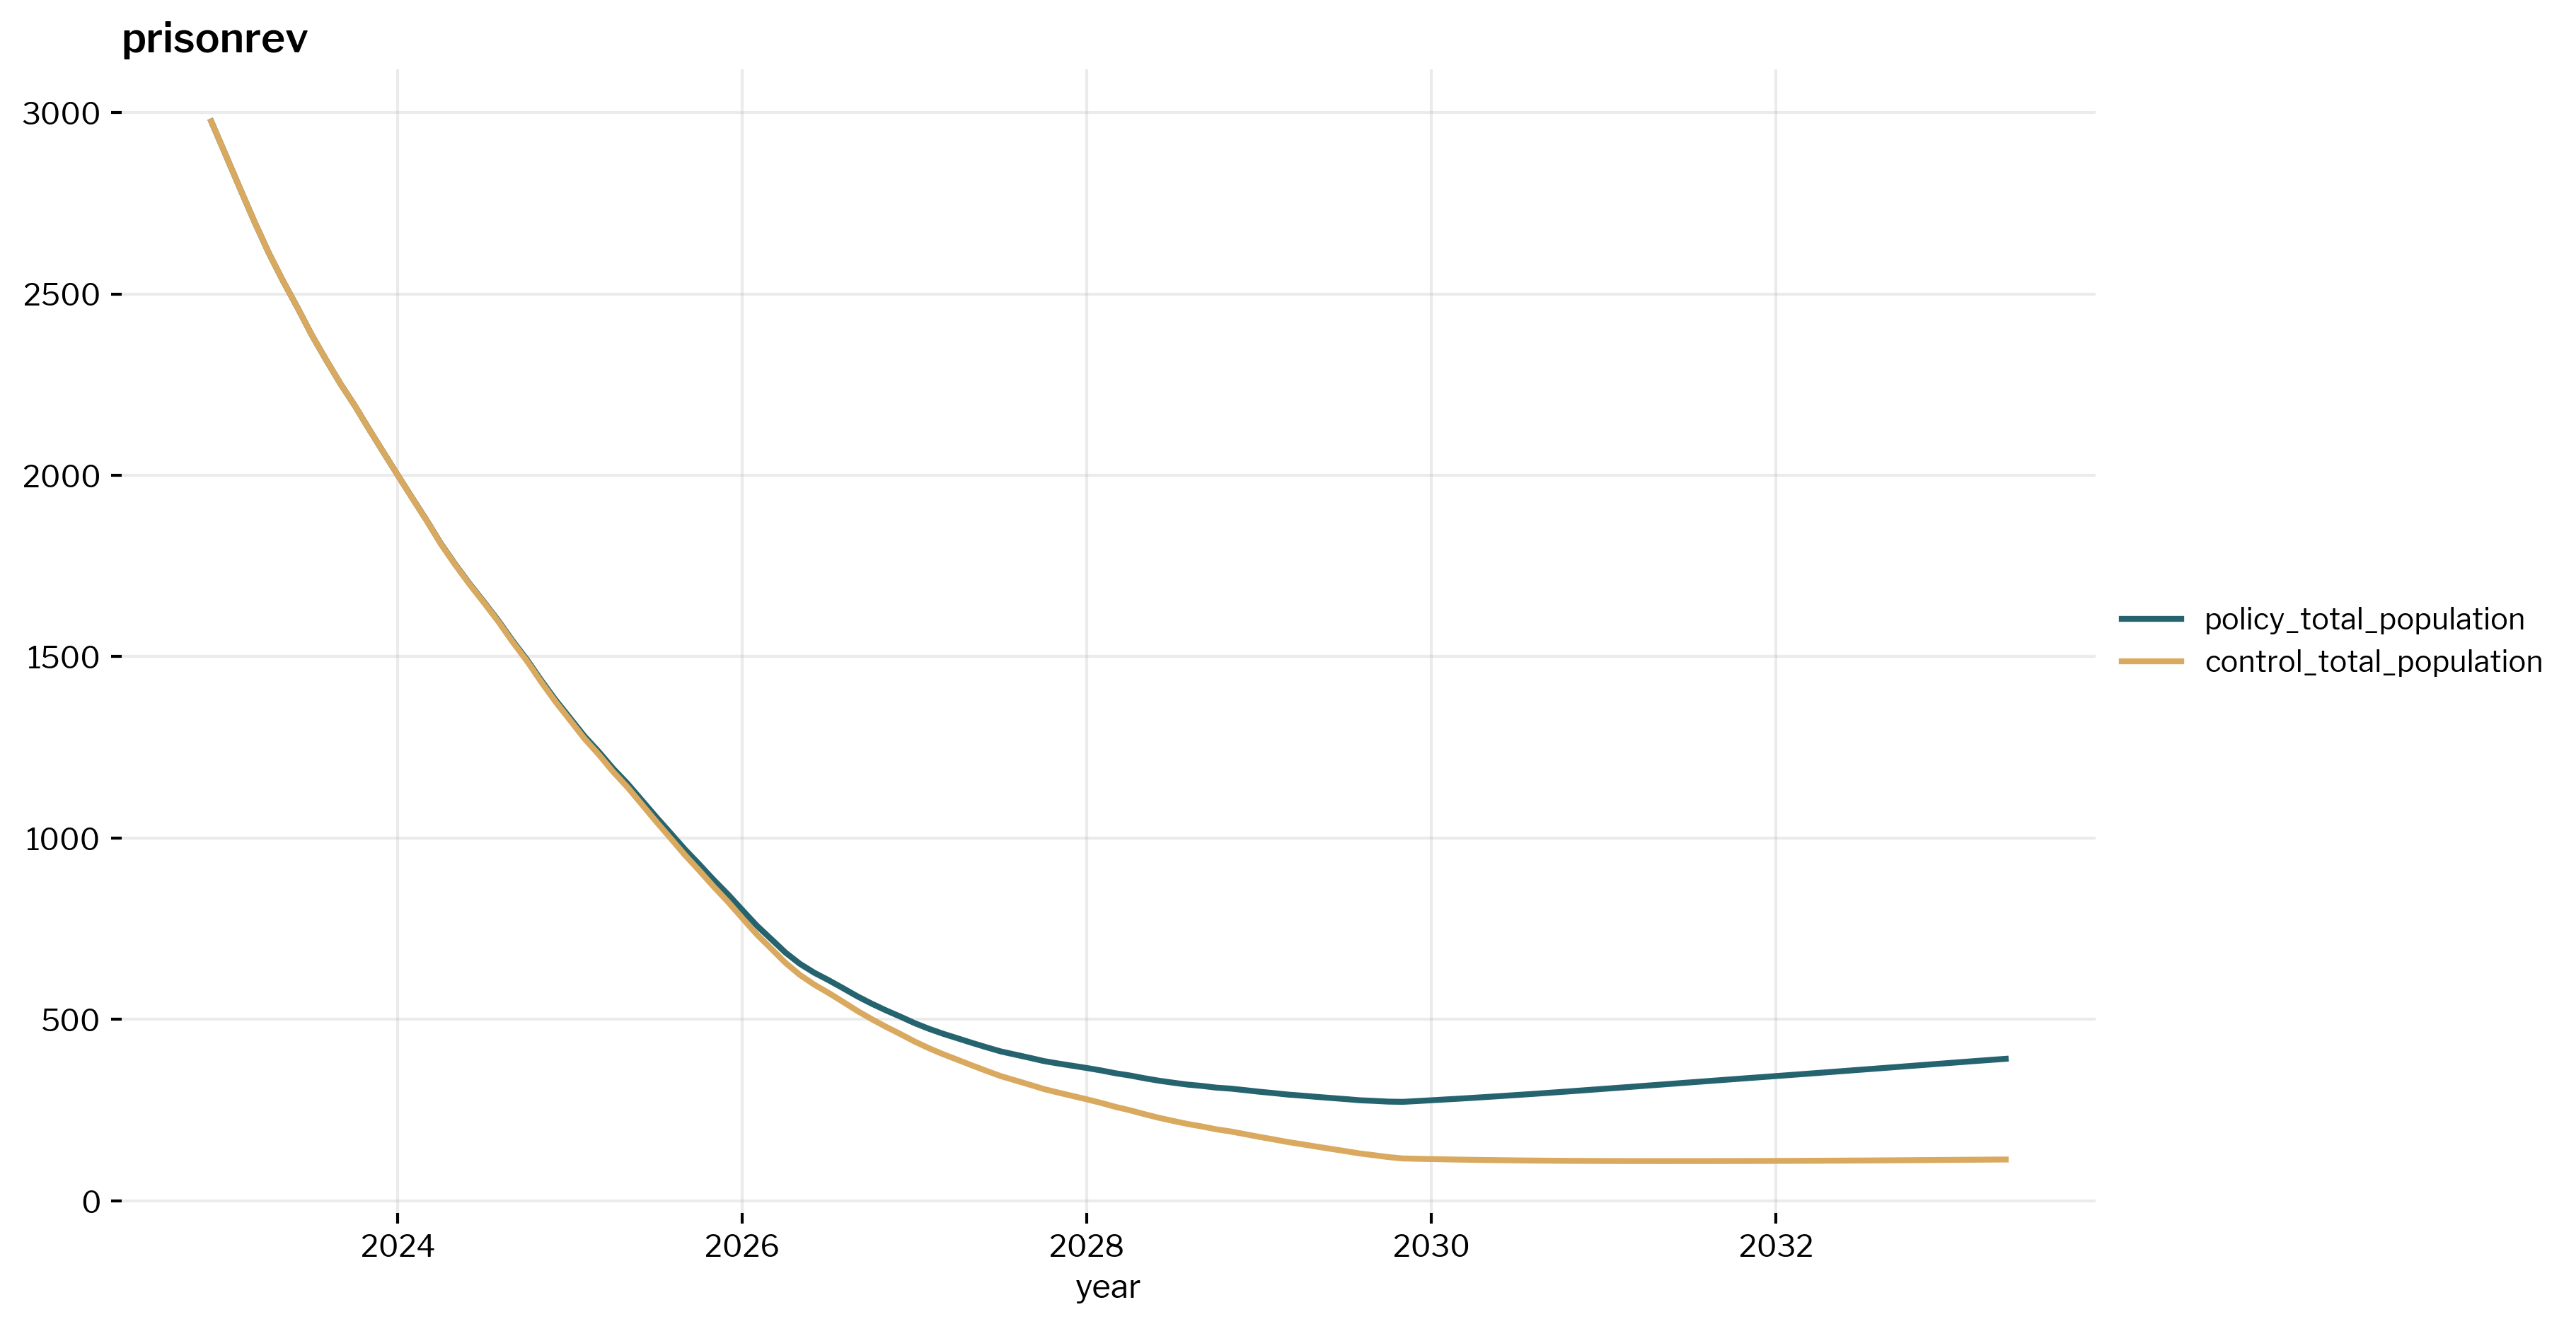

In [78]:
total_population_data = policy_sim.initializer.data_inputs.total_population_data.copy()
total_population_data[
    "year"
] = policy_sim.initializer.time_converter.convert_time_steps_to_year(
    total_population_data["time_step"]
)
total_population_data = total_population_data.set_index(
    ["crime_type", "compartment", "year"]
).sort_index()["total_population"]

for compartment, results in policy_results.groupby(["compartment"]):
    plt.figure()
    ax = None
    if compartment in total_population_data.index.get_level_values("compartment"):
        #         display(total_population_data[
        #                     total_population_data.index.get_level_values("compartment")
        #                     == compartment
        #                 ].reset_index())
        display(
            pd.concat(
                [
                    total_population_data[
                        total_population_data.index.get_level_values("compartment")
                        == compartment
                    ].reset_index(),
                    results[results.compartment == "prisonrev"][
                        ["compartment", "control_total_population"]
                    ]
                    .rename(columns={"control_total_population": "total_population"})
                    .reset_index(),
                ]
            )
        )
        ax = (
            total_population_data[
                total_population_data.index.get_level_values("compartment")
                == compartment
            ]
            .groupby("year")
            .sum()
            .plot(label="input_population")
        )
    results.groupby("year")[
        ["policy_total_population", "control_total_population"]
    ].sum().plot(ax=ax)
    add_legend()
    plt.title(f"{compartment}")

In [79]:
subsim["violent"].simulation_compartments

{'pretrial': <recidiviz.calculator.modeling.population_projection.shell_compartment.ShellCompartment at 0x16d547fd0>,
 'prison': <recidiviz.calculator.modeling.population_projection.full_compartment.FullCompartment at 0x16ae340d0>,
 'parole': <recidiviz.calculator.modeling.population_projection.full_compartment.FullCompartment at 0x16d678790>,
 'prisonrev': <recidiviz.calculator.modeling.population_projection.full_compartment.FullCompartment at 0x16aca29d0>,
 'liberty': <recidiviz.calculator.modeling.population_projection.full_compartment.FullCompartment at 0x16aca2be0>}

'prison'

0             12            24            36            48   \
control  17004.360695  16971.653977  17100.299959  17357.869841  17729.884106   
policy   17004.360695  16960.204408  17044.411122  17243.337676  17558.977026   
diff         0.000000     11.449569     55.888837    114.532165    170.907080   

                  60            72            84            96            108  \
control  18199.326773  18712.292257  19243.337182  19850.445684  20394.576604   
policy   17950.031566  18391.676804  18864.338691  19340.181991  19738.826570   
diff       249.295207    320.615453    378.998491    510.263693    655.750033   

                  120  
control  20843.732257  
policy   20006.706981  
diff       837.025276

'parole'

0            12           24           36           48   \
control  5346.967455  3410.562110  2251.966635  1563.840896  1148.234479   
policy   5346.967455  3431.343692  2372.390700  1827.403497  1548.212847   
diff        0.000000   -20.781581  -120.424064  -263.562601  -399.978368   

                 60           72           84           96           108  \
control   826.832585   619.578428   524.479798   491.582893   480.551492   
policy   1374.368211  1327.473921  1363.965316  1487.889860  1605.533682   
diff     -547.535627  -707.895493  -839.485518  -996.306967 -1124.982190   

                 120  
control   487.975074  
policy   1739.482689  
diff    -1251.507615

'liberty'

0              12             24             36   \
control  113898.75382  118049.865171  121261.813958  123874.369370   
policy   113898.75382  118040.533366  121197.277908  123725.336778   
diff          0.00000       9.331805      64.536049     149.032592   

                   48             60             72             84   \
control  126099.961559  128133.920414  130010.208949  131756.262599   
policy   125870.886688  127835.672460  129622.916640  131295.756825   
diff        229.074871     298.247954     387.292310     460.505774   

                   96             108            120  
control  133364.051377  135012.952171  136738.372771  
policy   132877.983463  134543.690376  136323.854989  
diff        486.067914     469.261795     414.517782

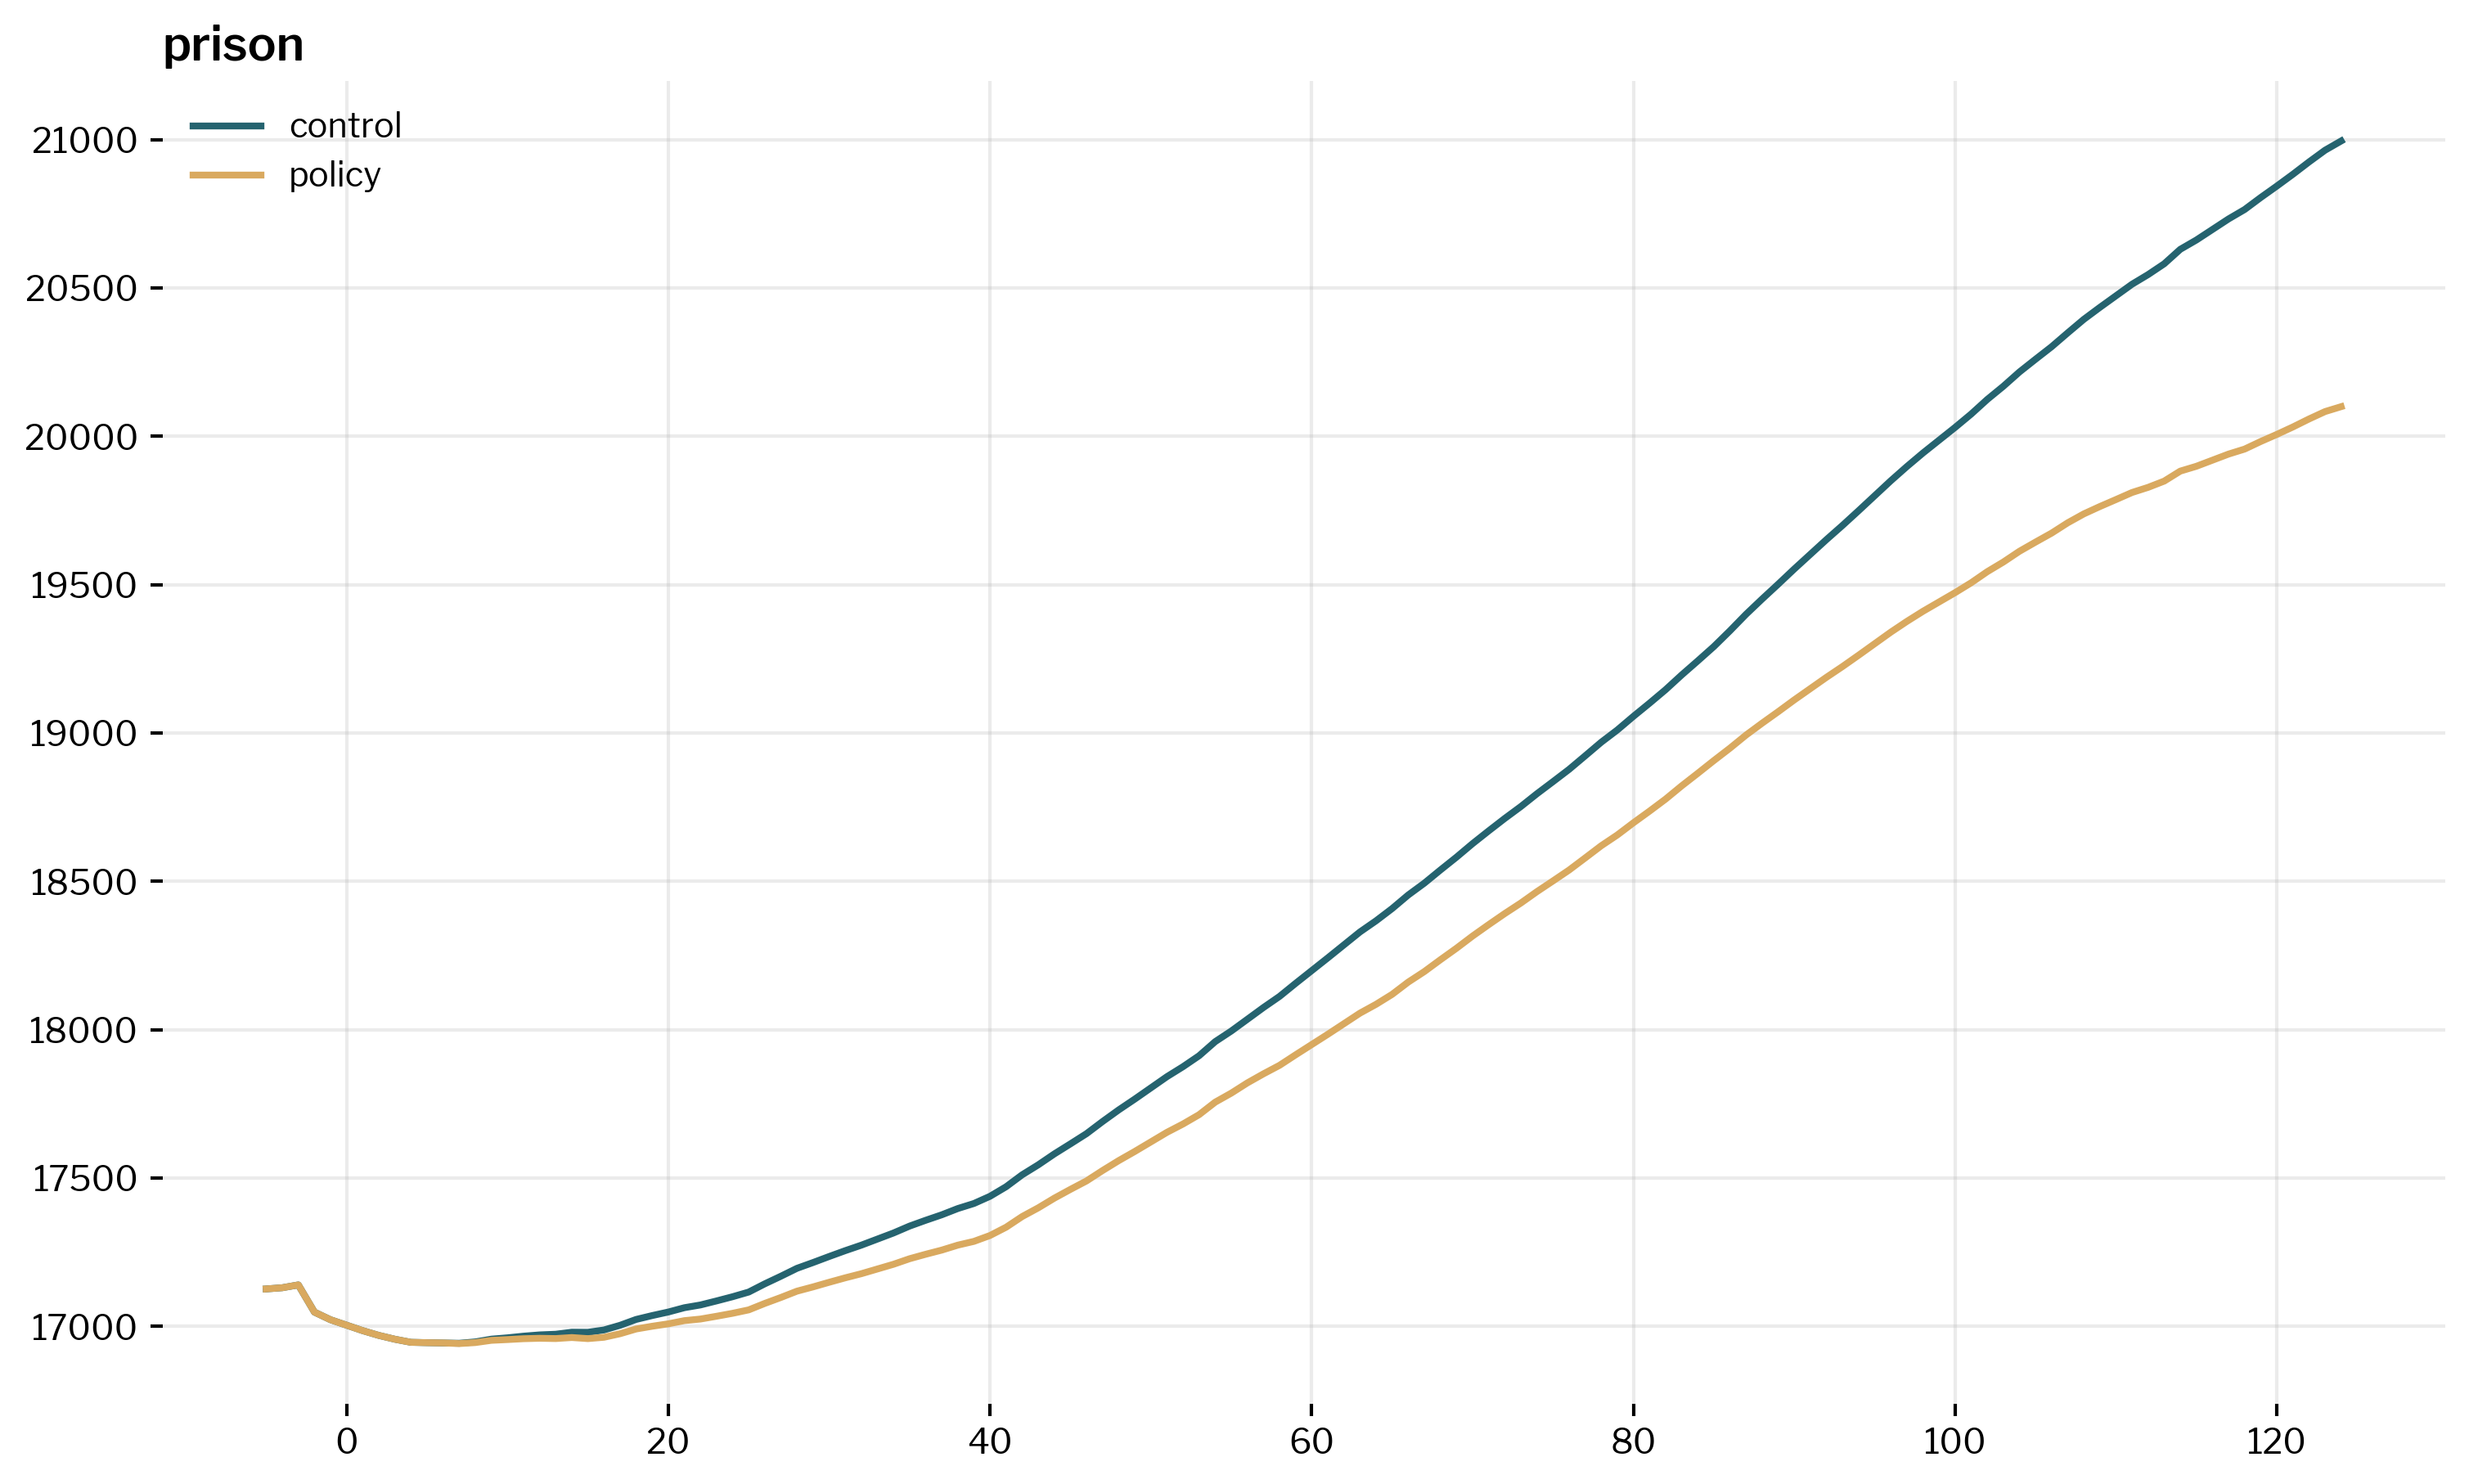

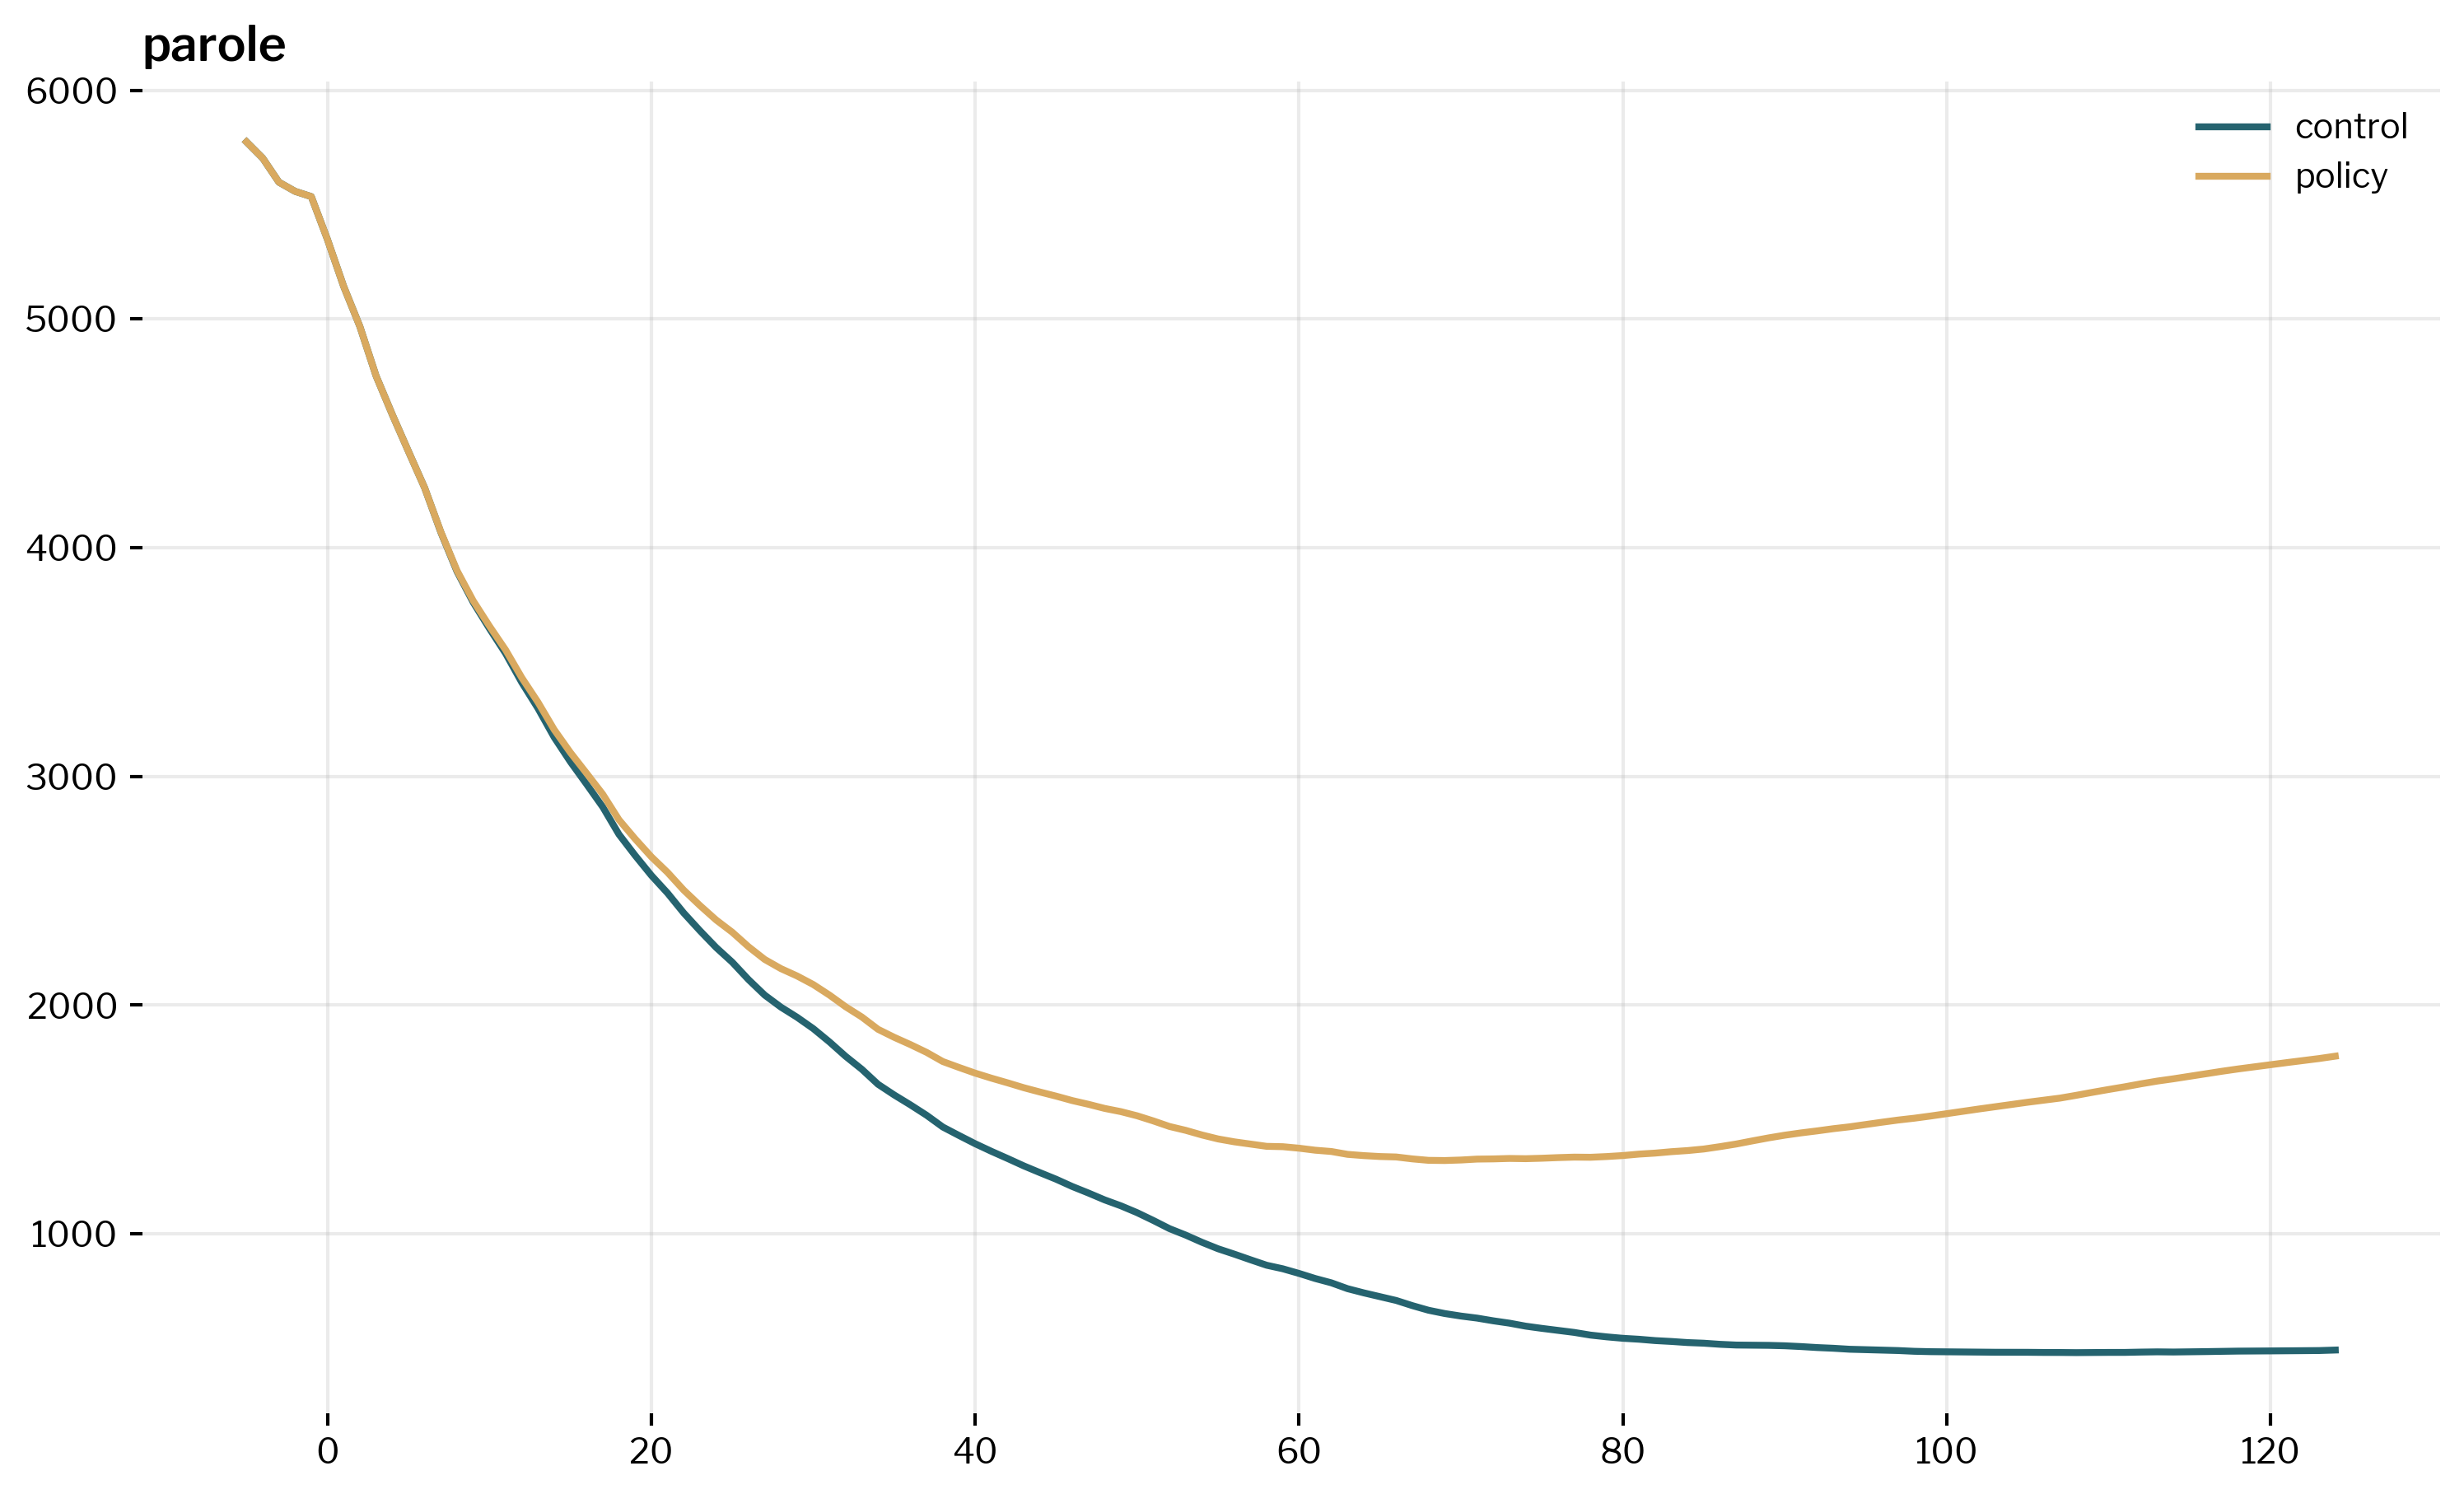

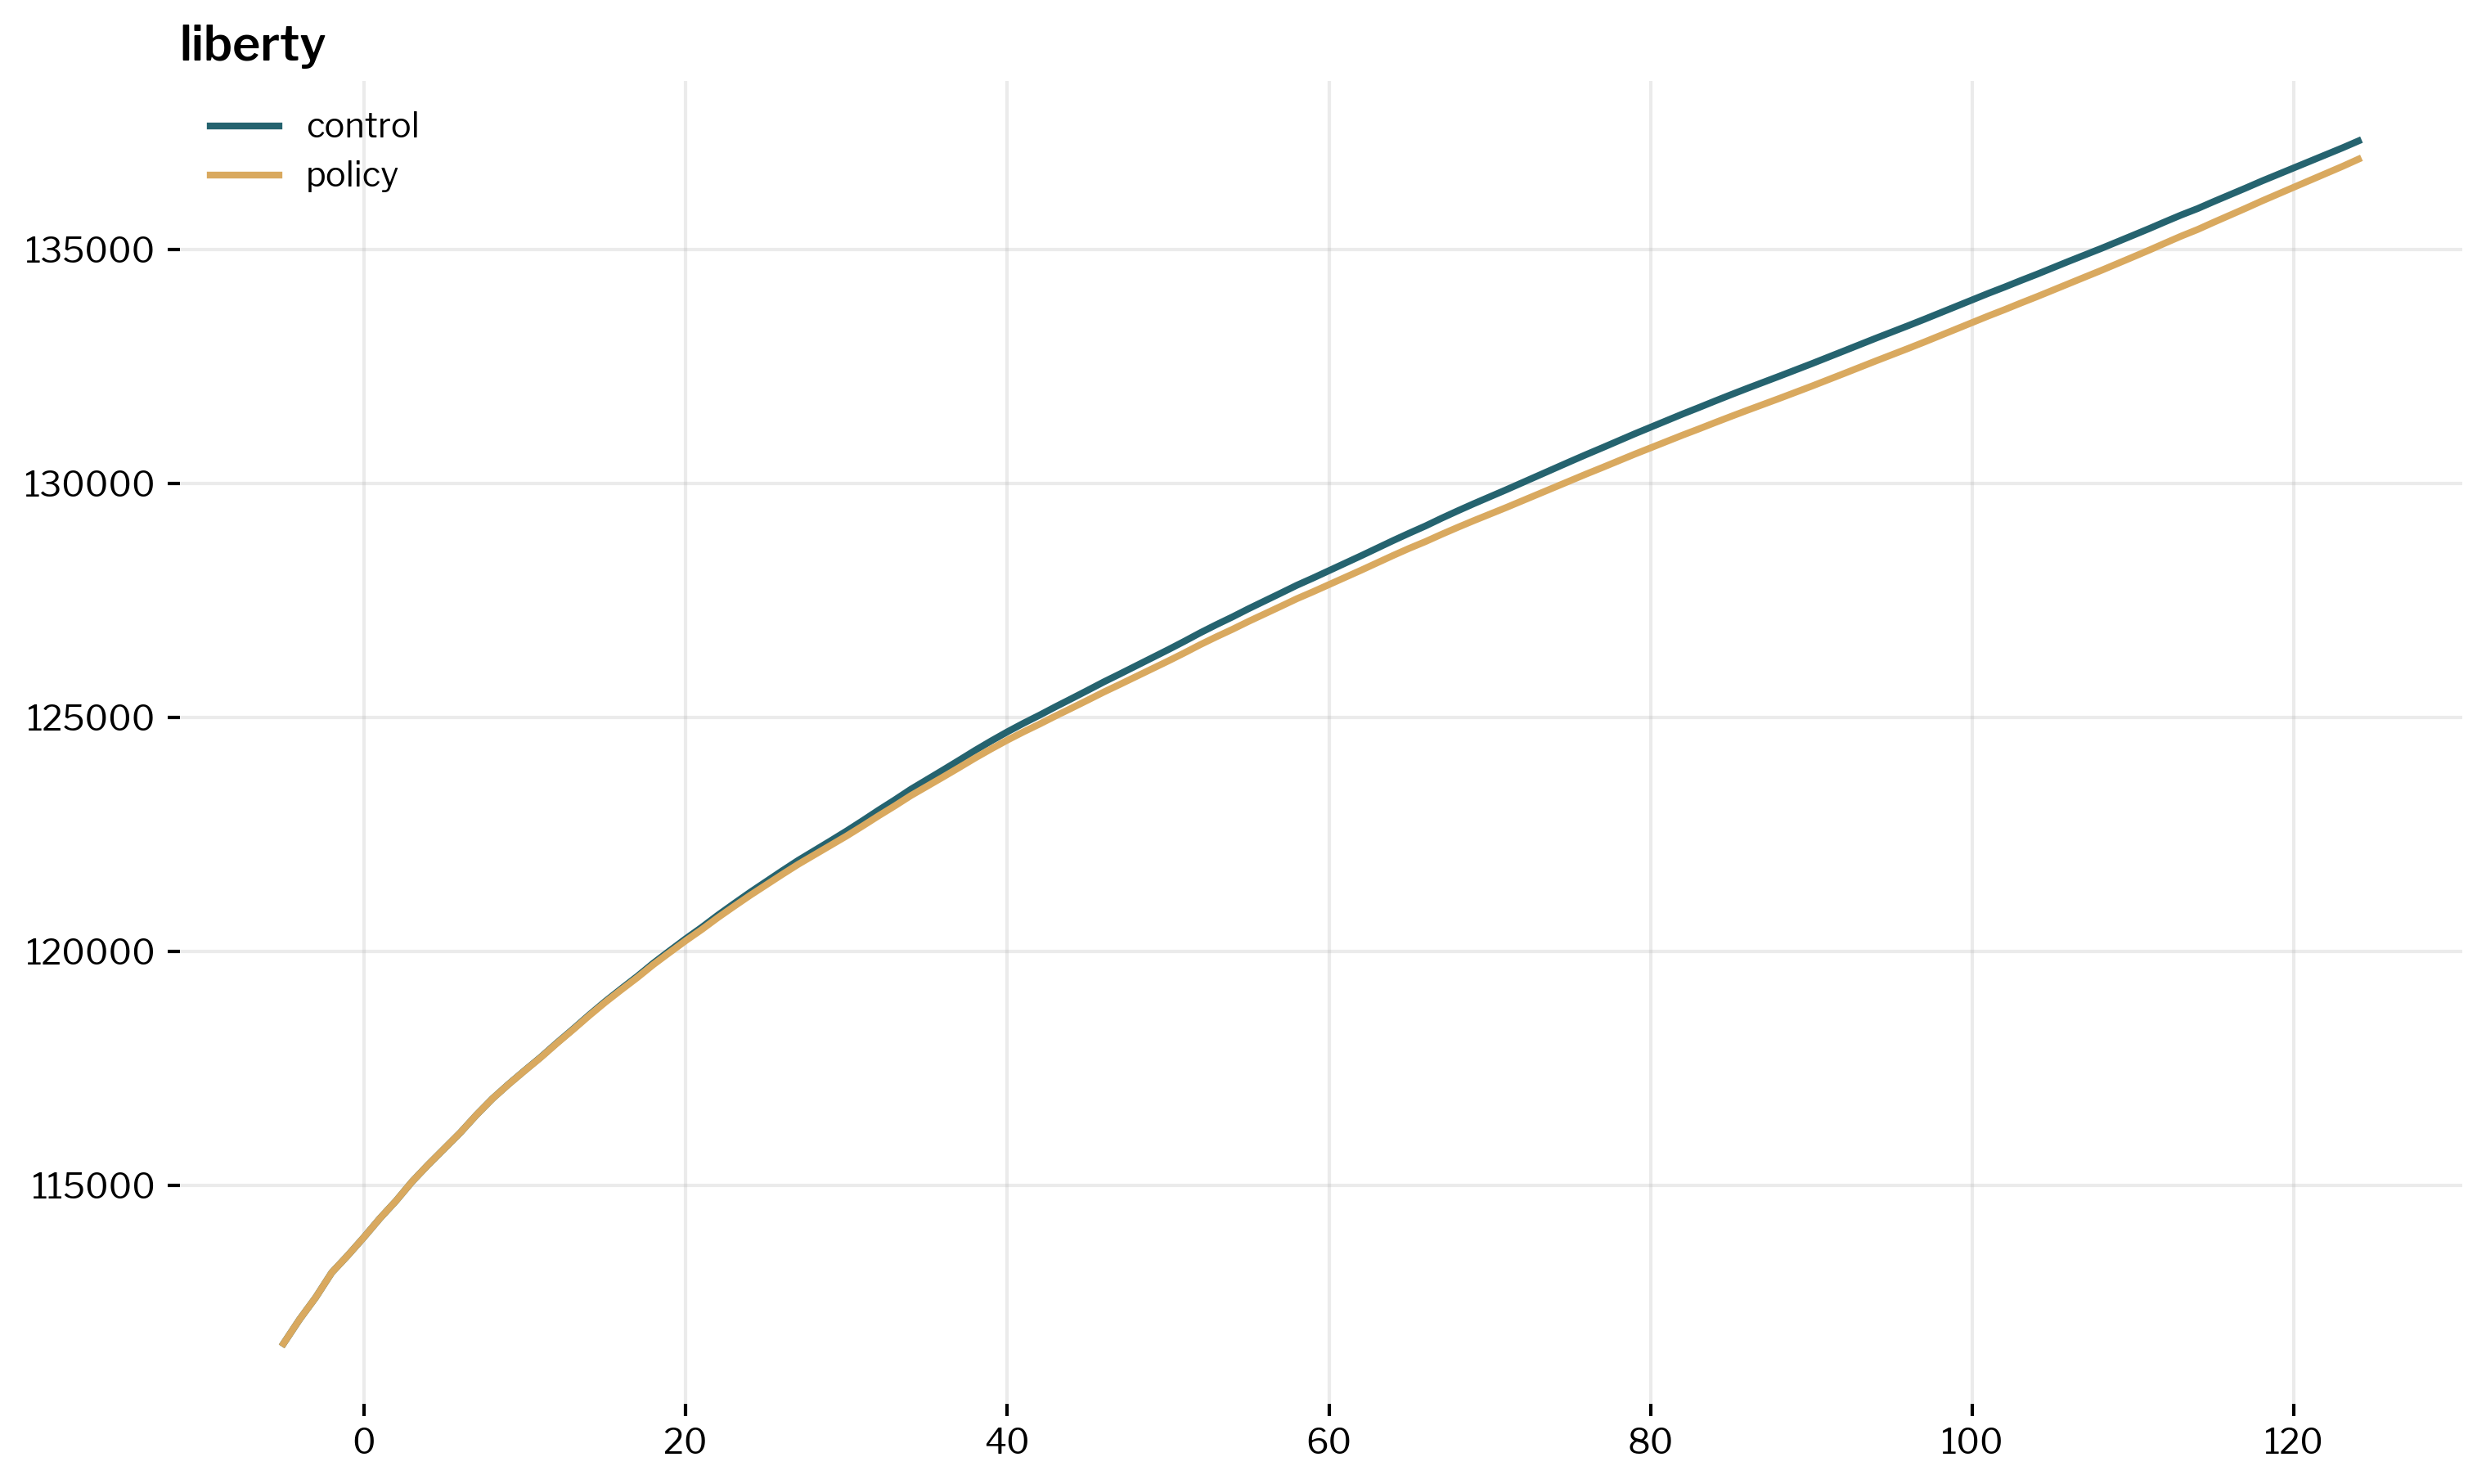

In [80]:
for c in ["prison", "parole", "liberty"]:
    ctrl_policy_list = []
    for s, subsim in subsimd.items():
        summed = pd.DataFrame(
            subsim["violent"].simulation_compartments[c].end_ts_populations, columns=[s]
        ) + pd.DataFrame(
            subsim["nonviolent"].simulation_compartments[c].end_ts_populations,
            columns=[s],
        )
        if c == "prison":
            summed = summed + (
                pd.DataFrame(
                    subsim["violent"]
                    .simulation_compartments["prisonrev"]
                    .end_ts_populations,
                    columns=[s],
                )
                + pd.DataFrame(
                    subsim["nonviolent"]
                    .simulation_compartments["prisonrev"]
                    .end_ts_populations,
                    columns=[s],
                )
            )
        ctrl_policy_list.append(summed)
    pop_df = pd.concat(ctrl_policy_list, axis=1).loc[-5:]
    display(f"{c}")
    pop_results = pop_df.loc[np.arange(0, 121, 12)]
    pop_results["diff"] = pop_df.control - pop_df.policy
    display(pop_results.T)
    pop_df.plot()
    plt.title(f"{c}")

In [ ]:
for c in comp:
    ctrl_policy_list = []
    for s, subsim in subsimd.items():
        prison_new_admissions = (
            (
                subsim["violent"].simulation_compartments[c].outflows.loc[:, -10:60]
                + subsim["nonviolent"]
                .simulation_compartments[c]
                .outflows.loc[:, -10:60]
            )
            .T.add_suffix(f"_{s}")
            .T
        )  # .reset_index().rename(columns={'outflow_to':f"{c}_{s}"})
        display(f"{c}_{s}")
        display(prison_new_admissions.head())
        prison_new_admissions.plot()
        plt.title(f"{c}_{s}")
        ctrl_policy_list.append(prison_new_admissions)
    prison_new_adm_df = pd.concat(ctrl_policy_list, axis=1)
    prison_new_adm_df.plot()
    plt.title(f"{c}")
    display(prison_new_adm_df.head(20))

In [ ]:
subsim["violent"].simulation_compartments["parole"].outflows.loc[:, -10:].head()

In [ ]:
subsim["nonviolent"].simulation_compartments["parole"].outflows.loc[:, -10:].head()

In [ ]:
subsim["violent"].simulation_compartments["prison"].outflows.loc[:, -10:].head()

In [ ]:
subsim["nonviolent"].simulation_compartments["prison"].outflows.loc[:, -10:].head()

In [ ]:
subsim["nonviolent"].simulation_compartments["parole"].outflows.loc[:, -10:].head()

In [ ]:
(
    subsim["violent"].simulation_compartments["parole"].outflows.loc[:, -20:]
    + subsim["nonviolent"].simulation_compartments["parole"].outflows.loc[:, -20:]
)

In [ ]:
for compartment in subsim["violent"].simulation_compartments:
    cop

In [ ]:
policy_results.head()

In [ ]:
total_population_data = policy_sim.initializer.data_inputs.total_population_data.copy()
total_population_data[
    "year"
] = policy_sim.initializer.time_converter.convert_time_steps_to_year(
    total_population_data["time_step"]
)
total_population_data = total_population_data.set_index(
    ["crime_type", "compartment", "year"]
).sort_index()["total_population"]

for compartment, results in policy_results.groupby(["compartment"]):
    plt.figure()
    ax = None
    if compartment in total_population_data.index.get_level_values("compartment"):
        ax = (
            total_population_data[
                total_population_data.index.get_level_values("compartment")
                == compartment
            ]
            .groupby("year")
            .sum()
            .plot(label="input_population")
        )
    results.groupby("year")[
        ["policy_total_population", "control_total_population"]
    ].sum().plot(ax=ax)
    add_legend()
    plt.ylim(0)
    plt.title(f"{compartment}")

In [ ]:
x = 1
for group, results in policy_results.groupby(["simulation_group", "compartment"]):
    plt.figure(x)
    plt.plot(results[["policy_total_population", "control_total_population"]])
    plt.title(f"{group}")
    x += 1
#     policy_results.reset_index().pivot(index='year',columns=['simulation_group','compartment'],values=['policy_total_population','control_total_population']).plot()

In [ ]:
x = 1
for group, results in policy_results.groupby(["simulation_group", "compartment"]):
    #     display(results.head())
    plt.figure(x)
    #     print(group)
    #     display(
    #         pd.concat(
    #             [
    #                 results.sort_values("control_total_population", ascending=False).head(
    #                     1
    #                 ),
    #                 results.sort_values("control_total_population", ascending=False).head(
    #                     1
    #                 ),
    #             ]
    #         )
    #     )
    #     print(f"maxes at ")
    plt.plot(results[["policy_total_population", "control_total_population"]])
    plt.title(f"{group}")
    x += 1
#     policy_results.reset_index().pivot(index='year',columns=['simulation_group','compartment'],values=['policy_total_population','control_total_population']).plot()

In [ ]:
policy_results.groupby(["compartment", "year", "simulation_group"]).sum().loc[
    "prison", "population_difference"
].unstack("simulation_group").plot()
add_legend()

In [ ]:
policy_results.groupby(["compartment", "year"]).sum()["population_difference"].unstack(
    "compartment"
).plot()
add_legend()

In [ ]:
policy_results.groupby(["compartment", "year", "simulation_group"]).sum().loc[
    "prison", "policy_total_population"
].unstack("simulation_group").plot()

In [ ]:
policy_sim.get_arima_output_plots(simulation_title="control", by_simulation_group=True)

In [ ]:
policy_sim.get_arima_output_plots(
    simulation_title="baseline_projections", by_simulation_group=True
)

In [ ]:
policy_sim.simulate_baseline(["prison"])

In [ ]:
baseline_output = policy_sim.validator.pop_simulations["control"].population_projections
baseline_output.set_index(["compartment", "time_step", "simulation_group"]).loc[
    "prison", "total_population"
].unstack("simulation_group").plot()
add_legend()
plt.title("FED HB 5977 Population Projection")

In [ ]:
baseline_outflows = (
    policy_sim.validator.pop_simulations["control"].get_outflows().copy()
)
baseline_outflows[
    "year"
] = policy_sim.initializer.time_converter.convert_time_steps_to_year(
    baseline_outflows.index.get_level_values("time_step")
)
baseline_outflows = baseline_outflows[baseline_outflows["compartment"] != "release"]
baseline_outflows.groupby(["time_step", "compartment", "outflow_to"]).sum()[
    "total_population"
].unstack(["compartment", "outflow_to"]).plot()
add_legend()
plt.title("Baseline Simulation Projected Transitions")

In [ ]:
policy_outflows = policy_sim.validator.pop_simulations["policy"].get_outflows().copy()
policy_outflows[
    "year"
] = policy_sim.initializer.time_converter.convert_time_steps_to_year(
    policy_outflows.index.get_level_values("time_step")
)
policy_outflows = policy_outflows[policy_outflows["compartment"] != "release"]
policy_outflows.groupby(["time_step", "compartment", "outflow_to"]).sum()[
    "total_population"
].unstack(["compartment", "outflow_to"]).plot()
add_legend()
plt.title("Policy Simulation Projected Transitions")

In [ ]:
policy_outflows[policy_outflows["simulation_group"] == "100"].loc["prison"]

In [ ]:
outflows_diff = baseline_outflows.reset_index(drop=False).merge(
    policy_outflows.reset_index(drop=False),
    how="inner",
    on=["time_step", "outflow_to", "compartment", "simulation_group", "year"],
    suffixes=("_control", "_policy"),
)
outflows_diff["outflows_difference"] = (
    outflows_diff["total_population_policy"] - outflows_diff["total_population_control"]
)
outflows_diff["actual_year"] = np.floor(outflows_diff["year"])
outflows_diff[
    (outflows_diff["compartment"] == "pretrial") & (outflows_diff["year"] >= 2022)
]

In [ ]:
outflows_diff.set_index(["outflow_to", "year", "simulation_group"]).loc[
    "prison", "outflows_difference"
].unstack(["simulation_group"]).plot()

In [ ]:
outflows_diff.head()

In [ ]:
cummulative_outflows_diff = (
    outflows_diff.groupby(["outflow_to", "year"])
    .sum()
    .loc["prison", "outflows_difference"]
    .cumsum()
)
cummulative_outflows_diff.plot()

In [ ]:
cummulative_outflows_diff[
    (cummulative_outflows_diff.index.get_level_values("year") % 1) > 0.9
]

In [ ]:
outflows_diff[outflows_diff["outflow_to"] == "prison"].groupby("actual_year").sum()[
    "outflows_difference"
]

In [ ]:
%%bigquery transitions_df
WITH latest_runs AS
(
SELECT simulation_tag, MAX(date_created) as latest_run
FROM `recidiviz-staging.spark_public_input_data.transitions_data_raw`
GROUP BY simulation_tag
)
SELECT data.*
FROM `recidiviz-staging.spark_public_input_data.transitions_data_raw` data
LEFT JOIN latest_runs ON data.simulation_tag = latest_runs.simulation_tag
WHERE data.simulation_tag = 'fed_h5977'
    AND date_created = latest_runs.latest_run
ORDER BY compartment, compartment_duration

In [ ]:
transitions_df.set_index(["compartment", "crime_type", "compartment_duration"]).loc[
    "prison"
].unstack("crime_type")["total_population"].plot()

In [ ]:
transitions_df.set_index(["compartment", "crime_type", "compartment_duration"]).loc[
    "prison", "5"
]

In [ ]:
%%bigquery population_df
WITH latest_runs AS
(
SELECT simulation_tag, MAX(date_created) as latest_run
FROM `recidiviz-staging.spark_public_input_data.total_population_data_raw`
GROUP BY simulation_tag
)
SELECT data.*
FROM `recidiviz-staging.spark_public_input_data.total_population_data_raw` data
LEFT JOIN latest_runs ON data.simulation_tag = latest_runs.simulation_tag
WHERE data.simulation_tag = 'fed_h5977'
    AND date_created = latest_runs.latest_run
ORDER BY time_step

In [ ]:
population_df[
    "year"
] = policy_sim.initializer.time_converter.convert_time_steps_to_year(
    population_df["time_step"]
)

In [ ]:
population_df.set_index(["compartment", "year", "crime_type"]).loc["prison"].unstack(
    "crime_type"
)["total_population"].plot()

In [ ]:
for crime_type in ["20", "5"]:
    ax = (
        population_df[population_df["crime_type"] == crime_type]
        .set_index(["compartment", "year"])
        .loc["prison", "total_population"]
        .plot()
    )

    policy_results[policy_results["simulation_group"] == crime_type].groupby(
        ["compartment", "year"]
    ).sum().loc["prison", ["policy_total_population", "control_total_population"]].plot(
        ax=ax
    )
plt.legend().remove()

In [ ]:
policy_results.tail()

# RUN 1 - just prison policies


In [ ]:
policy_results = policy_sim.simulate_policy(policy_list, "prison")
policy_results["population_difference"] = (
    policy_results["policy_total_population"]
    - policy_results["control_total_population"]
)

In [ ]:
results_dict = policy_sim.upload_policy_simulation_results_to_bq(simulation_tag)

In [ ]:
policy_results.groupby(["compartment", "year", "simulation_group"]).sum().loc[
    "prison", "population_difference"
].unstack("simulation_group").plot()
add_legend()

In [ ]:
policy_results[policy_results.index >= 2020].groupby(
    ["compartment", "year", "simulation_group"]
).sum().loc["prison", "policy_total_population"].unstack("simulation_group").plot()

## OTHERS

In [ ]:
transition_dict = (
    policy_sim.validator.pop_simulations["policy"]
    .sub_simulations["20"]
    .simulation_compartments["prison"]
    .compartment_transitions.transition_tables
)

policy_ts = min(transition_dfs.keys())
for ts, transition_table in transition_dict[policy_ts].tables.items():
    #     if (policy_key != 15) & (transition_type == TransitionTableType.BEFORE):
    #         continue
    transition_table.plot()
    plt.title(f"{ts} Prison Transition Table")
    add_legend(title="Outflow To")

In [ ]:
transition_dict = (
    policy_sim.validator.pop_simulations["policy"]
    .sub_simulations["5"]
    .simulation_compartments["prison"]
    .compartment_transitions.transition_tables
)

policy_key = max(transition_dict.keys())
for ts, transition_table in transition_dict[policy_key].tables.items():
    transition_table.plot()
    plt.title(f"{ts} Prison Transition Table")
    add_legend(title="Outflow To")